In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV  #Perforing grid search

from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.snowball import SnowballStemmer

import re 

In [4]:
sample = pd.read_csv("sample_submission.csv",encoding = "ISO-8859-1")
sample.head(2)

,id,target
0,0,0
1,2,0


In [19]:
train_limpio = pd.read_csv("train_limpio_con_BOW_de_5000_y_Stemming.csv",encoding = "ISO-8859-1")
train_limpio = train_limpio.drop(columns=['id','keyword'])
train_limpio.head(2)

,aa,aba,abandon,abbswinston,abc,abcnew,abe,abil,abl,ablaz,...,"ÃÂÃÂ¸ÃÂ¥ÃÂÃÂ¥_T:\ 40\.736324,\-73\.990062-location",ÃÂ¥_:\ \?\?\ ÃÂÃÂ\ \?\ :\ \?-location,ÃÂ¥_ÃÂ¥_Los\ Mina\ CityÃÂÃÂ£ÃÂ¢-location,ÃÂ¥ÃÂ¡ÃÂ¥ÃÂ¡Midwest\ ÃÂÃÂÃÂ¢ÃÂÃÂÃÂ¢-location,ÃÂ¥ÃÂ\(\?ÃÂÃÂÃÂ¢`\?ÃÂÃÂÃÂ¢ÃÂ¥ÃÂ«\)\?\?-location,ÃÂ¥ÃÂ¸\\_\(\?\)_/ÃÂ¥ÃÂ¸-location,longitud_tweet,letras_seguidas,sentimiento,objetividad
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,70,2,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,40,1,0.1,0.4


In [20]:
test_limpio = pd.read_csv("test_limpio_con_BOW_de_5000_y_Stemming.csv",encoding = "ISO-8859-1")
test_limpio = test_limpio.drop(columns=['id','keyword'])
test_limpio.head()

,aa,aba,abandon,abbswinston,abc,abcnew,abe,abil,abl,ablaz,...,"ÃÂÃÂ¸ÃÂ¥ÃÂÃÂ¥_T:\ 40\.736324,\-73\.990062-location",ÃÂ¥_:\ \?\?\ ÃÂÃÂ\ \?\ :\ \?-location,ÃÂ¥_ÃÂ¥_Los\ Mina\ CityÃÂÃÂ£ÃÂ¢-location,ÃÂ¥ÃÂ¡ÃÂ¥ÃÂ¡Midwest\ ÃÂÃÂÃÂ¢ÃÂÃÂÃÂ¢-location,ÃÂ¥ÃÂ\(\?ÃÂÃÂÃÂ¢`\?ÃÂÃÂÃÂ¢ÃÂ¥ÃÂ«\)\?\?-location,ÃÂ¥ÃÂ¸\\_\(\?\)_/ÃÂ¥ÃÂ¸-location,longitud_tweet,letras_seguidas,sentimiento,objetividad
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,40,2,-1.00,1.00
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,70,2,0.25,0.55
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,100,2,0.00,0.00
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,40,1,0.00,0.00
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,50,2,0.00,0.00


In [21]:
train_y=train_limpio.target

In [22]:
train_limpio = train_limpio.drop(columns = ['target'])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(train_limpio, train_y, test_size=0.2)

El primer modelo de CatBoost usara la metrica "CrossEntropy"

In [10]:
cb = CatBoostClassifier(eval_metric='CrossEntropy')

Estos parametros los voy cambiando a medida que corro el grid_search para llegar al mejor tuneo

In [ ]:
params = {'learning_rate': [0.08,0.1],
        'iterations':[999,1250,1500],
        'depth': [4,5,6],
        'l2_leaf_reg': [9,20,23,50],          
         }

In [ ]:
cb.grid_search(params,X = x_train,y = y_train,plot=True)

In [ ]:
parametros_tuneados = cb.get_all_params()

In [ ]:
parametros_tuneados

Estos son los mejores parametros que encontre para la prediccion con CrossEntropy:
    
 'nan_mode': 'Min',
 'eval_metric': 'CrossEntropy',
 'iterations': 1500,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 20,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.07999999821186066,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 10,
 'bootstrap_type': 'MVS',
 'max_leaves': 64}

Despues de probar un par de veces para ajustar los hiperparametros me quedo con estos

In [12]:
pred = cb.predict(x_train)
f1_score(y_train.values, pred, average='macro')

In [ ]:
pred = cb.predict(x_test)
f1_score(y_test.values, pred, average='macro')

# Controlo con k-folds

In [24]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [25]:
training_error=[]
test_error=[]
train_pred=[]

for train_index,test_index in kf.split(train_limpio):
    x_train,x_test = train_limpio.loc[train_index], train_limpio.loc[test_index]
    y_train,y_test = train_y[train_index], train_y[test_index]
    
    cb = CatBoostClassifier()
    cb.set_params(nan_mode= 'Min',
 eval_metric= 'CrossEntropy',
 iterations= 1500,
 sampling_frequency= 'PerTree',
 leaf_estimation_method= 'Newton',
 grow_policy= 'SymmetricTree',
 penalties_coefficient= 1,
 boosting_type= 'Plain',
 model_shrink_mode= 'Constant',
 feature_border_type= 'GreedyLogSum',
 bayesian_matrix_reg= 0.10000000149011612,
 l2_leaf_reg= 20,
 random_strength= 1,
 rsm= 1,
 boost_from_average= False,
 model_size_reg= 0.5,
 subsample= 0.800000011920929,
 use_best_model= False,
 class_names= [0, 1],
 random_seed= 0,
 depth= 6,
 border_count= 254,
 classes_count= 0,
 auto_class_weights= 'None',
 sparse_features_conflict_fraction= 0,
 leaf_estimation_backtracking= 'AnyImprovement',
 best_model_min_trees= 1,
 model_shrink_rate= 0,
 min_data_in_leaf= 1,
 loss_function= 'Logloss',
 learning_rate= 0.07999999821186066,
 score_function= 'Cosine',
 task_type= 'CPU',
 leaf_estimation_iterations= 10,
 bootstrap_type= 'MVS',
 max_leaves= 64)
    cb.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = cb.predict(x_train)
    training_error.append(f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = cb.predict(x_test)
    
    train_pred.extend(pred)
    test_error.append(f1_score(y_test.values, pred, average='macro'))
    
print('Error de entrenamiento:',training_error)
print('Error de test:',test_error)

0:	learn: 0.6794147	total: 213ms	remaining: 5m 19s
1:	learn: 0.6645164	total: 246ms	remaining: 3m 4s
2:	learn: 0.6548451	total: 266ms	remaining: 2m 12s
3:	learn: 0.6445280	total: 296ms	remaining: 1m 50s
4:	learn: 0.6371594	total: 327ms	remaining: 1m 37s
5:	learn: 0.6302156	total: 358ms	remaining: 1m 29s
6:	learn: 0.6251863	total: 387ms	remaining: 1m 22s
7:	learn: 0.6189603	total: 428ms	remaining: 1m 19s
8:	learn: 0.6140214	total: 465ms	remaining: 1m 16s
9:	learn: 0.6092781	total: 500ms	remaining: 1m 14s
10:	learn: 0.6041069	total: 534ms	remaining: 1m 12s
11:	learn: 0.6013702	total: 565ms	remaining: 1m 10s
12:	learn: 0.5969343	total: 596ms	remaining: 1m 8s
13:	learn: 0.5937256	total: 627ms	remaining: 1m 6s
14:	learn: 0.5902259	total: 664ms	remaining: 1m 5s
15:	learn: 0.5877603	total: 696ms	remaining: 1m 4s
16:	learn: 0.5848733	total: 727ms	remaining: 1m 3s
17:	learn: 0.5814916	total: 758ms	remaining: 1m 2s
18:	learn: 0.5779532	total: 788ms	remaining: 1m 1s
19:	learn: 0.5748998	total: 82

166:	learn: 0.4460318	total: 5.62s	remaining: 44.9s
167:	learn: 0.4456055	total: 5.65s	remaining: 44.8s
168:	learn: 0.4447268	total: 5.68s	remaining: 44.7s
169:	learn: 0.4440609	total: 5.71s	remaining: 44.7s
170:	learn: 0.4434572	total: 5.74s	remaining: 44.6s
171:	learn: 0.4429264	total: 5.77s	remaining: 44.6s
172:	learn: 0.4427562	total: 5.8s	remaining: 44.5s
173:	learn: 0.4422215	total: 5.84s	remaining: 44.5s
174:	learn: 0.4415953	total: 5.87s	remaining: 44.4s
175:	learn: 0.4414326	total: 5.89s	remaining: 44.4s
176:	learn: 0.4412346	total: 5.92s	remaining: 44.3s
177:	learn: 0.4405261	total: 5.96s	remaining: 44.2s
178:	learn: 0.4399444	total: 5.99s	remaining: 44.2s
179:	learn: 0.4393375	total: 6.02s	remaining: 44.2s
180:	learn: 0.4391368	total: 6.05s	remaining: 44.1s
181:	learn: 0.4385491	total: 6.08s	remaining: 44s
182:	learn: 0.4380944	total: 6.11s	remaining: 44s
183:	learn: 0.4378609	total: 6.14s	remaining: 43.9s
184:	learn: 0.4377346	total: 6.17s	remaining: 43.9s
185:	learn: 0.437

327:	learn: 0.3967515	total: 10.6s	remaining: 37.9s
328:	learn: 0.3966312	total: 10.7s	remaining: 37.9s
329:	learn: 0.3962227	total: 10.7s	remaining: 37.9s
330:	learn: 0.3961107	total: 10.7s	remaining: 37.8s
331:	learn: 0.3960380	total: 10.7s	remaining: 37.8s
332:	learn: 0.3956046	total: 10.8s	remaining: 37.8s
333:	learn: 0.3954801	total: 10.8s	remaining: 37.7s
334:	learn: 0.3951705	total: 10.8s	remaining: 37.7s
335:	learn: 0.3947832	total: 10.9s	remaining: 37.7s
336:	learn: 0.3943292	total: 10.9s	remaining: 37.6s
337:	learn: 0.3942769	total: 10.9s	remaining: 37.6s
338:	learn: 0.3941575	total: 11s	remaining: 37.6s
339:	learn: 0.3941046	total: 11s	remaining: 37.5s
340:	learn: 0.3940008	total: 11s	remaining: 37.5s
341:	learn: 0.3939189	total: 11.1s	remaining: 37.4s
342:	learn: 0.3935174	total: 11.1s	remaining: 37.4s
343:	learn: 0.3931858	total: 11.1s	remaining: 37.4s
344:	learn: 0.3929969	total: 11.2s	remaining: 37.3s
345:	learn: 0.3929256	total: 11.2s	remaining: 37.3s
346:	learn: 0.3926

488:	learn: 0.3711970	total: 15.6s	remaining: 32.3s
489:	learn: 0.3710650	total: 15.7s	remaining: 32.3s
490:	learn: 0.3707650	total: 15.7s	remaining: 32.3s
491:	learn: 0.3704282	total: 15.7s	remaining: 32.2s
492:	learn: 0.3703110	total: 15.8s	remaining: 32.2s
493:	learn: 0.3701873	total: 15.8s	remaining: 32.1s
494:	learn: 0.3700110	total: 15.8s	remaining: 32.1s
495:	learn: 0.3699621	total: 15.8s	remaining: 32.1s
496:	learn: 0.3696115	total: 15.9s	remaining: 32s
497:	learn: 0.3693145	total: 15.9s	remaining: 32s
498:	learn: 0.3692907	total: 15.9s	remaining: 32s
499:	learn: 0.3692468	total: 16s	remaining: 31.9s
500:	learn: 0.3692283	total: 16s	remaining: 31.9s
501:	learn: 0.3692085	total: 16s	remaining: 31.9s
502:	learn: 0.3689022	total: 16.1s	remaining: 31.8s
503:	learn: 0.3685573	total: 16.1s	remaining: 31.8s
504:	learn: 0.3684572	total: 16.1s	remaining: 31.8s
505:	learn: 0.3684368	total: 16.2s	remaining: 31.7s
506:	learn: 0.3681496	total: 16.2s	remaining: 31.7s
507:	learn: 0.3681285	to

651:	learn: 0.3495710	total: 20.7s	remaining: 26.9s
652:	learn: 0.3495142	total: 20.7s	remaining: 26.9s
653:	learn: 0.3494947	total: 20.8s	remaining: 26.9s
654:	learn: 0.3494646	total: 20.8s	remaining: 26.8s
655:	learn: 0.3491883	total: 20.8s	remaining: 26.8s
656:	learn: 0.3491392	total: 20.8s	remaining: 26.8s
657:	learn: 0.3490977	total: 20.9s	remaining: 26.7s
658:	learn: 0.3490789	total: 20.9s	remaining: 26.7s
659:	learn: 0.3490355	total: 20.9s	remaining: 26.7s
660:	learn: 0.3490178	total: 21s	remaining: 26.6s
661:	learn: 0.3486594	total: 21s	remaining: 26.6s
662:	learn: 0.3485933	total: 21s	remaining: 26.6s
663:	learn: 0.3485764	total: 21.1s	remaining: 26.5s
664:	learn: 0.3484854	total: 21.1s	remaining: 26.5s
665:	learn: 0.3484515	total: 21.1s	remaining: 26.5s
666:	learn: 0.3483822	total: 21.2s	remaining: 26.4s
667:	learn: 0.3483510	total: 21.2s	remaining: 26.4s
668:	learn: 0.3480947	total: 21.2s	remaining: 26.4s
669:	learn: 0.3479812	total: 21.3s	remaining: 26.3s
670:	learn: 0.3478

813:	learn: 0.3327343	total: 25.7s	remaining: 21.7s
814:	learn: 0.3325645	total: 25.7s	remaining: 21.6s
815:	learn: 0.3325331	total: 25.8s	remaining: 21.6s
816:	learn: 0.3324715	total: 25.8s	remaining: 21.6s
817:	learn: 0.3323211	total: 25.8s	remaining: 21.5s
818:	learn: 0.3320400	total: 25.9s	remaining: 21.5s
819:	learn: 0.3318008	total: 25.9s	remaining: 21.5s
820:	learn: 0.3317815	total: 25.9s	remaining: 21.4s
821:	learn: 0.3316751	total: 26s	remaining: 21.4s
822:	learn: 0.3314693	total: 26s	remaining: 21.4s
823:	learn: 0.3314535	total: 26s	remaining: 21.3s
824:	learn: 0.3314210	total: 26s	remaining: 21.3s
825:	learn: 0.3311451	total: 26.1s	remaining: 21.3s
826:	learn: 0.3311302	total: 26.1s	remaining: 21.2s
827:	learn: 0.3310119	total: 26.1s	remaining: 21.2s
828:	learn: 0.3309189	total: 26.2s	remaining: 21.2s
829:	learn: 0.3308598	total: 26.2s	remaining: 21.2s
830:	learn: 0.3307673	total: 26.2s	remaining: 21.1s
831:	learn: 0.3307301	total: 26.3s	remaining: 21.1s
832:	learn: 0.330691

975:	learn: 0.3190928	total: 30.7s	remaining: 16.5s
976:	learn: 0.3188700	total: 30.7s	remaining: 16.5s
977:	learn: 0.3188537	total: 30.8s	remaining: 16.4s
978:	learn: 0.3188397	total: 30.8s	remaining: 16.4s
979:	learn: 0.3188253	total: 30.8s	remaining: 16.4s
980:	learn: 0.3185845	total: 30.9s	remaining: 16.3s
981:	learn: 0.3185481	total: 30.9s	remaining: 16.3s
982:	learn: 0.3185157	total: 30.9s	remaining: 16.3s
983:	learn: 0.3184789	total: 30.9s	remaining: 16.2s
984:	learn: 0.3182599	total: 31s	remaining: 16.2s
985:	learn: 0.3182261	total: 31s	remaining: 16.2s
986:	learn: 0.3181855	total: 31s	remaining: 16.1s
987:	learn: 0.3181577	total: 31.1s	remaining: 16.1s
988:	learn: 0.3179520	total: 31.1s	remaining: 16.1s
989:	learn: 0.3178675	total: 31.1s	remaining: 16s
990:	learn: 0.3178305	total: 31.2s	remaining: 16s
991:	learn: 0.3177877	total: 31.2s	remaining: 16s
992:	learn: 0.3175917	total: 31.2s	remaining: 15.9s
993:	learn: 0.3174377	total: 31.3s	remaining: 15.9s
994:	learn: 0.3173194	to

1137:	learn: 0.3065924	total: 35.7s	remaining: 11.4s
1138:	learn: 0.3065808	total: 35.7s	remaining: 11.3s
1139:	learn: 0.3065367	total: 35.8s	remaining: 11.3s
1140:	learn: 0.3062797	total: 35.8s	remaining: 11.3s
1141:	learn: 0.3061027	total: 35.8s	remaining: 11.2s
1142:	learn: 0.3060580	total: 35.9s	remaining: 11.2s
1143:	learn: 0.3060454	total: 35.9s	remaining: 11.2s
1144:	learn: 0.3060179	total: 35.9s	remaining: 11.1s
1145:	learn: 0.3059752	total: 36s	remaining: 11.1s
1146:	learn: 0.3056903	total: 36s	remaining: 11.1s
1147:	learn: 0.3056591	total: 36s	remaining: 11s
1148:	learn: 0.3056266	total: 36.1s	remaining: 11s
1149:	learn: 0.3056124	total: 36.1s	remaining: 11s
1150:	learn: 0.3055982	total: 36.1s	remaining: 11s
1151:	learn: 0.3055292	total: 36.1s	remaining: 10.9s
1152:	learn: 0.3054943	total: 36.2s	remaining: 10.9s
1153:	learn: 0.3054561	total: 36.2s	remaining: 10.9s
1154:	learn: 0.3053554	total: 36.2s	remaining: 10.8s
1155:	learn: 0.3052963	total: 36.3s	remaining: 10.8s
1156:	l

1293:	learn: 0.2961221	total: 40.6s	remaining: 6.46s
1294:	learn: 0.2960213	total: 40.6s	remaining: 6.43s
1295:	learn: 0.2959957	total: 40.6s	remaining: 6.39s
1296:	learn: 0.2958483	total: 40.7s	remaining: 6.36s
1297:	learn: 0.2956488	total: 40.7s	remaining: 6.33s
1298:	learn: 0.2956365	total: 40.7s	remaining: 6.3s
1299:	learn: 0.2956128	total: 40.8s	remaining: 6.27s
1300:	learn: 0.2955829	total: 40.8s	remaining: 6.24s
1301:	learn: 0.2955687	total: 40.8s	remaining: 6.21s
1302:	learn: 0.2955550	total: 40.9s	remaining: 6.18s
1303:	learn: 0.2955147	total: 40.9s	remaining: 6.14s
1304:	learn: 0.2955018	total: 40.9s	remaining: 6.11s
1305:	learn: 0.2954890	total: 40.9s	remaining: 6.08s
1306:	learn: 0.2953812	total: 41s	remaining: 6.05s
1307:	learn: 0.2953156	total: 41s	remaining: 6.02s
1308:	learn: 0.2952522	total: 41s	remaining: 5.99s
1309:	learn: 0.2950813	total: 41.1s	remaining: 5.96s
1310:	learn: 0.2949486	total: 41.1s	remaining: 5.92s
1311:	learn: 0.2949199	total: 41.1s	remaining: 5.89s


1455:	learn: 0.2854856	total: 45.6s	remaining: 1.38s
1456:	learn: 0.2854628	total: 45.6s	remaining: 1.35s
1457:	learn: 0.2852931	total: 45.7s	remaining: 1.31s
1458:	learn: 0.2852830	total: 45.7s	remaining: 1.28s
1459:	learn: 0.2852719	total: 45.7s	remaining: 1.25s
1460:	learn: 0.2850767	total: 45.7s	remaining: 1.22s
1461:	learn: 0.2850644	total: 45.8s	remaining: 1.19s
1462:	learn: 0.2850397	total: 45.8s	remaining: 1.16s
1463:	learn: 0.2849763	total: 45.8s	remaining: 1.13s
1464:	learn: 0.2849599	total: 45.9s	remaining: 1.09s
1465:	learn: 0.2849278	total: 45.9s	remaining: 1.06s
1466:	learn: 0.2849023	total: 45.9s	remaining: 1.03s
1467:	learn: 0.2848821	total: 46s	remaining: 1s
1468:	learn: 0.2847854	total: 46s	remaining: 971ms
1469:	learn: 0.2847480	total: 46s	remaining: 939ms
1470:	learn: 0.2845843	total: 46.1s	remaining: 908ms
1471:	learn: 0.2845734	total: 46.1s	remaining: 877ms
1472:	learn: 0.2845607	total: 46.1s	remaining: 845ms
1473:	learn: 0.2845169	total: 46.2s	remaining: 814ms
14

116:	learn: 0.4649064	total: 3.75s	remaining: 44.3s
117:	learn: 0.4638802	total: 3.78s	remaining: 44.3s
118:	learn: 0.4631140	total: 3.81s	remaining: 44.2s
119:	learn: 0.4627498	total: 3.84s	remaining: 44.2s
120:	learn: 0.4621849	total: 3.88s	remaining: 44.2s
121:	learn: 0.4612272	total: 3.91s	remaining: 44.1s
122:	learn: 0.4603881	total: 3.94s	remaining: 44.1s
123:	learn: 0.4597428	total: 3.97s	remaining: 44.1s
124:	learn: 0.4588428	total: 4s	remaining: 44.1s
125:	learn: 0.4583199	total: 4.04s	remaining: 44s
126:	learn: 0.4575725	total: 4.07s	remaining: 44s
127:	learn: 0.4569629	total: 4.1s	remaining: 43.9s
128:	learn: 0.4564025	total: 4.13s	remaining: 43.9s
129:	learn: 0.4561044	total: 4.17s	remaining: 43.9s
130:	learn: 0.4557607	total: 4.2s	remaining: 43.9s
131:	learn: 0.4547413	total: 4.23s	remaining: 43.9s
132:	learn: 0.4544423	total: 4.26s	remaining: 43.8s
133:	learn: 0.4538017	total: 4.29s	remaining: 43.8s
134:	learn: 0.4531330	total: 4.33s	remaining: 43.8s
135:	learn: 0.4524794

276:	learn: 0.3990591	total: 9.2s	remaining: 40.6s
277:	learn: 0.3989963	total: 9.25s	remaining: 40.7s
278:	learn: 0.3989369	total: 9.29s	remaining: 40.7s
279:	learn: 0.3988528	total: 9.33s	remaining: 40.6s
280:	learn: 0.3987164	total: 9.37s	remaining: 40.6s
281:	learn: 0.3985518	total: 9.4s	remaining: 40.6s
282:	learn: 0.3981256	total: 9.44s	remaining: 40.6s
283:	learn: 0.3980239	total: 9.48s	remaining: 40.6s
284:	learn: 0.3975824	total: 9.52s	remaining: 40.6s
285:	learn: 0.3971263	total: 9.56s	remaining: 40.6s
286:	learn: 0.3968146	total: 9.59s	remaining: 40.5s
287:	learn: 0.3967223	total: 9.63s	remaining: 40.5s
288:	learn: 0.3962764	total: 9.67s	remaining: 40.5s
289:	learn: 0.3962194	total: 9.71s	remaining: 40.5s
290:	learn: 0.3958688	total: 9.74s	remaining: 40.5s
291:	learn: 0.3955355	total: 9.77s	remaining: 40.4s
292:	learn: 0.3950913	total: 9.8s	remaining: 40.4s
293:	learn: 0.3947058	total: 9.84s	remaining: 40.4s
294:	learn: 0.3942361	total: 9.87s	remaining: 40.3s
295:	learn: 0.3

435:	learn: 0.3664365	total: 14.5s	remaining: 35.3s
436:	learn: 0.3660757	total: 14.5s	remaining: 35.3s
437:	learn: 0.3656932	total: 14.5s	remaining: 35.2s
438:	learn: 0.3656701	total: 14.6s	remaining: 35.2s
439:	learn: 0.3652631	total: 14.6s	remaining: 35.2s
440:	learn: 0.3651717	total: 14.6s	remaining: 35.1s
441:	learn: 0.3650694	total: 14.7s	remaining: 35.1s
442:	learn: 0.3650200	total: 14.7s	remaining: 35.1s
443:	learn: 0.3647505	total: 14.7s	remaining: 35s
444:	learn: 0.3646849	total: 14.8s	remaining: 35s
445:	learn: 0.3644351	total: 14.8s	remaining: 34.9s
446:	learn: 0.3640871	total: 14.8s	remaining: 34.9s
447:	learn: 0.3638025	total: 14.8s	remaining: 34.9s
448:	learn: 0.3636683	total: 14.9s	remaining: 34.8s
449:	learn: 0.3633794	total: 14.9s	remaining: 34.8s
450:	learn: 0.3632318	total: 14.9s	remaining: 34.8s
451:	learn: 0.3628219	total: 15s	remaining: 34.7s
452:	learn: 0.3627781	total: 15s	remaining: 34.7s
453:	learn: 0.3627543	total: 15s	remaining: 34.7s
454:	learn: 0.3625305	

597:	learn: 0.3440579	total: 19.7s	remaining: 29.6s
598:	learn: 0.3440360	total: 19.7s	remaining: 29.6s
599:	learn: 0.3437951	total: 19.7s	remaining: 29.6s
600:	learn: 0.3436855	total: 19.8s	remaining: 29.5s
601:	learn: 0.3436481	total: 19.8s	remaining: 29.5s
602:	learn: 0.3435850	total: 19.8s	remaining: 29.5s
603:	learn: 0.3435047	total: 19.8s	remaining: 29.4s
604:	learn: 0.3433690	total: 19.9s	remaining: 29.4s
605:	learn: 0.3429686	total: 19.9s	remaining: 29.4s
606:	learn: 0.3429286	total: 19.9s	remaining: 29.3s
607:	learn: 0.3428419	total: 20s	remaining: 29.3s
608:	learn: 0.3428205	total: 20s	remaining: 29.3s
609:	learn: 0.3426525	total: 20s	remaining: 29.2s
610:	learn: 0.3426094	total: 20.1s	remaining: 29.2s
611:	learn: 0.3423976	total: 20.1s	remaining: 29.2s
612:	learn: 0.3422993	total: 20.1s	remaining: 29.1s
613:	learn: 0.3422617	total: 20.2s	remaining: 29.1s
614:	learn: 0.3420231	total: 20.2s	remaining: 29.1s
615:	learn: 0.3417361	total: 20.2s	remaining: 29s
616:	learn: 0.341654

760:	learn: 0.3271532	total: 24.9s	remaining: 24.2s
761:	learn: 0.3268284	total: 24.9s	remaining: 24.2s
762:	learn: 0.3267140	total: 25s	remaining: 24.1s
763:	learn: 0.3266967	total: 25s	remaining: 24.1s
764:	learn: 0.3266250	total: 25s	remaining: 24.1s
765:	learn: 0.3265751	total: 25.1s	remaining: 24s
766:	learn: 0.3265563	total: 25.1s	remaining: 24s
767:	learn: 0.3264678	total: 25.1s	remaining: 24s
768:	learn: 0.3264377	total: 25.2s	remaining: 23.9s
769:	learn: 0.3263940	total: 25.2s	remaining: 23.9s
770:	learn: 0.3263761	total: 25.2s	remaining: 23.9s
771:	learn: 0.3263209	total: 25.3s	remaining: 23.8s
772:	learn: 0.3261502	total: 25.3s	remaining: 23.8s
773:	learn: 0.3259870	total: 25.3s	remaining: 23.8s
774:	learn: 0.3259700	total: 25.4s	remaining: 23.7s
775:	learn: 0.3257330	total: 25.4s	remaining: 23.7s
776:	learn: 0.3256977	total: 25.4s	remaining: 23.7s
777:	learn: 0.3256744	total: 25.5s	remaining: 23.6s
778:	learn: 0.3255619	total: 25.5s	remaining: 23.6s
779:	learn: 0.3252782	to

922:	learn: 0.3132974	total: 30.1s	remaining: 18.8s
923:	learn: 0.3130213	total: 30.1s	remaining: 18.8s
924:	learn: 0.3129937	total: 30.2s	remaining: 18.8s
925:	learn: 0.3129744	total: 30.2s	remaining: 18.7s
926:	learn: 0.3128648	total: 30.2s	remaining: 18.7s
927:	learn: 0.3128480	total: 30.3s	remaining: 18.7s
928:	learn: 0.3125699	total: 30.3s	remaining: 18.6s
929:	learn: 0.3123708	total: 30.3s	remaining: 18.6s
930:	learn: 0.3122030	total: 30.4s	remaining: 18.6s
931:	learn: 0.3121885	total: 30.4s	remaining: 18.5s
932:	learn: 0.3121649	total: 30.4s	remaining: 18.5s
933:	learn: 0.3121325	total: 30.5s	remaining: 18.5s
934:	learn: 0.3121055	total: 30.5s	remaining: 18.4s
935:	learn: 0.3120893	total: 30.5s	remaining: 18.4s
936:	learn: 0.3118667	total: 30.6s	remaining: 18.4s
937:	learn: 0.3118332	total: 30.6s	remaining: 18.3s
938:	learn: 0.3118164	total: 30.6s	remaining: 18.3s
939:	learn: 0.3117943	total: 30.7s	remaining: 18.3s
940:	learn: 0.3117500	total: 30.7s	remaining: 18.2s
941:	learn: 

1083:	learn: 0.3008039	total: 35.3s	remaining: 13.5s
1084:	learn: 0.3007876	total: 35.3s	remaining: 13.5s
1085:	learn: 0.3007735	total: 35.4s	remaining: 13.5s
1086:	learn: 0.3006049	total: 35.4s	remaining: 13.4s
1087:	learn: 0.3004925	total: 35.4s	remaining: 13.4s
1088:	learn: 0.3003988	total: 35.5s	remaining: 13.4s
1089:	learn: 0.3001897	total: 35.5s	remaining: 13.3s
1090:	learn: 0.3001624	total: 35.5s	remaining: 13.3s
1091:	learn: 0.3001200	total: 35.6s	remaining: 13.3s
1092:	learn: 0.3000947	total: 35.6s	remaining: 13.3s
1093:	learn: 0.2999521	total: 35.6s	remaining: 13.2s
1094:	learn: 0.2999020	total: 35.6s	remaining: 13.2s
1095:	learn: 0.2996374	total: 35.7s	remaining: 13.2s
1096:	learn: 0.2995517	total: 35.7s	remaining: 13.1s
1097:	learn: 0.2995373	total: 35.7s	remaining: 13.1s
1098:	learn: 0.2995241	total: 35.8s	remaining: 13.1s
1099:	learn: 0.2992711	total: 35.8s	remaining: 13s
1100:	learn: 0.2992564	total: 35.8s	remaining: 13s
1101:	learn: 0.2992284	total: 35.9s	remaining: 13s

1244:	learn: 0.2897298	total: 40.5s	remaining: 8.29s
1245:	learn: 0.2896343	total: 40.5s	remaining: 8.26s
1246:	learn: 0.2895094	total: 40.6s	remaining: 8.23s
1247:	learn: 0.2894256	total: 40.6s	remaining: 8.2s
1248:	learn: 0.2892076	total: 40.6s	remaining: 8.17s
1249:	learn: 0.2891683	total: 40.7s	remaining: 8.13s
1250:	learn: 0.2891442	total: 40.7s	remaining: 8.1s
1251:	learn: 0.2888853	total: 40.7s	remaining: 8.07s
1252:	learn: 0.2888719	total: 40.8s	remaining: 8.04s
1253:	learn: 0.2888469	total: 40.8s	remaining: 8s
1254:	learn: 0.2888332	total: 40.8s	remaining: 7.97s
1255:	learn: 0.2888189	total: 40.9s	remaining: 7.94s
1256:	learn: 0.2888060	total: 40.9s	remaining: 7.91s
1257:	learn: 0.2887809	total: 40.9s	remaining: 7.87s
1258:	learn: 0.2886718	total: 41s	remaining: 7.84s
1259:	learn: 0.2885432	total: 41s	remaining: 7.81s
1260:	learn: 0.2882983	total: 41s	remaining: 7.78s
1261:	learn: 0.2882839	total: 41.1s	remaining: 7.74s
1262:	learn: 0.2882570	total: 41.1s	remaining: 7.71s
1263

1400:	learn: 0.2807561	total: 45.6s	remaining: 3.22s
1401:	learn: 0.2807282	total: 45.6s	remaining: 3.19s
1402:	learn: 0.2807147	total: 45.6s	remaining: 3.15s
1403:	learn: 0.2807026	total: 45.7s	remaining: 3.12s
1404:	learn: 0.2805947	total: 45.7s	remaining: 3.09s
1405:	learn: 0.2805694	total: 45.8s	remaining: 3.06s
1406:	learn: 0.2805560	total: 45.8s	remaining: 3.03s
1407:	learn: 0.2805110	total: 45.8s	remaining: 2.99s
1408:	learn: 0.2804605	total: 45.9s	remaining: 2.96s
1409:	learn: 0.2803997	total: 45.9s	remaining: 2.93s
1410:	learn: 0.2803757	total: 45.9s	remaining: 2.9s
1411:	learn: 0.2802211	total: 46s	remaining: 2.86s
1412:	learn: 0.2800761	total: 46s	remaining: 2.83s
1413:	learn: 0.2799048	total: 46s	remaining: 2.8s
1414:	learn: 0.2798861	total: 46.1s	remaining: 2.77s
1415:	learn: 0.2798625	total: 46.1s	remaining: 2.73s
1416:	learn: 0.2798411	total: 46.2s	remaining: 2.7s
1417:	learn: 0.2797251	total: 46.2s	remaining: 2.67s
1418:	learn: 0.2797115	total: 46.2s	remaining: 2.64s
14

61:	learn: 0.4997441	total: 1.96s	remaining: 45.4s
62:	learn: 0.4987455	total: 1.99s	remaining: 45.4s
63:	learn: 0.4978837	total: 2.02s	remaining: 45.4s
64:	learn: 0.4968943	total: 2.05s	remaining: 45.3s
65:	learn: 0.4961858	total: 2.08s	remaining: 45.2s
66:	learn: 0.4955029	total: 2.11s	remaining: 45.2s
67:	learn: 0.4941347	total: 2.15s	remaining: 45.2s
68:	learn: 0.4932484	total: 2.18s	remaining: 45.2s
69:	learn: 0.4922050	total: 2.21s	remaining: 45.1s
70:	learn: 0.4915221	total: 2.24s	remaining: 45s
71:	learn: 0.4908419	total: 2.27s	remaining: 45s
72:	learn: 0.4899056	total: 2.3s	remaining: 44.9s
73:	learn: 0.4891048	total: 2.33s	remaining: 45s
74:	learn: 0.4883293	total: 2.36s	remaining: 44.9s
75:	learn: 0.4872835	total: 2.39s	remaining: 44.8s
76:	learn: 0.4863798	total: 2.42s	remaining: 44.8s
77:	learn: 0.4857312	total: 2.45s	remaining: 44.7s
78:	learn: 0.4852100	total: 2.48s	remaining: 44.7s
79:	learn: 0.4843918	total: 2.52s	remaining: 44.8s
80:	learn: 0.4832865	total: 2.55s	rema

224:	learn: 0.4119170	total: 7.08s	remaining: 40.1s
225:	learn: 0.4114434	total: 7.11s	remaining: 40.1s
226:	learn: 0.4113834	total: 7.14s	remaining: 40.1s
227:	learn: 0.4109218	total: 7.17s	remaining: 40s
228:	learn: 0.4104785	total: 7.21s	remaining: 40s
229:	learn: 0.4097770	total: 7.24s	remaining: 40s
230:	learn: 0.4093511	total: 7.27s	remaining: 39.9s
231:	learn: 0.4090257	total: 7.3s	remaining: 39.9s
232:	learn: 0.4086148	total: 7.33s	remaining: 39.9s
233:	learn: 0.4084464	total: 7.36s	remaining: 39.8s
234:	learn: 0.4080417	total: 7.39s	remaining: 39.8s
235:	learn: 0.4076370	total: 7.43s	remaining: 39.8s
236:	learn: 0.4075173	total: 7.46s	remaining: 39.8s
237:	learn: 0.4069463	total: 7.49s	remaining: 39.7s
238:	learn: 0.4068624	total: 7.52s	remaining: 39.7s
239:	learn: 0.4067059	total: 7.55s	remaining: 39.7s
240:	learn: 0.4064120	total: 7.58s	remaining: 39.6s
241:	learn: 0.4059013	total: 7.62s	remaining: 39.6s
242:	learn: 0.4058277	total: 7.65s	remaining: 39.6s
243:	learn: 0.40550

386:	learn: 0.3746414	total: 12.2s	remaining: 35.1s
387:	learn: 0.3743443	total: 12.2s	remaining: 35s
388:	learn: 0.3742965	total: 12.3s	remaining: 35s
389:	learn: 0.3742674	total: 12.3s	remaining: 35s
390:	learn: 0.3742055	total: 12.3s	remaining: 34.9s
391:	learn: 0.3740673	total: 12.3s	remaining: 34.9s
392:	learn: 0.3739757	total: 12.4s	remaining: 34.9s
393:	learn: 0.3739524	total: 12.4s	remaining: 34.8s
394:	learn: 0.3738917	total: 12.4s	remaining: 34.8s
395:	learn: 0.3733181	total: 12.5s	remaining: 34.8s
396:	learn: 0.3730770	total: 12.5s	remaining: 34.7s
397:	learn: 0.3730503	total: 12.5s	remaining: 34.7s
398:	learn: 0.3729329	total: 12.6s	remaining: 34.7s
399:	learn: 0.3728434	total: 12.6s	remaining: 34.7s
400:	learn: 0.3725131	total: 12.6s	remaining: 34.6s
401:	learn: 0.3723042	total: 12.7s	remaining: 34.6s
402:	learn: 0.3722509	total: 12.7s	remaining: 34.6s
403:	learn: 0.3719781	total: 12.7s	remaining: 34.5s
404:	learn: 0.3719543	total: 12.8s	remaining: 34.5s
405:	learn: 0.3713

547:	learn: 0.3509589	total: 17.6s	remaining: 30.6s
548:	learn: 0.3507831	total: 17.6s	remaining: 30.5s
549:	learn: 0.3507640	total: 17.7s	remaining: 30.5s
550:	learn: 0.3506471	total: 17.7s	remaining: 30.5s
551:	learn: 0.3504195	total: 17.8s	remaining: 30.5s
552:	learn: 0.3503259	total: 17.8s	remaining: 30.5s
553:	learn: 0.3499673	total: 17.8s	remaining: 30.5s
554:	learn: 0.3499455	total: 17.9s	remaining: 30.4s
555:	learn: 0.3498257	total: 17.9s	remaining: 30.4s
556:	learn: 0.3497859	total: 17.9s	remaining: 30.4s
557:	learn: 0.3497485	total: 18s	remaining: 30.3s
558:	learn: 0.3497262	total: 18s	remaining: 30.3s
559:	learn: 0.3496842	total: 18s	remaining: 30.3s
560:	learn: 0.3496334	total: 18.1s	remaining: 30.2s
561:	learn: 0.3494455	total: 18.1s	remaining: 30.2s
562:	learn: 0.3494211	total: 18.1s	remaining: 30.2s
563:	learn: 0.3492079	total: 18.2s	remaining: 30.1s
564:	learn: 0.3490086	total: 18.2s	remaining: 30.1s
565:	learn: 0.3487109	total: 18.2s	remaining: 30.1s
566:	learn: 0.3483

707:	learn: 0.3331709	total: 22.7s	remaining: 25.4s
708:	learn: 0.3329269	total: 22.7s	remaining: 25.3s
709:	learn: 0.3328889	total: 22.8s	remaining: 25.3s
710:	learn: 0.3327170	total: 22.8s	remaining: 25.3s
711:	learn: 0.3323490	total: 22.8s	remaining: 25.2s
712:	learn: 0.3323310	total: 22.8s	remaining: 25.2s
713:	learn: 0.3323121	total: 22.9s	remaining: 25.2s
714:	learn: 0.3322729	total: 22.9s	remaining: 25.2s
715:	learn: 0.3322559	total: 22.9s	remaining: 25.1s
716:	learn: 0.3320334	total: 23s	remaining: 25.1s
717:	learn: 0.3320133	total: 23s	remaining: 25.1s
718:	learn: 0.3319964	total: 23s	remaining: 25s
719:	learn: 0.3319779	total: 23.1s	remaining: 25s
720:	learn: 0.3319596	total: 23.1s	remaining: 25s
721:	learn: 0.3319239	total: 23.1s	remaining: 24.9s
722:	learn: 0.3319076	total: 23.2s	remaining: 24.9s
723:	learn: 0.3318908	total: 23.2s	remaining: 24.9s
724:	learn: 0.3318721	total: 23.2s	remaining: 24.8s
725:	learn: 0.3316938	total: 23.3s	remaining: 24.8s
726:	learn: 0.3316774	to

868:	learn: 0.3175524	total: 27.8s	remaining: 20.2s
869:	learn: 0.3175347	total: 27.8s	remaining: 20.2s
870:	learn: 0.3174753	total: 27.9s	remaining: 20.1s
871:	learn: 0.3174267	total: 27.9s	remaining: 20.1s
872:	learn: 0.3171918	total: 27.9s	remaining: 20.1s
873:	learn: 0.3171602	total: 28s	remaining: 20s
874:	learn: 0.3169075	total: 28s	remaining: 20s
875:	learn: 0.3168328	total: 28s	remaining: 20s
876:	learn: 0.3166207	total: 28.1s	remaining: 19.9s
877:	learn: 0.3165893	total: 28.1s	remaining: 19.9s
878:	learn: 0.3163678	total: 28.1s	remaining: 19.9s
879:	learn: 0.3163483	total: 28.1s	remaining: 19.8s
880:	learn: 0.3163111	total: 28.2s	remaining: 19.8s
881:	learn: 0.3162521	total: 28.2s	remaining: 19.8s
882:	learn: 0.3162200	total: 28.2s	remaining: 19.7s
883:	learn: 0.3161903	total: 28.3s	remaining: 19.7s
884:	learn: 0.3161306	total: 28.3s	remaining: 19.7s
885:	learn: 0.3159984	total: 28.3s	remaining: 19.6s
886:	learn: 0.3158215	total: 28.4s	remaining: 19.6s
887:	learn: 0.3158065	to

1030:	learn: 0.3036101	total: 32.9s	remaining: 15s
1031:	learn: 0.3032782	total: 33s	remaining: 14.9s
1032:	learn: 0.3032552	total: 33s	remaining: 14.9s
1033:	learn: 0.3032391	total: 33s	remaining: 14.9s
1034:	learn: 0.3031562	total: 33s	remaining: 14.8s
1035:	learn: 0.3031362	total: 33.1s	remaining: 14.8s
1036:	learn: 0.3029876	total: 33.1s	remaining: 14.8s
1037:	learn: 0.3029579	total: 33.1s	remaining: 14.8s
1038:	learn: 0.3029422	total: 33.2s	remaining: 14.7s
1039:	learn: 0.3029277	total: 33.2s	remaining: 14.7s
1040:	learn: 0.3028546	total: 33.2s	remaining: 14.7s
1041:	learn: 0.3025041	total: 33.3s	remaining: 14.6s
1042:	learn: 0.3024267	total: 33.3s	remaining: 14.6s
1043:	learn: 0.3023973	total: 33.3s	remaining: 14.6s
1044:	learn: 0.3023690	total: 33.4s	remaining: 14.5s
1045:	learn: 0.3023546	total: 33.4s	remaining: 14.5s
1046:	learn: 0.3023392	total: 33.4s	remaining: 14.5s
1047:	learn: 0.3023057	total: 33.5s	remaining: 14.4s
1048:	learn: 0.3022602	total: 33.5s	remaining: 14.4s
104

1187:	learn: 0.2922103	total: 37.9s	remaining: 9.95s
1188:	learn: 0.2921860	total: 37.9s	remaining: 9.91s
1189:	learn: 0.2921362	total: 37.9s	remaining: 9.88s
1190:	learn: 0.2920119	total: 38s	remaining: 9.85s
1191:	learn: 0.2919824	total: 38s	remaining: 9.82s
1192:	learn: 0.2918031	total: 38s	remaining: 9.79s
1193:	learn: 0.2917594	total: 38.1s	remaining: 9.75s
1194:	learn: 0.2917444	total: 38.1s	remaining: 9.72s
1195:	learn: 0.2917323	total: 38.1s	remaining: 9.69s
1196:	learn: 0.2917175	total: 38.2s	remaining: 9.66s
1197:	learn: 0.2914539	total: 38.2s	remaining: 9.63s
1198:	learn: 0.2913931	total: 38.2s	remaining: 9.59s
1199:	learn: 0.2913427	total: 38.3s	remaining: 9.56s
1200:	learn: 0.2913215	total: 38.3s	remaining: 9.53s
1201:	learn: 0.2910781	total: 38.3s	remaining: 9.5s
1202:	learn: 0.2909365	total: 38.3s	remaining: 9.47s
1203:	learn: 0.2908303	total: 38.4s	remaining: 9.43s
1204:	learn: 0.2906500	total: 38.4s	remaining: 9.4s
1205:	learn: 0.2906218	total: 38.4s	remaining: 9.37s
1

1343:	learn: 0.2823992	total: 42.8s	remaining: 4.96s
1344:	learn: 0.2822982	total: 42.8s	remaining: 4.93s
1345:	learn: 0.2822851	total: 42.8s	remaining: 4.9s
1346:	learn: 0.2822535	total: 42.9s	remaining: 4.87s
1347:	learn: 0.2820137	total: 42.9s	remaining: 4.84s
1348:	learn: 0.2819869	total: 42.9s	remaining: 4.8s
1349:	learn: 0.2819434	total: 43s	remaining: 4.77s
1350:	learn: 0.2818661	total: 43s	remaining: 4.74s
1351:	learn: 0.2818516	total: 43s	remaining: 4.71s
1352:	learn: 0.2816862	total: 43s	remaining: 4.68s
1353:	learn: 0.2815326	total: 43.1s	remaining: 4.64s
1354:	learn: 0.2815037	total: 43.1s	remaining: 4.61s
1355:	learn: 0.2811887	total: 43.1s	remaining: 4.58s
1356:	learn: 0.2810613	total: 43.2s	remaining: 4.55s
1357:	learn: 0.2810372	total: 43.2s	remaining: 4.52s
1358:	learn: 0.2810223	total: 43.2s	remaining: 4.49s
1359:	learn: 0.2809519	total: 43.3s	remaining: 4.45s
1360:	learn: 0.2809308	total: 43.3s	remaining: 4.42s
1361:	learn: 0.2809167	total: 43.3s	remaining: 4.39s
136

1499:	learn: 0.2729394	total: 47.7s	remaining: 0us
0:	learn: 0.6777476	total: 33.3ms	remaining: 49.9s
1:	learn: 0.6649164	total: 65.2ms	remaining: 48.8s
2:	learn: 0.6528568	total: 96.5ms	remaining: 48.1s
3:	learn: 0.6411754	total: 128ms	remaining: 47.9s
4:	learn: 0.6325431	total: 159ms	remaining: 47.5s
5:	learn: 0.6261590	total: 190ms	remaining: 47.3s
6:	learn: 0.6195443	total: 221ms	remaining: 47.2s
7:	learn: 0.6116066	total: 260ms	remaining: 48.5s
8:	learn: 0.6056263	total: 292ms	remaining: 48.4s
9:	learn: 0.5998606	total: 323ms	remaining: 48.1s
10:	learn: 0.5966073	total: 354ms	remaining: 47.9s
11:	learn: 0.5924645	total: 385ms	remaining: 47.8s
12:	learn: 0.5886600	total: 418ms	remaining: 47.8s
13:	learn: 0.5852321	total: 454ms	remaining: 48.2s
14:	learn: 0.5819630	total: 486ms	remaining: 48.1s
15:	learn: 0.5782320	total: 517ms	remaining: 48s
16:	learn: 0.5753015	total: 548ms	remaining: 47.8s
17:	learn: 0.5727887	total: 579ms	remaining: 47.7s
18:	learn: 0.5698891	total: 610ms	remain

163:	learn: 0.4422078	total: 5.26s	remaining: 42.8s
164:	learn: 0.4416294	total: 5.29s	remaining: 42.8s
165:	learn: 0.4411221	total: 5.32s	remaining: 42.8s
166:	learn: 0.4408797	total: 5.35s	remaining: 42.7s
167:	learn: 0.4401942	total: 5.38s	remaining: 42.7s
168:	learn: 0.4396575	total: 5.42s	remaining: 42.7s
169:	learn: 0.4390881	total: 5.45s	remaining: 42.7s
170:	learn: 0.4385453	total: 5.48s	remaining: 42.6s
171:	learn: 0.4383476	total: 5.51s	remaining: 42.6s
172:	learn: 0.4376251	total: 5.55s	remaining: 42.5s
173:	learn: 0.4373265	total: 5.58s	remaining: 42.5s
174:	learn: 0.4366536	total: 5.61s	remaining: 42.5s
175:	learn: 0.4360121	total: 5.64s	remaining: 42.5s
176:	learn: 0.4355384	total: 5.67s	remaining: 42.4s
177:	learn: 0.4350851	total: 5.71s	remaining: 42.4s
178:	learn: 0.4348594	total: 5.74s	remaining: 42.3s
179:	learn: 0.4347076	total: 5.77s	remaining: 42.3s
180:	learn: 0.4340973	total: 5.8s	remaining: 42.3s
181:	learn: 0.4335652	total: 5.83s	remaining: 42.3s
182:	learn: 0

325:	learn: 0.3945654	total: 10.5s	remaining: 37.7s
326:	learn: 0.3941125	total: 10.5s	remaining: 37.7s
327:	learn: 0.3940613	total: 10.5s	remaining: 37.7s
328:	learn: 0.3937636	total: 10.6s	remaining: 37.6s
329:	learn: 0.3934052	total: 10.6s	remaining: 37.6s
330:	learn: 0.3933530	total: 10.6s	remaining: 37.5s
331:	learn: 0.3931478	total: 10.7s	remaining: 37.5s
332:	learn: 0.3926938	total: 10.7s	remaining: 37.5s
333:	learn: 0.3926422	total: 10.7s	remaining: 37.5s
334:	learn: 0.3923740	total: 10.8s	remaining: 37.4s
335:	learn: 0.3919878	total: 10.8s	remaining: 37.4s
336:	learn: 0.3919330	total: 10.8s	remaining: 37.4s
337:	learn: 0.3918179	total: 10.9s	remaining: 37.3s
338:	learn: 0.3917695	total: 10.9s	remaining: 37.3s
339:	learn: 0.3913688	total: 10.9s	remaining: 37.3s
340:	learn: 0.3913230	total: 11s	remaining: 37.2s
341:	learn: 0.3911511	total: 11s	remaining: 37.2s
342:	learn: 0.3910971	total: 11s	remaining: 37.2s
343:	learn: 0.3910266	total: 11.1s	remaining: 37.1s
344:	learn: 0.3905

487:	learn: 0.3675469	total: 15.7s	remaining: 32.5s
488:	learn: 0.3674623	total: 15.7s	remaining: 32.4s
489:	learn: 0.3674195	total: 15.7s	remaining: 32.4s
490:	learn: 0.3670367	total: 15.8s	remaining: 32.4s
491:	learn: 0.3669967	total: 15.8s	remaining: 32.3s
492:	learn: 0.3666949	total: 15.8s	remaining: 32.3s
493:	learn: 0.3664082	total: 15.9s	remaining: 32.3s
494:	learn: 0.3660619	total: 15.9s	remaining: 32.2s
495:	learn: 0.3660157	total: 15.9s	remaining: 32.2s
496:	learn: 0.3659906	total: 15.9s	remaining: 32.2s
497:	learn: 0.3659498	total: 16s	remaining: 32.1s
498:	learn: 0.3658952	total: 16s	remaining: 32.1s
499:	learn: 0.3655525	total: 16s	remaining: 32.1s
500:	learn: 0.3652871	total: 16.1s	remaining: 32.1s
501:	learn: 0.3652497	total: 16.1s	remaining: 32s
502:	learn: 0.3652257	total: 16.1s	remaining: 32s
503:	learn: 0.3651199	total: 16.2s	remaining: 32s
504:	learn: 0.3649021	total: 16.2s	remaining: 31.9s
505:	learn: 0.3648774	total: 16.2s	remaining: 31.9s
506:	learn: 0.3648092	to

649:	learn: 0.3468360	total: 20.9s	remaining: 27.3s
650:	learn: 0.3468153	total: 20.9s	remaining: 27.2s
651:	learn: 0.3467944	total: 20.9s	remaining: 27.2s
652:	learn: 0.3467622	total: 20.9s	remaining: 27.2s
653:	learn: 0.3467089	total: 21s	remaining: 27.1s
654:	learn: 0.3466919	total: 21s	remaining: 27.1s
655:	learn: 0.3466655	total: 21s	remaining: 27.1s
656:	learn: 0.3463307	total: 21.1s	remaining: 27.1s
657:	learn: 0.3463082	total: 21.1s	remaining: 27s
658:	learn: 0.3460124	total: 21.1s	remaining: 27s
659:	learn: 0.3456927	total: 21.2s	remaining: 27s
660:	learn: 0.3456712	total: 21.2s	remaining: 26.9s
661:	learn: 0.3456493	total: 21.2s	remaining: 26.9s
662:	learn: 0.3455578	total: 21.3s	remaining: 26.9s
663:	learn: 0.3455009	total: 21.3s	remaining: 26.8s
664:	learn: 0.3454283	total: 21.3s	remaining: 26.8s
665:	learn: 0.3454091	total: 21.4s	remaining: 26.8s
666:	learn: 0.3452850	total: 21.4s	remaining: 26.7s
667:	learn: 0.3452525	total: 21.4s	remaining: 26.7s
668:	learn: 0.3452302	to

808:	learn: 0.3314366	total: 26.1s	remaining: 22.3s
809:	learn: 0.3314033	total: 26.1s	remaining: 22.3s
810:	learn: 0.3313390	total: 26.2s	remaining: 22.2s
811:	learn: 0.3313217	total: 26.2s	remaining: 22.2s
812:	learn: 0.3313008	total: 26.2s	remaining: 22.2s
813:	learn: 0.3312856	total: 26.3s	remaining: 22.1s
814:	learn: 0.3310841	total: 26.3s	remaining: 22.1s
815:	learn: 0.3310682	total: 26.3s	remaining: 22.1s
816:	learn: 0.3310328	total: 26.4s	remaining: 22s
817:	learn: 0.3309479	total: 26.4s	remaining: 22s
818:	learn: 0.3308280	total: 26.4s	remaining: 22s
819:	learn: 0.3307218	total: 26.5s	remaining: 21.9s
820:	learn: 0.3306871	total: 26.5s	remaining: 21.9s
821:	learn: 0.3306347	total: 26.5s	remaining: 21.9s
822:	learn: 0.3305896	total: 26.6s	remaining: 21.8s
823:	learn: 0.3305531	total: 26.6s	remaining: 21.8s
824:	learn: 0.3305351	total: 26.6s	remaining: 21.8s
825:	learn: 0.3304812	total: 26.7s	remaining: 21.7s
826:	learn: 0.3304675	total: 26.7s	remaining: 21.7s
827:	learn: 0.3304

970:	learn: 0.3168912	total: 31.3s	remaining: 17.1s
971:	learn: 0.3166808	total: 31.3s	remaining: 17s
972:	learn: 0.3166515	total: 31.4s	remaining: 17s
973:	learn: 0.3165941	total: 31.4s	remaining: 17s
974:	learn: 0.3165451	total: 31.4s	remaining: 16.9s
975:	learn: 0.3165098	total: 31.5s	remaining: 16.9s
976:	learn: 0.3164807	total: 31.5s	remaining: 16.9s
977:	learn: 0.3164379	total: 31.5s	remaining: 16.8s
978:	learn: 0.3164202	total: 31.6s	remaining: 16.8s
979:	learn: 0.3163063	total: 31.6s	remaining: 16.8s
980:	learn: 0.3162279	total: 31.6s	remaining: 16.7s
981:	learn: 0.3160575	total: 31.7s	remaining: 16.7s
982:	learn: 0.3158106	total: 31.7s	remaining: 16.7s
983:	learn: 0.3157934	total: 31.7s	remaining: 16.6s
984:	learn: 0.3157625	total: 31.8s	remaining: 16.6s
985:	learn: 0.3156821	total: 31.8s	remaining: 16.6s
986:	learn: 0.3154149	total: 31.8s	remaining: 16.5s
987:	learn: 0.3154007	total: 31.8s	remaining: 16.5s
988:	learn: 0.3153537	total: 31.9s	remaining: 16.5s
989:	learn: 0.3153

1131:	learn: 0.3039313	total: 36.5s	remaining: 11.9s
1132:	learn: 0.3039016	total: 36.5s	remaining: 11.8s
1133:	learn: 0.3038750	total: 36.5s	remaining: 11.8s
1134:	learn: 0.3038464	total: 36.6s	remaining: 11.8s
1135:	learn: 0.3037891	total: 36.6s	remaining: 11.7s
1136:	learn: 0.3037457	total: 36.6s	remaining: 11.7s
1137:	learn: 0.3037022	total: 36.7s	remaining: 11.7s
1138:	learn: 0.3036844	total: 36.7s	remaining: 11.6s
1139:	learn: 0.3036594	total: 36.7s	remaining: 11.6s
1140:	learn: 0.3036444	total: 36.8s	remaining: 11.6s
1141:	learn: 0.3034416	total: 36.8s	remaining: 11.5s
1142:	learn: 0.3033512	total: 36.8s	remaining: 11.5s
1143:	learn: 0.3032031	total: 36.9s	remaining: 11.5s
1144:	learn: 0.3031590	total: 36.9s	remaining: 11.4s
1145:	learn: 0.3030783	total: 36.9s	remaining: 11.4s
1146:	learn: 0.3029048	total: 37s	remaining: 11.4s
1147:	learn: 0.3027906	total: 37s	remaining: 11.3s
1148:	learn: 0.3026062	total: 37s	remaining: 11.3s
1149:	learn: 0.3025461	total: 37s	remaining: 11.3s
1

1288:	learn: 0.2935874	total: 41.5s	remaining: 6.79s
1289:	learn: 0.2933885	total: 41.5s	remaining: 6.76s
1290:	learn: 0.2933757	total: 41.6s	remaining: 6.73s
1291:	learn: 0.2933526	total: 41.6s	remaining: 6.7s
1292:	learn: 0.2933137	total: 41.6s	remaining: 6.66s
1293:	learn: 0.2932235	total: 41.7s	remaining: 6.63s
1294:	learn: 0.2930594	total: 41.7s	remaining: 6.6s
1295:	learn: 0.2929225	total: 41.7s	remaining: 6.57s
1296:	learn: 0.2928803	total: 41.8s	remaining: 6.54s
1297:	learn: 0.2928392	total: 41.8s	remaining: 6.5s
1298:	learn: 0.2927747	total: 41.8s	remaining: 6.47s
1299:	learn: 0.2927512	total: 41.8s	remaining: 6.44s
1300:	learn: 0.2927085	total: 41.9s	remaining: 6.41s
1301:	learn: 0.2926846	total: 41.9s	remaining: 6.37s
1302:	learn: 0.2926717	total: 41.9s	remaining: 6.34s
1303:	learn: 0.2926558	total: 42s	remaining: 6.31s
1304:	learn: 0.2926406	total: 42s	remaining: 6.28s
1305:	learn: 0.2926279	total: 42s	remaining: 6.24s
1306:	learn: 0.2926113	total: 42.1s	remaining: 6.21s
13

1450:	learn: 0.2848640	total: 46.7s	remaining: 1.58s
1451:	learn: 0.2848022	total: 46.7s	remaining: 1.54s
1452:	learn: 0.2847877	total: 46.8s	remaining: 1.51s
1453:	learn: 0.2847598	total: 46.8s	remaining: 1.48s
1454:	learn: 0.2847410	total: 46.8s	remaining: 1.45s
1455:	learn: 0.2847074	total: 46.9s	remaining: 1.42s
1456:	learn: 0.2846594	total: 46.9s	remaining: 1.38s
1457:	learn: 0.2845443	total: 46.9s	remaining: 1.35s
1458:	learn: 0.2845344	total: 47s	remaining: 1.32s
1459:	learn: 0.2844709	total: 47s	remaining: 1.29s
1460:	learn: 0.2844380	total: 47s	remaining: 1.25s
1461:	learn: 0.2842612	total: 47s	remaining: 1.22s
1462:	learn: 0.2842494	total: 47.1s	remaining: 1.19s
1463:	learn: 0.2842367	total: 47.1s	remaining: 1.16s
1464:	learn: 0.2842244	total: 47.1s	remaining: 1.13s
1465:	learn: 0.2841540	total: 47.2s	remaining: 1.09s
1466:	learn: 0.2841080	total: 47.2s	remaining: 1.06s
1467:	learn: 0.2839027	total: 47.2s	remaining: 1.03s
1468:	learn: 0.2838814	total: 47.3s	remaining: 998ms
1

114:	learn: 0.4761435	total: 3.76s	remaining: 45.3s
115:	learn: 0.4754320	total: 3.8s	remaining: 45.3s
116:	learn: 0.4749509	total: 3.83s	remaining: 45.3s
117:	learn: 0.4741706	total: 3.87s	remaining: 45.3s
118:	learn: 0.4733436	total: 3.9s	remaining: 45.2s
119:	learn: 0.4725053	total: 3.93s	remaining: 45.2s
120:	learn: 0.4717314	total: 3.96s	remaining: 45.1s
121:	learn: 0.4713986	total: 4s	remaining: 45.1s
122:	learn: 0.4711697	total: 4.03s	remaining: 45.1s
123:	learn: 0.4704505	total: 4.06s	remaining: 45s
124:	learn: 0.4702013	total: 4.09s	remaining: 45s
125:	learn: 0.4695415	total: 4.12s	remaining: 45s
126:	learn: 0.4691876	total: 4.16s	remaining: 44.9s
127:	learn: 0.4688510	total: 4.19s	remaining: 44.9s
128:	learn: 0.4680060	total: 4.22s	remaining: 44.9s
129:	learn: 0.4673144	total: 4.26s	remaining: 44.9s
130:	learn: 0.4665170	total: 4.29s	remaining: 44.8s
131:	learn: 0.4656391	total: 4.32s	remaining: 44.8s
132:	learn: 0.4647830	total: 4.35s	remaining: 44.7s
133:	learn: 0.4644562	t

277:	learn: 0.4105688	total: 9.1s	remaining: 40s
278:	learn: 0.4105115	total: 9.13s	remaining: 40s
279:	learn: 0.4101310	total: 9.16s	remaining: 39.9s
280:	learn: 0.4099757	total: 9.2s	remaining: 39.9s
281:	learn: 0.4096674	total: 9.23s	remaining: 39.9s
282:	learn: 0.4090059	total: 9.26s	remaining: 39.8s
283:	learn: 0.4088390	total: 9.3s	remaining: 39.8s
284:	learn: 0.4087425	total: 9.33s	remaining: 39.8s
285:	learn: 0.4082864	total: 9.36s	remaining: 39.7s
286:	learn: 0.4078910	total: 9.39s	remaining: 39.7s
287:	learn: 0.4078068	total: 9.42s	remaining: 39.7s
288:	learn: 0.4077413	total: 9.46s	remaining: 39.6s
289:	learn: 0.4073492	total: 9.49s	remaining: 39.6s
290:	learn: 0.4072127	total: 9.52s	remaining: 39.6s
291:	learn: 0.4070334	total: 9.56s	remaining: 39.5s
292:	learn: 0.4065735	total: 9.59s	remaining: 39.5s
293:	learn: 0.4065206	total: 9.62s	remaining: 39.5s
294:	learn: 0.4063853	total: 9.65s	remaining: 39.4s
295:	learn: 0.4059796	total: 9.69s	remaining: 39.4s
296:	learn: 0.40584

437:	learn: 0.3791948	total: 14.4s	remaining: 34.9s
438:	learn: 0.3791556	total: 14.4s	remaining: 34.9s
439:	learn: 0.3788534	total: 14.5s	remaining: 34.9s
440:	learn: 0.3788256	total: 14.5s	remaining: 34.9s
441:	learn: 0.3787169	total: 14.6s	remaining: 34.9s
442:	learn: 0.3786083	total: 14.6s	remaining: 34.9s
443:	learn: 0.3785591	total: 14.6s	remaining: 34.8s
444:	learn: 0.3781816	total: 14.7s	remaining: 34.8s
445:	learn: 0.3781551	total: 14.7s	remaining: 34.8s
446:	learn: 0.3781092	total: 14.7s	remaining: 34.7s
447:	learn: 0.3779195	total: 14.8s	remaining: 34.7s
448:	learn: 0.3778936	total: 14.8s	remaining: 34.7s
449:	learn: 0.3776530	total: 14.8s	remaining: 34.6s
450:	learn: 0.3773063	total: 14.9s	remaining: 34.6s
451:	learn: 0.3771911	total: 14.9s	remaining: 34.6s
452:	learn: 0.3771421	total: 14.9s	remaining: 34.5s
453:	learn: 0.3768543	total: 15s	remaining: 34.5s
454:	learn: 0.3767312	total: 15s	remaining: 34.5s
455:	learn: 0.3766569	total: 15s	remaining: 34.4s
456:	learn: 0.3765

600:	learn: 0.3581999	total: 19.9s	remaining: 29.8s
601:	learn: 0.3579951	total: 20s	remaining: 29.8s
602:	learn: 0.3578648	total: 20s	remaining: 29.7s
603:	learn: 0.3578445	total: 20s	remaining: 29.7s
604:	learn: 0.3577632	total: 20s	remaining: 29.7s
605:	learn: 0.3577242	total: 20.1s	remaining: 29.6s
606:	learn: 0.3576870	total: 20.1s	remaining: 29.6s
607:	learn: 0.3574949	total: 20.1s	remaining: 29.6s
608:	learn: 0.3572538	total: 20.2s	remaining: 29.5s
609:	learn: 0.3572324	total: 20.2s	remaining: 29.5s
610:	learn: 0.3570992	total: 20.2s	remaining: 29.5s
611:	learn: 0.3568974	total: 20.3s	remaining: 29.4s
612:	learn: 0.3566582	total: 20.3s	remaining: 29.4s
613:	learn: 0.3563376	total: 20.3s	remaining: 29.4s
614:	learn: 0.3563200	total: 20.4s	remaining: 29.3s
615:	learn: 0.3561294	total: 20.4s	remaining: 29.3s
616:	learn: 0.3561074	total: 20.4s	remaining: 29.3s
617:	learn: 0.3560861	total: 20.5s	remaining: 29.2s
618:	learn: 0.3560054	total: 20.5s	remaining: 29.2s
619:	learn: 0.355960

762:	learn: 0.3414265	total: 25.2s	remaining: 24.3s
763:	learn: 0.3410120	total: 25.2s	remaining: 24.3s
764:	learn: 0.3407060	total: 25.3s	remaining: 24.3s
765:	learn: 0.3404063	total: 25.3s	remaining: 24.2s
766:	learn: 0.3403442	total: 25.3s	remaining: 24.2s
767:	learn: 0.3401847	total: 25.4s	remaining: 24.2s
768:	learn: 0.3400308	total: 25.4s	remaining: 24.1s
769:	learn: 0.3399915	total: 25.4s	remaining: 24.1s
770:	learn: 0.3399584	total: 25.5s	remaining: 24.1s
771:	learn: 0.3399186	total: 25.5s	remaining: 24s
772:	learn: 0.3399037	total: 25.5s	remaining: 24s
773:	learn: 0.3398323	total: 25.5s	remaining: 24s
774:	learn: 0.3397620	total: 25.6s	remaining: 23.9s
775:	learn: 0.3396716	total: 25.6s	remaining: 23.9s
776:	learn: 0.3396549	total: 25.6s	remaining: 23.9s
777:	learn: 0.3395989	total: 25.7s	remaining: 23.8s
778:	learn: 0.3395616	total: 25.7s	remaining: 23.8s
779:	learn: 0.3395428	total: 25.7s	remaining: 23.8s
780:	learn: 0.3394194	total: 25.8s	remaining: 23.7s
781:	learn: 0.3393

924:	learn: 0.3263930	total: 30.5s	remaining: 18.9s
925:	learn: 0.3263460	total: 30.5s	remaining: 18.9s
926:	learn: 0.3262741	total: 30.5s	remaining: 18.9s
927:	learn: 0.3261210	total: 30.6s	remaining: 18.8s
928:	learn: 0.3260355	total: 30.6s	remaining: 18.8s
929:	learn: 0.3260199	total: 30.6s	remaining: 18.8s
930:	learn: 0.3260061	total: 30.7s	remaining: 18.7s
931:	learn: 0.3259643	total: 30.7s	remaining: 18.7s
932:	learn: 0.3259338	total: 30.7s	remaining: 18.7s
933:	learn: 0.3256363	total: 30.8s	remaining: 18.6s
934:	learn: 0.3256182	total: 30.8s	remaining: 18.6s
935:	learn: 0.3255395	total: 30.8s	remaining: 18.6s
936:	learn: 0.3255062	total: 30.9s	remaining: 18.5s
937:	learn: 0.3253329	total: 30.9s	remaining: 18.5s
938:	learn: 0.3253152	total: 30.9s	remaining: 18.5s
939:	learn: 0.3251196	total: 31s	remaining: 18.4s
940:	learn: 0.3249501	total: 31s	remaining: 18.4s
941:	learn: 0.3249024	total: 31s	remaining: 18.4s
942:	learn: 0.3248044	total: 31s	remaining: 18.3s
943:	learn: 0.324707

1086:	learn: 0.3131872	total: 35.7s	remaining: 13.6s
1087:	learn: 0.3131227	total: 35.8s	remaining: 13.5s
1088:	learn: 0.3130867	total: 35.8s	remaining: 13.5s
1089:	learn: 0.3129268	total: 35.8s	remaining: 13.5s
1090:	learn: 0.3129094	total: 35.9s	remaining: 13.4s
1091:	learn: 0.3128546	total: 35.9s	remaining: 13.4s
1092:	learn: 0.3128381	total: 35.9s	remaining: 13.4s
1093:	learn: 0.3127685	total: 36s	remaining: 13.3s
1094:	learn: 0.3125678	total: 36s	remaining: 13.3s
1095:	learn: 0.3124809	total: 36s	remaining: 13.3s
1096:	learn: 0.3124666	total: 36.1s	remaining: 13.3s
1097:	learn: 0.3121699	total: 36.1s	remaining: 13.2s
1098:	learn: 0.3119526	total: 36.1s	remaining: 13.2s
1099:	learn: 0.3119125	total: 36.2s	remaining: 13.2s
1100:	learn: 0.3118842	total: 36.2s	remaining: 13.1s
1101:	learn: 0.3118395	total: 36.2s	remaining: 13.1s
1102:	learn: 0.3118231	total: 36.3s	remaining: 13.1s
1103:	learn: 0.3116825	total: 36.3s	remaining: 13s
1104:	learn: 0.3114501	total: 36.3s	remaining: 13s
110

1246:	learn: 0.3014146	total: 41.2s	remaining: 8.36s
1247:	learn: 0.3012466	total: 41.3s	remaining: 8.33s
1248:	learn: 0.3011959	total: 41.3s	remaining: 8.3s
1249:	learn: 0.3009907	total: 41.3s	remaining: 8.27s
1250:	learn: 0.3009509	total: 41.4s	remaining: 8.23s
1251:	learn: 0.3008898	total: 41.4s	remaining: 8.2s
1252:	learn: 0.3006976	total: 41.4s	remaining: 8.17s
1253:	learn: 0.3006742	total: 41.5s	remaining: 8.13s
1254:	learn: 0.3006598	total: 41.5s	remaining: 8.1s
1255:	learn: 0.3004420	total: 41.5s	remaining: 8.07s
1256:	learn: 0.3003005	total: 41.6s	remaining: 8.03s
1257:	learn: 0.3002769	total: 41.6s	remaining: 8s
1258:	learn: 0.2999544	total: 41.6s	remaining: 7.97s
1259:	learn: 0.2998747	total: 41.7s	remaining: 7.93s
1260:	learn: 0.2998032	total: 41.7s	remaining: 7.9s
1261:	learn: 0.2997527	total: 41.7s	remaining: 7.87s
1262:	learn: 0.2997399	total: 41.8s	remaining: 7.83s
1263:	learn: 0.2997272	total: 41.8s	remaining: 7.8s
1264:	learn: 0.2996333	total: 41.8s	remaining: 7.77s
1

1403:	learn: 0.2907801	total: 46.4s	remaining: 3.17s
1404:	learn: 0.2906938	total: 46.4s	remaining: 3.14s
1405:	learn: 0.2906673	total: 46.4s	remaining: 3.1s
1406:	learn: 0.2906514	total: 46.5s	remaining: 3.07s
1407:	learn: 0.2904768	total: 46.5s	remaining: 3.04s
1408:	learn: 0.2903601	total: 46.5s	remaining: 3s
1409:	learn: 0.2903017	total: 46.6s	remaining: 2.97s
1410:	learn: 0.2902350	total: 46.6s	remaining: 2.94s
1411:	learn: 0.2899976	total: 46.6s	remaining: 2.91s
1412:	learn: 0.2899674	total: 46.7s	remaining: 2.87s
1413:	learn: 0.2899285	total: 46.7s	remaining: 2.84s
1414:	learn: 0.2899062	total: 46.7s	remaining: 2.81s
1415:	learn: 0.2898944	total: 46.8s	remaining: 2.77s
1416:	learn: 0.2898569	total: 46.8s	remaining: 2.74s
1417:	learn: 0.2898077	total: 46.8s	remaining: 2.71s
1418:	learn: 0.2897967	total: 46.9s	remaining: 2.67s
1419:	learn: 0.2897844	total: 46.9s	remaining: 2.64s
1420:	learn: 0.2896445	total: 46.9s	remaining: 2.61s
1421:	learn: 0.2896034	total: 47s	remaining: 2.58s

# Realizo la prediccion:

In [ ]:
# Primero aplico la misma transformacion al test

In [ ]:
cb.get_all_params()

In [ ]:
cb = CatBoostClassifier()
cb.set_params(nan_mode= 'Min',
 eval_metric= 'CrossEntropy',
 iterations= 1500,
 sampling_frequency= 'PerTree',
 leaf_estimation_method= 'Newton',
 grow_policy= 'SymmetricTree',
 penalties_coefficient= 1,
 boosting_type= 'Plain',
 model_shrink_mode= 'Constant',
 feature_border_type= 'GreedyLogSum',
 bayesian_matrix_reg= 0.10000000149011612,
 l2_leaf_reg= 20,
 random_strength= 1,
 rsm= 1,
 boost_from_average= False,
 model_size_reg= 0.5,
 subsample= 0.800000011920929,
 use_best_model= False,
 class_names= [0, 1],
 random_seed= 0,
 depth= 6,
 border_count= 254,
 classes_count= 0,
 auto_class_weights= 'None',
 sparse_features_conflict_fraction= 0,
 leaf_estimation_backtracking= 'AnyImprovement',
 best_model_min_trees= 1,
 model_shrink_rate= 0,
 min_data_in_leaf= 1,
 loss_function= 'Logloss',
 learning_rate= 0.07999999821186066,
 score_function= 'Cosine',
 task_type= 'CPU',
 leaf_estimation_iterations= 10,
 bootstrap_type= 'MVS',
 max_leaves= 64)
cb.fit(train_limpio, train_y)

In [ ]:
pred = cb.predict(test_limpio)
pred

In [ ]:
sample.target = pred

In [ ]:
sample.to_csv('prediccion_catBoost_con_CrossEntropy.csv', index=False)

A continuacion probaremos CatBoost con la metrica F1_Score

In [ ]:
cb = CatBoostClassifier(eval_metric='F1')

Estos parametros los voy cambiando a medida que corro el grid_search para llegar al mejor tuneo

In [ ]:
params = {'learning_rate': [0.1,0.2],
        'iterations':[750,999,1250],
        'depth': [6,8,9],
        'l2_leaf_reg': [15,20,23],          
         }

In [ ]:
cb.grid_search(params,X = x_train,y = y_train,plot=True)

In [ ]:
parametros_tuneados = cb.get_all_params()

In [ ]:
parametros_tuneados

Despues de probar un par de veces para ajustar los hiperparametros me quedo con estos

In [ ]:
pred = cb.predict(x_train)
f1_score(y_train.values, pred, average='macro')

In [ ]:
pred = cb.predict(x_test)
f1_score(y_test.values, pred, average='macro')

# Controlo con k-folds

In [ ]:
kf = KFold(n_splits = 5)
kf

In [ ]:
training_error=[]
test_error=[]
train_pred2=[]

for train_index,test_index in kf.split(train_limpio):
    x_train,x_test = train_limpio.loc[train_index], train_limpio.loc[test_index]
    y_train,y_test = train_y[train_index], train_y[test_index]
    
    cb = CatBoostClassifier()
    cb.set_params(nan_mode= 'Min',
 eval_metric= 'CrossEntropy',
 iterations= 750,
 sampling_frequency= 'PerTree',
 leaf_estimation_method= 'Newton',
 grow_policy= 'SymmetricTree',
 penalties_coefficient= 1,
 boosting_type= 'Plain',
 model_shrink_mode= 'Constant',
 feature_border_type= 'GreedyLogSum',
 bayesian_matrix_reg= 0.10000000149011612,
 l2_leaf_reg= 20,
 random_strength= 1,
 rsm= 1,
 boost_from_average= False,
 model_size_reg= 0.5,
 subsample= 0.800000011920929,
 use_best_model= False,
 class_names= [0, 1],
 random_seed= 0,
 depth= 8,
 border_count= 254,
 classes_count= 0,
 auto_class_weights= 'None',
 sparse_features_conflict_fraction= 0,
 leaf_estimation_backtracking= 'AnyImprovement',
 best_model_min_trees= 1,
 model_shrink_rate= 0,
 min_data_in_leaf= 1,
 loss_function= 'Logloss',
 learning_rate= 0.2,
 score_function= 'Cosine',
 task_type= 'CPU',
 leaf_estimation_iterations= 10,
 bootstrap_type= 'MVS')
    cb.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = cb.predict(x_train)
    training_error.append(f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = cb.predict(x_test)
    
    train_pred2.extend(pred)
    test_error.append(f1_score(y_test.values, pred, average='macro'))
    
print('Error de entrenamiento:',training_error)
print('Error de test:',test_error)

# Realizo la prediccion:

In [ ]:
# Primero aplico la misma transformacion al test

In [ ]:
cb.get_all_params()

In [ ]:
cb = CatBoostClassifier()
cb.set_params(nan_mode= 'Min',
 eval_metric= 'CrossEntropy',
 iterations= 750,
 sampling_frequency= 'PerTree',
 leaf_estimation_method= 'Newton',
 grow_policy= 'SymmetricTree',
 penalties_coefficient= 1,
 boosting_type= 'Plain',
 model_shrink_mode= 'Constant',
 feature_border_type= 'GreedyLogSum',
 bayesian_matrix_reg= 0.10000000149011612,
 l2_leaf_reg= 20,
 random_strength= 1,
 rsm= 1,
 boost_from_average= False,
 model_size_reg= 0.5,
 subsample= 0.800000011920929,
 use_best_model= False,
 class_names= [0, 1],
 random_seed= 0,
 depth= 8,
 border_count= 254,
 classes_count= 0,
 auto_class_weights= 'None',
 sparse_features_conflict_fraction= 0,
 leaf_estimation_backtracking= 'AnyImprovement',
 best_model_min_trees= 1,
 model_shrink_rate= 0,
 min_data_in_leaf= 1,
 loss_function= 'Logloss',
 learning_rate= 0.2,
 score_function= 'Cosine',
 task_type= 'CPU',
 leaf_estimation_iterations= 10,
 bootstrap_type= 'MVS')
cb.fit(train_limpio, train_y)

In [ ]:
pred = cb.predict(test_limpio)
pred

In [ ]:
sample.target = pred

In [ ]:
sample.to_csv('prediccion_catBoost_con_F1Score.csv', index=False)

A continuacion probaremos CatBoost con la metrica LogLoss

In [12]:
cb = CatBoostClassifier()

Estos parametros los voy cambiando a medida que corro el grid_search para llegar al mejor tuneo

In [26]:
params = {'learning_rate': [0.1,0.2],
        'iterations':[750,999,1250],
        'depth': [6,8,9],
        'l2_leaf_reg': [15,20,23],          
         }

In [14]:
cb.grid_search(params,X = x_train,y = y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.4407318283
bestIteration = 748

0:	loss: 0.4407318	best: 0.4407318 (0)	total: 5.38s	remaining: 4m 45s

bestTest = 0.440797635
bestIteration = 629

1:	loss: 0.4407976	best: 0.4407318 (0)	total: 11s	remaining: 4m 44s

bestTest = 0.4413157576
bestIteration = 734

2:	loss: 0.4413158	best: 0.4407318 (0)	total: 16.1s	remaining: 4m 34s

bestTest = 0.440713697
bestIteration = 455

3:	loss: 0.4407137	best: 0.4407137 (3)	total: 21.3s	remaining: 4m 26s

bestTest = 0.4417313449
bestIteration = 719

4:	loss: 0.4417313	best: 0.4407137 (3)	total: 26.5s	remaining: 4m 19s

bestTest = 0.4402405089
bestIteration = 715

5:	loss: 0.4402405	best: 0.4402405 (5)	total: 31.7s	remaining: 4m 13s

bestTest = 0.4400454778
bestIteration = 802

6:	loss: 0.4400455	best: 0.4400455 (6)	total: 38.6s	remaining: 4m 19s

bestTest = 0.4396360806
bestIteration = 780

7:	loss: 0.4396361	best: 0.4396361 (7)	total: 45.6s	remaining: 4m 22s

bestTest = 0.438067516
bestIteration = 996

8:	loss: 0.4380675	best: 0.4380

{'params': {'depth': 6,
  'l2_leaf_reg': 20,
  'iterations': 1250,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [15]:
parametros_tuneados = cb.get_all_params()

In [16]:
parametros_tuneados

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1250,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 20,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.10000000149011612,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 10,
 'bootstrap_type': 'MVS',
 'max_le

Despues de probar un par de veces para ajustar los hiperparametros me quedo con estos

In [17]:
pred = cb.predict(x_train)
f1_score(y_train.values, pred, average='macro')

0.9103887928212153

In [18]:
pred = cb.predict(x_test)
f1_score(y_test.values, pred, average='macro')

0.7940908354673024

# Controlo con k-folds, y ademas agrego la prediccion del train en cada split para crear otro feature

In [28]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [32]:
training_error=[]
test_error=[]
train_pred3=[]

for train_index,test_index in kf.split(train_limpio):
    x_train,x_test = train_limpio.loc[train_index], train_limpio.loc[test_index]
    y_train,y_test = train_y[train_index], train_y[test_index]
    
    cb = CatBoostClassifier()
    cb.set_params(nan_mode= 'Min',
 eval_metric= 'CrossEntropy',
 iterations= 1250,
 sampling_frequency= 'PerTree',
 leaf_estimation_method= 'Newton',
 grow_policy= 'SymmetricTree',
 penalties_coefficient= 1,
 boosting_type= 'Plain',
 model_shrink_mode= 'Constant',
 feature_border_type= 'GreedyLogSum',
 bayesian_matrix_reg= 0.10000000149011612,
 l2_leaf_reg= 20,
 random_strength= 1,
 rsm= 1,
 boost_from_average= False,
 model_size_reg= 0.5,
 subsample= 0.800000011920929,
 use_best_model= False,
 class_names= [0, 1],
 random_seed= 0,
 depth= 6,
 border_count= 254,
 classes_count= 0,
 auto_class_weights= 'None',
 sparse_features_conflict_fraction= 0,
 leaf_estimation_backtracking= 'AnyImprovement',
 best_model_min_trees= 1,
 model_shrink_rate= 0,
 min_data_in_leaf= 1,
 loss_function= 'Logloss',
 learning_rate= 0.1,
 score_function= 'Cosine',
 task_type= 'CPU',
 leaf_estimation_iterations= 10,
 bootstrap_type= 'MVS')
    cb.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = cb.predict(x_train)
    training_error.append(f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = cb.predict(x_test)
    
    train_pred3.extend(pred)
    test_error.append(f1_score(y_test.values, pred, average='macro'))
    
print('Error de entrenamiento:',training_error)
print('Error de test:',test_error)

0:	learn: 0.6761834	total: 34ms	remaining: 42.5s
1:	learn: 0.6584125	total: 66.5ms	remaining: 41.5s
2:	learn: 0.6464344	total: 87.3ms	remaining: 36.3s
3:	learn: 0.6356406	total: 119ms	remaining: 36.9s
4:	learn: 0.6275016	total: 149ms	remaining: 37.2s
5:	learn: 0.6204436	total: 181ms	remaining: 37.5s
6:	learn: 0.6145863	total: 214ms	remaining: 38s
7:	learn: 0.6081680	total: 251ms	remaining: 39s
8:	learn: 0.6028101	total: 291ms	remaining: 40.1s
9:	learn: 0.5975330	total: 322ms	remaining: 40s
10:	learn: 0.5926556	total: 353ms	remaining: 39.8s
11:	learn: 0.5897114	total: 384ms	remaining: 39.6s
12:	learn: 0.5857500	total: 415ms	remaining: 39.5s
13:	learn: 0.5829333	total: 454ms	remaining: 40.1s
14:	learn: 0.5792058	total: 485ms	remaining: 40s
15:	learn: 0.5768143	total: 517ms	remaining: 39.9s
16:	learn: 0.5734102	total: 548ms	remaining: 39.7s
17:	learn: 0.5704561	total: 579ms	remaining: 39.6s
18:	learn: 0.5679809	total: 609ms	remaining: 39.5s
19:	learn: 0.5645184	total: 648ms	remaining: 39.

161:	learn: 0.4334532	total: 5.16s	remaining: 34.6s
162:	learn: 0.4333711	total: 5.19s	remaining: 34.6s
163:	learn: 0.4327935	total: 5.22s	remaining: 34.6s
164:	learn: 0.4321543	total: 5.25s	remaining: 34.5s
165:	learn: 0.4314657	total: 5.28s	remaining: 34.5s
166:	learn: 0.4308561	total: 5.31s	remaining: 34.5s
167:	learn: 0.4307352	total: 5.34s	remaining: 34.4s
168:	learn: 0.4303692	total: 5.38s	remaining: 34.4s
169:	learn: 0.4296690	total: 5.41s	remaining: 34.4s
170:	learn: 0.4292238	total: 5.44s	remaining: 34.3s
171:	learn: 0.4291338	total: 5.47s	remaining: 34.3s
172:	learn: 0.4289099	total: 5.5s	remaining: 34.2s
173:	learn: 0.4283853	total: 5.53s	remaining: 34.2s
174:	learn: 0.4277427	total: 5.57s	remaining: 34.2s
175:	learn: 0.4276575	total: 5.6s	remaining: 34.2s
176:	learn: 0.4275598	total: 5.63s	remaining: 34.1s
177:	learn: 0.4269141	total: 5.66s	remaining: 34.1s
178:	learn: 0.4262581	total: 5.69s	remaining: 34s
179:	learn: 0.4260968	total: 5.72s	remaining: 34s
180:	learn: 0.4258

325:	learn: 0.3828363	total: 10.3s	remaining: 29.3s
326:	learn: 0.3826794	total: 10.4s	remaining: 29.2s
327:	learn: 0.3826146	total: 10.4s	remaining: 29.2s
328:	learn: 0.3824680	total: 10.4s	remaining: 29.2s
329:	learn: 0.3824386	total: 10.5s	remaining: 29.1s
330:	learn: 0.3823839	total: 10.5s	remaining: 29.1s
331:	learn: 0.3822901	total: 10.5s	remaining: 29.1s
332:	learn: 0.3821729	total: 10.5s	remaining: 29s
333:	learn: 0.3820285	total: 10.6s	remaining: 29s
334:	learn: 0.3816815	total: 10.6s	remaining: 29s
335:	learn: 0.3812801	total: 10.6s	remaining: 28.9s
336:	learn: 0.3810587	total: 10.7s	remaining: 28.9s
337:	learn: 0.3809957	total: 10.7s	remaining: 28.9s
338:	learn: 0.3807208	total: 10.7s	remaining: 28.9s
339:	learn: 0.3806901	total: 10.8s	remaining: 28.8s
340:	learn: 0.3806570	total: 10.8s	remaining: 28.8s
341:	learn: 0.3803270	total: 10.8s	remaining: 28.7s
342:	learn: 0.3802561	total: 10.9s	remaining: 28.7s
343:	learn: 0.3799276	total: 10.9s	remaining: 28.7s
344:	learn: 0.3798

486:	learn: 0.3559786	total: 15.4s	remaining: 24.1s
487:	learn: 0.3558103	total: 15.4s	remaining: 24.1s
488:	learn: 0.3557859	total: 15.5s	remaining: 24.1s
489:	learn: 0.3557632	total: 15.5s	remaining: 24s
490:	learn: 0.3554929	total: 15.5s	remaining: 24s
491:	learn: 0.3552924	total: 15.5s	remaining: 24s
492:	learn: 0.3548315	total: 15.6s	remaining: 23.9s
493:	learn: 0.3545522	total: 15.6s	remaining: 23.9s
494:	learn: 0.3544185	total: 15.6s	remaining: 23.9s
495:	learn: 0.3543435	total: 15.7s	remaining: 23.8s
496:	learn: 0.3542779	total: 15.7s	remaining: 23.8s
497:	learn: 0.3541738	total: 15.7s	remaining: 23.8s
498:	learn: 0.3541206	total: 15.8s	remaining: 23.7s
499:	learn: 0.3541005	total: 15.8s	remaining: 23.7s
500:	learn: 0.3536899	total: 15.8s	remaining: 23.7s
501:	learn: 0.3536689	total: 15.9s	remaining: 23.6s
502:	learn: 0.3535419	total: 15.9s	remaining: 23.6s
503:	learn: 0.3534743	total: 15.9s	remaining: 23.6s
504:	learn: 0.3534169	total: 16s	remaining: 23.5s
505:	learn: 0.353398

648:	learn: 0.3350737	total: 20.5s	remaining: 19s
649:	learn: 0.3350302	total: 20.6s	remaining: 19s
650:	learn: 0.3349593	total: 20.6s	remaining: 19s
651:	learn: 0.3346184	total: 20.6s	remaining: 18.9s
652:	learn: 0.3344626	total: 20.7s	remaining: 18.9s
653:	learn: 0.3344386	total: 20.7s	remaining: 18.9s
654:	learn: 0.3344194	total: 20.7s	remaining: 18.8s
655:	learn: 0.3341259	total: 20.8s	remaining: 18.8s
656:	learn: 0.3340719	total: 20.8s	remaining: 18.8s
657:	learn: 0.3340510	total: 20.8s	remaining: 18.7s
658:	learn: 0.3340313	total: 20.9s	remaining: 18.7s
659:	learn: 0.3339640	total: 20.9s	remaining: 18.7s
660:	learn: 0.3339282	total: 20.9s	remaining: 18.6s
661:	learn: 0.3339003	total: 20.9s	remaining: 18.6s
662:	learn: 0.3338474	total: 21s	remaining: 18.6s
663:	learn: 0.3337543	total: 21s	remaining: 18.5s
664:	learn: 0.3336975	total: 21s	remaining: 18.5s
665:	learn: 0.3336355	total: 21.1s	remaining: 18.5s
666:	learn: 0.3333443	total: 21.1s	remaining: 18.4s
667:	learn: 0.3332755	to

810:	learn: 0.3166813	total: 25.7s	remaining: 13.9s
811:	learn: 0.3165992	total: 25.8s	remaining: 13.9s
812:	learn: 0.3164014	total: 25.8s	remaining: 13.9s
813:	learn: 0.3160899	total: 25.8s	remaining: 13.8s
814:	learn: 0.3158945	total: 25.9s	remaining: 13.8s
815:	learn: 0.3158295	total: 25.9s	remaining: 13.8s
816:	learn: 0.3157478	total: 25.9s	remaining: 13.7s
817:	learn: 0.3157308	total: 26s	remaining: 13.7s
818:	learn: 0.3154228	total: 26s	remaining: 13.7s
819:	learn: 0.3152864	total: 26s	remaining: 13.6s
820:	learn: 0.3152498	total: 26s	remaining: 13.6s
821:	learn: 0.3151867	total: 26.1s	remaining: 13.6s
822:	learn: 0.3151311	total: 26.1s	remaining: 13.5s
823:	learn: 0.3151172	total: 26.1s	remaining: 13.5s
824:	learn: 0.3148675	total: 26.2s	remaining: 13.5s
825:	learn: 0.3146078	total: 26.2s	remaining: 13.5s
826:	learn: 0.3145890	total: 26.2s	remaining: 13.4s
827:	learn: 0.3144675	total: 26.3s	remaining: 13.4s
828:	learn: 0.3144159	total: 26.3s	remaining: 13.4s
829:	learn: 0.314370

971:	learn: 0.3019105	total: 30.8s	remaining: 8.81s
972:	learn: 0.3018949	total: 30.8s	remaining: 8.78s
973:	learn: 0.3016783	total: 30.9s	remaining: 8.74s
974:	learn: 0.3016638	total: 30.9s	remaining: 8.71s
975:	learn: 0.3016348	total: 30.9s	remaining: 8.68s
976:	learn: 0.3014391	total: 31s	remaining: 8.65s
977:	learn: 0.3013204	total: 31s	remaining: 8.62s
978:	learn: 0.3013057	total: 31s	remaining: 8.59s
979:	learn: 0.3011390	total: 31.1s	remaining: 8.55s
980:	learn: 0.3011109	total: 31.1s	remaining: 8.52s
981:	learn: 0.3010955	total: 31.1s	remaining: 8.49s
982:	learn: 0.3010793	total: 31.1s	remaining: 8.46s
983:	learn: 0.3010459	total: 31.2s	remaining: 8.43s
984:	learn: 0.3006383	total: 31.2s	remaining: 8.4s
985:	learn: 0.3006205	total: 31.2s	remaining: 8.36s
986:	learn: 0.3005536	total: 31.3s	remaining: 8.33s
987:	learn: 0.3005315	total: 31.3s	remaining: 8.3s
988:	learn: 0.3004963	total: 31.3s	remaining: 8.27s
989:	learn: 0.3004628	total: 31.4s	remaining: 8.24s
990:	learn: 0.300339

1132:	learn: 0.2894690	total: 36.2s	remaining: 3.74s
1133:	learn: 0.2894434	total: 36.3s	remaining: 3.71s
1134:	learn: 0.2894140	total: 36.3s	remaining: 3.68s
1135:	learn: 0.2893200	total: 36.3s	remaining: 3.65s
1136:	learn: 0.2892509	total: 36.4s	remaining: 3.61s
1137:	learn: 0.2892321	total: 36.4s	remaining: 3.58s
1138:	learn: 0.2891966	total: 36.4s	remaining: 3.55s
1139:	learn: 0.2891474	total: 36.4s	remaining: 3.52s
1140:	learn: 0.2890130	total: 36.5s	remaining: 3.48s
1141:	learn: 0.2889979	total: 36.5s	remaining: 3.45s
1142:	learn: 0.2889558	total: 36.5s	remaining: 3.42s
1143:	learn: 0.2889004	total: 36.6s	remaining: 3.39s
1144:	learn: 0.2885390	total: 36.6s	remaining: 3.36s
1145:	learn: 0.2884048	total: 36.6s	remaining: 3.33s
1146:	learn: 0.2882660	total: 36.7s	remaining: 3.29s
1147:	learn: 0.2882290	total: 36.7s	remaining: 3.26s
1148:	learn: 0.2882157	total: 36.8s	remaining: 3.23s
1149:	learn: 0.2882002	total: 36.8s	remaining: 3.2s
1150:	learn: 0.2881734	total: 36.8s	remaining: 

44:	learn: 0.5088322	total: 1.61s	remaining: 43.2s
45:	learn: 0.5075063	total: 1.65s	remaining: 43.2s
46:	learn: 0.5066987	total: 1.69s	remaining: 43.2s
47:	learn: 0.5055681	total: 1.72s	remaining: 43.2s
48:	learn: 0.5042377	total: 1.76s	remaining: 43.1s
49:	learn: 0.5031038	total: 1.79s	remaining: 43s
50:	learn: 0.5019963	total: 1.83s	remaining: 43s
51:	learn: 0.5013482	total: 1.86s	remaining: 42.9s
52:	learn: 0.5004606	total: 1.9s	remaining: 42.9s
53:	learn: 0.4991231	total: 1.94s	remaining: 42.9s
54:	learn: 0.4981312	total: 1.97s	remaining: 42.9s
55:	learn: 0.4972862	total: 2.01s	remaining: 42.8s
56:	learn: 0.4961588	total: 2.04s	remaining: 42.8s
57:	learn: 0.4948682	total: 2.08s	remaining: 42.7s
58:	learn: 0.4940871	total: 2.11s	remaining: 42.6s
59:	learn: 0.4934383	total: 2.14s	remaining: 42.5s
60:	learn: 0.4928858	total: 2.17s	remaining: 42.4s
61:	learn: 0.4916517	total: 2.21s	remaining: 42.3s
62:	learn: 0.4903600	total: 2.24s	remaining: 42.2s
63:	learn: 0.4897686	total: 2.27s	re

205:	learn: 0.4049655	total: 6.75s	remaining: 34.2s
206:	learn: 0.4048384	total: 6.79s	remaining: 34.2s
207:	learn: 0.4046707	total: 6.82s	remaining: 34.2s
208:	learn: 0.4044364	total: 6.85s	remaining: 34.1s
209:	learn: 0.4042345	total: 6.88s	remaining: 34.1s
210:	learn: 0.4037558	total: 6.92s	remaining: 34.1s
211:	learn: 0.4036523	total: 6.95s	remaining: 34s
212:	learn: 0.4031326	total: 6.98s	remaining: 34s
213:	learn: 0.4024489	total: 7.01s	remaining: 33.9s
214:	learn: 0.4020093	total: 7.04s	remaining: 33.9s
215:	learn: 0.4018581	total: 7.07s	remaining: 33.8s
216:	learn: 0.4011486	total: 7.1s	remaining: 33.8s
217:	learn: 0.4010218	total: 7.13s	remaining: 33.8s
218:	learn: 0.4009266	total: 7.16s	remaining: 33.7s
219:	learn: 0.4002847	total: 7.2s	remaining: 33.7s
220:	learn: 0.3997385	total: 7.23s	remaining: 33.6s
221:	learn: 0.3992655	total: 7.26s	remaining: 33.6s
222:	learn: 0.3989629	total: 7.29s	remaining: 33.6s
223:	learn: 0.3988022	total: 7.32s	remaining: 33.5s
224:	learn: 0.3986

367:	learn: 0.3635583	total: 11.8s	remaining: 28.4s
368:	learn: 0.3631480	total: 11.9s	remaining: 28.3s
369:	learn: 0.3629050	total: 11.9s	remaining: 28.3s
370:	learn: 0.3623995	total: 11.9s	remaining: 28.3s
371:	learn: 0.3620294	total: 12s	remaining: 28.2s
372:	learn: 0.3618843	total: 12s	remaining: 28.2s
373:	learn: 0.3618547	total: 12s	remaining: 28.2s
374:	learn: 0.3617910	total: 12.1s	remaining: 28.1s
375:	learn: 0.3613949	total: 12.1s	remaining: 28.1s
376:	learn: 0.3613687	total: 12.1s	remaining: 28.1s
377:	learn: 0.3612737	total: 12.2s	remaining: 28s
378:	learn: 0.3611690	total: 12.2s	remaining: 28s
379:	learn: 0.3606857	total: 12.2s	remaining: 28s
380:	learn: 0.3600089	total: 12.2s	remaining: 27.9s
381:	learn: 0.3599278	total: 12.3s	remaining: 27.9s
382:	learn: 0.3592345	total: 12.3s	remaining: 27.9s
383:	learn: 0.3590936	total: 12.3s	remaining: 27.8s
384:	learn: 0.3590641	total: 12.4s	remaining: 27.8s
385:	learn: 0.3590376	total: 12.4s	remaining: 27.8s
386:	learn: 0.3589164	to

530:	learn: 0.3378628	total: 16.9s	remaining: 22.9s
531:	learn: 0.3378174	total: 17s	remaining: 22.9s
532:	learn: 0.3373516	total: 17s	remaining: 22.9s
533:	learn: 0.3371656	total: 17s	remaining: 22.8s
534:	learn: 0.3369962	total: 17.1s	remaining: 22.8s
535:	learn: 0.3369747	total: 17.1s	remaining: 22.8s
536:	learn: 0.3369523	total: 17.1s	remaining: 22.7s
537:	learn: 0.3369250	total: 17.2s	remaining: 22.7s
538:	learn: 0.3365311	total: 17.2s	remaining: 22.7s
539:	learn: 0.3365136	total: 17.2s	remaining: 22.6s
540:	learn: 0.3364343	total: 17.3s	remaining: 22.6s
541:	learn: 0.3363839	total: 17.3s	remaining: 22.6s
542:	learn: 0.3363349	total: 17.3s	remaining: 22.5s
543:	learn: 0.3362775	total: 17.3s	remaining: 22.5s
544:	learn: 0.3361364	total: 17.4s	remaining: 22.5s
545:	learn: 0.3361154	total: 17.4s	remaining: 22.4s
546:	learn: 0.3357694	total: 17.4s	remaining: 22.4s
547:	learn: 0.3357205	total: 17.5s	remaining: 22.4s
548:	learn: 0.3352134	total: 17.5s	remaining: 22.3s
549:	learn: 0.3350

692:	learn: 0.3162992	total: 22s	remaining: 17.7s
693:	learn: 0.3162243	total: 22.1s	remaining: 17.7s
694:	learn: 0.3162016	total: 22.1s	remaining: 17.6s
695:	learn: 0.3160219	total: 22.1s	remaining: 17.6s
696:	learn: 0.3156659	total: 22.1s	remaining: 17.6s
697:	learn: 0.3155636	total: 22.2s	remaining: 17.5s
698:	learn: 0.3153773	total: 22.2s	remaining: 17.5s
699:	learn: 0.3150670	total: 22.2s	remaining: 17.5s
700:	learn: 0.3150029	total: 22.3s	remaining: 17.4s
701:	learn: 0.3148116	total: 22.3s	remaining: 17.4s
702:	learn: 0.3145330	total: 22.3s	remaining: 17.4s
703:	learn: 0.3143447	total: 22.4s	remaining: 17.3s
704:	learn: 0.3141160	total: 22.4s	remaining: 17.3s
705:	learn: 0.3138018	total: 22.4s	remaining: 17.3s
706:	learn: 0.3135965	total: 22.5s	remaining: 17.2s
707:	learn: 0.3135801	total: 22.5s	remaining: 17.2s
708:	learn: 0.3135428	total: 22.5s	remaining: 17.2s
709:	learn: 0.3135018	total: 22.6s	remaining: 17.2s
710:	learn: 0.3134635	total: 22.6s	remaining: 17.1s
711:	learn: 0.

855:	learn: 0.2994830	total: 27.7s	remaining: 12.8s
856:	learn: 0.2994619	total: 27.8s	remaining: 12.7s
857:	learn: 0.2993655	total: 27.8s	remaining: 12.7s
858:	learn: 0.2992956	total: 27.8s	remaining: 12.7s
859:	learn: 0.2991438	total: 27.9s	remaining: 12.6s
860:	learn: 0.2991076	total: 27.9s	remaining: 12.6s
861:	learn: 0.2990846	total: 27.9s	remaining: 12.6s
862:	learn: 0.2989305	total: 28s	remaining: 12.5s
863:	learn: 0.2989114	total: 28s	remaining: 12.5s
864:	learn: 0.2988641	total: 28s	remaining: 12.5s
865:	learn: 0.2988464	total: 28.1s	remaining: 12.4s
866:	learn: 0.2988051	total: 28.1s	remaining: 12.4s
867:	learn: 0.2985831	total: 28.1s	remaining: 12.4s
868:	learn: 0.2982755	total: 28.2s	remaining: 12.4s
869:	learn: 0.2982552	total: 28.2s	remaining: 12.3s
870:	learn: 0.2981865	total: 28.2s	remaining: 12.3s
871:	learn: 0.2981498	total: 28.3s	remaining: 12.3s
872:	learn: 0.2980348	total: 28.3s	remaining: 12.2s
873:	learn: 0.2977459	total: 28.3s	remaining: 12.2s
874:	learn: 0.2977

1018:	learn: 0.2861152	total: 33.5s	remaining: 7.61s
1019:	learn: 0.2860934	total: 33.6s	remaining: 7.57s
1020:	learn: 0.2858128	total: 33.6s	remaining: 7.54s
1021:	learn: 0.2857937	total: 33.7s	remaining: 7.51s
1022:	learn: 0.2856064	total: 33.7s	remaining: 7.48s
1023:	learn: 0.2855877	total: 33.8s	remaining: 7.45s
1024:	learn: 0.2855180	total: 33.8s	remaining: 7.42s
1025:	learn: 0.2851444	total: 33.8s	remaining: 7.39s
1026:	learn: 0.2848791	total: 33.9s	remaining: 7.36s
1027:	learn: 0.2848482	total: 33.9s	remaining: 7.32s
1028:	learn: 0.2848167	total: 34s	remaining: 7.29s
1029:	learn: 0.2847962	total: 34s	remaining: 7.26s
1030:	learn: 0.2846466	total: 34s	remaining: 7.23s
1031:	learn: 0.2844229	total: 34.1s	remaining: 7.2s
1032:	learn: 0.2843398	total: 34.1s	remaining: 7.17s
1033:	learn: 0.2843095	total: 34.2s	remaining: 7.14s
1034:	learn: 0.2842927	total: 34.2s	remaining: 7.11s
1035:	learn: 0.2841198	total: 34.3s	remaining: 7.08s
1036:	learn: 0.2839294	total: 34.3s	remaining: 7.05s


1177:	learn: 0.2742933	total: 39.1s	remaining: 2.39s
1178:	learn: 0.2742773	total: 39.1s	remaining: 2.35s
1179:	learn: 0.2742219	total: 39.1s	remaining: 2.32s
1180:	learn: 0.2741461	total: 39.2s	remaining: 2.29s
1181:	learn: 0.2741166	total: 39.2s	remaining: 2.25s
1182:	learn: 0.2739648	total: 39.2s	remaining: 2.22s
1183:	learn: 0.2738319	total: 39.2s	remaining: 2.19s
1184:	learn: 0.2738033	total: 39.3s	remaining: 2.15s
1185:	learn: 0.2737873	total: 39.3s	remaining: 2.12s
1186:	learn: 0.2735864	total: 39.3s	remaining: 2.09s
1187:	learn: 0.2735598	total: 39.4s	remaining: 2.05s
1188:	learn: 0.2735334	total: 39.4s	remaining: 2.02s
1189:	learn: 0.2735146	total: 39.4s	remaining: 1.99s
1190:	learn: 0.2734966	total: 39.5s	remaining: 1.96s
1191:	learn: 0.2733115	total: 39.5s	remaining: 1.92s
1192:	learn: 0.2732856	total: 39.5s	remaining: 1.89s
1193:	learn: 0.2730676	total: 39.6s	remaining: 1.85s
1194:	learn: 0.2730509	total: 39.6s	remaining: 1.82s
1195:	learn: 0.2730366	total: 39.6s	remaining:

86:	learn: 0.4662664	total: 2.65s	remaining: 35.4s
87:	learn: 0.4653661	total: 2.68s	remaining: 35.4s
88:	learn: 0.4644538	total: 2.71s	remaining: 35.3s
89:	learn: 0.4638101	total: 2.74s	remaining: 35.3s
90:	learn: 0.4629446	total: 2.77s	remaining: 35.3s
91:	learn: 0.4621276	total: 2.8s	remaining: 35.2s
92:	learn: 0.4611852	total: 2.83s	remaining: 35.2s
93:	learn: 0.4601909	total: 2.86s	remaining: 35.2s
94:	learn: 0.4593782	total: 2.89s	remaining: 35.1s
95:	learn: 0.4585617	total: 2.92s	remaining: 35.1s
96:	learn: 0.4573557	total: 2.95s	remaining: 35.1s
97:	learn: 0.4562573	total: 2.98s	remaining: 35.1s
98:	learn: 0.4556836	total: 3.01s	remaining: 35s
99:	learn: 0.4551927	total: 3.04s	remaining: 35s
100:	learn: 0.4542029	total: 3.07s	remaining: 35s
101:	learn: 0.4531207	total: 3.1s	remaining: 34.9s
102:	learn: 0.4528430	total: 3.13s	remaining: 34.9s
103:	learn: 0.4519190	total: 3.16s	remaining: 34.9s
104:	learn: 0.4512196	total: 3.19s	remaining: 34.8s
105:	learn: 0.4499864	total: 3.23s

248:	learn: 0.3887358	total: 7.64s	remaining: 30.7s
249:	learn: 0.3882404	total: 7.67s	remaining: 30.7s
250:	learn: 0.3880940	total: 7.71s	remaining: 30.7s
251:	learn: 0.3878671	total: 7.74s	remaining: 30.6s
252:	learn: 0.3877845	total: 7.77s	remaining: 30.6s
253:	learn: 0.3872364	total: 7.8s	remaining: 30.6s
254:	learn: 0.3871619	total: 7.83s	remaining: 30.6s
255:	learn: 0.3870447	total: 7.86s	remaining: 30.5s
256:	learn: 0.3864746	total: 7.89s	remaining: 30.5s
257:	learn: 0.3860091	total: 7.92s	remaining: 30.5s
258:	learn: 0.3857753	total: 7.95s	remaining: 30.4s
259:	learn: 0.3853098	total: 7.99s	remaining: 30.4s
260:	learn: 0.3852442	total: 8.02s	remaining: 30.4s
261:	learn: 0.3851608	total: 8.05s	remaining: 30.3s
262:	learn: 0.3849849	total: 8.08s	remaining: 30.3s
263:	learn: 0.3849210	total: 8.11s	remaining: 30.3s
264:	learn: 0.3845174	total: 8.14s	remaining: 30.3s
265:	learn: 0.3843080	total: 8.18s	remaining: 30.2s
266:	learn: 0.3842216	total: 8.21s	remaining: 30.2s
267:	learn: 0

412:	learn: 0.3562296	total: 12.8s	remaining: 26s
413:	learn: 0.3560507	total: 12.8s	remaining: 25.9s
414:	learn: 0.3553134	total: 12.9s	remaining: 25.9s
415:	learn: 0.3548687	total: 12.9s	remaining: 25.9s
416:	learn: 0.3548410	total: 12.9s	remaining: 25.8s
417:	learn: 0.3544427	total: 13s	remaining: 25.8s
418:	learn: 0.3541746	total: 13s	remaining: 25.8s
419:	learn: 0.3538966	total: 13s	remaining: 25.7s
420:	learn: 0.3538377	total: 13.1s	remaining: 25.7s
421:	learn: 0.3538099	total: 13.1s	remaining: 25.7s
422:	learn: 0.3537828	total: 13.1s	remaining: 25.7s
423:	learn: 0.3536146	total: 13.2s	remaining: 25.6s
424:	learn: 0.3534228	total: 13.2s	remaining: 25.6s
425:	learn: 0.3533134	total: 13.2s	remaining: 25.6s
426:	learn: 0.3532639	total: 13.3s	remaining: 25.5s
427:	learn: 0.3528897	total: 13.3s	remaining: 25.5s
428:	learn: 0.3524797	total: 13.3s	remaining: 25.5s
429:	learn: 0.3521270	total: 13.3s	remaining: 25.5s
430:	learn: 0.3520999	total: 13.4s	remaining: 25.4s
431:	learn: 0.351768

575:	learn: 0.3327083	total: 17.9s	remaining: 20.9s
576:	learn: 0.3325446	total: 17.9s	remaining: 20.9s
577:	learn: 0.3325054	total: 17.9s	remaining: 20.9s
578:	learn: 0.3324815	total: 18s	remaining: 20.8s
579:	learn: 0.3323327	total: 18s	remaining: 20.8s
580:	learn: 0.3322913	total: 18s	remaining: 20.8s
581:	learn: 0.3322327	total: 18.1s	remaining: 20.7s
582:	learn: 0.3322133	total: 18.1s	remaining: 20.7s
583:	learn: 0.3320267	total: 18.1s	remaining: 20.7s
584:	learn: 0.3316692	total: 18.2s	remaining: 20.7s
585:	learn: 0.3316462	total: 18.2s	remaining: 20.6s
586:	learn: 0.3315160	total: 18.2s	remaining: 20.6s
587:	learn: 0.3314517	total: 18.3s	remaining: 20.6s
588:	learn: 0.3314285	total: 18.3s	remaining: 20.5s
589:	learn: 0.3312940	total: 18.3s	remaining: 20.5s
590:	learn: 0.3312218	total: 18.4s	remaining: 20.5s
591:	learn: 0.3312013	total: 18.4s	remaining: 20.4s
592:	learn: 0.3311573	total: 18.4s	remaining: 20.4s
593:	learn: 0.3308254	total: 18.5s	remaining: 20.4s
594:	learn: 0.3307

738:	learn: 0.3159925	total: 23s	remaining: 15.9s
739:	learn: 0.3159740	total: 23.1s	remaining: 15.9s
740:	learn: 0.3156078	total: 23.1s	remaining: 15.9s
741:	learn: 0.3153835	total: 23.1s	remaining: 15.8s
742:	learn: 0.3153628	total: 23.1s	remaining: 15.8s
743:	learn: 0.3153428	total: 23.2s	remaining: 15.8s
744:	learn: 0.3150923	total: 23.2s	remaining: 15.7s
745:	learn: 0.3147856	total: 23.2s	remaining: 15.7s
746:	learn: 0.3147268	total: 23.3s	remaining: 15.7s
747:	learn: 0.3146422	total: 23.3s	remaining: 15.6s
748:	learn: 0.3142766	total: 23.3s	remaining: 15.6s
749:	learn: 0.3141895	total: 23.4s	remaining: 15.6s
750:	learn: 0.3141447	total: 23.4s	remaining: 15.5s
751:	learn: 0.3141241	total: 23.4s	remaining: 15.5s
752:	learn: 0.3140848	total: 23.5s	remaining: 15.5s
753:	learn: 0.3139269	total: 23.5s	remaining: 15.5s
754:	learn: 0.3139080	total: 23.5s	remaining: 15.4s
755:	learn: 0.3138554	total: 23.6s	remaining: 15.4s
756:	learn: 0.3136974	total: 23.6s	remaining: 15.4s
757:	learn: 0.

901:	learn: 0.2991947	total: 28.1s	remaining: 10.8s
902:	learn: 0.2988679	total: 28.1s	remaining: 10.8s
903:	learn: 0.2988295	total: 28.1s	remaining: 10.8s
904:	learn: 0.2987957	total: 28.2s	remaining: 10.7s
905:	learn: 0.2987528	total: 28.2s	remaining: 10.7s
906:	learn: 0.2987284	total: 28.2s	remaining: 10.7s
907:	learn: 0.2986840	total: 28.3s	remaining: 10.6s
908:	learn: 0.2984830	total: 28.3s	remaining: 10.6s
909:	learn: 0.2982663	total: 28.3s	remaining: 10.6s
910:	learn: 0.2982184	total: 28.3s	remaining: 10.5s
911:	learn: 0.2981990	total: 28.4s	remaining: 10.5s
912:	learn: 0.2981343	total: 28.4s	remaining: 10.5s
913:	learn: 0.2981153	total: 28.4s	remaining: 10.5s
914:	learn: 0.2980797	total: 28.5s	remaining: 10.4s
915:	learn: 0.2979524	total: 28.5s	remaining: 10.4s
916:	learn: 0.2976590	total: 28.5s	remaining: 10.4s
917:	learn: 0.2976293	total: 28.6s	remaining: 10.3s
918:	learn: 0.2975654	total: 28.6s	remaining: 10.3s
919:	learn: 0.2975336	total: 28.6s	remaining: 10.3s
920:	learn: 

1060:	learn: 0.2858355	total: 33.5s	remaining: 5.97s
1061:	learn: 0.2858170	total: 33.6s	remaining: 5.94s
1062:	learn: 0.2857525	total: 33.6s	remaining: 5.91s
1063:	learn: 0.2857178	total: 33.6s	remaining: 5.88s
1064:	learn: 0.2856989	total: 33.6s	remaining: 5.84s
1065:	learn: 0.2856802	total: 33.7s	remaining: 5.81s
1066:	learn: 0.2854425	total: 33.7s	remaining: 5.78s
1067:	learn: 0.2854278	total: 33.7s	remaining: 5.75s
1068:	learn: 0.2854088	total: 33.8s	remaining: 5.72s
1069:	learn: 0.2853930	total: 33.8s	remaining: 5.68s
1070:	learn: 0.2853537	total: 33.8s	remaining: 5.65s
1071:	learn: 0.2849661	total: 33.9s	remaining: 5.62s
1072:	learn: 0.2849468	total: 33.9s	remaining: 5.59s
1073:	learn: 0.2848885	total: 33.9s	remaining: 5.56s
1074:	learn: 0.2848464	total: 34s	remaining: 5.53s
1075:	learn: 0.2848253	total: 34s	remaining: 5.5s
1076:	learn: 0.2847998	total: 34s	remaining: 5.46s
1077:	learn: 0.2846755	total: 34s	remaining: 5.43s
1078:	learn: 0.2846619	total: 34.1s	remaining: 5.4s
107

1217:	learn: 0.2745213	total: 38.6s	remaining: 1.01s
1218:	learn: 0.2745058	total: 38.6s	remaining: 981ms
1219:	learn: 0.2743522	total: 38.6s	remaining: 950ms
1220:	learn: 0.2743242	total: 38.6s	remaining: 918ms
1221:	learn: 0.2742964	total: 38.7s	remaining: 886ms
1222:	learn: 0.2741772	total: 38.7s	remaining: 855ms
1223:	learn: 0.2739701	total: 38.7s	remaining: 823ms
1224:	learn: 0.2739167	total: 38.8s	remaining: 791ms
1225:	learn: 0.2738906	total: 38.8s	remaining: 760ms
1226:	learn: 0.2738759	total: 38.8s	remaining: 728ms
1227:	learn: 0.2734719	total: 38.9s	remaining: 696ms
1228:	learn: 0.2734568	total: 38.9s	remaining: 665ms
1229:	learn: 0.2734403	total: 38.9s	remaining: 633ms
1230:	learn: 0.2734249	total: 39s	remaining: 601ms
1231:	learn: 0.2733079	total: 39s	remaining: 570ms
1232:	learn: 0.2732741	total: 39s	remaining: 538ms
1233:	learn: 0.2732492	total: 39.1s	remaining: 506ms
1234:	learn: 0.2731962	total: 39.1s	remaining: 475ms
1235:	learn: 0.2731680	total: 39.1s	remaining: 443ms

133:	learn: 0.4410118	total: 4.29s	remaining: 35.7s
134:	learn: 0.4402756	total: 4.32s	remaining: 35.7s
135:	learn: 0.4395955	total: 4.35s	remaining: 35.6s
136:	learn: 0.4386624	total: 4.38s	remaining: 35.6s
137:	learn: 0.4385590	total: 4.41s	remaining: 35.5s
138:	learn: 0.4383442	total: 4.44s	remaining: 35.5s
139:	learn: 0.4378724	total: 4.47s	remaining: 35.5s
140:	learn: 0.4375232	total: 4.51s	remaining: 35.4s
141:	learn: 0.4372291	total: 4.54s	remaining: 35.4s
142:	learn: 0.4365271	total: 4.57s	remaining: 35.4s
143:	learn: 0.4358907	total: 4.6s	remaining: 35.3s
144:	learn: 0.4356752	total: 4.63s	remaining: 35.3s
145:	learn: 0.4348482	total: 4.66s	remaining: 35.3s
146:	learn: 0.4344546	total: 4.69s	remaining: 35.2s
147:	learn: 0.4338729	total: 4.72s	remaining: 35.2s
148:	learn: 0.4337700	total: 4.75s	remaining: 35.1s
149:	learn: 0.4330786	total: 4.79s	remaining: 35.1s
150:	learn: 0.4329625	total: 4.82s	remaining: 35.1s
151:	learn: 0.4322661	total: 4.85s	remaining: 35s
152:	learn: 0.4

294:	learn: 0.3853606	total: 9.39s	remaining: 30.4s
295:	learn: 0.3850434	total: 9.43s	remaining: 30.4s
296:	learn: 0.3849565	total: 9.46s	remaining: 30.4s
297:	learn: 0.3849224	total: 9.49s	remaining: 30.3s
298:	learn: 0.3848564	total: 9.52s	remaining: 30.3s
299:	learn: 0.3843957	total: 9.55s	remaining: 30.3s
300:	learn: 0.3839195	total: 9.59s	remaining: 30.2s
301:	learn: 0.3838620	total: 9.62s	remaining: 30.2s
302:	learn: 0.3837706	total: 9.65s	remaining: 30.2s
303:	learn: 0.3833801	total: 9.68s	remaining: 30.1s
304:	learn: 0.3833478	total: 9.71s	remaining: 30.1s
305:	learn: 0.3833134	total: 9.74s	remaining: 30.1s
306:	learn: 0.3829403	total: 9.77s	remaining: 30s
307:	learn: 0.3828601	total: 9.81s	remaining: 30s
308:	learn: 0.3823802	total: 9.84s	remaining: 30s
309:	learn: 0.3820300	total: 9.87s	remaining: 29.9s
310:	learn: 0.3815446	total: 9.9s	remaining: 29.9s
311:	learn: 0.3811489	total: 9.94s	remaining: 29.9s
312:	learn: 0.3810982	total: 9.96s	remaining: 29.8s
313:	learn: 0.38098

457:	learn: 0.3550421	total: 14.6s	remaining: 25.2s
458:	learn: 0.3550179	total: 14.6s	remaining: 25.1s
459:	learn: 0.3546537	total: 14.6s	remaining: 25.1s
460:	learn: 0.3545021	total: 14.7s	remaining: 25.1s
461:	learn: 0.3544750	total: 14.7s	remaining: 25s
462:	learn: 0.3543507	total: 14.7s	remaining: 25s
463:	learn: 0.3541580	total: 14.7s	remaining: 25s
464:	learn: 0.3538060	total: 14.8s	remaining: 25s
465:	learn: 0.3536328	total: 14.8s	remaining: 24.9s
466:	learn: 0.3533198	total: 14.8s	remaining: 24.9s
467:	learn: 0.3532611	total: 14.9s	remaining: 24.9s
468:	learn: 0.3532057	total: 14.9s	remaining: 24.8s
469:	learn: 0.3531835	total: 14.9s	remaining: 24.8s
470:	learn: 0.3531570	total: 15s	remaining: 24.8s
471:	learn: 0.3527146	total: 15s	remaining: 24.7s
472:	learn: 0.3526350	total: 15s	remaining: 24.7s
473:	learn: 0.3525998	total: 15.1s	remaining: 24.7s
474:	learn: 0.3525244	total: 15.1s	remaining: 24.6s
475:	learn: 0.3523828	total: 15.1s	remaining: 24.6s
476:	learn: 0.3523386	tota

618:	learn: 0.3332587	total: 19.6s	remaining: 20s
619:	learn: 0.3329294	total: 19.7s	remaining: 20s
620:	learn: 0.3327435	total: 19.7s	remaining: 20s
621:	learn: 0.3327135	total: 19.7s	remaining: 19.9s
622:	learn: 0.3326897	total: 19.8s	remaining: 19.9s
623:	learn: 0.3326651	total: 19.8s	remaining: 19.9s
624:	learn: 0.3323139	total: 19.8s	remaining: 19.8s
625:	learn: 0.3320110	total: 19.9s	remaining: 19.8s
626:	learn: 0.3319049	total: 19.9s	remaining: 19.8s
627:	learn: 0.3318376	total: 19.9s	remaining: 19.7s
628:	learn: 0.3318010	total: 20s	remaining: 19.7s
629:	learn: 0.3317077	total: 20s	remaining: 19.7s
630:	learn: 0.3316167	total: 20s	remaining: 19.6s
631:	learn: 0.3315778	total: 20.1s	remaining: 19.6s
632:	learn: 0.3315593	total: 20.1s	remaining: 19.6s
633:	learn: 0.3315166	total: 20.1s	remaining: 19.5s
634:	learn: 0.3314981	total: 20.2s	remaining: 19.5s
635:	learn: 0.3313587	total: 20.2s	remaining: 19.5s
636:	learn: 0.3311756	total: 20.2s	remaining: 19.5s
637:	learn: 0.3311184	to

779:	learn: 0.3167713	total: 24.7s	remaining: 14.9s
780:	learn: 0.3167206	total: 24.8s	remaining: 14.9s
781:	learn: 0.3166354	total: 24.8s	remaining: 14.8s
782:	learn: 0.3165991	total: 24.8s	remaining: 14.8s
783:	learn: 0.3165628	total: 24.9s	remaining: 14.8s
784:	learn: 0.3164380	total: 24.9s	remaining: 14.7s
785:	learn: 0.3163995	total: 24.9s	remaining: 14.7s
786:	learn: 0.3163478	total: 25s	remaining: 14.7s
787:	learn: 0.3163005	total: 25s	remaining: 14.6s
788:	learn: 0.3160628	total: 25s	remaining: 14.6s
789:	learn: 0.3157949	total: 25s	remaining: 14.6s
790:	learn: 0.3157251	total: 25.1s	remaining: 14.6s
791:	learn: 0.3156886	total: 25.1s	remaining: 14.5s
792:	learn: 0.3155643	total: 25.1s	remaining: 14.5s
793:	learn: 0.3153236	total: 25.2s	remaining: 14.5s
794:	learn: 0.3151612	total: 25.2s	remaining: 14.4s
795:	learn: 0.3149243	total: 25.2s	remaining: 14.4s
796:	learn: 0.3148845	total: 25.3s	remaining: 14.4s
797:	learn: 0.3146890	total: 25.3s	remaining: 14.3s
798:	learn: 0.314619

943:	learn: 0.3012541	total: 29.9s	remaining: 9.69s
944:	learn: 0.3012055	total: 29.9s	remaining: 9.66s
945:	learn: 0.3011840	total: 30s	remaining: 9.63s
946:	learn: 0.3011375	total: 30s	remaining: 9.6s
947:	learn: 0.3010924	total: 30s	remaining: 9.56s
948:	learn: 0.3009486	total: 30.1s	remaining: 9.53s
949:	learn: 0.3009192	total: 30.1s	remaining: 9.5s
950:	learn: 0.3008771	total: 30.1s	remaining: 9.47s
951:	learn: 0.3008091	total: 30.2s	remaining: 9.44s
952:	learn: 0.3007538	total: 30.2s	remaining: 9.41s
953:	learn: 0.3007323	total: 30.2s	remaining: 9.38s
954:	learn: 0.3006617	total: 30.2s	remaining: 9.34s
955:	learn: 0.3006291	total: 30.3s	remaining: 9.31s
956:	learn: 0.3005920	total: 30.3s	remaining: 9.28s
957:	learn: 0.3003538	total: 30.3s	remaining: 9.25s
958:	learn: 0.3003320	total: 30.4s	remaining: 9.22s
959:	learn: 0.3001452	total: 30.4s	remaining: 9.18s
960:	learn: 0.3001242	total: 30.4s	remaining: 9.15s
961:	learn: 0.3001033	total: 30.5s	remaining: 9.12s
962:	learn: 0.299946

1105:	learn: 0.2871238	total: 35s	remaining: 4.56s
1106:	learn: 0.2870920	total: 35.1s	remaining: 4.53s
1107:	learn: 0.2870761	total: 35.1s	remaining: 4.5s
1108:	learn: 0.2869588	total: 35.1s	remaining: 4.46s
1109:	learn: 0.2869204	total: 35.2s	remaining: 4.43s
1110:	learn: 0.2868822	total: 35.2s	remaining: 4.4s
1111:	learn: 0.2868670	total: 35.2s	remaining: 4.37s
1112:	learn: 0.2868382	total: 35.2s	remaining: 4.34s
1113:	learn: 0.2868072	total: 35.3s	remaining: 4.31s
1114:	learn: 0.2867761	total: 35.3s	remaining: 4.28s
1115:	learn: 0.2867037	total: 35.3s	remaining: 4.24s
1116:	learn: 0.2866891	total: 35.4s	remaining: 4.21s
1117:	learn: 0.2865902	total: 35.4s	remaining: 4.18s
1118:	learn: 0.2865176	total: 35.4s	remaining: 4.15s
1119:	learn: 0.2864641	total: 35.5s	remaining: 4.12s
1120:	learn: 0.2864466	total: 35.5s	remaining: 4.08s
1121:	learn: 0.2864321	total: 35.5s	remaining: 4.05s
1122:	learn: 0.2864012	total: 35.6s	remaining: 4.02s
1123:	learn: 0.2863848	total: 35.6s	remaining: 3.9

12:	learn: 0.5802347	total: 438ms	remaining: 41.7s
13:	learn: 0.5769071	total: 470ms	remaining: 41.5s
14:	learn: 0.5735957	total: 502ms	remaining: 41.3s
15:	learn: 0.5710715	total: 533ms	remaining: 41.1s
16:	learn: 0.5686015	total: 565ms	remaining: 41s
17:	learn: 0.5660363	total: 596ms	remaining: 40.8s
18:	learn: 0.5635928	total: 635ms	remaining: 41.1s
19:	learn: 0.5602325	total: 668ms	remaining: 41.1s
20:	learn: 0.5574994	total: 699ms	remaining: 40.9s
21:	learn: 0.5551530	total: 731ms	remaining: 40.8s
22:	learn: 0.5528251	total: 762ms	remaining: 40.7s
23:	learn: 0.5505112	total: 795ms	remaining: 40.6s
24:	learn: 0.5484531	total: 831ms	remaining: 40.7s
25:	learn: 0.5459547	total: 863ms	remaining: 40.6s
26:	learn: 0.5442633	total: 894ms	remaining: 40.5s
27:	learn: 0.5427618	total: 926ms	remaining: 40.4s
28:	learn: 0.5410086	total: 958ms	remaining: 40.3s
29:	learn: 0.5391092	total: 989ms	remaining: 40.2s
30:	learn: 0.5371387	total: 1.02s	remaining: 40.3s
31:	learn: 0.5357572	total: 1.06s

178:	learn: 0.4242021	total: 5.82s	remaining: 34.8s
179:	learn: 0.4239664	total: 5.86s	remaining: 34.8s
180:	learn: 0.4233298	total: 5.89s	remaining: 34.8s
181:	learn: 0.4229494	total: 5.92s	remaining: 34.7s
182:	learn: 0.4223224	total: 5.95s	remaining: 34.7s
183:	learn: 0.4218173	total: 5.98s	remaining: 34.7s
184:	learn: 0.4212026	total: 6.01s	remaining: 34.6s
185:	learn: 0.4207872	total: 6.05s	remaining: 34.6s
186:	learn: 0.4204303	total: 6.08s	remaining: 34.6s
187:	learn: 0.4203339	total: 6.11s	remaining: 34.5s
188:	learn: 0.4201465	total: 6.14s	remaining: 34.5s
189:	learn: 0.4199839	total: 6.17s	remaining: 34.5s
190:	learn: 0.4193265	total: 6.21s	remaining: 34.4s
191:	learn: 0.4189723	total: 6.24s	remaining: 34.4s
192:	learn: 0.4187864	total: 6.27s	remaining: 34.4s
193:	learn: 0.4182847	total: 6.3s	remaining: 34.3s
194:	learn: 0.4181979	total: 6.33s	remaining: 34.3s
195:	learn: 0.4181144	total: 6.37s	remaining: 34.2s
196:	learn: 0.4175685	total: 6.4s	remaining: 34.2s
197:	learn: 0.

338:	learn: 0.3793816	total: 11s	remaining: 29.7s
339:	learn: 0.3793199	total: 11.1s	remaining: 29.7s
340:	learn: 0.3792254	total: 11.1s	remaining: 29.6s
341:	learn: 0.3791732	total: 11.1s	remaining: 29.6s
342:	learn: 0.3791194	total: 11.2s	remaining: 29.6s
343:	learn: 0.3787426	total: 11.2s	remaining: 29.5s
344:	learn: 0.3787073	total: 11.2s	remaining: 29.5s
345:	learn: 0.3781778	total: 11.3s	remaining: 29.5s
346:	learn: 0.3781419	total: 11.3s	remaining: 29.4s
347:	learn: 0.3780737	total: 11.3s	remaining: 29.4s
348:	learn: 0.3780127	total: 11.4s	remaining: 29.4s
349:	learn: 0.3778444	total: 11.4s	remaining: 29.3s
350:	learn: 0.3778109	total: 11.4s	remaining: 29.3s
351:	learn: 0.3774445	total: 11.5s	remaining: 29.3s
352:	learn: 0.3771346	total: 11.5s	remaining: 29.2s
353:	learn: 0.3770824	total: 11.5s	remaining: 29.2s
354:	learn: 0.3766557	total: 11.6s	remaining: 29.2s
355:	learn: 0.3766049	total: 11.6s	remaining: 29.2s
356:	learn: 0.3762189	total: 11.6s	remaining: 29.1s
357:	learn: 0.

499:	learn: 0.3548455	total: 16.3s	remaining: 24.4s
500:	learn: 0.3547899	total: 16.3s	remaining: 24.4s
501:	learn: 0.3547639	total: 16.4s	remaining: 24.4s
502:	learn: 0.3547382	total: 16.4s	remaining: 24.3s
503:	learn: 0.3544944	total: 16.4s	remaining: 24.3s
504:	learn: 0.3543131	total: 16.4s	remaining: 24.3s
505:	learn: 0.3537155	total: 16.5s	remaining: 24.2s
506:	learn: 0.3533488	total: 16.5s	remaining: 24.2s
507:	learn: 0.3529996	total: 16.5s	remaining: 24.2s
508:	learn: 0.3529744	total: 16.6s	remaining: 24.1s
509:	learn: 0.3528676	total: 16.6s	remaining: 24.1s
510:	learn: 0.3528230	total: 16.6s	remaining: 24.1s
511:	learn: 0.3527991	total: 16.7s	remaining: 24s
512:	learn: 0.3527369	total: 16.7s	remaining: 24s
513:	learn: 0.3524374	total: 16.7s	remaining: 24s
514:	learn: 0.3524147	total: 16.8s	remaining: 23.9s
515:	learn: 0.3523937	total: 16.8s	remaining: 23.9s
516:	learn: 0.3522803	total: 16.8s	remaining: 23.9s
517:	learn: 0.3522559	total: 16.9s	remaining: 23.8s
518:	learn: 0.3520

660:	learn: 0.3336206	total: 21.5s	remaining: 19.1s
661:	learn: 0.3335784	total: 21.5s	remaining: 19.1s
662:	learn: 0.3335287	total: 21.6s	remaining: 19.1s
663:	learn: 0.3334233	total: 21.6s	remaining: 19.1s
664:	learn: 0.3333770	total: 21.6s	remaining: 19s
665:	learn: 0.3332165	total: 21.6s	remaining: 19s
666:	learn: 0.3328643	total: 21.7s	remaining: 18.9s
667:	learn: 0.3328081	total: 21.7s	remaining: 18.9s
668:	learn: 0.3327867	total: 21.7s	remaining: 18.9s
669:	learn: 0.3327423	total: 21.8s	remaining: 18.9s
670:	learn: 0.3324533	total: 21.8s	remaining: 18.8s
671:	learn: 0.3323928	total: 21.8s	remaining: 18.8s
672:	learn: 0.3323687	total: 21.9s	remaining: 18.8s
673:	learn: 0.3322947	total: 21.9s	remaining: 18.7s
674:	learn: 0.3320384	total: 21.9s	remaining: 18.7s
675:	learn: 0.3319585	total: 22s	remaining: 18.7s
676:	learn: 0.3319361	total: 22s	remaining: 18.6s
677:	learn: 0.3318775	total: 22s	remaining: 18.6s
678:	learn: 0.3318365	total: 22.1s	remaining: 18.6s
679:	learn: 0.3318155	

822:	learn: 0.3165793	total: 26.7s	remaining: 13.9s
823:	learn: 0.3165597	total: 26.8s	remaining: 13.8s
824:	learn: 0.3162424	total: 26.8s	remaining: 13.8s
825:	learn: 0.3162222	total: 26.8s	remaining: 13.8s
826:	learn: 0.3161868	total: 26.9s	remaining: 13.7s
827:	learn: 0.3161666	total: 26.9s	remaining: 13.7s
828:	learn: 0.3161427	total: 26.9s	remaining: 13.7s
829:	learn: 0.3161225	total: 26.9s	remaining: 13.6s
830:	learn: 0.3161032	total: 27s	remaining: 13.6s
831:	learn: 0.3160833	total: 27s	remaining: 13.6s
832:	learn: 0.3159198	total: 27s	remaining: 13.5s
833:	learn: 0.3158992	total: 27.1s	remaining: 13.5s
834:	learn: 0.3158816	total: 27.1s	remaining: 13.5s
835:	learn: 0.3158066	total: 27.1s	remaining: 13.4s
836:	learn: 0.3157661	total: 27.2s	remaining: 13.4s
837:	learn: 0.3157493	total: 27.2s	remaining: 13.4s
838:	learn: 0.3154369	total: 27.2s	remaining: 13.3s
839:	learn: 0.3153887	total: 27.3s	remaining: 13.3s
840:	learn: 0.3152326	total: 27.3s	remaining: 13.3s
841:	learn: 0.3152

981:	learn: 0.3025299	total: 31.9s	remaining: 8.72s
982:	learn: 0.3024947	total: 32s	remaining: 8.69s
983:	learn: 0.3024812	total: 32s	remaining: 8.65s
984:	learn: 0.3024660	total: 32s	remaining: 8.62s
985:	learn: 0.3024524	total: 32.1s	remaining: 8.59s
986:	learn: 0.3024247	total: 32.1s	remaining: 8.55s
987:	learn: 0.3023866	total: 32.1s	remaining: 8.52s
988:	learn: 0.3021701	total: 32.2s	remaining: 8.49s
989:	learn: 0.3021551	total: 32.2s	remaining: 8.46s
990:	learn: 0.3019883	total: 32.2s	remaining: 8.43s
991:	learn: 0.3018414	total: 32.3s	remaining: 8.39s
992:	learn: 0.3018087	total: 32.3s	remaining: 8.36s
993:	learn: 0.3015916	total: 32.3s	remaining: 8.33s
994:	learn: 0.3015691	total: 32.4s	remaining: 8.3s
995:	learn: 0.3015507	total: 32.4s	remaining: 8.26s
996:	learn: 0.3011881	total: 32.4s	remaining: 8.23s
997:	learn: 0.3011310	total: 32.5s	remaining: 8.2s
998:	learn: 0.3011145	total: 32.5s	remaining: 8.17s
999:	learn: 0.3010961	total: 32.5s	remaining: 8.13s
1000:	learn: 0.30097

1142:	learn: 0.2891591	total: 37.2s	remaining: 3.48s
1143:	learn: 0.2891138	total: 37.2s	remaining: 3.45s
1144:	learn: 0.2890379	total: 37.3s	remaining: 3.42s
1145:	learn: 0.2889954	total: 37.3s	remaining: 3.38s
1146:	learn: 0.2889801	total: 37.3s	remaining: 3.35s
1147:	learn: 0.2888024	total: 37.4s	remaining: 3.32s
1148:	learn: 0.2887663	total: 37.4s	remaining: 3.29s
1149:	learn: 0.2887338	total: 37.4s	remaining: 3.25s
1150:	learn: 0.2886599	total: 37.5s	remaining: 3.22s
1151:	learn: 0.2886023	total: 37.5s	remaining: 3.19s
1152:	learn: 0.2885877	total: 37.5s	remaining: 3.16s
1153:	learn: 0.2885305	total: 37.6s	remaining: 3.12s
1154:	learn: 0.2885058	total: 37.6s	remaining: 3.09s
1155:	learn: 0.2882861	total: 37.6s	remaining: 3.06s
1156:	learn: 0.2881924	total: 37.7s	remaining: 3.03s
1157:	learn: 0.2880885	total: 37.7s	remaining: 2.99s
1158:	learn: 0.2880552	total: 37.7s	remaining: 2.96s
1159:	learn: 0.2880418	total: 37.8s	remaining: 2.93s
1160:	learn: 0.2878124	total: 37.8s	remaining:

In [33]:
f1_score(train_y, train_pred3, average='macro')

0.7462019377783944

In [47]:
#Arbo el train comun
train_comun = pd.read_csv("train.csv",encoding = "ISO-8859-1")
#Guardo la prediccion del target de train
train_comun.target = train_pred3
#guardo el csv
train_comun[['id','target']].to_csv('prediccion_train_catboost.csv', index=False)

In [48]:
train_comun.target.value_counts()

0    5013
1    2600
Name: target, dtype: int64

# Realizo la prediccion:

In [22]:
# Primero aplico la misma transformacion al test

In [23]:
cb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'CrossEntropy',
 'iterations': 1250,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 20,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.10000000149011612,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 10,
 'bootstrap_type': 'MVS',
 'm

In [39]:
cb = CatBoostClassifier()
cb.set_params(nan_mode= 'Min',
 eval_metric= 'CrossEntropy',
 iterations= 1250,
 sampling_frequency= 'PerTree',
 leaf_estimation_method= 'Newton',
 grow_policy= 'SymmetricTree',
 penalties_coefficient= 1,
 boosting_type= 'Plain',
 model_shrink_mode= 'Constant',
 feature_border_type= 'GreedyLogSum',
 bayesian_matrix_reg= 0.10000000149011612,
 l2_leaf_reg= 20,
 random_strength= 1,
 rsm= 1,
 boost_from_average= False,
 model_size_reg= 0.5,
 subsample= 0.800000011920929,
 use_best_model= False,
 class_names= [0, 1],
 random_seed= 0,
 depth= 6,
 border_count= 254,
 classes_count= 0,
 auto_class_weights= 'None',
 sparse_features_conflict_fraction= 0,
 leaf_estimation_backtracking= 'AnyImprovement',
 best_model_min_trees= 1,
 model_shrink_rate= 0,
 min_data_in_leaf= 1,
 loss_function= 'Logloss',
 learning_rate= 0.1,
 score_function= 'Cosine',
 task_type= 'CPU',
 leaf_estimation_iterations= 10,
 bootstrap_type= 'MVS')
cb.fit(train_limpio, train_y)

0:	learn: 0.6737144	total: 38.4ms	remaining: 47.9s
1:	learn: 0.6586924	total: 72.4ms	remaining: 45.2s
2:	learn: 0.6465272	total: 106ms	remaining: 44.2s
3:	learn: 0.6334499	total: 140ms	remaining: 43.7s
4:	learn: 0.6243428	total: 174ms	remaining: 43.3s
5:	learn: 0.6165879	total: 207ms	remaining: 43s
6:	learn: 0.6109380	total: 242ms	remaining: 43s
7:	learn: 0.6028189	total: 283ms	remaining: 43.9s
8:	learn: 0.5985099	total: 321ms	remaining: 44.2s
9:	learn: 0.5925953	total: 355ms	remaining: 44s
10:	learn: 0.5888316	total: 389ms	remaining: 43.8s
11:	learn: 0.5841393	total: 422ms	remaining: 43.5s
12:	learn: 0.5801876	total: 462ms	remaining: 43.9s
13:	learn: 0.5768631	total: 498ms	remaining: 44s
14:	learn: 0.5739675	total: 532ms	remaining: 43.8s
15:	learn: 0.5703589	total: 566ms	remaining: 43.7s
16:	learn: 0.5666763	total: 600ms	remaining: 43.5s
17:	learn: 0.5640001	total: 638ms	remaining: 43.6s
18:	learn: 0.5614360	total: 672ms	remaining: 43.5s
19:	learn: 0.5593620	total: 705ms	remaining: 43

162:	learn: 0.4334357	total: 5.76s	remaining: 38.4s
163:	learn: 0.4327297	total: 5.8s	remaining: 38.4s
164:	learn: 0.4326319	total: 5.83s	remaining: 38.4s
165:	learn: 0.4324578	total: 5.87s	remaining: 38.3s
166:	learn: 0.4319888	total: 5.9s	remaining: 38.3s
167:	learn: 0.4318976	total: 5.93s	remaining: 38.2s
168:	learn: 0.4318109	total: 5.97s	remaining: 38.2s
169:	learn: 0.4315891	total: 6s	remaining: 38.1s
170:	learn: 0.4309235	total: 6.04s	remaining: 38.1s
171:	learn: 0.4308388	total: 6.07s	remaining: 38s
172:	learn: 0.4303015	total: 6.1s	remaining: 38s
173:	learn: 0.4297692	total: 6.13s	remaining: 37.9s
174:	learn: 0.4295135	total: 6.17s	remaining: 37.9s
175:	learn: 0.4294082	total: 6.2s	remaining: 37.9s
176:	learn: 0.4286341	total: 6.24s	remaining: 37.8s
177:	learn: 0.4280482	total: 6.27s	remaining: 37.8s
178:	learn: 0.4275599	total: 6.3s	remaining: 37.7s
179:	learn: 0.4272433	total: 6.34s	remaining: 37.7s
180:	learn: 0.4268581	total: 6.37s	remaining: 37.6s
181:	learn: 0.4264145	to

324:	learn: 0.3870872	total: 11.3s	remaining: 32.2s
325:	learn: 0.3869962	total: 11.4s	remaining: 32.2s
326:	learn: 0.3869146	total: 11.4s	remaining: 32.1s
327:	learn: 0.3867552	total: 11.4s	remaining: 32.1s
328:	learn: 0.3867278	total: 11.5s	remaining: 32.1s
329:	learn: 0.3866746	total: 11.5s	remaining: 32s
330:	learn: 0.3863813	total: 11.5s	remaining: 32s
331:	learn: 0.3861569	total: 11.6s	remaining: 32s
332:	learn: 0.3857740	total: 11.6s	remaining: 31.9s
333:	learn: 0.3854103	total: 11.6s	remaining: 31.9s
334:	learn: 0.3853446	total: 11.7s	remaining: 31.8s
335:	learn: 0.3852064	total: 11.7s	remaining: 31.8s
336:	learn: 0.3851643	total: 11.7s	remaining: 31.8s
337:	learn: 0.3849542	total: 11.8s	remaining: 31.7s
338:	learn: 0.3846114	total: 11.8s	remaining: 31.7s
339:	learn: 0.3845464	total: 11.8s	remaining: 31.7s
340:	learn: 0.3845245	total: 11.9s	remaining: 31.6s
341:	learn: 0.3844692	total: 11.9s	remaining: 31.6s
342:	learn: 0.3844259	total: 11.9s	remaining: 31.6s
343:	learn: 0.3843

488:	learn: 0.3606526	total: 16.9s	remaining: 26.3s
489:	learn: 0.3604045	total: 16.9s	remaining: 26.2s
490:	learn: 0.3603091	total: 17s	remaining: 26.2s
491:	learn: 0.3602875	total: 17s	remaining: 26.2s
492:	learn: 0.3600490	total: 17s	remaining: 26.1s
493:	learn: 0.3600014	total: 17.1s	remaining: 26.1s
494:	learn: 0.3599562	total: 17.1s	remaining: 26.1s
495:	learn: 0.3599134	total: 17.1s	remaining: 26s
496:	learn: 0.3598892	total: 17.2s	remaining: 26s
497:	learn: 0.3596429	total: 17.2s	remaining: 26s
498:	learn: 0.3593627	total: 17.2s	remaining: 25.9s
499:	learn: 0.3593455	total: 17.3s	remaining: 25.9s
500:	learn: 0.3592333	total: 17.3s	remaining: 25.9s
501:	learn: 0.3591965	total: 17.3s	remaining: 25.8s
502:	learn: 0.3591134	total: 17.4s	remaining: 25.8s
503:	learn: 0.3590705	total: 17.4s	remaining: 25.7s
504:	learn: 0.3587953	total: 17.4s	remaining: 25.7s
505:	learn: 0.3587526	total: 17.5s	remaining: 25.7s
506:	learn: 0.3587120	total: 17.5s	remaining: 25.6s
507:	learn: 0.3586265	to

650:	learn: 0.3398134	total: 22.4s	remaining: 20.6s
651:	learn: 0.3397357	total: 22.4s	remaining: 20.6s
652:	learn: 0.3397179	total: 22.5s	remaining: 20.5s
653:	learn: 0.3397003	total: 22.5s	remaining: 20.5s
654:	learn: 0.3394353	total: 22.5s	remaining: 20.5s
655:	learn: 0.3393924	total: 22.6s	remaining: 20.4s
656:	learn: 0.3393563	total: 22.6s	remaining: 20.4s
657:	learn: 0.3393386	total: 22.6s	remaining: 20.4s
658:	learn: 0.3391989	total: 22.7s	remaining: 20.3s
659:	learn: 0.3391477	total: 22.7s	remaining: 20.3s
660:	learn: 0.3389982	total: 22.7s	remaining: 20.3s
661:	learn: 0.3389637	total: 22.8s	remaining: 20.2s
662:	learn: 0.3389439	total: 22.8s	remaining: 20.2s
663:	learn: 0.3389068	total: 22.8s	remaining: 20.1s
664:	learn: 0.3388889	total: 22.9s	remaining: 20.1s
665:	learn: 0.3388513	total: 22.9s	remaining: 20.1s
666:	learn: 0.3387276	total: 22.9s	remaining: 20s
667:	learn: 0.3387093	total: 23s	remaining: 20s
668:	learn: 0.3385704	total: 23s	remaining: 20s
669:	learn: 0.3385521	

813:	learn: 0.3246351	total: 28s	remaining: 15s
814:	learn: 0.3243343	total: 28.1s	remaining: 15s
815:	learn: 0.3243154	total: 28.1s	remaining: 14.9s
816:	learn: 0.3242869	total: 28.1s	remaining: 14.9s
817:	learn: 0.3240760	total: 28.2s	remaining: 14.9s
818:	learn: 0.3240252	total: 28.2s	remaining: 14.8s
819:	learn: 0.3239857	total: 28.2s	remaining: 14.8s
820:	learn: 0.3239412	total: 28.3s	remaining: 14.8s
821:	learn: 0.3239093	total: 28.3s	remaining: 14.7s
822:	learn: 0.3238927	total: 28.3s	remaining: 14.7s
823:	learn: 0.3237162	total: 28.4s	remaining: 14.7s
824:	learn: 0.3236627	total: 28.4s	remaining: 14.6s
825:	learn: 0.3236318	total: 28.5s	remaining: 14.6s
826:	learn: 0.3235500	total: 28.5s	remaining: 14.6s
827:	learn: 0.3234906	total: 28.5s	remaining: 14.5s
828:	learn: 0.3232036	total: 28.6s	remaining: 14.5s
829:	learn: 0.3230502	total: 28.6s	remaining: 14.5s
830:	learn: 0.3229962	total: 28.6s	remaining: 14.4s
831:	learn: 0.3229317	total: 28.7s	remaining: 14.4s
832:	learn: 0.3229

974:	learn: 0.3107870	total: 33.6s	remaining: 9.49s
975:	learn: 0.3107723	total: 33.7s	remaining: 9.45s
976:	learn: 0.3107117	total: 33.7s	remaining: 9.42s
977:	learn: 0.3106861	total: 33.7s	remaining: 9.38s
978:	learn: 0.3106300	total: 33.8s	remaining: 9.35s
979:	learn: 0.3105033	total: 33.8s	remaining: 9.32s
980:	learn: 0.3103463	total: 33.9s	remaining: 9.28s
981:	learn: 0.3103094	total: 33.9s	remaining: 9.25s
982:	learn: 0.3101926	total: 33.9s	remaining: 9.21s
983:	learn: 0.3099570	total: 34s	remaining: 9.18s
984:	learn: 0.3099378	total: 34s	remaining: 9.14s
985:	learn: 0.3099206	total: 34s	remaining: 9.11s
986:	learn: 0.3099045	total: 34.1s	remaining: 9.07s
987:	learn: 0.3098895	total: 34.1s	remaining: 9.04s
988:	learn: 0.3096636	total: 34.1s	remaining: 9.01s
989:	learn: 0.3096491	total: 34.2s	remaining: 8.97s
990:	learn: 0.3095974	total: 34.2s	remaining: 8.94s
991:	learn: 0.3095701	total: 34.2s	remaining: 8.9s
992:	learn: 0.3094949	total: 34.3s	remaining: 8.87s
993:	learn: 0.30941

1133:	learn: 0.2993317	total: 39.1s	remaining: 4s
1134:	learn: 0.2991625	total: 39.2s	remaining: 3.97s
1135:	learn: 0.2991365	total: 39.2s	remaining: 3.93s
1136:	learn: 0.2990810	total: 39.2s	remaining: 3.9s
1137:	learn: 0.2989703	total: 39.3s	remaining: 3.86s
1138:	learn: 0.2988454	total: 39.3s	remaining: 3.83s
1139:	learn: 0.2988171	total: 39.3s	remaining: 3.79s
1140:	learn: 0.2987912	total: 39.4s	remaining: 3.76s
1141:	learn: 0.2986218	total: 39.4s	remaining: 3.73s
1142:	learn: 0.2984539	total: 39.4s	remaining: 3.69s
1143:	learn: 0.2983822	total: 39.5s	remaining: 3.66s
1144:	learn: 0.2981973	total: 39.5s	remaining: 3.62s
1145:	learn: 0.2981673	total: 39.5s	remaining: 3.59s
1146:	learn: 0.2981447	total: 39.6s	remaining: 3.55s
1147:	learn: 0.2981063	total: 39.6s	remaining: 3.52s
1148:	learn: 0.2979960	total: 39.6s	remaining: 3.48s
1149:	learn: 0.2977200	total: 39.7s	remaining: 3.45s
1150:	learn: 0.2976959	total: 39.7s	remaining: 3.41s
1151:	learn: 0.2976697	total: 39.7s	remaining: 3.3

In [40]:
pred = cb.predict(test_limpio)
pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [41]:
sample.target = pred

In [42]:
sample.target.value_counts()

0    2113
1    1150
Name: target, dtype: int64

In [43]:
sample.to_csv('prediccion_catBoost_con_LogLoss.csv', index=False)

## SHAP Para ver las features mas importantes

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


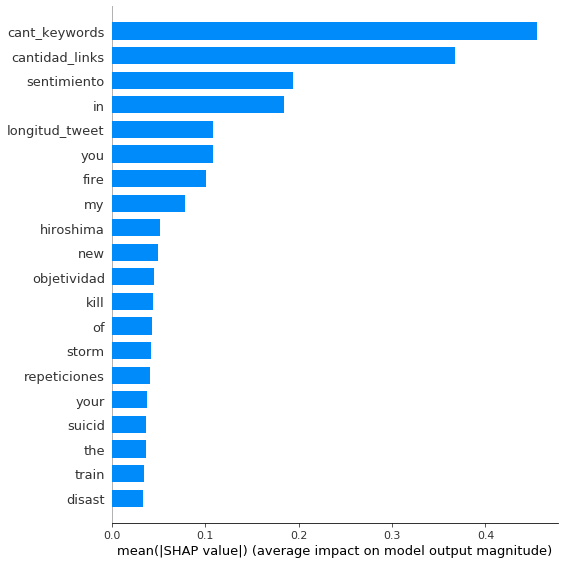

In [49]:
import shap
shap_values = shap.TreeExplainer(cb).shap_values(train_limpio)
shap.summary_plot(shap_values, train_limpio, plot_type="bar")

In [51]:
top_features=['cant_keywords','cantidad_links','in','sentimiento']

In [55]:
current_error = []
for train_index,test_index in kf.split(train_limpio):
    x_train,x_test = train_limpio.loc[train_index], train_limpio.loc[test_index]
    y_train,y_test = train_y[train_index], train_y[test_index]
    
    cb = CatBoostClassifier()
    cb.set_params(nan_mode= 'Min', eval_metric= 'CrossEntropy', iterations= 1250, sampling_frequency= 'PerTree', leaf_estimation_method= 'Newton',\
 grow_policy= 'SymmetricTree', penalties_coefficient= 1, boosting_type= 'Plain', model_shrink_mode= 'Constant', feature_border_type= 'GreedyLogSum',\
 bayesian_matrix_reg= 0.10000000149011612, l2_leaf_reg= 20, random_strength= 1, rsm= 1, boost_from_average= False, model_size_reg= 0.5, subsample= 0.800000011920929,\
 use_best_model= False, class_names= [0, 1], random_seed= 0, depth= 6, border_count= 254, classes_count= 0, auto_class_weights= 'None', sparse_features_conflict_fraction= 0,\
 leaf_estimation_backtracking= 'AnyImprovement', best_model_min_trees= 1, model_shrink_rate= 0, min_data_in_leaf= 1, loss_function= 'Logloss', learning_rate= 0.1, score_function= 'Cosine',\
 task_type= 'CPU', leaf_estimation_iterations= 10, bootstrap_type= 'MVS')
    cb.fit(x_train, y_train)
    
    
        
    #error de test:
    pred = cb.predict(x_test)
    current_error.append(f1_score(y_test.values, pred, average='macro'))
np.mean(current_error)    

0:	learn: 0.6761834	total: 197ms	remaining: 4m 6s
1:	learn: 0.6584125	total: 229ms	remaining: 2m 22s
2:	learn: 0.6464344	total: 250ms	remaining: 1m 43s
3:	learn: 0.6356406	total: 306ms	remaining: 1m 35s
4:	learn: 0.6275016	total: 338ms	remaining: 1m 24s
5:	learn: 0.6204436	total: 370ms	remaining: 1m 16s
6:	learn: 0.6145863	total: 406ms	remaining: 1m 12s
7:	learn: 0.6081680	total: 446ms	remaining: 1m 9s
8:	learn: 0.6028101	total: 479ms	remaining: 1m 6s
9:	learn: 0.5975330	total: 511ms	remaining: 1m 3s
10:	learn: 0.5926556	total: 543ms	remaining: 1m 1s
11:	learn: 0.5897114	total: 575ms	remaining: 59.3s
12:	learn: 0.5857500	total: 612ms	remaining: 58.3s
13:	learn: 0.5829333	total: 646ms	remaining: 57.1s
14:	learn: 0.5792058	total: 678ms	remaining: 55.9s
15:	learn: 0.5768143	total: 710ms	remaining: 54.7s
16:	learn: 0.5734102	total: 741ms	remaining: 53.8s
17:	learn: 0.5704561	total: 774ms	remaining: 53s
18:	learn: 0.5679809	total: 812ms	remaining: 52.6s
19:	learn: 0.5645184	total: 844ms	rem

167:	learn: 0.4307352	total: 5.69s	remaining: 36.6s
168:	learn: 0.4303692	total: 5.72s	remaining: 36.6s
169:	learn: 0.4296690	total: 5.75s	remaining: 36.5s
170:	learn: 0.4292238	total: 5.78s	remaining: 36.5s
171:	learn: 0.4291338	total: 5.81s	remaining: 36.4s
172:	learn: 0.4289099	total: 5.84s	remaining: 36.4s
173:	learn: 0.4283853	total: 5.88s	remaining: 36.4s
174:	learn: 0.4277427	total: 5.91s	remaining: 36.3s
175:	learn: 0.4276575	total: 5.94s	remaining: 36.3s
176:	learn: 0.4275598	total: 5.97s	remaining: 36.2s
177:	learn: 0.4269141	total: 6s	remaining: 36.2s
178:	learn: 0.4262581	total: 6.04s	remaining: 36.1s
179:	learn: 0.4260968	total: 6.07s	remaining: 36.1s
180:	learn: 0.4258732	total: 6.1s	remaining: 36s
181:	learn: 0.4252249	total: 6.13s	remaining: 36s
182:	learn: 0.4249667	total: 6.17s	remaining: 36s
183:	learn: 0.4247989	total: 6.2s	remaining: 35.9s
184:	learn: 0.4246324	total: 6.23s	remaining: 35.9s
185:	learn: 0.4243245	total: 6.26s	remaining: 35.8s
186:	learn: 0.4237997	t

329:	learn: 0.3824386	total: 10.9s	remaining: 30.4s
330:	learn: 0.3823839	total: 10.9s	remaining: 30.4s
331:	learn: 0.3822901	total: 11s	remaining: 30.3s
332:	learn: 0.3821729	total: 11s	remaining: 30.3s
333:	learn: 0.3820285	total: 11s	remaining: 30.3s
334:	learn: 0.3816815	total: 11.1s	remaining: 30.2s
335:	learn: 0.3812801	total: 11.1s	remaining: 30.2s
336:	learn: 0.3810587	total: 11.1s	remaining: 30.2s
337:	learn: 0.3809957	total: 11.2s	remaining: 30.1s
338:	learn: 0.3807208	total: 11.2s	remaining: 30.1s
339:	learn: 0.3806901	total: 11.2s	remaining: 30.1s
340:	learn: 0.3806570	total: 11.3s	remaining: 30s
341:	learn: 0.3803270	total: 11.3s	remaining: 30s
342:	learn: 0.3802561	total: 11.3s	remaining: 30s
343:	learn: 0.3799276	total: 11.4s	remaining: 29.9s
344:	learn: 0.3798938	total: 11.4s	remaining: 29.9s
345:	learn: 0.3798637	total: 11.4s	remaining: 29.8s
346:	learn: 0.3794915	total: 11.5s	remaining: 29.8s
347:	learn: 0.3793978	total: 11.5s	remaining: 29.8s
348:	learn: 0.3793364	to

488:	learn: 0.3557859	total: 16.1s	remaining: 25s
489:	learn: 0.3557632	total: 16.1s	remaining: 25s
490:	learn: 0.3554929	total: 16.1s	remaining: 25s
491:	learn: 0.3552924	total: 16.2s	remaining: 24.9s
492:	learn: 0.3548315	total: 16.2s	remaining: 24.9s
493:	learn: 0.3545522	total: 16.2s	remaining: 24.9s
494:	learn: 0.3544185	total: 16.3s	remaining: 24.8s
495:	learn: 0.3543435	total: 16.3s	remaining: 24.8s
496:	learn: 0.3542779	total: 16.3s	remaining: 24.8s
497:	learn: 0.3541738	total: 16.4s	remaining: 24.7s
498:	learn: 0.3541206	total: 16.4s	remaining: 24.7s
499:	learn: 0.3541005	total: 16.4s	remaining: 24.7s
500:	learn: 0.3536899	total: 16.5s	remaining: 24.6s
501:	learn: 0.3536689	total: 16.5s	remaining: 24.6s
502:	learn: 0.3535419	total: 16.5s	remaining: 24.6s
503:	learn: 0.3534743	total: 16.6s	remaining: 24.5s
504:	learn: 0.3534169	total: 16.6s	remaining: 24.5s
505:	learn: 0.3533981	total: 16.6s	remaining: 24.4s
506:	learn: 0.3531136	total: 16.7s	remaining: 24.4s
507:	learn: 0.3527

651:	learn: 0.3346184	total: 21.3s	remaining: 19.6s
652:	learn: 0.3344626	total: 21.4s	remaining: 19.5s
653:	learn: 0.3344386	total: 21.4s	remaining: 19.5s
654:	learn: 0.3344194	total: 21.4s	remaining: 19.5s
655:	learn: 0.3341259	total: 21.4s	remaining: 19.4s
656:	learn: 0.3340719	total: 21.5s	remaining: 19.4s
657:	learn: 0.3340510	total: 21.5s	remaining: 19.4s
658:	learn: 0.3340313	total: 21.5s	remaining: 19.3s
659:	learn: 0.3339640	total: 21.6s	remaining: 19.3s
660:	learn: 0.3339282	total: 21.6s	remaining: 19.3s
661:	learn: 0.3339003	total: 21.6s	remaining: 19.2s
662:	learn: 0.3338474	total: 21.7s	remaining: 19.2s
663:	learn: 0.3337543	total: 21.7s	remaining: 19.2s
664:	learn: 0.3336975	total: 21.7s	remaining: 19.1s
665:	learn: 0.3336355	total: 21.8s	remaining: 19.1s
666:	learn: 0.3333443	total: 21.8s	remaining: 19.1s
667:	learn: 0.3332755	total: 21.8s	remaining: 19s
668:	learn: 0.3330848	total: 21.9s	remaining: 19s
669:	learn: 0.3329997	total: 21.9s	remaining: 19s
670:	learn: 0.3328

813:	learn: 0.3160899	total: 26.5s	remaining: 14.2s
814:	learn: 0.3158945	total: 26.6s	remaining: 14.2s
815:	learn: 0.3158295	total: 26.6s	remaining: 14.2s
816:	learn: 0.3157478	total: 26.6s	remaining: 14.1s
817:	learn: 0.3157308	total: 26.7s	remaining: 14.1s
818:	learn: 0.3154228	total: 26.7s	remaining: 14.1s
819:	learn: 0.3152864	total: 26.7s	remaining: 14s
820:	learn: 0.3152498	total: 26.8s	remaining: 14s
821:	learn: 0.3151867	total: 26.8s	remaining: 14s
822:	learn: 0.3151311	total: 26.8s	remaining: 13.9s
823:	learn: 0.3151172	total: 26.9s	remaining: 13.9s
824:	learn: 0.3148675	total: 26.9s	remaining: 13.9s
825:	learn: 0.3146078	total: 26.9s	remaining: 13.8s
826:	learn: 0.3145890	total: 27s	remaining: 13.8s
827:	learn: 0.3144675	total: 27s	remaining: 13.8s
828:	learn: 0.3144159	total: 27s	remaining: 13.7s
829:	learn: 0.3143705	total: 27.1s	remaining: 13.7s
830:	learn: 0.3143503	total: 27.1s	remaining: 13.7s
831:	learn: 0.3143292	total: 27.1s	remaining: 13.6s
832:	learn: 0.3142916	to

975:	learn: 0.3016348	total: 31.8s	remaining: 8.92s
976:	learn: 0.3014391	total: 31.8s	remaining: 8.88s
977:	learn: 0.3013204	total: 31.8s	remaining: 8.85s
978:	learn: 0.3013057	total: 31.9s	remaining: 8.82s
979:	learn: 0.3011390	total: 31.9s	remaining: 8.79s
980:	learn: 0.3011109	total: 31.9s	remaining: 8.75s
981:	learn: 0.3010955	total: 32s	remaining: 8.72s
982:	learn: 0.3010793	total: 32s	remaining: 8.69s
983:	learn: 0.3010459	total: 32s	remaining: 8.66s
984:	learn: 0.3006383	total: 32.1s	remaining: 8.62s
985:	learn: 0.3006205	total: 32.1s	remaining: 8.59s
986:	learn: 0.3005536	total: 32.1s	remaining: 8.56s
987:	learn: 0.3005315	total: 32.2s	remaining: 8.53s
988:	learn: 0.3004963	total: 32.2s	remaining: 8.49s
989:	learn: 0.3004628	total: 32.2s	remaining: 8.46s
990:	learn: 0.3003399	total: 32.2s	remaining: 8.43s
991:	learn: 0.3002984	total: 32.3s	remaining: 8.39s
992:	learn: 0.3002753	total: 32.3s	remaining: 8.36s
993:	learn: 0.3002454	total: 32.3s	remaining: 8.33s
994:	learn: 0.3002

1136:	learn: 0.2892509	total: 36.9s	remaining: 3.67s
1137:	learn: 0.2892321	total: 37s	remaining: 3.64s
1138:	learn: 0.2891966	total: 37s	remaining: 3.61s
1139:	learn: 0.2891474	total: 37s	remaining: 3.57s
1140:	learn: 0.2890130	total: 37.1s	remaining: 3.54s
1141:	learn: 0.2889979	total: 37.1s	remaining: 3.51s
1142:	learn: 0.2889558	total: 37.1s	remaining: 3.48s
1143:	learn: 0.2889004	total: 37.2s	remaining: 3.44s
1144:	learn: 0.2885390	total: 37.2s	remaining: 3.41s
1145:	learn: 0.2884048	total: 37.2s	remaining: 3.38s
1146:	learn: 0.2882660	total: 37.3s	remaining: 3.35s
1147:	learn: 0.2882290	total: 37.3s	remaining: 3.31s
1148:	learn: 0.2882157	total: 37.3s	remaining: 3.28s
1149:	learn: 0.2882002	total: 37.4s	remaining: 3.25s
1150:	learn: 0.2881734	total: 37.4s	remaining: 3.22s
1151:	learn: 0.2881393	total: 37.4s	remaining: 3.18s
1152:	learn: 0.2881278	total: 37.5s	remaining: 3.15s
1153:	learn: 0.2879803	total: 37.5s	remaining: 3.12s
1154:	learn: 0.2879642	total: 37.5s	remaining: 3.08s

49:	learn: 0.5031038	total: 1.61s	remaining: 38.6s
50:	learn: 0.5019963	total: 1.64s	remaining: 38.6s
51:	learn: 0.5013482	total: 1.67s	remaining: 38.5s
52:	learn: 0.5004606	total: 1.7s	remaining: 38.5s
53:	learn: 0.4991231	total: 1.73s	remaining: 38.4s
54:	learn: 0.4981312	total: 1.76s	remaining: 38.4s
55:	learn: 0.4972862	total: 1.8s	remaining: 38.4s
56:	learn: 0.4961588	total: 1.83s	remaining: 38.3s
57:	learn: 0.4948682	total: 1.86s	remaining: 38.3s
58:	learn: 0.4940871	total: 1.9s	remaining: 38.3s
59:	learn: 0.4934383	total: 1.93s	remaining: 38.2s
60:	learn: 0.4928858	total: 1.96s	remaining: 38.1s
61:	learn: 0.4916517	total: 1.99s	remaining: 38.2s
62:	learn: 0.4903600	total: 2.02s	remaining: 38.1s
63:	learn: 0.4897686	total: 2.05s	remaining: 38.1s
64:	learn: 0.4891234	total: 2.08s	remaining: 38s
65:	learn: 0.4883405	total: 2.12s	remaining: 37.9s
66:	learn: 0.4873771	total: 2.15s	remaining: 37.9s
67:	learn: 0.4863380	total: 2.18s	remaining: 37.9s
68:	learn: 0.4857067	total: 2.21s	re

210:	learn: 0.4037558	total: 6.76s	remaining: 33.3s
211:	learn: 0.4036523	total: 6.8s	remaining: 33.3s
212:	learn: 0.4031326	total: 6.83s	remaining: 33.2s
213:	learn: 0.4024489	total: 6.86s	remaining: 33.2s
214:	learn: 0.4020093	total: 6.89s	remaining: 33.2s
215:	learn: 0.4018581	total: 6.92s	remaining: 33.1s
216:	learn: 0.4011486	total: 6.95s	remaining: 33.1s
217:	learn: 0.4010218	total: 6.99s	remaining: 33.1s
218:	learn: 0.4009266	total: 7.02s	remaining: 33s
219:	learn: 0.4002847	total: 7.05s	remaining: 33s
220:	learn: 0.3997385	total: 7.08s	remaining: 33s
221:	learn: 0.3992655	total: 7.11s	remaining: 32.9s
222:	learn: 0.3989629	total: 7.14s	remaining: 32.9s
223:	learn: 0.3988022	total: 7.18s	remaining: 32.9s
224:	learn: 0.3986226	total: 7.21s	remaining: 32.8s
225:	learn: 0.3984006	total: 7.24s	remaining: 32.8s
226:	learn: 0.3983202	total: 7.27s	remaining: 32.8s
227:	learn: 0.3981629	total: 7.3s	remaining: 32.7s
228:	learn: 0.3980822	total: 7.33s	remaining: 32.7s
229:	learn: 0.397650

372:	learn: 0.3618843	total: 11.9s	remaining: 28.1s
373:	learn: 0.3618547	total: 12s	remaining: 28.1s
374:	learn: 0.3617910	total: 12s	remaining: 28s
375:	learn: 0.3613949	total: 12s	remaining: 28s
376:	learn: 0.3613687	total: 12.1s	remaining: 28s
377:	learn: 0.3612737	total: 12.1s	remaining: 27.9s
378:	learn: 0.3611690	total: 12.1s	remaining: 27.9s
379:	learn: 0.3606857	total: 12.2s	remaining: 27.9s
380:	learn: 0.3600089	total: 12.2s	remaining: 27.9s
381:	learn: 0.3599278	total: 12.2s	remaining: 27.8s
382:	learn: 0.3592345	total: 12.3s	remaining: 27.8s
383:	learn: 0.3590936	total: 12.3s	remaining: 27.8s
384:	learn: 0.3590641	total: 12.3s	remaining: 27.7s
385:	learn: 0.3590376	total: 12.4s	remaining: 27.7s
386:	learn: 0.3589164	total: 12.4s	remaining: 27.7s
387:	learn: 0.3588170	total: 12.4s	remaining: 27.6s
388:	learn: 0.3587590	total: 12.5s	remaining: 27.6s
389:	learn: 0.3586034	total: 12.5s	remaining: 27.6s
390:	learn: 0.3581660	total: 12.5s	remaining: 27.5s
391:	learn: 0.3580459	to

535:	learn: 0.3369747	total: 17.2s	remaining: 22.9s
536:	learn: 0.3369523	total: 17.2s	remaining: 22.9s
537:	learn: 0.3369250	total: 17.3s	remaining: 22.8s
538:	learn: 0.3365311	total: 17.3s	remaining: 22.8s
539:	learn: 0.3365136	total: 17.3s	remaining: 22.8s
540:	learn: 0.3364343	total: 17.3s	remaining: 22.7s
541:	learn: 0.3363839	total: 17.4s	remaining: 22.7s
542:	learn: 0.3363349	total: 17.4s	remaining: 22.7s
543:	learn: 0.3362775	total: 17.4s	remaining: 22.6s
544:	learn: 0.3361364	total: 17.5s	remaining: 22.6s
545:	learn: 0.3361154	total: 17.5s	remaining: 22.6s
546:	learn: 0.3357694	total: 17.5s	remaining: 22.5s
547:	learn: 0.3357205	total: 17.6s	remaining: 22.5s
548:	learn: 0.3352134	total: 17.6s	remaining: 22.5s
549:	learn: 0.3350758	total: 17.6s	remaining: 22.4s
550:	learn: 0.3350567	total: 17.7s	remaining: 22.4s
551:	learn: 0.3350076	total: 17.7s	remaining: 22.4s
552:	learn: 0.3349824	total: 17.7s	remaining: 22.3s
553:	learn: 0.3349563	total: 17.8s	remaining: 22.3s
554:	learn: 

697:	learn: 0.3155636	total: 22.4s	remaining: 17.7s
698:	learn: 0.3153773	total: 22.4s	remaining: 17.7s
699:	learn: 0.3150670	total: 22.4s	remaining: 17.6s
700:	learn: 0.3150029	total: 22.5s	remaining: 17.6s
701:	learn: 0.3148116	total: 22.5s	remaining: 17.6s
702:	learn: 0.3145330	total: 22.5s	remaining: 17.5s
703:	learn: 0.3143447	total: 22.6s	remaining: 17.5s
704:	learn: 0.3141160	total: 22.6s	remaining: 17.5s
705:	learn: 0.3138018	total: 22.6s	remaining: 17.4s
706:	learn: 0.3135965	total: 22.7s	remaining: 17.4s
707:	learn: 0.3135801	total: 22.7s	remaining: 17.4s
708:	learn: 0.3135428	total: 22.7s	remaining: 17.3s
709:	learn: 0.3135018	total: 22.8s	remaining: 17.3s
710:	learn: 0.3134635	total: 22.8s	remaining: 17.3s
711:	learn: 0.3134108	total: 22.8s	remaining: 17.2s
712:	learn: 0.3133893	total: 22.9s	remaining: 17.2s
713:	learn: 0.3133680	total: 22.9s	remaining: 17.2s
714:	learn: 0.3133075	total: 22.9s	remaining: 17.1s
715:	learn: 0.3132799	total: 22.9s	remaining: 17.1s
716:	learn: 

858:	learn: 0.2992956	total: 27.5s	remaining: 12.5s
859:	learn: 0.2991438	total: 27.5s	remaining: 12.5s
860:	learn: 0.2991076	total: 27.6s	remaining: 12.5s
861:	learn: 0.2990846	total: 27.6s	remaining: 12.4s
862:	learn: 0.2989305	total: 27.6s	remaining: 12.4s
863:	learn: 0.2989114	total: 27.7s	remaining: 12.4s
864:	learn: 0.2988641	total: 27.7s	remaining: 12.3s
865:	learn: 0.2988464	total: 27.7s	remaining: 12.3s
866:	learn: 0.2988051	total: 27.8s	remaining: 12.3s
867:	learn: 0.2985831	total: 27.8s	remaining: 12.2s
868:	learn: 0.2982755	total: 27.8s	remaining: 12.2s
869:	learn: 0.2982552	total: 27.9s	remaining: 12.2s
870:	learn: 0.2981865	total: 27.9s	remaining: 12.1s
871:	learn: 0.2981498	total: 27.9s	remaining: 12.1s
872:	learn: 0.2980348	total: 28s	remaining: 12.1s
873:	learn: 0.2977459	total: 28s	remaining: 12s
874:	learn: 0.2977255	total: 28s	remaining: 12s
875:	learn: 0.2976899	total: 28s	remaining: 12s
876:	learn: 0.2975674	total: 28.1s	remaining: 11.9s
877:	learn: 0.2975491	tota

1019:	learn: 0.2860934	total: 32.7s	remaining: 7.38s
1020:	learn: 0.2858128	total: 32.8s	remaining: 7.35s
1021:	learn: 0.2857937	total: 32.8s	remaining: 7.31s
1022:	learn: 0.2856064	total: 32.8s	remaining: 7.28s
1023:	learn: 0.2855877	total: 32.8s	remaining: 7.25s
1024:	learn: 0.2855180	total: 32.9s	remaining: 7.22s
1025:	learn: 0.2851444	total: 32.9s	remaining: 7.18s
1026:	learn: 0.2848791	total: 32.9s	remaining: 7.15s
1027:	learn: 0.2848482	total: 33s	remaining: 7.12s
1028:	learn: 0.2848167	total: 33s	remaining: 7.09s
1029:	learn: 0.2847962	total: 33s	remaining: 7.06s
1030:	learn: 0.2846466	total: 33.1s	remaining: 7.02s
1031:	learn: 0.2844229	total: 33.1s	remaining: 6.99s
1032:	learn: 0.2843398	total: 33.1s	remaining: 6.96s
1033:	learn: 0.2843095	total: 33.2s	remaining: 6.93s
1034:	learn: 0.2842927	total: 33.2s	remaining: 6.9s
1035:	learn: 0.2841198	total: 33.2s	remaining: 6.86s
1036:	learn: 0.2839294	total: 33.3s	remaining: 6.83s
1037:	learn: 0.2838729	total: 33.3s	remaining: 6.8s
1

1176:	learn: 0.2743793	total: 37.8s	remaining: 2.34s
1177:	learn: 0.2742933	total: 37.8s	remaining: 2.31s
1178:	learn: 0.2742773	total: 37.8s	remaining: 2.28s
1179:	learn: 0.2742219	total: 37.9s	remaining: 2.25s
1180:	learn: 0.2741461	total: 37.9s	remaining: 2.21s
1181:	learn: 0.2741166	total: 37.9s	remaining: 2.18s
1182:	learn: 0.2739648	total: 38s	remaining: 2.15s
1183:	learn: 0.2738319	total: 38s	remaining: 2.12s
1184:	learn: 0.2738033	total: 38s	remaining: 2.08s
1185:	learn: 0.2737873	total: 38.1s	remaining: 2.05s
1186:	learn: 0.2735864	total: 38.1s	remaining: 2.02s
1187:	learn: 0.2735598	total: 38.1s	remaining: 1.99s
1188:	learn: 0.2735334	total: 38.2s	remaining: 1.96s
1189:	learn: 0.2735146	total: 38.2s	remaining: 1.93s
1190:	learn: 0.2734966	total: 38.2s	remaining: 1.89s
1191:	learn: 0.2733115	total: 38.2s	remaining: 1.86s
1192:	learn: 0.2732856	total: 38.3s	remaining: 1.83s
1193:	learn: 0.2730676	total: 38.3s	remaining: 1.8s
1194:	learn: 0.2730509	total: 38.3s	remaining: 1.76s


85:	learn: 0.4671697	total: 2.7s	remaining: 36.5s
86:	learn: 0.4662664	total: 2.73s	remaining: 36.5s
87:	learn: 0.4653661	total: 2.76s	remaining: 36.5s
88:	learn: 0.4644538	total: 2.79s	remaining: 36.4s
89:	learn: 0.4638101	total: 2.82s	remaining: 36.4s
90:	learn: 0.4629446	total: 2.85s	remaining: 36.3s
91:	learn: 0.4621276	total: 2.89s	remaining: 36.3s
92:	learn: 0.4611852	total: 2.92s	remaining: 36.3s
93:	learn: 0.4601909	total: 2.95s	remaining: 36.3s
94:	learn: 0.4593782	total: 2.98s	remaining: 36.2s
95:	learn: 0.4585617	total: 3.01s	remaining: 36.2s
96:	learn: 0.4573557	total: 3.04s	remaining: 36.1s
97:	learn: 0.4562573	total: 3.07s	remaining: 36.1s
98:	learn: 0.4556836	total: 3.1s	remaining: 36.1s
99:	learn: 0.4551927	total: 3.13s	remaining: 36.1s
100:	learn: 0.4542029	total: 3.17s	remaining: 36s
101:	learn: 0.4531207	total: 3.2s	remaining: 36s
102:	learn: 0.4528430	total: 3.23s	remaining: 35.9s
103:	learn: 0.4519190	total: 3.26s	remaining: 35.9s
104:	learn: 0.4512196	total: 3.29s

244:	learn: 0.3896541	total: 7.78s	remaining: 31.9s
245:	learn: 0.3894111	total: 7.82s	remaining: 31.9s
246:	learn: 0.3892686	total: 7.85s	remaining: 31.9s
247:	learn: 0.3889152	total: 7.89s	remaining: 31.9s
248:	learn: 0.3887358	total: 7.92s	remaining: 31.8s
249:	learn: 0.3882404	total: 7.96s	remaining: 31.8s
250:	learn: 0.3880940	total: 7.99s	remaining: 31.8s
251:	learn: 0.3878671	total: 8.03s	remaining: 31.8s
252:	learn: 0.3877845	total: 8.06s	remaining: 31.8s
253:	learn: 0.3872364	total: 8.1s	remaining: 31.8s
254:	learn: 0.3871619	total: 8.13s	remaining: 31.7s
255:	learn: 0.3870447	total: 8.17s	remaining: 31.7s
256:	learn: 0.3864746	total: 8.2s	remaining: 31.7s
257:	learn: 0.3860091	total: 8.24s	remaining: 31.7s
258:	learn: 0.3857753	total: 8.27s	remaining: 31.7s
259:	learn: 0.3853098	total: 8.31s	remaining: 31.6s
260:	learn: 0.3852442	total: 8.34s	remaining: 31.6s
261:	learn: 0.3851608	total: 8.38s	remaining: 31.6s
262:	learn: 0.3849849	total: 8.41s	remaining: 31.6s
263:	learn: 0.

404:	learn: 0.3572797	total: 12.9s	remaining: 26.9s
405:	learn: 0.3569249	total: 12.9s	remaining: 26.8s
406:	learn: 0.3568973	total: 12.9s	remaining: 26.8s
407:	learn: 0.3566988	total: 13s	remaining: 26.8s
408:	learn: 0.3566704	total: 13s	remaining: 26.7s
409:	learn: 0.3566046	total: 13s	remaining: 26.7s
410:	learn: 0.3563961	total: 13.1s	remaining: 26.7s
411:	learn: 0.3563707	total: 13.1s	remaining: 26.6s
412:	learn: 0.3562296	total: 13.1s	remaining: 26.6s
413:	learn: 0.3560507	total: 13.1s	remaining: 26.5s
414:	learn: 0.3553134	total: 13.2s	remaining: 26.5s
415:	learn: 0.3548687	total: 13.2s	remaining: 26.5s
416:	learn: 0.3548410	total: 13.2s	remaining: 26.4s
417:	learn: 0.3544427	total: 13.3s	remaining: 26.4s
418:	learn: 0.3541746	total: 13.3s	remaining: 26.4s
419:	learn: 0.3538966	total: 13.3s	remaining: 26.3s
420:	learn: 0.3538377	total: 13.4s	remaining: 26.3s
421:	learn: 0.3538099	total: 13.4s	remaining: 26.3s
422:	learn: 0.3537828	total: 13.4s	remaining: 26.2s
423:	learn: 0.3536

566:	learn: 0.3340185	total: 17.9s	remaining: 21.5s
567:	learn: 0.3334356	total: 17.9s	remaining: 21.5s
568:	learn: 0.3333962	total: 17.9s	remaining: 21.5s
569:	learn: 0.3333568	total: 18s	remaining: 21.4s
570:	learn: 0.3331816	total: 18s	remaining: 21.4s
571:	learn: 0.3328767	total: 18s	remaining: 21.4s
572:	learn: 0.3328486	total: 18.1s	remaining: 21.3s
573:	learn: 0.3327585	total: 18.1s	remaining: 21.3s
574:	learn: 0.3327336	total: 18.1s	remaining: 21.3s
575:	learn: 0.3327083	total: 18.1s	remaining: 21.2s
576:	learn: 0.3325446	total: 18.2s	remaining: 21.2s
577:	learn: 0.3325054	total: 18.2s	remaining: 21.2s
578:	learn: 0.3324815	total: 18.2s	remaining: 21.1s
579:	learn: 0.3323327	total: 18.3s	remaining: 21.1s
580:	learn: 0.3322913	total: 18.3s	remaining: 21.1s
581:	learn: 0.3322327	total: 18.3s	remaining: 21s
582:	learn: 0.3322133	total: 18.4s	remaining: 21s
583:	learn: 0.3320267	total: 18.4s	remaining: 21s
584:	learn: 0.3316692	total: 18.4s	remaining: 20.9s
585:	learn: 0.3316462	to

728:	learn: 0.3175107	total: 22.8s	remaining: 16.3s
729:	learn: 0.3174891	total: 22.9s	remaining: 16.3s
730:	learn: 0.3170099	total: 22.9s	remaining: 16.3s
731:	learn: 0.3169203	total: 22.9s	remaining: 16.2s
732:	learn: 0.3168378	total: 23s	remaining: 16.2s
733:	learn: 0.3167289	total: 23s	remaining: 16.2s
734:	learn: 0.3163847	total: 23s	remaining: 16.1s
735:	learn: 0.3163511	total: 23.1s	remaining: 16.1s
736:	learn: 0.3160306	total: 23.1s	remaining: 16.1s
737:	learn: 0.3160115	total: 23.1s	remaining: 16s
738:	learn: 0.3159925	total: 23.2s	remaining: 16s
739:	learn: 0.3159740	total: 23.2s	remaining: 16s
740:	learn: 0.3156078	total: 23.2s	remaining: 15.9s
741:	learn: 0.3153835	total: 23.2s	remaining: 15.9s
742:	learn: 0.3153628	total: 23.3s	remaining: 15.9s
743:	learn: 0.3153428	total: 23.3s	remaining: 15.8s
744:	learn: 0.3150923	total: 23.3s	remaining: 15.8s
745:	learn: 0.3147856	total: 23.4s	remaining: 15.8s
746:	learn: 0.3147268	total: 23.4s	remaining: 15.8s
747:	learn: 0.3146422	to

891:	learn: 0.2997698	total: 27.9s	remaining: 11.2s
892:	learn: 0.2996235	total: 27.9s	remaining: 11.1s
893:	learn: 0.2996033	total: 27.9s	remaining: 11.1s
894:	learn: 0.2995824	total: 27.9s	remaining: 11.1s
895:	learn: 0.2995151	total: 28s	remaining: 11.1s
896:	learn: 0.2994775	total: 28s	remaining: 11s
897:	learn: 0.2994530	total: 28s	remaining: 11s
898:	learn: 0.2994302	total: 28.1s	remaining: 11s
899:	learn: 0.2992875	total: 28.1s	remaining: 10.9s
900:	learn: 0.2992469	total: 28.1s	remaining: 10.9s
901:	learn: 0.2991947	total: 28.2s	remaining: 10.9s
902:	learn: 0.2988679	total: 28.2s	remaining: 10.8s
903:	learn: 0.2988295	total: 28.2s	remaining: 10.8s
904:	learn: 0.2987957	total: 28.3s	remaining: 10.8s
905:	learn: 0.2987528	total: 28.3s	remaining: 10.7s
906:	learn: 0.2987284	total: 28.3s	remaining: 10.7s
907:	learn: 0.2986840	total: 28.3s	remaining: 10.7s
908:	learn: 0.2984830	total: 28.4s	remaining: 10.6s
909:	learn: 0.2982663	total: 28.4s	remaining: 10.6s
910:	learn: 0.2982184	to

1054:	learn: 0.2863756	total: 32.9s	remaining: 6.07s
1055:	learn: 0.2863571	total: 32.9s	remaining: 6.04s
1056:	learn: 0.2863212	total: 32.9s	remaining: 6.01s
1057:	learn: 0.2860290	total: 33s	remaining: 5.98s
1058:	learn: 0.2860107	total: 33s	remaining: 5.95s
1059:	learn: 0.2859919	total: 33s	remaining: 5.92s
1060:	learn: 0.2858355	total: 33s	remaining: 5.89s
1061:	learn: 0.2858170	total: 33.1s	remaining: 5.86s
1062:	learn: 0.2857525	total: 33.1s	remaining: 5.82s
1063:	learn: 0.2857178	total: 33.1s	remaining: 5.79s
1064:	learn: 0.2856989	total: 33.2s	remaining: 5.76s
1065:	learn: 0.2856802	total: 33.2s	remaining: 5.73s
1066:	learn: 0.2854425	total: 33.2s	remaining: 5.7s
1067:	learn: 0.2854278	total: 33.3s	remaining: 5.67s
1068:	learn: 0.2854088	total: 33.3s	remaining: 5.64s
1069:	learn: 0.2853930	total: 33.3s	remaining: 5.6s
1070:	learn: 0.2853537	total: 33.3s	remaining: 5.57s
1071:	learn: 0.2849661	total: 33.4s	remaining: 5.54s
1072:	learn: 0.2849468	total: 33.4s	remaining: 5.51s
107

1211:	learn: 0.2746528	total: 37.7s	remaining: 1.18s
1212:	learn: 0.2746177	total: 37.7s	remaining: 1.15s
1213:	learn: 0.2745916	total: 37.7s	remaining: 1.12s
1214:	learn: 0.2745734	total: 37.8s	remaining: 1.09s
1215:	learn: 0.2745574	total: 37.8s	remaining: 1.06s
1216:	learn: 0.2745380	total: 37.8s	remaining: 1.03s
1217:	learn: 0.2745213	total: 37.9s	remaining: 995ms
1218:	learn: 0.2745058	total: 37.9s	remaining: 964ms
1219:	learn: 0.2743522	total: 37.9s	remaining: 933ms
1220:	learn: 0.2743242	total: 38s	remaining: 902ms
1221:	learn: 0.2742964	total: 38s	remaining: 871ms
1222:	learn: 0.2741772	total: 38s	remaining: 840ms
1223:	learn: 0.2739701	total: 38.1s	remaining: 809ms
1224:	learn: 0.2739167	total: 38.1s	remaining: 777ms
1225:	learn: 0.2738906	total: 38.1s	remaining: 746ms
1226:	learn: 0.2738759	total: 38.2s	remaining: 715ms
1227:	learn: 0.2734719	total: 38.2s	remaining: 684ms
1228:	learn: 0.2734568	total: 38.2s	remaining: 653ms
1229:	learn: 0.2734403	total: 38.2s	remaining: 622ms

127:	learn: 0.4447179	total: 4.04s	remaining: 35.4s
128:	learn: 0.4439092	total: 4.07s	remaining: 35.3s
129:	learn: 0.4431529	total: 4.1s	remaining: 35.3s
130:	learn: 0.4428781	total: 4.13s	remaining: 35.3s
131:	learn: 0.4422381	total: 4.16s	remaining: 35.2s
132:	learn: 0.4419050	total: 4.19s	remaining: 35.2s
133:	learn: 0.4410118	total: 4.22s	remaining: 35.2s
134:	learn: 0.4402756	total: 4.25s	remaining: 35.1s
135:	learn: 0.4395955	total: 4.28s	remaining: 35.1s
136:	learn: 0.4386624	total: 4.32s	remaining: 35.1s
137:	learn: 0.4385590	total: 4.35s	remaining: 35s
138:	learn: 0.4383442	total: 4.38s	remaining: 35s
139:	learn: 0.4378724	total: 4.41s	remaining: 35s
140:	learn: 0.4375232	total: 4.44s	remaining: 34.9s
141:	learn: 0.4372291	total: 4.47s	remaining: 34.9s
142:	learn: 0.4365271	total: 4.5s	remaining: 34.9s
143:	learn: 0.4358907	total: 4.54s	remaining: 34.8s
144:	learn: 0.4356752	total: 4.57s	remaining: 34.8s
145:	learn: 0.4348482	total: 4.6s	remaining: 34.8s
146:	learn: 0.4344546

289:	learn: 0.3866450	total: 9.14s	remaining: 30.3s
290:	learn: 0.3864138	total: 9.17s	remaining: 30.2s
291:	learn: 0.3858920	total: 9.2s	remaining: 30.2s
292:	learn: 0.3855935	total: 9.23s	remaining: 30.2s
293:	learn: 0.3855395	total: 9.26s	remaining: 30.1s
294:	learn: 0.3853606	total: 9.29s	remaining: 30.1s
295:	learn: 0.3850434	total: 9.33s	remaining: 30.1s
296:	learn: 0.3849565	total: 9.36s	remaining: 30s
297:	learn: 0.3849224	total: 9.39s	remaining: 30s
298:	learn: 0.3848564	total: 9.42s	remaining: 30s
299:	learn: 0.3843957	total: 9.45s	remaining: 29.9s
300:	learn: 0.3839195	total: 9.48s	remaining: 29.9s
301:	learn: 0.3838620	total: 9.51s	remaining: 29.9s
302:	learn: 0.3837706	total: 9.54s	remaining: 29.8s
303:	learn: 0.3833801	total: 9.57s	remaining: 29.8s
304:	learn: 0.3833478	total: 9.61s	remaining: 29.8s
305:	learn: 0.3833134	total: 9.63s	remaining: 29.7s
306:	learn: 0.3829403	total: 9.67s	remaining: 29.7s
307:	learn: 0.3828601	total: 9.7s	remaining: 29.7s
308:	learn: 0.382380

450:	learn: 0.3566133	total: 14.2s	remaining: 25.1s
451:	learn: 0.3565874	total: 14.2s	remaining: 25.1s
452:	learn: 0.3565121	total: 14.2s	remaining: 25.1s
453:	learn: 0.3559693	total: 14.3s	remaining: 25s
454:	learn: 0.3558799	total: 14.3s	remaining: 25s
455:	learn: 0.3558186	total: 14.3s	remaining: 25s
456:	learn: 0.3553739	total: 14.4s	remaining: 24.9s
457:	learn: 0.3550421	total: 14.4s	remaining: 24.9s
458:	learn: 0.3550179	total: 14.4s	remaining: 24.9s
459:	learn: 0.3546537	total: 14.5s	remaining: 24.8s
460:	learn: 0.3545021	total: 14.5s	remaining: 24.8s
461:	learn: 0.3544750	total: 14.5s	remaining: 24.8s
462:	learn: 0.3543507	total: 14.6s	remaining: 24.7s
463:	learn: 0.3541580	total: 14.6s	remaining: 24.7s
464:	learn: 0.3538060	total: 14.6s	remaining: 24.7s
465:	learn: 0.3536328	total: 14.7s	remaining: 24.7s
466:	learn: 0.3533198	total: 14.7s	remaining: 24.6s
467:	learn: 0.3532611	total: 14.7s	remaining: 24.6s
468:	learn: 0.3532057	total: 14.7s	remaining: 24.6s
469:	learn: 0.3531

614:	learn: 0.3335512	total: 19.4s	remaining: 20.1s
615:	learn: 0.3334855	total: 19.5s	remaining: 20s
616:	learn: 0.3333910	total: 19.5s	remaining: 20s
617:	learn: 0.3333677	total: 19.5s	remaining: 20s
618:	learn: 0.3332587	total: 19.6s	remaining: 19.9s
619:	learn: 0.3329294	total: 19.6s	remaining: 19.9s
620:	learn: 0.3327435	total: 19.6s	remaining: 19.9s
621:	learn: 0.3327135	total: 19.6s	remaining: 19.8s
622:	learn: 0.3326897	total: 19.7s	remaining: 19.8s
623:	learn: 0.3326651	total: 19.7s	remaining: 19.8s
624:	learn: 0.3323139	total: 19.7s	remaining: 19.7s
625:	learn: 0.3320110	total: 19.8s	remaining: 19.7s
626:	learn: 0.3319049	total: 19.8s	remaining: 19.7s
627:	learn: 0.3318376	total: 19.8s	remaining: 19.7s
628:	learn: 0.3318010	total: 19.9s	remaining: 19.6s
629:	learn: 0.3317077	total: 19.9s	remaining: 19.6s
630:	learn: 0.3316167	total: 19.9s	remaining: 19.6s
631:	learn: 0.3315778	total: 20s	remaining: 19.5s
632:	learn: 0.3315593	total: 20s	remaining: 19.5s
633:	learn: 0.3315166	

776:	learn: 0.3171424	total: 24.6s	remaining: 15s
777:	learn: 0.3171193	total: 24.6s	remaining: 14.9s
778:	learn: 0.3168029	total: 24.6s	remaining: 14.9s
779:	learn: 0.3167713	total: 24.7s	remaining: 14.9s
780:	learn: 0.3167206	total: 24.7s	remaining: 14.8s
781:	learn: 0.3166354	total: 24.7s	remaining: 14.8s
782:	learn: 0.3165991	total: 24.8s	remaining: 14.8s
783:	learn: 0.3165628	total: 24.8s	remaining: 14.7s
784:	learn: 0.3164380	total: 24.8s	remaining: 14.7s
785:	learn: 0.3163995	total: 24.9s	remaining: 14.7s
786:	learn: 0.3163478	total: 24.9s	remaining: 14.6s
787:	learn: 0.3163005	total: 24.9s	remaining: 14.6s
788:	learn: 0.3160628	total: 24.9s	remaining: 14.6s
789:	learn: 0.3157949	total: 25s	remaining: 14.5s
790:	learn: 0.3157251	total: 25s	remaining: 14.5s
791:	learn: 0.3156886	total: 25s	remaining: 14.5s
792:	learn: 0.3155643	total: 25.1s	remaining: 14.4s
793:	learn: 0.3153236	total: 25.1s	remaining: 14.4s
794:	learn: 0.3151612	total: 25.1s	remaining: 14.4s
795:	learn: 0.314924

937:	learn: 0.3014175	total: 29.6s	remaining: 9.86s
938:	learn: 0.3013966	total: 29.7s	remaining: 9.83s
939:	learn: 0.3013758	total: 29.7s	remaining: 9.79s
940:	learn: 0.3013408	total: 29.7s	remaining: 9.76s
941:	learn: 0.3013241	total: 29.8s	remaining: 9.73s
942:	learn: 0.3013025	total: 29.8s	remaining: 9.7s
943:	learn: 0.3012541	total: 29.8s	remaining: 9.67s
944:	learn: 0.3012055	total: 29.9s	remaining: 9.64s
945:	learn: 0.3011840	total: 29.9s	remaining: 9.61s
946:	learn: 0.3011375	total: 29.9s	remaining: 9.57s
947:	learn: 0.3010924	total: 30s	remaining: 9.54s
948:	learn: 0.3009486	total: 30s	remaining: 9.51s
949:	learn: 0.3009192	total: 30s	remaining: 9.48s
950:	learn: 0.3008771	total: 30.1s	remaining: 9.45s
951:	learn: 0.3008091	total: 30.1s	remaining: 9.42s
952:	learn: 0.3007538	total: 30.1s	remaining: 9.38s
953:	learn: 0.3007323	total: 30.1s	remaining: 9.35s
954:	learn: 0.3006617	total: 30.2s	remaining: 9.32s
955:	learn: 0.3006291	total: 30.2s	remaining: 9.29s
956:	learn: 0.30059

1100:	learn: 0.2876358	total: 34.9s	remaining: 4.72s
1101:	learn: 0.2875997	total: 34.9s	remaining: 4.68s
1102:	learn: 0.2874298	total: 34.9s	remaining: 4.65s
1103:	learn: 0.2874030	total: 34.9s	remaining: 4.62s
1104:	learn: 0.2872924	total: 35s	remaining: 4.59s
1105:	learn: 0.2871238	total: 35s	remaining: 4.56s
1106:	learn: 0.2870920	total: 35s	remaining: 4.53s
1107:	learn: 0.2870761	total: 35.1s	remaining: 4.5s
1108:	learn: 0.2869588	total: 35.1s	remaining: 4.46s
1109:	learn: 0.2869204	total: 35.1s	remaining: 4.43s
1110:	learn: 0.2868822	total: 35.2s	remaining: 4.4s
1111:	learn: 0.2868670	total: 35.2s	remaining: 4.37s
1112:	learn: 0.2868382	total: 35.2s	remaining: 4.34s
1113:	learn: 0.2868072	total: 35.3s	remaining: 4.3s
1114:	learn: 0.2867761	total: 35.3s	remaining: 4.27s
1115:	learn: 0.2867037	total: 35.3s	remaining: 4.24s
1116:	learn: 0.2866891	total: 35.4s	remaining: 4.21s
1117:	learn: 0.2865902	total: 35.4s	remaining: 4.18s
1118:	learn: 0.2865176	total: 35.4s	remaining: 4.15s
11

7:	learn: 0.6019188	total: 285ms	remaining: 44.2s
8:	learn: 0.5963470	total: 320ms	remaining: 44.1s
9:	learn: 0.5911369	total: 352ms	remaining: 43.7s
10:	learn: 0.5869753	total: 384ms	remaining: 43.3s
11:	learn: 0.5829301	total: 417ms	remaining: 43s
12:	learn: 0.5802347	total: 449ms	remaining: 42.7s
13:	learn: 0.5769071	total: 485ms	remaining: 42.8s
14:	learn: 0.5735957	total: 519ms	remaining: 42.7s
15:	learn: 0.5710715	total: 555ms	remaining: 42.8s
16:	learn: 0.5686015	total: 592ms	remaining: 42.9s
17:	learn: 0.5660363	total: 627ms	remaining: 42.9s
18:	learn: 0.5635928	total: 661ms	remaining: 42.8s
19:	learn: 0.5602325	total: 695ms	remaining: 42.8s
20:	learn: 0.5574994	total: 727ms	remaining: 42.6s
21:	learn: 0.5551530	total: 759ms	remaining: 42.4s
22:	learn: 0.5528251	total: 791ms	remaining: 42.2s
23:	learn: 0.5505112	total: 824ms	remaining: 42.1s
24:	learn: 0.5484531	total: 856ms	remaining: 41.9s
25:	learn: 0.5459547	total: 892ms	remaining: 42s
26:	learn: 0.5442633	total: 925ms	rema

168:	learn: 0.4277908	total: 5.56s	remaining: 35.6s
169:	learn: 0.4275717	total: 5.6s	remaining: 35.6s
170:	learn: 0.4269586	total: 5.63s	remaining: 35.5s
171:	learn: 0.4264658	total: 5.66s	remaining: 35.5s
172:	learn: 0.4263097	total: 5.7s	remaining: 35.5s
173:	learn: 0.4261982	total: 5.73s	remaining: 35.4s
174:	learn: 0.4257026	total: 5.76s	remaining: 35.4s
175:	learn: 0.4255979	total: 5.8s	remaining: 35.4s
176:	learn: 0.4254928	total: 5.83s	remaining: 35.3s
177:	learn: 0.4252622	total: 5.86s	remaining: 35.3s
178:	learn: 0.4242021	total: 5.89s	remaining: 35.3s
179:	learn: 0.4239664	total: 5.92s	remaining: 35.2s
180:	learn: 0.4233298	total: 5.96s	remaining: 35.2s
181:	learn: 0.4229494	total: 5.99s	remaining: 35.2s
182:	learn: 0.4223224	total: 6.02s	remaining: 35.1s
183:	learn: 0.4218173	total: 6.06s	remaining: 35.1s
184:	learn: 0.4212026	total: 6.09s	remaining: 35s
185:	learn: 0.4207872	total: 6.12s	remaining: 35s
186:	learn: 0.4204303	total: 6.15s	remaining: 35s
187:	learn: 0.4203339

331:	learn: 0.3814928	total: 10.9s	remaining: 30.1s
332:	learn: 0.3808786	total: 10.9s	remaining: 30s
333:	learn: 0.3807629	total: 10.9s	remaining: 30s
334:	learn: 0.3802378	total: 11s	remaining: 30s
335:	learn: 0.3799630	total: 11s	remaining: 29.9s
336:	learn: 0.3798981	total: 11s	remaining: 29.9s
337:	learn: 0.3798390	total: 11.1s	remaining: 29.9s
338:	learn: 0.3793816	total: 11.1s	remaining: 29.8s
339:	learn: 0.3793199	total: 11.1s	remaining: 29.8s
340:	learn: 0.3792254	total: 11.2s	remaining: 29.8s
341:	learn: 0.3791732	total: 11.2s	remaining: 29.7s
342:	learn: 0.3791194	total: 11.2s	remaining: 29.7s
343:	learn: 0.3787426	total: 11.3s	remaining: 29.7s
344:	learn: 0.3787073	total: 11.3s	remaining: 29.6s
345:	learn: 0.3781778	total: 11.3s	remaining: 29.6s
346:	learn: 0.3781419	total: 11.4s	remaining: 29.6s
347:	learn: 0.3780737	total: 11.4s	remaining: 29.5s
348:	learn: 0.3780127	total: 11.4s	remaining: 29.5s
349:	learn: 0.3778444	total: 11.5s	remaining: 29.5s
350:	learn: 0.3778109	to

492:	learn: 0.3560379	total: 16.1s	remaining: 24.7s
493:	learn: 0.3556790	total: 16.1s	remaining: 24.6s
494:	learn: 0.3555932	total: 16.1s	remaining: 24.6s
495:	learn: 0.3555431	total: 16.2s	remaining: 24.6s
496:	learn: 0.3555195	total: 16.2s	remaining: 24.5s
497:	learn: 0.3553106	total: 16.2s	remaining: 24.5s
498:	learn: 0.3552561	total: 16.3s	remaining: 24.5s
499:	learn: 0.3548455	total: 16.3s	remaining: 24.4s
500:	learn: 0.3547899	total: 16.3s	remaining: 24.4s
501:	learn: 0.3547639	total: 16.4s	remaining: 24.4s
502:	learn: 0.3547382	total: 16.4s	remaining: 24.3s
503:	learn: 0.3544944	total: 16.4s	remaining: 24.3s
504:	learn: 0.3543131	total: 16.4s	remaining: 24.3s
505:	learn: 0.3537155	total: 16.5s	remaining: 24.2s
506:	learn: 0.3533488	total: 16.5s	remaining: 24.2s
507:	learn: 0.3529996	total: 16.5s	remaining: 24.2s
508:	learn: 0.3529744	total: 16.6s	remaining: 24.1s
509:	learn: 0.3528676	total: 16.6s	remaining: 24.1s
510:	learn: 0.3528230	total: 16.6s	remaining: 24.1s
511:	learn: 

654:	learn: 0.3340564	total: 21.3s	remaining: 19.3s
655:	learn: 0.3340305	total: 21.3s	remaining: 19.3s
656:	learn: 0.3339105	total: 21.3s	remaining: 19.3s
657:	learn: 0.3338708	total: 21.4s	remaining: 19.2s
658:	learn: 0.3336680	total: 21.4s	remaining: 19.2s
659:	learn: 0.3336479	total: 21.4s	remaining: 19.2s
660:	learn: 0.3336206	total: 21.5s	remaining: 19.1s
661:	learn: 0.3335784	total: 21.5s	remaining: 19.1s
662:	learn: 0.3335287	total: 21.5s	remaining: 19.1s
663:	learn: 0.3334233	total: 21.6s	remaining: 19s
664:	learn: 0.3333770	total: 21.6s	remaining: 19s
665:	learn: 0.3332165	total: 21.6s	remaining: 19s
666:	learn: 0.3328643	total: 21.7s	remaining: 18.9s
667:	learn: 0.3328081	total: 21.7s	remaining: 18.9s
668:	learn: 0.3327867	total: 21.7s	remaining: 18.9s
669:	learn: 0.3327423	total: 21.7s	remaining: 18.8s
670:	learn: 0.3324533	total: 21.8s	remaining: 18.8s
671:	learn: 0.3323928	total: 21.8s	remaining: 18.8s
672:	learn: 0.3323687	total: 21.8s	remaining: 18.7s
673:	learn: 0.3322

816:	learn: 0.3172867	total: 26.5s	remaining: 14.1s
817:	learn: 0.3172639	total: 26.6s	remaining: 14s
818:	learn: 0.3171791	total: 26.6s	remaining: 14s
819:	learn: 0.3169228	total: 26.6s	remaining: 14s
820:	learn: 0.3166855	total: 26.7s	remaining: 13.9s
821:	learn: 0.3166536	total: 26.7s	remaining: 13.9s
822:	learn: 0.3165793	total: 26.7s	remaining: 13.9s
823:	learn: 0.3165597	total: 26.8s	remaining: 13.8s
824:	learn: 0.3162424	total: 26.8s	remaining: 13.8s
825:	learn: 0.3162222	total: 26.8s	remaining: 13.8s
826:	learn: 0.3161868	total: 26.9s	remaining: 13.7s
827:	learn: 0.3161666	total: 26.9s	remaining: 13.7s
828:	learn: 0.3161427	total: 26.9s	remaining: 13.7s
829:	learn: 0.3161225	total: 27s	remaining: 13.6s
830:	learn: 0.3161032	total: 27s	remaining: 13.6s
831:	learn: 0.3160833	total: 27s	remaining: 13.6s
832:	learn: 0.3159198	total: 27.1s	remaining: 13.5s
833:	learn: 0.3158992	total: 27.1s	remaining: 13.5s
834:	learn: 0.3158816	total: 27.1s	remaining: 13.5s
835:	learn: 0.3158066	to

978:	learn: 0.3028669	total: 31.8s	remaining: 8.81s
979:	learn: 0.3025971	total: 31.8s	remaining: 8.77s
980:	learn: 0.3025772	total: 31.9s	remaining: 8.74s
981:	learn: 0.3025299	total: 31.9s	remaining: 8.71s
982:	learn: 0.3024947	total: 31.9s	remaining: 8.68s
983:	learn: 0.3024812	total: 32s	remaining: 8.64s
984:	learn: 0.3024660	total: 32s	remaining: 8.61s
985:	learn: 0.3024524	total: 32s	remaining: 8.58s
986:	learn: 0.3024247	total: 32.1s	remaining: 8.55s
987:	learn: 0.3023866	total: 32.1s	remaining: 8.51s
988:	learn: 0.3021701	total: 32.1s	remaining: 8.48s
989:	learn: 0.3021551	total: 32.2s	remaining: 8.45s
990:	learn: 0.3019883	total: 32.2s	remaining: 8.41s
991:	learn: 0.3018414	total: 32.2s	remaining: 8.38s
992:	learn: 0.3018087	total: 32.3s	remaining: 8.35s
993:	learn: 0.3015916	total: 32.3s	remaining: 8.32s
994:	learn: 0.3015691	total: 32.3s	remaining: 8.29s
995:	learn: 0.3015507	total: 32.4s	remaining: 8.25s
996:	learn: 0.3011881	total: 32.4s	remaining: 8.22s
997:	learn: 0.3011

1134:	learn: 0.2893601	total: 36.9s	remaining: 3.74s
1135:	learn: 0.2893358	total: 36.9s	remaining: 3.7s
1136:	learn: 0.2893176	total: 37s	remaining: 3.67s
1137:	learn: 0.2893035	total: 37s	remaining: 3.64s
1138:	learn: 0.2892769	total: 37s	remaining: 3.61s
1139:	learn: 0.2892444	total: 37s	remaining: 3.57s
1140:	learn: 0.2892259	total: 37.1s	remaining: 3.54s
1141:	learn: 0.2891991	total: 37.1s	remaining: 3.51s
1142:	learn: 0.2891591	total: 37.1s	remaining: 3.48s
1143:	learn: 0.2891138	total: 37.2s	remaining: 3.44s
1144:	learn: 0.2890379	total: 37.2s	remaining: 3.41s
1145:	learn: 0.2889954	total: 37.2s	remaining: 3.38s
1146:	learn: 0.2889801	total: 37.3s	remaining: 3.35s
1147:	learn: 0.2888024	total: 37.3s	remaining: 3.31s
1148:	learn: 0.2887663	total: 37.3s	remaining: 3.28s
1149:	learn: 0.2887338	total: 37.4s	remaining: 3.25s
1150:	learn: 0.2886599	total: 37.4s	remaining: 3.22s
1151:	learn: 0.2886023	total: 37.4s	remaining: 3.18s
1152:	learn: 0.2885877	total: 37.5s	remaining: 3.15s
11

In [56]:
np.mean(current_error)

0.7449682046422275

In [58]:
resultados = []
for i in top_features:

    train_sin_un_feature = train_limpio.drop(columns = [i])
                
    current_error = []
    for train_index,test_index in kf.split(train_sin_un_feature):
        x_train,x_test = train_sin_un_feature.loc[train_index], train_sin_un_feature.loc[test_index]
        y_train,y_test = train_y[train_index], train_y[test_index]

        cb = CatBoostClassifier()
        cb.set_params(nan_mode= 'Min', eval_metric= 'CrossEntropy', iterations= 1250, sampling_frequency= 'PerTree', leaf_estimation_method= 'Newton',\
     grow_policy= 'SymmetricTree', penalties_coefficient= 1, boosting_type= 'Plain', model_shrink_mode= 'Constant', feature_border_type= 'GreedyLogSum',\
     bayesian_matrix_reg= 0.10000000149011612, l2_leaf_reg= 20, random_strength= 1, rsm= 1, boost_from_average= False, model_size_reg= 0.5, subsample= 0.800000011920929,\
     use_best_model= False, class_names= [0, 1], random_seed= 0, depth= 6, border_count= 254, classes_count= 0, auto_class_weights= 'None', sparse_features_conflict_fraction= 0,\
     leaf_estimation_backtracking= 'AnyImprovement', best_model_min_trees= 1, model_shrink_rate= 0, min_data_in_leaf= 1, loss_function= 'Logloss', learning_rate= 0.1, score_function= 'Cosine',\
     task_type= 'CPU', leaf_estimation_iterations= 10, bootstrap_type= 'MVS')
        cb.fit(x_train, y_train)



        #error de test:
        pred = cb.predict(x_test)
        current_error.append(f1_score(y_test.values, pred, average='macro'))    
        
        
    resultados.append((' El promedio sin ',i, 'es : ',np.mean(current_error)))
        
    
resultados

0:	learn: 0.6786667	total: 40.3ms	remaining: 50.3s
1:	learn: 0.6678218	total: 72.9ms	remaining: 45.5s
2:	learn: 0.6568974	total: 112ms	remaining: 46.5s
3:	learn: 0.6495175	total: 149ms	remaining: 46.5s
4:	learn: 0.6432083	total: 186ms	remaining: 46.3s
5:	learn: 0.6364121	total: 244ms	remaining: 50.6s
6:	learn: 0.6310483	total: 310ms	remaining: 55.1s
7:	learn: 0.6257501	total: 380ms	remaining: 59s
8:	learn: 0.6206972	total: 416ms	remaining: 57.4s
9:	learn: 0.6149830	total: 455ms	remaining: 56.4s
10:	learn: 0.6116981	total: 498ms	remaining: 56s
11:	learn: 0.6072266	total: 562ms	remaining: 57.9s
12:	learn: 0.6031737	total: 608ms	remaining: 57.9s
13:	learn: 0.5990437	total: 654ms	remaining: 57.8s
14:	learn: 0.5953338	total: 691ms	remaining: 56.9s
15:	learn: 0.5920759	total: 729ms	remaining: 56.2s
16:	learn: 0.5888132	total: 764ms	remaining: 55.4s
17:	learn: 0.5857465	total: 798ms	remaining: 54.6s
18:	learn: 0.5835410	total: 833ms	remaining: 54s
19:	learn: 0.5810338	total: 872ms	remaining: 

163:	learn: 0.4408607	total: 5.58s	remaining: 36.9s
164:	learn: 0.4403936	total: 5.61s	remaining: 36.9s
165:	learn: 0.4399078	total: 5.64s	remaining: 36.8s
166:	learn: 0.4393047	total: 5.67s	remaining: 36.8s
167:	learn: 0.4391617	total: 5.71s	remaining: 36.7s
168:	learn: 0.4382310	total: 5.74s	remaining: 36.7s
169:	learn: 0.4379864	total: 5.77s	remaining: 36.6s
170:	learn: 0.4375059	total: 5.8s	remaining: 36.6s
171:	learn: 0.4368374	total: 5.83s	remaining: 36.5s
172:	learn: 0.4362180	total: 5.86s	remaining: 36.5s
173:	learn: 0.4354067	total: 5.9s	remaining: 36.5s
174:	learn: 0.4345548	total: 5.93s	remaining: 36.4s
175:	learn: 0.4344360	total: 5.96s	remaining: 36.4s
176:	learn: 0.4341644	total: 6.01s	remaining: 36.5s
177:	learn: 0.4337400	total: 6.05s	remaining: 36.5s
178:	learn: 0.4332225	total: 6.1s	remaining: 36.5s
179:	learn: 0.4331084	total: 6.15s	remaining: 36.6s
180:	learn: 0.4325049	total: 6.19s	remaining: 36.6s
181:	learn: 0.4320179	total: 6.23s	remaining: 36.5s
182:	learn: 0.4

326:	learn: 0.3895155	total: 11.3s	remaining: 32s
327:	learn: 0.3894200	total: 11.4s	remaining: 32s
328:	learn: 0.3893035	total: 11.4s	remaining: 32s
329:	learn: 0.3888987	total: 11.4s	remaining: 31.9s
330:	learn: 0.3886941	total: 11.5s	remaining: 32s
331:	learn: 0.3882576	total: 11.6s	remaining: 32s
332:	learn: 0.3881897	total: 11.6s	remaining: 31.9s
333:	learn: 0.3880527	total: 11.6s	remaining: 31.9s
334:	learn: 0.3879722	total: 11.7s	remaining: 31.9s
335:	learn: 0.3879460	total: 11.7s	remaining: 31.9s
336:	learn: 0.3875722	total: 11.8s	remaining: 31.9s
337:	learn: 0.3874074	total: 11.8s	remaining: 31.9s
338:	learn: 0.3872974	total: 11.8s	remaining: 31.8s
339:	learn: 0.3870995	total: 11.9s	remaining: 31.8s
340:	learn: 0.3870422	total: 11.9s	remaining: 31.8s
341:	learn: 0.3869559	total: 12s	remaining: 31.8s
342:	learn: 0.3868817	total: 12s	remaining: 31.7s
343:	learn: 0.3868299	total: 12s	remaining: 31.7s
344:	learn: 0.3864054	total: 12.1s	remaining: 31.7s
345:	learn: 0.3860863	total:

486:	learn: 0.3600615	total: 17.3s	remaining: 27.1s
487:	learn: 0.3599871	total: 17.3s	remaining: 27.1s
488:	learn: 0.3597478	total: 17.4s	remaining: 27.1s
489:	learn: 0.3594839	total: 17.4s	remaining: 27s
490:	learn: 0.3593863	total: 17.5s	remaining: 27s
491:	learn: 0.3592146	total: 17.5s	remaining: 27s
492:	learn: 0.3591906	total: 17.5s	remaining: 26.9s
493:	learn: 0.3590886	total: 17.6s	remaining: 26.9s
494:	learn: 0.3588587	total: 17.6s	remaining: 26.9s
495:	learn: 0.3588365	total: 17.7s	remaining: 26.9s
496:	learn: 0.3586888	total: 17.7s	remaining: 26.9s
497:	learn: 0.3583359	total: 17.8s	remaining: 26.8s
498:	learn: 0.3581444	total: 17.8s	remaining: 26.8s
499:	learn: 0.3580028	total: 17.9s	remaining: 26.8s
500:	learn: 0.3579572	total: 17.9s	remaining: 26.8s
501:	learn: 0.3579378	total: 18s	remaining: 26.8s
502:	learn: 0.3579149	total: 18s	remaining: 26.8s
503:	learn: 0.3578670	total: 18.1s	remaining: 26.7s
504:	learn: 0.3578170	total: 18.1s	remaining: 26.7s
505:	learn: 0.3577589	

649:	learn: 0.3371288	total: 23.8s	remaining: 21.9s
650:	learn: 0.3371112	total: 23.8s	remaining: 21.9s
651:	learn: 0.3370364	total: 23.9s	remaining: 21.9s
652:	learn: 0.3370154	total: 23.9s	remaining: 21.8s
653:	learn: 0.3369930	total: 23.9s	remaining: 21.8s
654:	learn: 0.3369323	total: 23.9s	remaining: 21.8s
655:	learn: 0.3368672	total: 24s	remaining: 21.7s
656:	learn: 0.3367204	total: 24s	remaining: 21.7s
657:	learn: 0.3366995	total: 24.1s	remaining: 21.6s
658:	learn: 0.3365942	total: 24.1s	remaining: 21.6s
659:	learn: 0.3364857	total: 24.1s	remaining: 21.6s
660:	learn: 0.3363538	total: 24.2s	remaining: 21.5s
661:	learn: 0.3360450	total: 24.2s	remaining: 21.5s
662:	learn: 0.3360141	total: 24.3s	remaining: 21.5s
663:	learn: 0.3356903	total: 24.3s	remaining: 21.5s
664:	learn: 0.3356744	total: 24.4s	remaining: 21.4s
665:	learn: 0.3356535	total: 24.4s	remaining: 21.4s
666:	learn: 0.3356093	total: 24.4s	remaining: 21.4s
667:	learn: 0.3355874	total: 24.5s	remaining: 21.3s
668:	learn: 0.33

809:	learn: 0.3209237	total: 29.2s	remaining: 15.9s
810:	learn: 0.3208286	total: 29.3s	remaining: 15.9s
811:	learn: 0.3206721	total: 29.3s	remaining: 15.8s
812:	learn: 0.3205034	total: 29.4s	remaining: 15.8s
813:	learn: 0.3204826	total: 29.4s	remaining: 15.7s
814:	learn: 0.3204414	total: 29.4s	remaining: 15.7s
815:	learn: 0.3201804	total: 29.5s	remaining: 15.7s
816:	learn: 0.3201617	total: 29.5s	remaining: 15.6s
817:	learn: 0.3201421	total: 29.5s	remaining: 15.6s
818:	learn: 0.3198406	total: 29.6s	remaining: 15.6s
819:	learn: 0.3196873	total: 29.6s	remaining: 15.5s
820:	learn: 0.3196069	total: 29.7s	remaining: 15.5s
821:	learn: 0.3193553	total: 29.7s	remaining: 15.5s
822:	learn: 0.3190142	total: 29.7s	remaining: 15.4s
823:	learn: 0.3189913	total: 29.8s	remaining: 15.4s
824:	learn: 0.3189556	total: 29.8s	remaining: 15.4s
825:	learn: 0.3189375	total: 29.9s	remaining: 15.3s
826:	learn: 0.3189186	total: 29.9s	remaining: 15.3s
827:	learn: 0.3188567	total: 29.9s	remaining: 15.3s
828:	learn: 

970:	learn: 0.3062629	total: 35.1s	remaining: 10.1s
971:	learn: 0.3060662	total: 35.2s	remaining: 10.1s
972:	learn: 0.3058353	total: 35.2s	remaining: 10s
973:	learn: 0.3055910	total: 35.2s	remaining: 9.99s
974:	learn: 0.3053530	total: 35.3s	remaining: 9.95s
975:	learn: 0.3053204	total: 35.3s	remaining: 9.91s
976:	learn: 0.3053046	total: 35.3s	remaining: 9.88s
977:	learn: 0.3050945	total: 35.4s	remaining: 9.84s
978:	learn: 0.3050645	total: 35.4s	remaining: 9.8s
979:	learn: 0.3049978	total: 35.5s	remaining: 9.78s
980:	learn: 0.3049481	total: 35.5s	remaining: 9.74s
981:	learn: 0.3049321	total: 35.6s	remaining: 9.71s
982:	learn: 0.3049151	total: 35.6s	remaining: 9.68s
983:	learn: 0.3048985	total: 35.7s	remaining: 9.64s
984:	learn: 0.3048630	total: 35.7s	remaining: 9.61s
985:	learn: 0.3048441	total: 35.8s	remaining: 9.58s
986:	learn: 0.3047354	total: 35.8s	remaining: 9.55s
987:	learn: 0.3046343	total: 35.9s	remaining: 9.52s
988:	learn: 0.3046200	total: 35.9s	remaining: 9.49s
989:	learn: 0.3

1130:	learn: 0.2925914	total: 41.4s	remaining: 4.35s
1131:	learn: 0.2922930	total: 41.4s	remaining: 4.32s
1132:	learn: 0.2922791	total: 41.4s	remaining: 4.28s
1133:	learn: 0.2922493	total: 41.5s	remaining: 4.24s
1134:	learn: 0.2921413	total: 41.5s	remaining: 4.21s
1135:	learn: 0.2920790	total: 41.6s	remaining: 4.17s
1136:	learn: 0.2920640	total: 41.6s	remaining: 4.13s
1137:	learn: 0.2920496	total: 41.6s	remaining: 4.1s
1138:	learn: 0.2918422	total: 41.7s	remaining: 4.06s
1139:	learn: 0.2918297	total: 41.7s	remaining: 4.02s
1140:	learn: 0.2917943	total: 41.7s	remaining: 3.99s
1141:	learn: 0.2917222	total: 41.8s	remaining: 3.95s
1142:	learn: 0.2917079	total: 41.8s	remaining: 3.91s
1143:	learn: 0.2915847	total: 41.8s	remaining: 3.88s
1144:	learn: 0.2913626	total: 41.9s	remaining: 3.84s
1145:	learn: 0.2913317	total: 41.9s	remaining: 3.8s
1146:	learn: 0.2912276	total: 41.9s	remaining: 3.77s
1147:	learn: 0.2911856	total: 42s	remaining: 3.73s
1148:	learn: 0.2911577	total: 42s	remaining: 3.69s

42:	learn: 0.5268157	total: 1.59s	remaining: 44.6s
43:	learn: 0.5256181	total: 1.62s	remaining: 44.5s
44:	learn: 0.5243343	total: 1.66s	remaining: 44.4s
45:	learn: 0.5228207	total: 1.69s	remaining: 44.3s
46:	learn: 0.5217411	total: 1.73s	remaining: 44.2s
47:	learn: 0.5200898	total: 1.76s	remaining: 44.2s
48:	learn: 0.5185390	total: 1.8s	remaining: 44.1s
49:	learn: 0.5175315	total: 1.83s	remaining: 44s
50:	learn: 0.5163650	total: 1.86s	remaining: 43.8s
51:	learn: 0.5152659	total: 1.9s	remaining: 43.7s
52:	learn: 0.5140579	total: 1.93s	remaining: 43.7s
53:	learn: 0.5128016	total: 1.97s	remaining: 43.6s
54:	learn: 0.5117231	total: 2s	remaining: 43.5s
55:	learn: 0.5107641	total: 2.04s	remaining: 43.5s
56:	learn: 0.5097987	total: 2.07s	remaining: 43.4s
57:	learn: 0.5091534	total: 2.1s	remaining: 43.2s
58:	learn: 0.5082668	total: 2.14s	remaining: 43.1s
59:	learn: 0.5074396	total: 2.17s	remaining: 43s
60:	learn: 0.5063318	total: 2.21s	remaining: 43s
61:	learn: 0.5051939	total: 2.24s	remaining

206:	learn: 0.4126093	total: 7.39s	remaining: 37.3s
207:	learn: 0.4123236	total: 7.43s	remaining: 37.2s
208:	learn: 0.4118324	total: 7.46s	remaining: 37.2s
209:	learn: 0.4117221	total: 7.5s	remaining: 37.1s
210:	learn: 0.4116376	total: 7.53s	remaining: 37.1s
211:	learn: 0.4110754	total: 7.56s	remaining: 37s
212:	learn: 0.4104641	total: 7.6s	remaining: 37s
213:	learn: 0.4099130	total: 7.63s	remaining: 37s
214:	learn: 0.4096418	total: 7.67s	remaining: 36.9s
215:	learn: 0.4092960	total: 7.7s	remaining: 36.9s
216:	learn: 0.4087186	total: 7.74s	remaining: 36.8s
217:	learn: 0.4085186	total: 7.77s	remaining: 36.8s
218:	learn: 0.4079635	total: 7.8s	remaining: 36.7s
219:	learn: 0.4074585	total: 7.84s	remaining: 36.7s
220:	learn: 0.4073457	total: 7.87s	remaining: 36.6s
221:	learn: 0.4070773	total: 7.91s	remaining: 36.6s
222:	learn: 0.4065243	total: 7.94s	remaining: 36.6s
223:	learn: 0.4063882	total: 7.97s	remaining: 36.5s
224:	learn: 0.4057793	total: 8.01s	remaining: 36.5s
225:	learn: 0.4051646	

369:	learn: 0.3690964	total: 13s	remaining: 30.8s
370:	learn: 0.3689184	total: 13s	remaining: 30.8s
371:	learn: 0.3687052	total: 13s	remaining: 30.8s
372:	learn: 0.3682255	total: 13.1s	remaining: 30.7s
373:	learn: 0.3681727	total: 13.1s	remaining: 30.7s
374:	learn: 0.3679566	total: 13.1s	remaining: 30.7s
375:	learn: 0.3679285	total: 13.2s	remaining: 30.6s
376:	learn: 0.3675946	total: 13.2s	remaining: 30.6s
377:	learn: 0.3672200	total: 13.2s	remaining: 30.5s
378:	learn: 0.3670783	total: 13.3s	remaining: 30.5s
379:	learn: 0.3670496	total: 13.3s	remaining: 30.5s
380:	learn: 0.3669689	total: 13.3s	remaining: 30.4s
381:	learn: 0.3669404	total: 13.4s	remaining: 30.4s
382:	learn: 0.3668816	total: 13.4s	remaining: 30.4s
383:	learn: 0.3668077	total: 13.4s	remaining: 30.3s
384:	learn: 0.3667777	total: 13.5s	remaining: 30.3s
385:	learn: 0.3666897	total: 13.5s	remaining: 30.2s
386:	learn: 0.3661635	total: 13.5s	remaining: 30.2s
387:	learn: 0.3656269	total: 13.6s	remaining: 30.2s
388:	learn: 0.3651

530:	learn: 0.3420451	total: 18.5s	remaining: 25.1s
531:	learn: 0.3419491	total: 18.6s	remaining: 25s
532:	learn: 0.3419285	total: 18.6s	remaining: 25s
533:	learn: 0.3419058	total: 18.6s	remaining: 25s
534:	learn: 0.3418550	total: 18.7s	remaining: 24.9s
535:	learn: 0.3418237	total: 18.7s	remaining: 24.9s
536:	learn: 0.3417375	total: 18.7s	remaining: 24.9s
537:	learn: 0.3416067	total: 18.8s	remaining: 24.8s
538:	learn: 0.3415802	total: 18.8s	remaining: 24.8s
539:	learn: 0.3413138	total: 18.8s	remaining: 24.8s
540:	learn: 0.3411684	total: 18.9s	remaining: 24.7s
541:	learn: 0.3407560	total: 18.9s	remaining: 24.7s
542:	learn: 0.3404638	total: 19s	remaining: 24.7s
543:	learn: 0.3404322	total: 19s	remaining: 24.6s
544:	learn: 0.3401816	total: 19s	remaining: 24.6s
545:	learn: 0.3399730	total: 19.1s	remaining: 24.6s
546:	learn: 0.3399018	total: 19.1s	remaining: 24.5s
547:	learn: 0.3398487	total: 19.1s	remaining: 24.5s
548:	learn: 0.3395556	total: 19.2s	remaining: 24.5s
549:	learn: 0.3394533	to

691:	learn: 0.3244950	total: 24.1s	remaining: 19.4s
692:	learn: 0.3244414	total: 24.1s	remaining: 19.4s
693:	learn: 0.3240592	total: 24.1s	remaining: 19.3s
694:	learn: 0.3239927	total: 24.2s	remaining: 19.3s
695:	learn: 0.3239147	total: 24.2s	remaining: 19.3s
696:	learn: 0.3237762	total: 24.2s	remaining: 19.2s
697:	learn: 0.3237570	total: 24.3s	remaining: 19.2s
698:	learn: 0.3237190	total: 24.3s	remaining: 19.2s
699:	learn: 0.3236920	total: 24.4s	remaining: 19.1s
700:	learn: 0.3234507	total: 24.4s	remaining: 19.1s
701:	learn: 0.3233686	total: 24.4s	remaining: 19.1s
702:	learn: 0.3233086	total: 24.5s	remaining: 19s
703:	learn: 0.3230755	total: 24.5s	remaining: 19s
704:	learn: 0.3227426	total: 24.5s	remaining: 19s
705:	learn: 0.3225412	total: 24.6s	remaining: 18.9s
706:	learn: 0.3225060	total: 24.6s	remaining: 18.9s
707:	learn: 0.3224862	total: 24.6s	remaining: 18.9s
708:	learn: 0.3224451	total: 24.7s	remaining: 18.8s
709:	learn: 0.3224023	total: 24.7s	remaining: 18.8s
710:	learn: 0.3223

854:	learn: 0.3085338	total: 29.7s	remaining: 13.7s
855:	learn: 0.3085137	total: 29.7s	remaining: 13.7s
856:	learn: 0.3083940	total: 29.7s	remaining: 13.6s
857:	learn: 0.3082543	total: 29.8s	remaining: 13.6s
858:	learn: 0.3081825	total: 29.8s	remaining: 13.6s
859:	learn: 0.3081093	total: 29.8s	remaining: 13.5s
860:	learn: 0.3078222	total: 29.9s	remaining: 13.5s
861:	learn: 0.3077918	total: 29.9s	remaining: 13.5s
862:	learn: 0.3075512	total: 29.9s	remaining: 13.4s
863:	learn: 0.3075314	total: 30s	remaining: 13.4s
864:	learn: 0.3074931	total: 30s	remaining: 13.4s
865:	learn: 0.3074756	total: 30s	remaining: 13.3s
866:	learn: 0.3074386	total: 30.1s	remaining: 13.3s
867:	learn: 0.3074113	total: 30.1s	remaining: 13.3s
868:	learn: 0.3073900	total: 30.1s	remaining: 13.2s
869:	learn: 0.3073727	total: 30.2s	remaining: 13.2s
870:	learn: 0.3073544	total: 30.2s	remaining: 13.1s
871:	learn: 0.3070637	total: 30.2s	remaining: 13.1s
872:	learn: 0.3070091	total: 30.3s	remaining: 13.1s
873:	learn: 0.3068

1016:	learn: 0.2936784	total: 35.2s	remaining: 8.07s
1017:	learn: 0.2935235	total: 35.3s	remaining: 8.04s
1018:	learn: 0.2935061	total: 35.3s	remaining: 8s
1019:	learn: 0.2934885	total: 35.3s	remaining: 7.97s
1020:	learn: 0.2934762	total: 35.4s	remaining: 7.93s
1021:	learn: 0.2934496	total: 35.4s	remaining: 7.9s
1022:	learn: 0.2934342	total: 35.4s	remaining: 7.86s
1023:	learn: 0.2933340	total: 35.5s	remaining: 7.83s
1024:	learn: 0.2933088	total: 35.5s	remaining: 7.79s
1025:	learn: 0.2932782	total: 35.5s	remaining: 7.76s
1026:	learn: 0.2930235	total: 35.6s	remaining: 7.72s
1027:	learn: 0.2929777	total: 35.6s	remaining: 7.69s
1028:	learn: 0.2929568	total: 35.6s	remaining: 7.66s
1029:	learn: 0.2929242	total: 35.7s	remaining: 7.62s
1030:	learn: 0.2928917	total: 35.7s	remaining: 7.58s
1031:	learn: 0.2928761	total: 35.7s	remaining: 7.55s
1032:	learn: 0.2925932	total: 35.8s	remaining: 7.51s
1033:	learn: 0.2925749	total: 35.8s	remaining: 7.48s
1034:	learn: 0.2925586	total: 35.8s	remaining: 7.4

1177:	learn: 0.2814758	total: 40.8s	remaining: 2.49s
1178:	learn: 0.2813396	total: 40.8s	remaining: 2.46s
1179:	learn: 0.2813256	total: 40.8s	remaining: 2.42s
1180:	learn: 0.2811947	total: 40.9s	remaining: 2.39s
1181:	learn: 0.2811101	total: 40.9s	remaining: 2.35s
1182:	learn: 0.2810941	total: 41s	remaining: 2.32s
1183:	learn: 0.2810310	total: 41s	remaining: 2.29s
1184:	learn: 0.2807601	total: 41s	remaining: 2.25s
1185:	learn: 0.2804572	total: 41.1s	remaining: 2.22s
1186:	learn: 0.2802473	total: 41.1s	remaining: 2.18s
1187:	learn: 0.2802146	total: 41.2s	remaining: 2.15s
1188:	learn: 0.2799856	total: 41.2s	remaining: 2.11s
1189:	learn: 0.2799571	total: 41.2s	remaining: 2.08s
1190:	learn: 0.2799427	total: 41.3s	remaining: 2.04s
1191:	learn: 0.2798272	total: 41.3s	remaining: 2.01s
1192:	learn: 0.2796478	total: 41.3s	remaining: 1.98s
1193:	learn: 0.2796311	total: 41.4s	remaining: 1.94s
1194:	learn: 0.2795960	total: 41.4s	remaining: 1.91s
1195:	learn: 0.2795232	total: 41.5s	remaining: 1.87s

89:	learn: 0.4765193	total: 3.04s	remaining: 39.1s
90:	learn: 0.4756174	total: 3.07s	remaining: 39.2s
91:	learn: 0.4746908	total: 3.11s	remaining: 39.1s
92:	learn: 0.4739237	total: 3.14s	remaining: 39.1s
93:	learn: 0.4728194	total: 3.17s	remaining: 39s
94:	learn: 0.4717210	total: 3.21s	remaining: 39s
95:	learn: 0.4706475	total: 3.24s	remaining: 39s
96:	learn: 0.4697020	total: 3.28s	remaining: 39s
97:	learn: 0.4685437	total: 3.31s	remaining: 39s
98:	learn: 0.4680007	total: 3.35s	remaining: 38.9s
99:	learn: 0.4672488	total: 3.38s	remaining: 38.9s
100:	learn: 0.4666036	total: 3.42s	remaining: 38.9s
101:	learn: 0.4655363	total: 3.45s	remaining: 38.8s
102:	learn: 0.4643392	total: 3.49s	remaining: 38.8s
103:	learn: 0.4634502	total: 3.52s	remaining: 38.8s
104:	learn: 0.4623257	total: 3.56s	remaining: 38.8s
105:	learn: 0.4612986	total: 3.59s	remaining: 38.8s
106:	learn: 0.4606571	total: 3.62s	remaining: 38.7s
107:	learn: 0.4598557	total: 3.66s	remaining: 38.7s
108:	learn: 0.4589758	total: 3.69

248:	learn: 0.3958588	total: 8.44s	remaining: 33.9s
249:	learn: 0.3957875	total: 8.47s	remaining: 33.9s
250:	learn: 0.3955598	total: 8.51s	remaining: 33.9s
251:	learn: 0.3948954	total: 8.54s	remaining: 33.8s
252:	learn: 0.3948050	total: 8.57s	remaining: 33.8s
253:	learn: 0.3944342	total: 8.61s	remaining: 33.7s
254:	learn: 0.3942976	total: 8.64s	remaining: 33.7s
255:	learn: 0.3942283	total: 8.68s	remaining: 33.7s
256:	learn: 0.3936282	total: 8.71s	remaining: 33.7s
257:	learn: 0.3932382	total: 8.75s	remaining: 33.6s
258:	learn: 0.3931226	total: 8.78s	remaining: 33.6s
259:	learn: 0.3929749	total: 8.81s	remaining: 33.6s
260:	learn: 0.3929092	total: 8.85s	remaining: 33.5s
261:	learn: 0.3928412	total: 8.88s	remaining: 33.5s
262:	learn: 0.3924763	total: 8.91s	remaining: 33.5s
263:	learn: 0.3922705	total: 8.95s	remaining: 33.4s
264:	learn: 0.3922072	total: 8.98s	remaining: 33.4s
265:	learn: 0.3919053	total: 9.02s	remaining: 33.4s
266:	learn: 0.3914010	total: 9.05s	remaining: 33.3s
267:	learn: 

409:	learn: 0.3595064	total: 13.9s	remaining: 28.4s
410:	learn: 0.3592133	total: 13.9s	remaining: 28.4s
411:	learn: 0.3588596	total: 13.9s	remaining: 28.3s
412:	learn: 0.3587692	total: 14s	remaining: 28.3s
413:	learn: 0.3584897	total: 14s	remaining: 28.3s
414:	learn: 0.3584252	total: 14s	remaining: 28.2s
415:	learn: 0.3583640	total: 14.1s	remaining: 28.2s
416:	learn: 0.3583363	total: 14.1s	remaining: 28.2s
417:	learn: 0.3583137	total: 14.1s	remaining: 28.1s
418:	learn: 0.3580465	total: 14.2s	remaining: 28.1s
419:	learn: 0.3579782	total: 14.2s	remaining: 28.1s
420:	learn: 0.3579501	total: 14.2s	remaining: 28s
421:	learn: 0.3577325	total: 14.3s	remaining: 28s
422:	learn: 0.3573045	total: 14.3s	remaining: 28s
423:	learn: 0.3568895	total: 14.3s	remaining: 27.9s
424:	learn: 0.3568559	total: 14.4s	remaining: 27.9s
425:	learn: 0.3568066	total: 14.4s	remaining: 27.9s
426:	learn: 0.3567422	total: 14.4s	remaining: 27.8s
427:	learn: 0.3566671	total: 14.5s	remaining: 27.8s
428:	learn: 0.3565460	to

569:	learn: 0.3368509	total: 19.2s	remaining: 22.9s
570:	learn: 0.3365410	total: 19.3s	remaining: 22.9s
571:	learn: 0.3364946	total: 19.3s	remaining: 22.9s
572:	learn: 0.3364677	total: 19.3s	remaining: 22.8s
573:	learn: 0.3364051	total: 19.4s	remaining: 22.8s
574:	learn: 0.3360747	total: 19.4s	remaining: 22.8s
575:	learn: 0.3360537	total: 19.4s	remaining: 22.7s
576:	learn: 0.3359829	total: 19.5s	remaining: 22.7s
577:	learn: 0.3359427	total: 19.5s	remaining: 22.7s
578:	learn: 0.3356321	total: 19.5s	remaining: 22.6s
579:	learn: 0.3354034	total: 19.6s	remaining: 22.6s
580:	learn: 0.3351366	total: 19.6s	remaining: 22.6s
581:	learn: 0.3351044	total: 19.6s	remaining: 22.5s
582:	learn: 0.3348149	total: 19.7s	remaining: 22.5s
583:	learn: 0.3345086	total: 19.7s	remaining: 22.5s
584:	learn: 0.3344903	total: 19.7s	remaining: 22.4s
585:	learn: 0.3344668	total: 19.8s	remaining: 22.4s
586:	learn: 0.3341667	total: 19.8s	remaining: 22.4s
587:	learn: 0.3340672	total: 19.8s	remaining: 22.3s
588:	learn: 

729:	learn: 0.3179686	total: 24.6s	remaining: 17.6s
730:	learn: 0.3178380	total: 24.7s	remaining: 17.5s
731:	learn: 0.3177266	total: 24.7s	remaining: 17.5s
732:	learn: 0.3176885	total: 24.7s	remaining: 17.5s
733:	learn: 0.3173362	total: 24.8s	remaining: 17.4s
734:	learn: 0.3173011	total: 24.8s	remaining: 17.4s
735:	learn: 0.3172197	total: 24.9s	remaining: 17.4s
736:	learn: 0.3171651	total: 24.9s	remaining: 17.3s
737:	learn: 0.3169989	total: 24.9s	remaining: 17.3s
738:	learn: 0.3169619	total: 25s	remaining: 17.3s
739:	learn: 0.3169071	total: 25s	remaining: 17.2s
740:	learn: 0.3168730	total: 25s	remaining: 17.2s
741:	learn: 0.3166686	total: 25.1s	remaining: 17.1s
742:	learn: 0.3166327	total: 25.1s	remaining: 17.1s
743:	learn: 0.3166132	total: 25.1s	remaining: 17.1s
744:	learn: 0.3165912	total: 25.2s	remaining: 17.1s
745:	learn: 0.3165235	total: 25.2s	remaining: 17s
746:	learn: 0.3165019	total: 25.2s	remaining: 17s
747:	learn: 0.3162335	total: 25.3s	remaining: 16.9s
748:	learn: 0.3160911	

888:	learn: 0.3023640	total: 30s	remaining: 12.2s
889:	learn: 0.3023290	total: 30.1s	remaining: 12.2s
890:	learn: 0.3019342	total: 30.1s	remaining: 12.1s
891:	learn: 0.3018867	total: 30.1s	remaining: 12.1s
892:	learn: 0.3018648	total: 30.2s	remaining: 12.1s
893:	learn: 0.3018325	total: 30.2s	remaining: 12s
894:	learn: 0.3016208	total: 30.2s	remaining: 12s
895:	learn: 0.3013943	total: 30.3s	remaining: 12s
896:	learn: 0.3013716	total: 30.3s	remaining: 11.9s
897:	learn: 0.3012823	total: 30.3s	remaining: 11.9s
898:	learn: 0.3012610	total: 30.4s	remaining: 11.9s
899:	learn: 0.3012206	total: 30.4s	remaining: 11.8s
900:	learn: 0.3011666	total: 30.4s	remaining: 11.8s
901:	learn: 0.3011165	total: 30.5s	remaining: 11.8s
902:	learn: 0.3010996	total: 30.5s	remaining: 11.7s
903:	learn: 0.3010154	total: 30.5s	remaining: 11.7s
904:	learn: 0.3009823	total: 30.6s	remaining: 11.7s
905:	learn: 0.3009281	total: 30.6s	remaining: 11.6s
906:	learn: 0.3009076	total: 30.6s	remaining: 11.6s
907:	learn: 0.300871

1048:	learn: 0.2883297	total: 35.4s	remaining: 6.79s
1049:	learn: 0.2883037	total: 35.5s	remaining: 6.75s
1050:	learn: 0.2882852	total: 35.5s	remaining: 6.72s
1051:	learn: 0.2882513	total: 35.5s	remaining: 6.68s
1052:	learn: 0.2882230	total: 35.6s	remaining: 6.65s
1053:	learn: 0.2879494	total: 35.6s	remaining: 6.62s
1054:	learn: 0.2878753	total: 35.6s	remaining: 6.58s
1055:	learn: 0.2878557	total: 35.7s	remaining: 6.55s
1056:	learn: 0.2878262	total: 35.7s	remaining: 6.52s
1057:	learn: 0.2877875	total: 35.7s	remaining: 6.48s
1058:	learn: 0.2877293	total: 35.8s	remaining: 6.45s
1059:	learn: 0.2875712	total: 35.8s	remaining: 6.42s
1060:	learn: 0.2875540	total: 35.8s	remaining: 6.38s
1061:	learn: 0.2874955	total: 35.9s	remaining: 6.35s
1062:	learn: 0.2874491	total: 35.9s	remaining: 6.31s
1063:	learn: 0.2874169	total: 35.9s	remaining: 6.28s
1064:	learn: 0.2873385	total: 36s	remaining: 6.25s
1065:	learn: 0.2870827	total: 36s	remaining: 6.21s
1066:	learn: 0.2868253	total: 36s	remaining: 6.18s

1206:	learn: 0.2774927	total: 40.8s	remaining: 1.45s
1207:	learn: 0.2774685	total: 40.8s	remaining: 1.42s
1208:	learn: 0.2774418	total: 40.8s	remaining: 1.39s
1209:	learn: 0.2772968	total: 40.9s	remaining: 1.35s
1210:	learn: 0.2771379	total: 40.9s	remaining: 1.32s
1211:	learn: 0.2768918	total: 40.9s	remaining: 1.28s
1212:	learn: 0.2768684	total: 41s	remaining: 1.25s
1213:	learn: 0.2768075	total: 41s	remaining: 1.22s
1214:	learn: 0.2767067	total: 41s	remaining: 1.18s
1215:	learn: 0.2765406	total: 41.1s	remaining: 1.15s
1216:	learn: 0.2765257	total: 41.1s	remaining: 1.11s
1217:	learn: 0.2764872	total: 41.1s	remaining: 1.08s
1218:	learn: 0.2764702	total: 41.2s	remaining: 1.05s
1219:	learn: 0.2762668	total: 41.2s	remaining: 1.01s
1220:	learn: 0.2762434	total: 41.2s	remaining: 980ms
1221:	learn: 0.2761675	total: 41.3s	remaining: 946ms
1222:	learn: 0.2761430	total: 41.3s	remaining: 912ms
1223:	learn: 0.2761158	total: 41.3s	remaining: 878ms
1224:	learn: 0.2760002	total: 41.4s	remaining: 845ms

118:	learn: 0.4647312	total: 4.16s	remaining: 39.5s
119:	learn: 0.4636433	total: 4.2s	remaining: 39.5s
120:	learn: 0.4631943	total: 4.23s	remaining: 39.5s
121:	learn: 0.4624411	total: 4.27s	remaining: 39.5s
122:	learn: 0.4616900	total: 4.3s	remaining: 39.4s
123:	learn: 0.4609854	total: 4.33s	remaining: 39.4s
124:	learn: 0.4601632	total: 4.37s	remaining: 39.4s
125:	learn: 0.4592482	total: 4.41s	remaining: 39.3s
126:	learn: 0.4583021	total: 4.44s	remaining: 39.3s
127:	learn: 0.4572776	total: 4.48s	remaining: 39.2s
128:	learn: 0.4569376	total: 4.51s	remaining: 39.2s
129:	learn: 0.4561432	total: 4.54s	remaining: 39.2s
130:	learn: 0.4552170	total: 4.58s	remaining: 39.1s
131:	learn: 0.4545287	total: 4.62s	remaining: 39.1s
132:	learn: 0.4535442	total: 4.65s	remaining: 39.1s
133:	learn: 0.4532060	total: 4.68s	remaining: 39s
134:	learn: 0.4525294	total: 4.72s	remaining: 39s
135:	learn: 0.4520835	total: 4.75s	remaining: 39s
136:	learn: 0.4511607	total: 4.79s	remaining: 38.9s
137:	learn: 0.450289

278:	learn: 0.4001785	total: 9.71s	remaining: 33.8s
279:	learn: 0.3999841	total: 9.75s	remaining: 33.8s
280:	learn: 0.3994762	total: 9.78s	remaining: 33.7s
281:	learn: 0.3993219	total: 9.82s	remaining: 33.7s
282:	learn: 0.3991321	total: 9.85s	remaining: 33.7s
283:	learn: 0.3985426	total: 9.88s	remaining: 33.6s
284:	learn: 0.3984740	total: 9.92s	remaining: 33.6s
285:	learn: 0.3984047	total: 9.95s	remaining: 33.5s
286:	learn: 0.3980254	total: 9.99s	remaining: 33.5s
287:	learn: 0.3979692	total: 10s	remaining: 33.5s
288:	learn: 0.3977555	total: 10.1s	remaining: 33.4s
289:	learn: 0.3973288	total: 10.1s	remaining: 33.4s
290:	learn: 0.3972107	total: 10.1s	remaining: 33.4s
291:	learn: 0.3967094	total: 10.2s	remaining: 33.3s
292:	learn: 0.3965557	total: 10.2s	remaining: 33.3s
293:	learn: 0.3960689	total: 10.2s	remaining: 33.3s
294:	learn: 0.3957805	total: 10.3s	remaining: 33.2s
295:	learn: 0.3953710	total: 10.3s	remaining: 33.2s
296:	learn: 0.3953066	total: 10.3s	remaining: 33.2s
297:	learn: 0.

442:	learn: 0.3632282	total: 15.4s	remaining: 28.1s
443:	learn: 0.3631464	total: 15.5s	remaining: 28.1s
444:	learn: 0.3627576	total: 15.5s	remaining: 28s
445:	learn: 0.3624668	total: 15.5s	remaining: 28s
446:	learn: 0.3623970	total: 15.6s	remaining: 28s
447:	learn: 0.3623744	total: 15.6s	remaining: 27.9s
448:	learn: 0.3623466	total: 15.6s	remaining: 27.9s
449:	learn: 0.3622381	total: 15.7s	remaining: 27.9s
450:	learn: 0.3620410	total: 15.7s	remaining: 27.8s
451:	learn: 0.3618435	total: 15.7s	remaining: 27.8s
452:	learn: 0.3614233	total: 15.8s	remaining: 27.7s
453:	learn: 0.3613667	total: 15.8s	remaining: 27.7s
454:	learn: 0.3613202	total: 15.8s	remaining: 27.7s
455:	learn: 0.3609523	total: 15.9s	remaining: 27.6s
456:	learn: 0.3608816	total: 15.9s	remaining: 27.6s
457:	learn: 0.3608279	total: 15.9s	remaining: 27.6s
458:	learn: 0.3607320	total: 16s	remaining: 27.5s
459:	learn: 0.3605387	total: 16s	remaining: 27.5s
460:	learn: 0.3605160	total: 16.1s	remaining: 27.5s
461:	learn: 0.3603614	

604:	learn: 0.3414602	total: 21.1s	remaining: 22.5s
605:	learn: 0.3414227	total: 21.1s	remaining: 22.4s
606:	learn: 0.3413847	total: 21.2s	remaining: 22.4s
607:	learn: 0.3413587	total: 21.2s	remaining: 22.4s
608:	learn: 0.3413230	total: 21.2s	remaining: 22.3s
609:	learn: 0.3412491	total: 21.3s	remaining: 22.3s
610:	learn: 0.3412041	total: 21.3s	remaining: 22.3s
611:	learn: 0.3411865	total: 21.3s	remaining: 22.2s
612:	learn: 0.3409704	total: 21.4s	remaining: 22.2s
613:	learn: 0.3409474	total: 21.4s	remaining: 22.2s
614:	learn: 0.3408454	total: 21.4s	remaining: 22.1s
615:	learn: 0.3407238	total: 21.5s	remaining: 22.1s
616:	learn: 0.3406794	total: 21.5s	remaining: 22.1s
617:	learn: 0.3404263	total: 21.5s	remaining: 22s
618:	learn: 0.3404050	total: 21.6s	remaining: 22s
619:	learn: 0.3403643	total: 21.6s	remaining: 22s
620:	learn: 0.3403416	total: 21.6s	remaining: 21.9s
621:	learn: 0.3401388	total: 21.7s	remaining: 21.9s
622:	learn: 0.3397964	total: 21.7s	remaining: 21.9s
623:	learn: 0.3397

764:	learn: 0.3241776	total: 26.7s	remaining: 16.9s
765:	learn: 0.3241388	total: 26.7s	remaining: 16.9s
766:	learn: 0.3240987	total: 26.8s	remaining: 16.9s
767:	learn: 0.3239795	total: 26.8s	remaining: 16.8s
768:	learn: 0.3237039	total: 26.8s	remaining: 16.8s
769:	learn: 0.3234931	total: 26.9s	remaining: 16.7s
770:	learn: 0.3230858	total: 26.9s	remaining: 16.7s
771:	learn: 0.3230303	total: 26.9s	remaining: 16.7s
772:	learn: 0.3230121	total: 27s	remaining: 16.6s
773:	learn: 0.3229929	total: 27s	remaining: 16.6s
774:	learn: 0.3229739	total: 27s	remaining: 16.6s
775:	learn: 0.3228882	total: 27.1s	remaining: 16.5s
776:	learn: 0.3228187	total: 27.1s	remaining: 16.5s
777:	learn: 0.3227780	total: 27.1s	remaining: 16.5s
778:	learn: 0.3227026	total: 27.2s	remaining: 16.4s
779:	learn: 0.3224322	total: 27.2s	remaining: 16.4s
780:	learn: 0.3223675	total: 27.2s	remaining: 16.4s
781:	learn: 0.3222137	total: 27.3s	remaining: 16.3s
782:	learn: 0.3220359	total: 27.3s	remaining: 16.3s
783:	learn: 0.3219

925:	learn: 0.3100136	total: 32.3s	remaining: 11.3s
926:	learn: 0.3099663	total: 32.4s	remaining: 11.3s
927:	learn: 0.3099230	total: 32.4s	remaining: 11.2s
928:	learn: 0.3099001	total: 32.4s	remaining: 11.2s
929:	learn: 0.3096343	total: 32.5s	remaining: 11.2s
930:	learn: 0.3095977	total: 32.5s	remaining: 11.1s
931:	learn: 0.3095609	total: 32.5s	remaining: 11.1s
932:	learn: 0.3095068	total: 32.6s	remaining: 11.1s
933:	learn: 0.3094334	total: 32.6s	remaining: 11s
934:	learn: 0.3093818	total: 32.6s	remaining: 11s
935:	learn: 0.3093560	total: 32.7s	remaining: 11s
936:	learn: 0.3093379	total: 32.7s	remaining: 10.9s
937:	learn: 0.3093064	total: 32.7s	remaining: 10.9s
938:	learn: 0.3092712	total: 32.8s	remaining: 10.9s
939:	learn: 0.3092402	total: 32.8s	remaining: 10.8s
940:	learn: 0.3091601	total: 32.8s	remaining: 10.8s
941:	learn: 0.3090300	total: 32.9s	remaining: 10.8s
942:	learn: 0.3088669	total: 32.9s	remaining: 10.7s
943:	learn: 0.3087645	total: 33s	remaining: 10.7s
944:	learn: 0.308749

1083:	learn: 0.2954176	total: 37.9s	remaining: 5.8s
1084:	learn: 0.2952042	total: 37.9s	remaining: 5.76s
1085:	learn: 0.2949981	total: 37.9s	remaining: 5.73s
1086:	learn: 0.2949834	total: 38s	remaining: 5.7s
1087:	learn: 0.2949006	total: 38s	remaining: 5.66s
1088:	learn: 0.2948685	total: 38s	remaining: 5.63s
1089:	learn: 0.2948516	total: 38.1s	remaining: 5.59s
1090:	learn: 0.2948340	total: 38.1s	remaining: 5.55s
1091:	learn: 0.2948076	total: 38.2s	remaining: 5.52s
1092:	learn: 0.2947364	total: 38.2s	remaining: 5.49s
1093:	learn: 0.2947177	total: 38.2s	remaining: 5.45s
1094:	learn: 0.2946797	total: 38.3s	remaining: 5.42s
1095:	learn: 0.2946036	total: 38.3s	remaining: 5.38s
1096:	learn: 0.2945860	total: 38.3s	remaining: 5.34s
1097:	learn: 0.2945538	total: 38.4s	remaining: 5.31s
1098:	learn: 0.2943732	total: 38.4s	remaining: 5.28s
1099:	learn: 0.2943587	total: 38.4s	remaining: 5.24s
1100:	learn: 0.2941148	total: 38.5s	remaining: 5.21s
1101:	learn: 0.2941001	total: 38.5s	remaining: 5.17s
1

1242:	learn: 0.2833990	total: 43.5s	remaining: 245ms
1243:	learn: 0.2833842	total: 43.5s	remaining: 210ms
1244:	learn: 0.2833658	total: 43.5s	remaining: 175ms
1245:	learn: 0.2833440	total: 43.6s	remaining: 140ms
1246:	learn: 0.2832962	total: 43.6s	remaining: 105ms
1247:	learn: 0.2832672	total: 43.6s	remaining: 69.9ms
1248:	learn: 0.2832106	total: 43.7s	remaining: 35ms
1249:	learn: 0.2831527	total: 43.7s	remaining: 0us
0:	learn: 0.6814277	total: 56.7ms	remaining: 1m 10s
1:	learn: 0.6705918	total: 96.8ms	remaining: 1m
2:	learn: 0.6600251	total: 130ms	remaining: 53.9s
3:	learn: 0.6515306	total: 162ms	remaining: 50.6s
4:	learn: 0.6456283	total: 195ms	remaining: 48.5s
5:	learn: 0.6399283	total: 229ms	remaining: 47.4s
6:	learn: 0.6323448	total: 263ms	remaining: 46.6s
7:	learn: 0.6260035	total: 301ms	remaining: 46.7s
8:	learn: 0.6217079	total: 337ms	remaining: 46.5s
9:	learn: 0.6177469	total: 378ms	remaining: 46.9s
10:	learn: 0.6122768	total: 417ms	remaining: 47s
11:	learn: 0.6083541	total: 4

158:	learn: 0.4425035	total: 5.39s	remaining: 37s
159:	learn: 0.4422262	total: 5.43s	remaining: 37s
160:	learn: 0.4415818	total: 5.46s	remaining: 36.9s
161:	learn: 0.4414471	total: 5.5s	remaining: 36.9s
162:	learn: 0.4411974	total: 5.53s	remaining: 36.9s
163:	learn: 0.4407227	total: 5.56s	remaining: 36.8s
164:	learn: 0.4406187	total: 5.59s	remaining: 36.8s
165:	learn: 0.4403146	total: 5.63s	remaining: 36.8s
166:	learn: 0.4396877	total: 5.66s	remaining: 36.7s
167:	learn: 0.4391807	total: 5.7s	remaining: 36.7s
168:	learn: 0.4383234	total: 5.73s	remaining: 36.6s
169:	learn: 0.4377988	total: 5.76s	remaining: 36.6s
170:	learn: 0.4375697	total: 5.79s	remaining: 36.6s
171:	learn: 0.4371871	total: 5.83s	remaining: 36.5s
172:	learn: 0.4367424	total: 5.87s	remaining: 36.5s
173:	learn: 0.4366340	total: 5.9s	remaining: 36.5s
174:	learn: 0.4364744	total: 5.93s	remaining: 36.4s
175:	learn: 0.4358643	total: 5.96s	remaining: 36.4s
176:	learn: 0.4352277	total: 6s	remaining: 36.4s
177:	learn: 0.4347554	

317:	learn: 0.3921499	total: 10.7s	remaining: 31.5s
318:	learn: 0.3914886	total: 10.8s	remaining: 31.5s
319:	learn: 0.3913371	total: 10.8s	remaining: 31.4s
320:	learn: 0.3908224	total: 10.8s	remaining: 31.4s
321:	learn: 0.3902476	total: 10.9s	remaining: 31.4s
322:	learn: 0.3900212	total: 10.9s	remaining: 31.3s
323:	learn: 0.3898504	total: 10.9s	remaining: 31.3s
324:	learn: 0.3894308	total: 11s	remaining: 31.3s
325:	learn: 0.3894023	total: 11s	remaining: 31.2s
326:	learn: 0.3891236	total: 11s	remaining: 31.2s
327:	learn: 0.3890620	total: 11.1s	remaining: 31.1s
328:	learn: 0.3889817	total: 11.1s	remaining: 31.1s
329:	learn: 0.3885314	total: 11.1s	remaining: 31.1s
330:	learn: 0.3883673	total: 11.2s	remaining: 31s
331:	learn: 0.3883345	total: 11.2s	remaining: 31s
332:	learn: 0.3879165	total: 11.3s	remaining: 31s
333:	learn: 0.3878478	total: 11.3s	remaining: 30.9s
334:	learn: 0.3874042	total: 11.3s	remaining: 30.9s
335:	learn: 0.3873737	total: 11.4s	remaining: 30.9s
336:	learn: 0.3871490	to

479:	learn: 0.3616182	total: 16.2s	remaining: 26s
480:	learn: 0.3613149	total: 16.2s	remaining: 26s
481:	learn: 0.3612368	total: 16.3s	remaining: 25.9s
482:	learn: 0.3608783	total: 16.3s	remaining: 25.9s
483:	learn: 0.3607241	total: 16.3s	remaining: 25.9s
484:	learn: 0.3606974	total: 16.4s	remaining: 25.8s
485:	learn: 0.3606735	total: 16.4s	remaining: 25.8s
486:	learn: 0.3603815	total: 16.4s	remaining: 25.8s
487:	learn: 0.3603301	total: 16.5s	remaining: 25.7s
488:	learn: 0.3599953	total: 16.5s	remaining: 25.7s
489:	learn: 0.3598974	total: 16.5s	remaining: 25.7s
490:	learn: 0.3598370	total: 16.6s	remaining: 25.6s
491:	learn: 0.3597889	total: 16.6s	remaining: 25.6s
492:	learn: 0.3596450	total: 16.6s	remaining: 25.6s
493:	learn: 0.3592646	total: 16.7s	remaining: 25.5s
494:	learn: 0.3590821	total: 16.7s	remaining: 25.5s
495:	learn: 0.3587359	total: 16.7s	remaining: 25.5s
496:	learn: 0.3585605	total: 16.8s	remaining: 25.4s
497:	learn: 0.3585364	total: 16.8s	remaining: 25.4s
498:	learn: 0.35

639:	learn: 0.3415992	total: 21.6s	remaining: 20.6s
640:	learn: 0.3411377	total: 21.6s	remaining: 20.6s
641:	learn: 0.3410160	total: 21.7s	remaining: 20.5s
642:	learn: 0.3408111	total: 21.7s	remaining: 20.5s
643:	learn: 0.3407131	total: 21.7s	remaining: 20.4s
644:	learn: 0.3404627	total: 21.8s	remaining: 20.4s
645:	learn: 0.3402189	total: 21.8s	remaining: 20.4s
646:	learn: 0.3401460	total: 21.8s	remaining: 20.3s
647:	learn: 0.3401119	total: 21.9s	remaining: 20.3s
648:	learn: 0.3399541	total: 21.9s	remaining: 20.3s
649:	learn: 0.3399229	total: 21.9s	remaining: 20.2s
650:	learn: 0.3394913	total: 22s	remaining: 20.2s
651:	learn: 0.3393826	total: 22s	remaining: 20.2s
652:	learn: 0.3391835	total: 22s	remaining: 20.1s
653:	learn: 0.3391654	total: 22.1s	remaining: 20.1s
654:	learn: 0.3391485	total: 22.1s	remaining: 20.1s
655:	learn: 0.3387708	total: 22.1s	remaining: 20s
656:	learn: 0.3387119	total: 22.2s	remaining: 20s
657:	learn: 0.3386701	total: 22.2s	remaining: 20s
658:	learn: 0.3386406	to

803:	learn: 0.3221813	total: 27.1s	remaining: 15.1s
804:	learn: 0.3218826	total: 27.2s	remaining: 15s
805:	learn: 0.3218610	total: 27.2s	remaining: 15s
806:	learn: 0.3218269	total: 27.2s	remaining: 14.9s
807:	learn: 0.3216790	total: 27.3s	remaining: 14.9s
808:	learn: 0.3216562	total: 27.3s	remaining: 14.9s
809:	learn: 0.3216250	total: 27.3s	remaining: 14.9s
810:	learn: 0.3215799	total: 27.4s	remaining: 14.8s
811:	learn: 0.3215223	total: 27.4s	remaining: 14.8s
812:	learn: 0.3214450	total: 27.4s	remaining: 14.7s
813:	learn: 0.3214207	total: 27.5s	remaining: 14.7s
814:	learn: 0.3213504	total: 27.5s	remaining: 14.7s
815:	learn: 0.3213192	total: 27.5s	remaining: 14.6s
816:	learn: 0.3212461	total: 27.6s	remaining: 14.6s
817:	learn: 0.3209246	total: 27.6s	remaining: 14.6s
818:	learn: 0.3205821	total: 27.6s	remaining: 14.5s
819:	learn: 0.3203813	total: 27.7s	remaining: 14.5s
820:	learn: 0.3203591	total: 27.7s	remaining: 14.5s
821:	learn: 0.3202995	total: 27.7s	remaining: 14.4s
822:	learn: 0.32

964:	learn: 0.3070704	total: 32.5s	remaining: 9.61s
965:	learn: 0.3070573	total: 32.6s	remaining: 9.58s
966:	learn: 0.3070271	total: 32.6s	remaining: 9.54s
967:	learn: 0.3069247	total: 32.6s	remaining: 9.51s
968:	learn: 0.3066540	total: 32.7s	remaining: 9.48s
969:	learn: 0.3066082	total: 32.7s	remaining: 9.44s
970:	learn: 0.3065691	total: 32.7s	remaining: 9.41s
971:	learn: 0.3065531	total: 32.8s	remaining: 9.38s
972:	learn: 0.3065203	total: 32.8s	remaining: 9.34s
973:	learn: 0.3064862	total: 32.8s	remaining: 9.31s
974:	learn: 0.3064429	total: 32.9s	remaining: 9.27s
975:	learn: 0.3061564	total: 32.9s	remaining: 9.24s
976:	learn: 0.3061229	total: 32.9s	remaining: 9.21s
977:	learn: 0.3060912	total: 33s	remaining: 9.17s
978:	learn: 0.3060568	total: 33s	remaining: 9.14s
979:	learn: 0.3059995	total: 33s	remaining: 9.1s
980:	learn: 0.3056959	total: 33.1s	remaining: 9.07s
981:	learn: 0.3056669	total: 33.1s	remaining: 9.04s
982:	learn: 0.3056416	total: 33.1s	remaining: 9s
983:	learn: 0.3053871	

1125:	learn: 0.2939761	total: 38s	remaining: 4.18s
1126:	learn: 0.2939604	total: 38s	remaining: 4.14s
1127:	learn: 0.2939022	total: 38s	remaining: 4.11s
1128:	learn: 0.2937563	total: 38.1s	remaining: 4.08s
1129:	learn: 0.2935019	total: 38.1s	remaining: 4.04s
1130:	learn: 0.2934711	total: 38.1s	remaining: 4.01s
1131:	learn: 0.2934180	total: 38.2s	remaining: 3.98s
1132:	learn: 0.2934058	total: 38.2s	remaining: 3.94s
1133:	learn: 0.2933791	total: 38.2s	remaining: 3.91s
1134:	learn: 0.2931780	total: 38.3s	remaining: 3.88s
1135:	learn: 0.2930473	total: 38.3s	remaining: 3.84s
1136:	learn: 0.2930079	total: 38.3s	remaining: 3.81s
1137:	learn: 0.2929924	total: 38.4s	remaining: 3.77s
1138:	learn: 0.2928784	total: 38.4s	remaining: 3.74s
1139:	learn: 0.2926247	total: 38.4s	remaining: 3.71s
1140:	learn: 0.2925560	total: 38.5s	remaining: 3.67s
1141:	learn: 0.2923063	total: 38.5s	remaining: 3.64s
1142:	learn: 0.2922804	total: 38.5s	remaining: 3.61s
1143:	learn: 0.2922398	total: 38.6s	remaining: 3.57s

36:	learn: 0.5398509	total: 1.2s	remaining: 39.5s
37:	learn: 0.5386052	total: 1.24s	remaining: 39.5s
38:	learn: 0.5371532	total: 1.27s	remaining: 39.5s
39:	learn: 0.5357306	total: 1.3s	remaining: 39.5s
40:	learn: 0.5342275	total: 1.33s	remaining: 39.4s
41:	learn: 0.5329520	total: 1.37s	remaining: 39.3s
42:	learn: 0.5315637	total: 1.4s	remaining: 39.4s
43:	learn: 0.5308103	total: 1.44s	remaining: 39.4s
44:	learn: 0.5289214	total: 1.47s	remaining: 39.3s
45:	learn: 0.5281125	total: 1.5s	remaining: 39.2s
46:	learn: 0.5270159	total: 1.53s	remaining: 39.2s
47:	learn: 0.5257482	total: 1.56s	remaining: 39.1s
48:	learn: 0.5246546	total: 1.59s	remaining: 39.1s
49:	learn: 0.5237369	total: 1.63s	remaining: 39.1s
50:	learn: 0.5227325	total: 1.66s	remaining: 39.1s
51:	learn: 0.5217642	total: 1.69s	remaining: 39s
52:	learn: 0.5205628	total: 1.73s	remaining: 39s
53:	learn: 0.5195761	total: 1.76s	remaining: 38.9s
54:	learn: 0.5182939	total: 1.79s	remaining: 38.9s
55:	learn: 0.5172964	total: 1.83s	remai

197:	learn: 0.4216624	total: 6.49s	remaining: 34.5s
198:	learn: 0.4214565	total: 6.52s	remaining: 34.5s
199:	learn: 0.4207998	total: 6.55s	remaining: 34.4s
200:	learn: 0.4205171	total: 6.59s	remaining: 34.4s
201:	learn: 0.4200085	total: 6.62s	remaining: 34.3s
202:	learn: 0.4198793	total: 6.65s	remaining: 34.3s
203:	learn: 0.4193028	total: 6.68s	remaining: 34.3s
204:	learn: 0.4192263	total: 6.72s	remaining: 34.2s
205:	learn: 0.4189001	total: 6.75s	remaining: 34.2s
206:	learn: 0.4188149	total: 6.78s	remaining: 34.2s
207:	learn: 0.4186911	total: 6.81s	remaining: 34.1s
208:	learn: 0.4183419	total: 6.84s	remaining: 34.1s
209:	learn: 0.4182642	total: 6.88s	remaining: 34.1s
210:	learn: 0.4180324	total: 6.91s	remaining: 34s
211:	learn: 0.4179395	total: 6.94s	remaining: 34s
212:	learn: 0.4176339	total: 6.97s	remaining: 33.9s
213:	learn: 0.4174692	total: 7s	remaining: 33.9s
214:	learn: 0.4172304	total: 7.04s	remaining: 33.9s
215:	learn: 0.4171058	total: 7.07s	remaining: 33.9s
216:	learn: 0.41695

358:	learn: 0.3798565	total: 11.7s	remaining: 29.1s
359:	learn: 0.3797933	total: 11.8s	remaining: 29.1s
360:	learn: 0.3797363	total: 11.8s	remaining: 29s
361:	learn: 0.3796669	total: 11.8s	remaining: 29s
362:	learn: 0.3796384	total: 11.8s	remaining: 29s
363:	learn: 0.3795258	total: 11.9s	remaining: 28.9s
364:	learn: 0.3794414	total: 11.9s	remaining: 28.9s
365:	learn: 0.3791903	total: 12s	remaining: 28.9s
366:	learn: 0.3790430	total: 12s	remaining: 28.8s
367:	learn: 0.3789421	total: 12s	remaining: 28.8s
368:	learn: 0.3789158	total: 12s	remaining: 28.8s
369:	learn: 0.3788143	total: 12.1s	remaining: 28.7s
370:	learn: 0.3787657	total: 12.1s	remaining: 28.7s
371:	learn: 0.3785814	total: 12.1s	remaining: 28.7s
372:	learn: 0.3785001	total: 12.2s	remaining: 28.6s
373:	learn: 0.3781897	total: 12.2s	remaining: 28.6s
374:	learn: 0.3781037	total: 12.2s	remaining: 28.6s
375:	learn: 0.3776556	total: 12.3s	remaining: 28.5s
376:	learn: 0.3775283	total: 12.3s	remaining: 28.5s
377:	learn: 0.3772307	tota

521:	learn: 0.3537538	total: 17s	remaining: 23.8s
522:	learn: 0.3534102	total: 17.1s	remaining: 23.7s
523:	learn: 0.3531974	total: 17.1s	remaining: 23.7s
524:	learn: 0.3530056	total: 17.1s	remaining: 23.6s
525:	learn: 0.3529634	total: 17.2s	remaining: 23.6s
526:	learn: 0.3525433	total: 17.2s	remaining: 23.6s
527:	learn: 0.3524967	total: 17.2s	remaining: 23.6s
528:	learn: 0.3524179	total: 17.3s	remaining: 23.5s
529:	learn: 0.3520235	total: 17.3s	remaining: 23.5s
530:	learn: 0.3518085	total: 17.3s	remaining: 23.5s
531:	learn: 0.3513443	total: 17.4s	remaining: 23.4s
532:	learn: 0.3512962	total: 17.4s	remaining: 23.4s
533:	learn: 0.3512435	total: 17.4s	remaining: 23.4s
534:	learn: 0.3511709	total: 17.4s	remaining: 23.3s
535:	learn: 0.3511169	total: 17.5s	remaining: 23.3s
536:	learn: 0.3510141	total: 17.5s	remaining: 23.3s
537:	learn: 0.3509637	total: 17.5s	remaining: 23.2s
538:	learn: 0.3506686	total: 17.6s	remaining: 23.2s
539:	learn: 0.3503451	total: 17.6s	remaining: 23.2s
540:	learn: 0.

683:	learn: 0.3346206	total: 22.3s	remaining: 18.5s
684:	learn: 0.3346006	total: 22.3s	remaining: 18.4s
685:	learn: 0.3345583	total: 22.4s	remaining: 18.4s
686:	learn: 0.3343965	total: 22.4s	remaining: 18.4s
687:	learn: 0.3343080	total: 22.4s	remaining: 18.3s
688:	learn: 0.3342665	total: 22.5s	remaining: 18.3s
689:	learn: 0.3342209	total: 22.5s	remaining: 18.3s
690:	learn: 0.3338698	total: 22.5s	remaining: 18.2s
691:	learn: 0.3336647	total: 22.6s	remaining: 18.2s
692:	learn: 0.3336419	total: 22.6s	remaining: 18.2s
693:	learn: 0.3336024	total: 22.6s	remaining: 18.1s
694:	learn: 0.3334896	total: 22.7s	remaining: 18.1s
695:	learn: 0.3333128	total: 22.7s	remaining: 18.1s
696:	learn: 0.3332580	total: 22.7s	remaining: 18s
697:	learn: 0.3332348	total: 22.8s	remaining: 18s
698:	learn: 0.3331966	total: 22.8s	remaining: 18s
699:	learn: 0.3331774	total: 22.8s	remaining: 17.9s
700:	learn: 0.3329292	total: 22.9s	remaining: 17.9s
701:	learn: 0.3328768	total: 22.9s	remaining: 17.9s
702:	learn: 0.3325

844:	learn: 0.3173790	total: 27.5s	remaining: 13.2s
845:	learn: 0.3173555	total: 27.6s	remaining: 13.2s
846:	learn: 0.3173354	total: 27.6s	remaining: 13.1s
847:	learn: 0.3172997	total: 27.6s	remaining: 13.1s
848:	learn: 0.3172623	total: 27.7s	remaining: 13.1s
849:	learn: 0.3172442	total: 27.7s	remaining: 13s
850:	learn: 0.3172038	total: 27.7s	remaining: 13s
851:	learn: 0.3170312	total: 27.8s	remaining: 13s
852:	learn: 0.3170090	total: 27.8s	remaining: 12.9s
853:	learn: 0.3169062	total: 27.8s	remaining: 12.9s
854:	learn: 0.3168534	total: 27.9s	remaining: 12.9s
855:	learn: 0.3168326	total: 27.9s	remaining: 12.8s
856:	learn: 0.3164572	total: 27.9s	remaining: 12.8s
857:	learn: 0.3164227	total: 28s	remaining: 12.8s
858:	learn: 0.3162243	total: 28s	remaining: 12.7s
859:	learn: 0.3159528	total: 28s	remaining: 12.7s
860:	learn: 0.3159146	total: 28.1s	remaining: 12.7s
861:	learn: 0.3157988	total: 28.1s	remaining: 12.6s
862:	learn: 0.3157788	total: 28.1s	remaining: 12.6s
863:	learn: 0.3157315	to

1006:	learn: 0.3029475	total: 32.8s	remaining: 7.91s
1007:	learn: 0.3029298	total: 32.8s	remaining: 7.88s
1008:	learn: 0.3028987	total: 32.9s	remaining: 7.85s
1009:	learn: 0.3028647	total: 32.9s	remaining: 7.81s
1010:	learn: 0.3027468	total: 32.9s	remaining: 7.78s
1011:	learn: 0.3025708	total: 32.9s	remaining: 7.75s
1012:	learn: 0.3022671	total: 33s	remaining: 7.71s
1013:	learn: 0.3022328	total: 33s	remaining: 7.68s
1014:	learn: 0.3022162	total: 33s	remaining: 7.65s
1015:	learn: 0.3022000	total: 33.1s	remaining: 7.62s
1016:	learn: 0.3021191	total: 33.1s	remaining: 7.58s
1017:	learn: 0.3020928	total: 33.1s	remaining: 7.55s
1018:	learn: 0.3020232	total: 33.2s	remaining: 7.52s
1019:	learn: 0.3019648	total: 33.2s	remaining: 7.49s
1020:	learn: 0.3019486	total: 33.2s	remaining: 7.45s
1021:	learn: 0.3018385	total: 33.3s	remaining: 7.42s
1022:	learn: 0.3016895	total: 33.3s	remaining: 7.39s
1023:	learn: 0.3016143	total: 33.3s	remaining: 7.36s
1024:	learn: 0.3015747	total: 33.4s	remaining: 7.32s

1163:	learn: 0.2905012	total: 37.8s	remaining: 2.79s
1164:	learn: 0.2902927	total: 37.9s	remaining: 2.76s
1165:	learn: 0.2902552	total: 37.9s	remaining: 2.73s
1166:	learn: 0.2901962	total: 37.9s	remaining: 2.7s
1167:	learn: 0.2899061	total: 38s	remaining: 2.67s
1168:	learn: 0.2898714	total: 38s	remaining: 2.63s
1169:	learn: 0.2898322	total: 38s	remaining: 2.6s
1170:	learn: 0.2896930	total: 38.1s	remaining: 2.57s
1171:	learn: 0.2896780	total: 38.1s	remaining: 2.54s
1172:	learn: 0.2896625	total: 38.1s	remaining: 2.5s
1173:	learn: 0.2894635	total: 38.2s	remaining: 2.47s
1174:	learn: 0.2894313	total: 38.2s	remaining: 2.44s
1175:	learn: 0.2894153	total: 38.2s	remaining: 2.4s
1176:	learn: 0.2893989	total: 38.3s	remaining: 2.37s
1177:	learn: 0.2891193	total: 38.3s	remaining: 2.34s
1178:	learn: 0.2890795	total: 38.3s	remaining: 2.31s
1179:	learn: 0.2890654	total: 38.3s	remaining: 2.27s
1180:	learn: 0.2890430	total: 38.4s	remaining: 2.24s
1181:	learn: 0.2889941	total: 38.4s	remaining: 2.21s
118

72:	learn: 0.4895726	total: 2.42s	remaining: 39s
73:	learn: 0.4885068	total: 2.46s	remaining: 39s
74:	learn: 0.4876045	total: 2.49s	remaining: 39s
75:	learn: 0.4867155	total: 2.52s	remaining: 38.9s
76:	learn: 0.4861752	total: 2.55s	remaining: 38.9s
77:	learn: 0.4854416	total: 2.58s	remaining: 38.8s
78:	learn: 0.4845393	total: 2.61s	remaining: 38.7s
79:	learn: 0.4833958	total: 2.65s	remaining: 38.8s
80:	learn: 0.4825290	total: 2.68s	remaining: 38.7s
81:	learn: 0.4821645	total: 2.71s	remaining: 38.7s
82:	learn: 0.4810516	total: 2.75s	remaining: 38.6s
83:	learn: 0.4801824	total: 2.78s	remaining: 38.5s
84:	learn: 0.4791754	total: 2.81s	remaining: 38.5s
85:	learn: 0.4784220	total: 2.85s	remaining: 38.5s
86:	learn: 0.4773688	total: 2.88s	remaining: 38.5s
87:	learn: 0.4769291	total: 2.91s	remaining: 38.4s
88:	learn: 0.4757070	total: 2.94s	remaining: 38.4s
89:	learn: 0.4748300	total: 2.97s	remaining: 38.3s
90:	learn: 0.4739811	total: 3s	remaining: 38.3s
91:	learn: 0.4732180	total: 3.04s	remain

234:	learn: 0.3976223	total: 7.72s	remaining: 33.3s
235:	learn: 0.3975437	total: 7.76s	remaining: 33.3s
236:	learn: 0.3971335	total: 7.79s	remaining: 33.3s
237:	learn: 0.3970605	total: 7.82s	remaining: 33.3s
238:	learn: 0.3967511	total: 7.85s	remaining: 33.2s
239:	learn: 0.3966263	total: 7.88s	remaining: 33.2s
240:	learn: 0.3961761	total: 7.92s	remaining: 33.2s
241:	learn: 0.3956870	total: 7.95s	remaining: 33.1s
242:	learn: 0.3952468	total: 7.99s	remaining: 33.1s
243:	learn: 0.3950300	total: 8.02s	remaining: 33.1s
244:	learn: 0.3948992	total: 8.05s	remaining: 33s
245:	learn: 0.3944353	total: 8.08s	remaining: 33s
246:	learn: 0.3939716	total: 8.11s	remaining: 32.9s
247:	learn: 0.3934574	total: 8.15s	remaining: 32.9s
248:	learn: 0.3933845	total: 8.18s	remaining: 32.9s
249:	learn: 0.3929111	total: 8.21s	remaining: 32.8s
250:	learn: 0.3927226	total: 8.24s	remaining: 32.8s
251:	learn: 0.3926121	total: 8.27s	remaining: 32.8s
252:	learn: 0.3925363	total: 8.3s	remaining: 32.7s
253:	learn: 0.392

396:	learn: 0.3602773	total: 13.2s	remaining: 28.4s
397:	learn: 0.3602085	total: 13.3s	remaining: 28.4s
398:	learn: 0.3598796	total: 13.3s	remaining: 28.4s
399:	learn: 0.3597071	total: 13.3s	remaining: 28.3s
400:	learn: 0.3596179	total: 13.4s	remaining: 28.3s
401:	learn: 0.3594906	total: 13.4s	remaining: 28.3s
402:	learn: 0.3594025	total: 13.4s	remaining: 28.2s
403:	learn: 0.3593544	total: 13.5s	remaining: 28.2s
404:	learn: 0.3590302	total: 13.5s	remaining: 28.2s
405:	learn: 0.3588194	total: 13.5s	remaining: 28.2s
406:	learn: 0.3583627	total: 13.6s	remaining: 28.1s
407:	learn: 0.3583348	total: 13.6s	remaining: 28.1s
408:	learn: 0.3579895	total: 13.7s	remaining: 28.1s
409:	learn: 0.3579599	total: 13.7s	remaining: 28s
410:	learn: 0.3575427	total: 13.7s	remaining: 28s
411:	learn: 0.3575136	total: 13.8s	remaining: 28s
412:	learn: 0.3571673	total: 13.8s	remaining: 27.9s
413:	learn: 0.3568893	total: 13.8s	remaining: 27.9s
414:	learn: 0.3567133	total: 13.9s	remaining: 27.9s
415:	learn: 0.3565

555:	learn: 0.3365425	total: 19.2s	remaining: 23.9s
556:	learn: 0.3364541	total: 19.2s	remaining: 23.9s
557:	learn: 0.3364323	total: 19.2s	remaining: 23.9s
558:	learn: 0.3361478	total: 19.3s	remaining: 23.8s
559:	learn: 0.3360006	total: 19.3s	remaining: 23.8s
560:	learn: 0.3359602	total: 19.3s	remaining: 23.8s
561:	learn: 0.3359160	total: 19.4s	remaining: 23.7s
562:	learn: 0.3358245	total: 19.4s	remaining: 23.7s
563:	learn: 0.3355564	total: 19.5s	remaining: 23.7s
564:	learn: 0.3355022	total: 19.5s	remaining: 23.6s
565:	learn: 0.3353776	total: 19.5s	remaining: 23.6s
566:	learn: 0.3352433	total: 19.6s	remaining: 23.6s
567:	learn: 0.3351991	total: 19.6s	remaining: 23.5s
568:	learn: 0.3349862	total: 19.6s	remaining: 23.5s
569:	learn: 0.3349601	total: 19.7s	remaining: 23.5s
570:	learn: 0.3348874	total: 19.7s	remaining: 23.4s
571:	learn: 0.3348636	total: 19.8s	remaining: 23.4s
572:	learn: 0.3345942	total: 19.8s	remaining: 23.4s
573:	learn: 0.3343778	total: 19.8s	remaining: 23.3s
574:	learn: 

716:	learn: 0.3172880	total: 25s	remaining: 18.6s
717:	learn: 0.3172105	total: 25s	remaining: 18.5s
718:	learn: 0.3171758	total: 25.1s	remaining: 18.5s
719:	learn: 0.3170180	total: 25.1s	remaining: 18.5s
720:	learn: 0.3165940	total: 25.1s	remaining: 18.4s
721:	learn: 0.3165727	total: 25.2s	remaining: 18.4s
722:	learn: 0.3163203	total: 25.2s	remaining: 18.4s
723:	learn: 0.3162863	total: 25.2s	remaining: 18.3s
724:	learn: 0.3162669	total: 25.3s	remaining: 18.3s
725:	learn: 0.3161360	total: 25.3s	remaining: 18.3s
726:	learn: 0.3161158	total: 25.3s	remaining: 18.2s
727:	learn: 0.3160940	total: 25.4s	remaining: 18.2s
728:	learn: 0.3159017	total: 25.4s	remaining: 18.2s
729:	learn: 0.3155785	total: 25.5s	remaining: 18.1s
730:	learn: 0.3151810	total: 25.5s	remaining: 18.1s
731:	learn: 0.3151564	total: 25.5s	remaining: 18.1s
732:	learn: 0.3151363	total: 25.6s	remaining: 18s
733:	learn: 0.3150673	total: 25.6s	remaining: 18s
734:	learn: 0.3150287	total: 25.6s	remaining: 18s
735:	learn: 0.3150031	

875:	learn: 0.3017786	total: 30.7s	remaining: 13.1s
876:	learn: 0.3017597	total: 30.7s	remaining: 13.1s
877:	learn: 0.3017401	total: 30.7s	remaining: 13s
878:	learn: 0.3017217	total: 30.8s	remaining: 13s
879:	learn: 0.3017018	total: 30.8s	remaining: 13s
880:	learn: 0.3016766	total: 30.9s	remaining: 12.9s
881:	learn: 0.3016051	total: 30.9s	remaining: 12.9s
882:	learn: 0.3015651	total: 30.9s	remaining: 12.9s
883:	learn: 0.3014196	total: 31s	remaining: 12.8s
884:	learn: 0.3012107	total: 31s	remaining: 12.8s
885:	learn: 0.3011327	total: 31s	remaining: 12.7s
886:	learn: 0.3011098	total: 31.1s	remaining: 12.7s
887:	learn: 0.3010627	total: 31.1s	remaining: 12.7s
888:	learn: 0.3009753	total: 31.1s	remaining: 12.6s
889:	learn: 0.3008910	total: 31.2s	remaining: 12.6s
890:	learn: 0.3008752	total: 31.2s	remaining: 12.6s
891:	learn: 0.3008397	total: 31.2s	remaining: 12.5s
892:	learn: 0.3008052	total: 31.3s	remaining: 12.5s
893:	learn: 0.3005617	total: 31.3s	remaining: 12.5s
894:	learn: 0.3005282	to

1037:	learn: 0.2898720	total: 36.5s	remaining: 7.46s
1038:	learn: 0.2898078	total: 36.6s	remaining: 7.42s
1039:	learn: 0.2897513	total: 36.6s	remaining: 7.39s
1040:	learn: 0.2895674	total: 36.6s	remaining: 7.36s
1041:	learn: 0.2895305	total: 36.7s	remaining: 7.32s
1042:	learn: 0.2894992	total: 36.7s	remaining: 7.29s
1043:	learn: 0.2893748	total: 36.7s	remaining: 7.25s
1044:	learn: 0.2891808	total: 36.8s	remaining: 7.21s
1045:	learn: 0.2889815	total: 36.8s	remaining: 7.18s
1046:	learn: 0.2889227	total: 36.8s	remaining: 7.14s
1047:	learn: 0.2888982	total: 36.9s	remaining: 7.11s
1048:	learn: 0.2886291	total: 36.9s	remaining: 7.07s
1049:	learn: 0.2886130	total: 37s	remaining: 7.04s
1050:	learn: 0.2884578	total: 37s	remaining: 7s
1051:	learn: 0.2882530	total: 37s	remaining: 6.97s
1052:	learn: 0.2882367	total: 37.1s	remaining: 6.93s
1053:	learn: 0.2882032	total: 37.1s	remaining: 6.9s
1054:	learn: 0.2880755	total: 37.1s	remaining: 6.86s
1055:	learn: 0.2880376	total: 37.2s	remaining: 6.83s
105

1195:	learn: 0.2764639	total: 42.1s	remaining: 1.9s
1196:	learn: 0.2764210	total: 42.1s	remaining: 1.86s
1197:	learn: 0.2764048	total: 42.2s	remaining: 1.83s
1198:	learn: 0.2763886	total: 42.2s	remaining: 1.79s
1199:	learn: 0.2762168	total: 42.2s	remaining: 1.76s
1200:	learn: 0.2761877	total: 42.3s	remaining: 1.72s
1201:	learn: 0.2761715	total: 42.3s	remaining: 1.69s
1202:	learn: 0.2760764	total: 42.3s	remaining: 1.65s
1203:	learn: 0.2760606	total: 42.4s	remaining: 1.62s
1204:	learn: 0.2760464	total: 42.4s	remaining: 1.58s
1205:	learn: 0.2760115	total: 42.4s	remaining: 1.55s
1206:	learn: 0.2759964	total: 42.5s	remaining: 1.51s
1207:	learn: 0.2759800	total: 42.5s	remaining: 1.48s
1208:	learn: 0.2759622	total: 42.5s	remaining: 1.44s
1209:	learn: 0.2759248	total: 42.6s	remaining: 1.41s
1210:	learn: 0.2759084	total: 42.6s	remaining: 1.37s
1211:	learn: 0.2758907	total: 42.6s	remaining: 1.34s
1212:	learn: 0.2758336	total: 42.7s	remaining: 1.3s
1213:	learn: 0.2755842	total: 42.7s	remaining: 1

108:	learn: 0.4519749	total: 3.74s	remaining: 39.2s
109:	learn: 0.4509571	total: 3.78s	remaining: 39.2s
110:	learn: 0.4505817	total: 3.81s	remaining: 39.1s
111:	learn: 0.4496923	total: 3.85s	remaining: 39.1s
112:	learn: 0.4489212	total: 3.88s	remaining: 39.1s
113:	learn: 0.4479590	total: 3.92s	remaining: 39s
114:	learn: 0.4474075	total: 3.95s	remaining: 39s
115:	learn: 0.4465300	total: 3.99s	remaining: 39s
116:	learn: 0.4456550	total: 4.02s	remaining: 38.9s
117:	learn: 0.4447731	total: 4.05s	remaining: 38.9s
118:	learn: 0.4444414	total: 4.09s	remaining: 38.9s
119:	learn: 0.4436350	total: 4.12s	remaining: 38.8s
120:	learn: 0.4433524	total: 4.16s	remaining: 38.8s
121:	learn: 0.4421669	total: 4.19s	remaining: 38.8s
122:	learn: 0.4414243	total: 4.23s	remaining: 38.7s
123:	learn: 0.4407533	total: 4.26s	remaining: 38.7s
124:	learn: 0.4398884	total: 4.29s	remaining: 38.7s
125:	learn: 0.4391716	total: 4.33s	remaining: 38.6s
126:	learn: 0.4386132	total: 4.36s	remaining: 38.6s
127:	learn: 0.4383

267:	learn: 0.3869373	total: 9.17s	remaining: 33.6s
268:	learn: 0.3868640	total: 9.21s	remaining: 33.6s
269:	learn: 0.3863018	total: 9.24s	remaining: 33.6s
270:	learn: 0.3859149	total: 9.28s	remaining: 33.5s
271:	learn: 0.3857253	total: 9.31s	remaining: 33.5s
272:	learn: 0.3856511	total: 9.34s	remaining: 33.4s
273:	learn: 0.3855800	total: 9.38s	remaining: 33.4s
274:	learn: 0.3855186	total: 9.41s	remaining: 33.4s
275:	learn: 0.3848669	total: 9.45s	remaining: 33.3s
276:	learn: 0.3847822	total: 9.48s	remaining: 33.3s
277:	learn: 0.3842649	total: 9.51s	remaining: 33.3s
278:	learn: 0.3841965	total: 9.55s	remaining: 33.2s
279:	learn: 0.3841170	total: 9.59s	remaining: 33.2s
280:	learn: 0.3837154	total: 9.62s	remaining: 33.2s
281:	learn: 0.3833779	total: 9.65s	remaining: 33.1s
282:	learn: 0.3829519	total: 9.69s	remaining: 33.1s
283:	learn: 0.3826432	total: 9.72s	remaining: 33.1s
284:	learn: 0.3824127	total: 9.75s	remaining: 33s
285:	learn: 0.3822870	total: 9.79s	remaining: 33s
286:	learn: 0.38

428:	learn: 0.3553097	total: 14.7s	remaining: 28.1s
429:	learn: 0.3552854	total: 14.7s	remaining: 28.1s
430:	learn: 0.3549646	total: 14.8s	remaining: 28.1s
431:	learn: 0.3547936	total: 14.8s	remaining: 28s
432:	learn: 0.3543646	total: 14.8s	remaining: 28s
433:	learn: 0.3543063	total: 14.9s	remaining: 28s
434:	learn: 0.3541475	total: 14.9s	remaining: 27.9s
435:	learn: 0.3539194	total: 14.9s	remaining: 27.9s
436:	learn: 0.3536760	total: 15s	remaining: 27.9s
437:	learn: 0.3534020	total: 15s	remaining: 27.8s
438:	learn: 0.3533422	total: 15s	remaining: 27.8s
439:	learn: 0.3530479	total: 15.1s	remaining: 27.8s
440:	learn: 0.3526764	total: 15.1s	remaining: 27.7s
441:	learn: 0.3526243	total: 15.2s	remaining: 27.7s
442:	learn: 0.3521523	total: 15.2s	remaining: 27.7s
443:	learn: 0.3517253	total: 15.2s	remaining: 27.6s
444:	learn: 0.3514602	total: 15.3s	remaining: 27.6s
445:	learn: 0.3514041	total: 15.3s	remaining: 27.6s
446:	learn: 0.3513761	total: 15.3s	remaining: 27.5s
447:	learn: 0.3512782	to

589:	learn: 0.3327856	total: 20s	remaining: 22.4s
590:	learn: 0.3327366	total: 20.1s	remaining: 22.4s
591:	learn: 0.3327132	total: 20.1s	remaining: 22.4s
592:	learn: 0.3324715	total: 20.1s	remaining: 22.3s
593:	learn: 0.3324460	total: 20.2s	remaining: 22.3s
594:	learn: 0.3320297	total: 20.2s	remaining: 22.2s
595:	learn: 0.3319957	total: 20.3s	remaining: 22.2s
596:	learn: 0.3319534	total: 20.3s	remaining: 22.2s
597:	learn: 0.3317163	total: 20.3s	remaining: 22.1s
598:	learn: 0.3316915	total: 20.3s	remaining: 22.1s
599:	learn: 0.3314241	total: 20.4s	remaining: 22.1s
600:	learn: 0.3312149	total: 20.4s	remaining: 22s
601:	learn: 0.3311167	total: 20.4s	remaining: 22s
602:	learn: 0.3309033	total: 20.5s	remaining: 22s
603:	learn: 0.3308786	total: 20.5s	remaining: 21.9s
604:	learn: 0.3308246	total: 20.5s	remaining: 21.9s
605:	learn: 0.3308021	total: 20.6s	remaining: 21.9s
606:	learn: 0.3307380	total: 20.6s	remaining: 21.8s
607:	learn: 0.3305534	total: 20.6s	remaining: 21.8s
608:	learn: 0.330531

748:	learn: 0.3140934	total: 25.4s	remaining: 17s
749:	learn: 0.3138478	total: 25.4s	remaining: 16.9s
750:	learn: 0.3138234	total: 25.5s	remaining: 16.9s
751:	learn: 0.3137818	total: 25.5s	remaining: 16.9s
752:	learn: 0.3137168	total: 25.5s	remaining: 16.8s
753:	learn: 0.3136769	total: 25.6s	remaining: 16.8s
754:	learn: 0.3136393	total: 25.6s	remaining: 16.8s
755:	learn: 0.3134355	total: 25.6s	remaining: 16.7s
756:	learn: 0.3133217	total: 25.7s	remaining: 16.7s
757:	learn: 0.3132975	total: 25.7s	remaining: 16.7s
758:	learn: 0.3132810	total: 25.7s	remaining: 16.6s
759:	learn: 0.3132613	total: 25.8s	remaining: 16.6s
760:	learn: 0.3132114	total: 25.8s	remaining: 16.6s
761:	learn: 0.3131452	total: 25.8s	remaining: 16.6s
762:	learn: 0.3130323	total: 25.9s	remaining: 16.5s
763:	learn: 0.3130089	total: 25.9s	remaining: 16.5s
764:	learn: 0.3125978	total: 26s	remaining: 16.5s
765:	learn: 0.3125295	total: 26s	remaining: 16.4s
766:	learn: 0.3125093	total: 26.1s	remaining: 16.4s
767:	learn: 0.3124

909:	learn: 0.2987450	total: 31.6s	remaining: 11.8s
910:	learn: 0.2987098	total: 31.7s	remaining: 11.8s
911:	learn: 0.2986912	total: 31.7s	remaining: 11.7s
912:	learn: 0.2986738	total: 31.7s	remaining: 11.7s
913:	learn: 0.2985515	total: 31.8s	remaining: 11.7s
914:	learn: 0.2985340	total: 31.8s	remaining: 11.6s
915:	learn: 0.2984852	total: 31.9s	remaining: 11.6s
916:	learn: 0.2982261	total: 31.9s	remaining: 11.6s
917:	learn: 0.2981407	total: 31.9s	remaining: 11.5s
918:	learn: 0.2981042	total: 32s	remaining: 11.5s
919:	learn: 0.2979917	total: 32s	remaining: 11.5s
920:	learn: 0.2979717	total: 32s	remaining: 11.4s
921:	learn: 0.2975235	total: 32.1s	remaining: 11.4s
922:	learn: 0.2975015	total: 32.1s	remaining: 11.4s
923:	learn: 0.2974437	total: 32.2s	remaining: 11.4s
924:	learn: 0.2971732	total: 32.3s	remaining: 11.3s
925:	learn: 0.2971552	total: 32.3s	remaining: 11.3s
926:	learn: 0.2969364	total: 32.3s	remaining: 11.3s
927:	learn: 0.2969205	total: 32.4s	remaining: 11.2s
928:	learn: 0.2968

1071:	learn: 0.2844146	total: 37s	remaining: 6.15s
1072:	learn: 0.2842591	total: 37.1s	remaining: 6.12s
1073:	learn: 0.2840346	total: 37.1s	remaining: 6.08s
1074:	learn: 0.2840198	total: 37.1s	remaining: 6.05s
1075:	learn: 0.2839654	total: 37.2s	remaining: 6.01s
1076:	learn: 0.2839048	total: 37.2s	remaining: 5.98s
1077:	learn: 0.2838717	total: 37.3s	remaining: 5.94s
1078:	learn: 0.2836523	total: 37.3s	remaining: 5.91s
1079:	learn: 0.2836193	total: 37.3s	remaining: 5.88s
1080:	learn: 0.2836022	total: 37.4s	remaining: 5.84s
1081:	learn: 0.2835726	total: 37.4s	remaining: 5.81s
1082:	learn: 0.2835274	total: 37.4s	remaining: 5.77s
1083:	learn: 0.2835092	total: 37.5s	remaining: 5.74s
1084:	learn: 0.2834823	total: 37.5s	remaining: 5.7s
1085:	learn: 0.2833279	total: 37.5s	remaining: 5.67s
1086:	learn: 0.2832118	total: 37.6s	remaining: 5.63s
1087:	learn: 0.2831598	total: 37.6s	remaining: 5.6s
1088:	learn: 0.2830739	total: 37.6s	remaining: 5.56s
1089:	learn: 0.2830531	total: 37.7s	remaining: 5.5

1233:	learn: 0.2736473	total: 42.5s	remaining: 551ms
1234:	learn: 0.2736077	total: 42.5s	remaining: 516ms
1235:	learn: 0.2735696	total: 42.5s	remaining: 482ms
1236:	learn: 0.2735547	total: 42.6s	remaining: 447ms
1237:	learn: 0.2735051	total: 42.6s	remaining: 413ms
1238:	learn: 0.2734796	total: 42.6s	remaining: 378ms
1239:	learn: 0.2734644	total: 42.7s	remaining: 344ms
1240:	learn: 0.2734246	total: 42.7s	remaining: 310ms
1241:	learn: 0.2733383	total: 42.7s	remaining: 275ms
1242:	learn: 0.2733056	total: 42.8s	remaining: 241ms
1243:	learn: 0.2732470	total: 42.8s	remaining: 206ms
1244:	learn: 0.2730882	total: 42.8s	remaining: 172ms
1245:	learn: 0.2728481	total: 42.9s	remaining: 138ms
1246:	learn: 0.2727703	total: 42.9s	remaining: 103ms
1247:	learn: 0.2727546	total: 42.9s	remaining: 68.8ms
1248:	learn: 0.2727195	total: 43s	remaining: 34.4ms
1249:	learn: 0.2727049	total: 43s	remaining: 0us
0:	learn: 0.6775237	total: 33.8ms	remaining: 42.2s
1:	learn: 0.6632998	total: 66.8ms	remaining: 41.7s
2

148:	learn: 0.4377557	total: 5s	remaining: 37s
149:	learn: 0.4371403	total: 5.04s	remaining: 37s
150:	learn: 0.4364298	total: 5.08s	remaining: 37s
151:	learn: 0.4357591	total: 5.11s	remaining: 36.9s
152:	learn: 0.4351105	total: 5.14s	remaining: 36.9s
153:	learn: 0.4347934	total: 5.18s	remaining: 36.9s
154:	learn: 0.4341333	total: 5.21s	remaining: 36.8s
155:	learn: 0.4340397	total: 5.25s	remaining: 36.8s
156:	learn: 0.4338389	total: 5.28s	remaining: 36.8s
157:	learn: 0.4336184	total: 5.32s	remaining: 36.7s
158:	learn: 0.4329983	total: 5.35s	remaining: 36.7s
159:	learn: 0.4324297	total: 5.38s	remaining: 36.7s
160:	learn: 0.4316399	total: 5.42s	remaining: 36.6s
161:	learn: 0.4307263	total: 5.46s	remaining: 36.6s
162:	learn: 0.4300586	total: 5.49s	remaining: 36.6s
163:	learn: 0.4292266	total: 5.52s	remaining: 36.6s
164:	learn: 0.4282219	total: 5.55s	remaining: 36.5s
165:	learn: 0.4281262	total: 5.58s	remaining: 36.5s
166:	learn: 0.4273182	total: 5.62s	remaining: 36.4s
167:	learn: 0.4271871

312:	learn: 0.3831654	total: 10.7s	remaining: 32.2s
313:	learn: 0.3829259	total: 10.8s	remaining: 32.1s
314:	learn: 0.3828901	total: 10.8s	remaining: 32.1s
315:	learn: 0.3824646	total: 10.8s	remaining: 32.1s
316:	learn: 0.3823904	total: 10.9s	remaining: 32s
317:	learn: 0.3818629	total: 10.9s	remaining: 32s
318:	learn: 0.3813860	total: 11s	remaining: 32s
319:	learn: 0.3813054	total: 11s	remaining: 31.9s
320:	learn: 0.3808612	total: 11s	remaining: 31.9s
321:	learn: 0.3808096	total: 11.1s	remaining: 31.9s
322:	learn: 0.3807497	total: 11.1s	remaining: 31.9s
323:	learn: 0.3805574	total: 11.1s	remaining: 31.8s
324:	learn: 0.3804674	total: 11.2s	remaining: 31.8s
325:	learn: 0.3800362	total: 11.2s	remaining: 31.8s
326:	learn: 0.3796949	total: 11.3s	remaining: 31.8s
327:	learn: 0.3795794	total: 11.3s	remaining: 31.8s
328:	learn: 0.3791008	total: 11.3s	remaining: 31.8s
329:	learn: 0.3788729	total: 11.4s	remaining: 31.8s
330:	learn: 0.3786751	total: 11.4s	remaining: 31.8s
331:	learn: 0.3786118	to

471:	learn: 0.3549787	total: 16.6s	remaining: 27.3s
472:	learn: 0.3547130	total: 16.6s	remaining: 27.3s
473:	learn: 0.3546522	total: 16.6s	remaining: 27.2s
474:	learn: 0.3545694	total: 16.7s	remaining: 27.2s
475:	learn: 0.3545237	total: 16.7s	remaining: 27.1s
476:	learn: 0.3544632	total: 16.7s	remaining: 27.1s
477:	learn: 0.3544028	total: 16.8s	remaining: 27.1s
478:	learn: 0.3542318	total: 16.8s	remaining: 27s
479:	learn: 0.3541621	total: 16.8s	remaining: 27s
480:	learn: 0.3538885	total: 16.9s	remaining: 27s
481:	learn: 0.3538296	total: 16.9s	remaining: 26.9s
482:	learn: 0.3538044	total: 16.9s	remaining: 26.9s
483:	learn: 0.3537436	total: 17s	remaining: 26.9s
484:	learn: 0.3537187	total: 17s	remaining: 26.8s
485:	learn: 0.3534288	total: 17s	remaining: 26.8s
486:	learn: 0.3533774	total: 17.1s	remaining: 26.8s
487:	learn: 0.3532848	total: 17.1s	remaining: 26.7s
488:	learn: 0.3532657	total: 17.1s	remaining: 26.7s
489:	learn: 0.3528894	total: 17.2s	remaining: 26.6s
490:	learn: 0.3528663	to

635:	learn: 0.3323117	total: 22.1s	remaining: 21.4s
636:	learn: 0.3320930	total: 22.2s	remaining: 21.3s
637:	learn: 0.3317400	total: 22.2s	remaining: 21.3s
638:	learn: 0.3315555	total: 22.2s	remaining: 21.2s
639:	learn: 0.3315381	total: 22.3s	remaining: 21.2s
640:	learn: 0.3315134	total: 22.3s	remaining: 21.2s
641:	learn: 0.3314266	total: 22.3s	remaining: 21.1s
642:	learn: 0.3313673	total: 22.4s	remaining: 21.1s
643:	learn: 0.3313462	total: 22.4s	remaining: 21.1s
644:	learn: 0.3310980	total: 22.4s	remaining: 21s
645:	learn: 0.3310539	total: 22.5s	remaining: 21s
646:	learn: 0.3309949	total: 22.5s	remaining: 21s
647:	learn: 0.3309687	total: 22.5s	remaining: 20.9s
648:	learn: 0.3308839	total: 22.6s	remaining: 20.9s
649:	learn: 0.3305429	total: 22.6s	remaining: 20.8s
650:	learn: 0.3305198	total: 22.6s	remaining: 20.8s
651:	learn: 0.3303818	total: 22.7s	remaining: 20.8s
652:	learn: 0.3302954	total: 22.7s	remaining: 20.7s
653:	learn: 0.3302703	total: 22.7s	remaining: 20.7s
654:	learn: 0.3301

799:	learn: 0.3148994	total: 27.6s	remaining: 15.5s
800:	learn: 0.3148157	total: 27.6s	remaining: 15.5s
801:	learn: 0.3143804	total: 27.7s	remaining: 15.5s
802:	learn: 0.3143425	total: 27.7s	remaining: 15.4s
803:	learn: 0.3142898	total: 27.7s	remaining: 15.4s
804:	learn: 0.3142141	total: 27.8s	remaining: 15.3s
805:	learn: 0.3141909	total: 27.8s	remaining: 15.3s
806:	learn: 0.3140609	total: 27.8s	remaining: 15.3s
807:	learn: 0.3139656	total: 27.9s	remaining: 15.2s
808:	learn: 0.3139444	total: 27.9s	remaining: 15.2s
809:	learn: 0.3139190	total: 27.9s	remaining: 15.2s
810:	learn: 0.3137394	total: 28s	remaining: 15.1s
811:	learn: 0.3137075	total: 28s	remaining: 15.1s
812:	learn: 0.3135018	total: 28s	remaining: 15.1s
813:	learn: 0.3134783	total: 28.1s	remaining: 15s
814:	learn: 0.3133714	total: 28.1s	remaining: 15s
815:	learn: 0.3133361	total: 28.1s	remaining: 15s
816:	learn: 0.3133160	total: 28.2s	remaining: 14.9s
817:	learn: 0.3132278	total: 28.2s	remaining: 14.9s
818:	learn: 0.3131882	to

961:	learn: 0.3010006	total: 32.9s	remaining: 9.86s
962:	learn: 0.3009679	total: 33s	remaining: 9.82s
963:	learn: 0.3009320	total: 33s	remaining: 9.79s
964:	learn: 0.3007550	total: 33s	remaining: 9.76s
965:	learn: 0.3007338	total: 33.1s	remaining: 9.72s
966:	learn: 0.3007115	total: 33.1s	remaining: 9.69s
967:	learn: 0.3004142	total: 33.1s	remaining: 9.65s
968:	learn: 0.3003006	total: 33.2s	remaining: 9.62s
969:	learn: 0.3002837	total: 33.2s	remaining: 9.58s
970:	learn: 0.3002533	total: 33.2s	remaining: 9.55s
971:	learn: 0.3002358	total: 33.3s	remaining: 9.51s
972:	learn: 0.3000842	total: 33.3s	remaining: 9.48s
973:	learn: 0.3000645	total: 33.3s	remaining: 9.44s
974:	learn: 0.3000223	total: 33.4s	remaining: 9.41s
975:	learn: 0.2999883	total: 33.4s	remaining: 9.37s
976:	learn: 0.2999539	total: 33.4s	remaining: 9.34s
977:	learn: 0.2999255	total: 33.5s	remaining: 9.3s
978:	learn: 0.2999115	total: 33.5s	remaining: 9.27s
979:	learn: 0.2996865	total: 33.5s	remaining: 9.23s
980:	learn: 0.29952

1118:	learn: 0.2888024	total: 38.2s	remaining: 4.47s
1119:	learn: 0.2886400	total: 38.2s	remaining: 4.44s
1120:	learn: 0.2884208	total: 38.3s	remaining: 4.41s
1121:	learn: 0.2883792	total: 38.3s	remaining: 4.37s
1122:	learn: 0.2883618	total: 38.4s	remaining: 4.34s
1123:	learn: 0.2883460	total: 38.4s	remaining: 4.3s
1124:	learn: 0.2881643	total: 38.4s	remaining: 4.27s
1125:	learn: 0.2881470	total: 38.5s	remaining: 4.24s
1126:	learn: 0.2881069	total: 38.5s	remaining: 4.2s
1127:	learn: 0.2880444	total: 38.5s	remaining: 4.17s
1128:	learn: 0.2880255	total: 38.6s	remaining: 4.13s
1129:	learn: 0.2880087	total: 38.6s	remaining: 4.1s
1130:	learn: 0.2879254	total: 38.6s	remaining: 4.06s
1131:	learn: 0.2877760	total: 38.7s	remaining: 4.03s
1132:	learn: 0.2877589	total: 38.7s	remaining: 4s
1133:	learn: 0.2877376	total: 38.7s	remaining: 3.96s
1134:	learn: 0.2875658	total: 38.8s	remaining: 3.93s
1135:	learn: 0.2875403	total: 38.8s	remaining: 3.9s
1136:	learn: 0.2875112	total: 38.9s	remaining: 3.86s


28:	learn: 0.5551821	total: 1.01s	remaining: 42.6s
29:	learn: 0.5538286	total: 1.05s	remaining: 42.8s
30:	learn: 0.5526478	total: 1.09s	remaining: 42.8s
31:	learn: 0.5511717	total: 1.12s	remaining: 42.6s
32:	learn: 0.5492918	total: 1.15s	remaining: 42.5s
33:	learn: 0.5476016	total: 1.18s	remaining: 42.3s
34:	learn: 0.5456728	total: 1.22s	remaining: 42.2s
35:	learn: 0.5445445	total: 1.25s	remaining: 42.2s
36:	learn: 0.5427861	total: 1.28s	remaining: 42.1s
37:	learn: 0.5412216	total: 1.32s	remaining: 42.1s
38:	learn: 0.5400497	total: 1.35s	remaining: 41.9s
39:	learn: 0.5383837	total: 1.38s	remaining: 41.8s
40:	learn: 0.5366343	total: 1.42s	remaining: 41.8s
41:	learn: 0.5347190	total: 1.45s	remaining: 41.8s
42:	learn: 0.5334018	total: 1.48s	remaining: 41.7s
43:	learn: 0.5320662	total: 1.52s	remaining: 41.6s
44:	learn: 0.5305964	total: 1.55s	remaining: 41.5s
45:	learn: 0.5293973	total: 1.58s	remaining: 41.4s
46:	learn: 0.5278299	total: 1.61s	remaining: 41.3s
47:	learn: 0.5266133	total: 1.6

192:	learn: 0.4238109	total: 6.79s	remaining: 37.2s
193:	learn: 0.4236759	total: 6.83s	remaining: 37.2s
194:	learn: 0.4231048	total: 6.86s	remaining: 37.1s
195:	learn: 0.4229900	total: 6.89s	remaining: 37.1s
196:	learn: 0.4229050	total: 6.92s	remaining: 37s
197:	learn: 0.4226245	total: 6.96s	remaining: 37s
198:	learn: 0.4220107	total: 7s	remaining: 36.9s
199:	learn: 0.4212815	total: 7.03s	remaining: 36.9s
200:	learn: 0.4206081	total: 7.07s	remaining: 36.9s
201:	learn: 0.4200670	total: 7.1s	remaining: 36.8s
202:	learn: 0.4194241	total: 7.14s	remaining: 36.8s
203:	learn: 0.4190758	total: 7.18s	remaining: 36.8s
204:	learn: 0.4189996	total: 7.21s	remaining: 36.8s
205:	learn: 0.4185022	total: 7.25s	remaining: 36.7s
206:	learn: 0.4179894	total: 7.28s	remaining: 36.7s
207:	learn: 0.4177908	total: 7.32s	remaining: 36.7s
208:	learn: 0.4167645	total: 7.36s	remaining: 36.6s
209:	learn: 0.4166125	total: 7.39s	remaining: 36.6s
210:	learn: 0.4165318	total: 7.42s	remaining: 36.5s
211:	learn: 0.416366

353:	learn: 0.3755965	total: 12.8s	remaining: 32.4s
354:	learn: 0.3752389	total: 12.8s	remaining: 32.4s
355:	learn: 0.3750477	total: 12.9s	remaining: 32.4s
356:	learn: 0.3749453	total: 12.9s	remaining: 32.3s
357:	learn: 0.3748892	total: 13s	remaining: 32.3s
358:	learn: 0.3747866	total: 13s	remaining: 32.3s
359:	learn: 0.3743487	total: 13s	remaining: 32.2s
360:	learn: 0.3741760	total: 13.1s	remaining: 32.2s
361:	learn: 0.3741035	total: 13.1s	remaining: 32.1s
362:	learn: 0.3739380	total: 13.1s	remaining: 32.1s
363:	learn: 0.3737473	total: 13.2s	remaining: 32.1s
364:	learn: 0.3734286	total: 13.2s	remaining: 32s
365:	learn: 0.3733422	total: 13.2s	remaining: 32s
366:	learn: 0.3732869	total: 13.3s	remaining: 32s
367:	learn: 0.3729063	total: 13.3s	remaining: 31.9s
368:	learn: 0.3726053	total: 13.4s	remaining: 31.9s
369:	learn: 0.3724775	total: 13.4s	remaining: 31.9s
370:	learn: 0.3721550	total: 13.4s	remaining: 31.8s
371:	learn: 0.3721007	total: 13.5s	remaining: 31.8s
372:	learn: 0.3718639	to

514:	learn: 0.3528740	total: 18.6s	remaining: 26.6s
515:	learn: 0.3526750	total: 18.6s	remaining: 26.5s
516:	learn: 0.3525651	total: 18.7s	remaining: 26.5s
517:	learn: 0.3523012	total: 18.7s	remaining: 26.4s
518:	learn: 0.3522561	total: 18.7s	remaining: 26.4s
519:	learn: 0.3520590	total: 18.8s	remaining: 26.4s
520:	learn: 0.3520365	total: 18.8s	remaining: 26.3s
521:	learn: 0.3519116	total: 18.9s	remaining: 26.3s
522:	learn: 0.3518847	total: 18.9s	remaining: 26.3s
523:	learn: 0.3516571	total: 18.9s	remaining: 26.2s
524:	learn: 0.3515270	total: 19s	remaining: 26.2s
525:	learn: 0.3511787	total: 19s	remaining: 26.1s
526:	learn: 0.3510944	total: 19s	remaining: 26.1s
527:	learn: 0.3510328	total: 19.1s	remaining: 26.1s
528:	learn: 0.3510081	total: 19.1s	remaining: 26s
529:	learn: 0.3507712	total: 19.1s	remaining: 26s
530:	learn: 0.3507504	total: 19.2s	remaining: 25.9s
531:	learn: 0.3506484	total: 19.2s	remaining: 25.9s
532:	learn: 0.3506199	total: 19.2s	remaining: 25.9s
533:	learn: 0.3505456	

673:	learn: 0.3334726	total: 24.2s	remaining: 20.7s
674:	learn: 0.3333441	total: 24.2s	remaining: 20.6s
675:	learn: 0.3333026	total: 24.3s	remaining: 20.6s
676:	learn: 0.3332406	total: 24.3s	remaining: 20.6s
677:	learn: 0.3332199	total: 24.3s	remaining: 20.5s
678:	learn: 0.3331812	total: 24.4s	remaining: 20.5s
679:	learn: 0.3331396	total: 24.4s	remaining: 20.5s
680:	learn: 0.3331176	total: 24.4s	remaining: 20.4s
681:	learn: 0.3330961	total: 24.5s	remaining: 20.4s
682:	learn: 0.3330524	total: 24.5s	remaining: 20.3s
683:	learn: 0.3329500	total: 24.6s	remaining: 20.3s
684:	learn: 0.3326382	total: 24.6s	remaining: 20.3s
685:	learn: 0.3325922	total: 24.6s	remaining: 20.2s
686:	learn: 0.3322818	total: 24.7s	remaining: 20.2s
687:	learn: 0.3318820	total: 24.7s	remaining: 20.2s
688:	learn: 0.3318604	total: 24.7s	remaining: 20.1s
689:	learn: 0.3316854	total: 24.8s	remaining: 20.1s
690:	learn: 0.3316424	total: 24.8s	remaining: 20.1s
691:	learn: 0.3315840	total: 24.8s	remaining: 20s
692:	learn: 0.

835:	learn: 0.3182184	total: 30.3s	remaining: 15s
836:	learn: 0.3181989	total: 30.4s	remaining: 15s
837:	learn: 0.3181829	total: 30.4s	remaining: 14.9s
838:	learn: 0.3181479	total: 30.4s	remaining: 14.9s
839:	learn: 0.3180922	total: 30.5s	remaining: 14.9s
840:	learn: 0.3178270	total: 30.5s	remaining: 14.8s
841:	learn: 0.3178052	total: 30.5s	remaining: 14.8s
842:	learn: 0.3177766	total: 30.6s	remaining: 14.8s
843:	learn: 0.3176716	total: 30.6s	remaining: 14.7s
844:	learn: 0.3173796	total: 30.6s	remaining: 14.7s
845:	learn: 0.3173612	total: 30.7s	remaining: 14.7s
846:	learn: 0.3171197	total: 30.7s	remaining: 14.6s
847:	learn: 0.3168401	total: 30.8s	remaining: 14.6s
848:	learn: 0.3164520	total: 30.8s	remaining: 14.5s
849:	learn: 0.3162208	total: 30.8s	remaining: 14.5s
850:	learn: 0.3159934	total: 30.9s	remaining: 14.5s
851:	learn: 0.3159543	total: 30.9s	remaining: 14.4s
852:	learn: 0.3159377	total: 30.9s	remaining: 14.4s
853:	learn: 0.3158731	total: 31s	remaining: 14.4s
854:	learn: 0.3156

996:	learn: 0.3044287	total: 36.1s	remaining: 9.16s
997:	learn: 0.3044059	total: 36.1s	remaining: 9.12s
998:	learn: 0.3043433	total: 36.2s	remaining: 9.09s
999:	learn: 0.3043195	total: 36.2s	remaining: 9.05s
1000:	learn: 0.3042885	total: 36.2s	remaining: 9.01s
1001:	learn: 0.3042722	total: 36.3s	remaining: 8.97s
1002:	learn: 0.3042193	total: 36.3s	remaining: 8.94s
1003:	learn: 0.3039672	total: 36.3s	remaining: 8.9s
1004:	learn: 0.3037313	total: 36.4s	remaining: 8.87s
1005:	learn: 0.3034414	total: 36.4s	remaining: 8.83s
1006:	learn: 0.3033787	total: 36.4s	remaining: 8.79s
1007:	learn: 0.3033539	total: 36.5s	remaining: 8.76s
1008:	learn: 0.3031220	total: 36.5s	remaining: 8.72s
1009:	learn: 0.3030793	total: 36.5s	remaining: 8.68s
1010:	learn: 0.3030208	total: 36.6s	remaining: 8.65s
1011:	learn: 0.3030045	total: 36.6s	remaining: 8.61s
1012:	learn: 0.3028900	total: 36.7s	remaining: 8.58s
1013:	learn: 0.3028473	total: 36.7s	remaining: 8.54s
1014:	learn: 0.3027959	total: 36.7s	remaining: 8.5s

1154:	learn: 0.2907885	total: 41.6s	remaining: 3.42s
1155:	learn: 0.2907733	total: 41.7s	remaining: 3.39s
1156:	learn: 0.2907562	total: 41.7s	remaining: 3.35s
1157:	learn: 0.2906540	total: 41.7s	remaining: 3.32s
1158:	learn: 0.2905622	total: 41.8s	remaining: 3.28s
1159:	learn: 0.2905267	total: 41.8s	remaining: 3.24s
1160:	learn: 0.2904970	total: 41.8s	remaining: 3.21s
1161:	learn: 0.2904817	total: 41.9s	remaining: 3.17s
1162:	learn: 0.2904309	total: 41.9s	remaining: 3.13s
1163:	learn: 0.2903873	total: 41.9s	remaining: 3.1s
1164:	learn: 0.2903698	total: 42s	remaining: 3.06s
1165:	learn: 0.2903521	total: 42s	remaining: 3.03s
1166:	learn: 0.2903316	total: 42s	remaining: 2.99s
1167:	learn: 0.2903069	total: 42.1s	remaining: 2.95s
1168:	learn: 0.2902453	total: 42.1s	remaining: 2.92s
1169:	learn: 0.2902281	total: 42.1s	remaining: 2.88s
1170:	learn: 0.2902016	total: 42.2s	remaining: 2.85s
1171:	learn: 0.2901863	total: 42.2s	remaining: 2.81s
1172:	learn: 0.2900643	total: 42.3s	remaining: 2.77s


66:	learn: 0.4986482	total: 2.15s	remaining: 38s
67:	learn: 0.4976185	total: 2.19s	remaining: 38s
68:	learn: 0.4967312	total: 2.22s	remaining: 38s
69:	learn: 0.4960631	total: 2.25s	remaining: 37.9s
70:	learn: 0.4950298	total: 2.28s	remaining: 37.9s
71:	learn: 0.4938525	total: 2.31s	remaining: 37.8s
72:	learn: 0.4929689	total: 2.34s	remaining: 37.8s
73:	learn: 0.4920215	total: 2.38s	remaining: 37.8s
74:	learn: 0.4911525	total: 2.41s	remaining: 37.8s
75:	learn: 0.4902348	total: 2.44s	remaining: 37.8s
76:	learn: 0.4893435	total: 2.47s	remaining: 37.7s
77:	learn: 0.4883794	total: 2.5s	remaining: 37.6s
78:	learn: 0.4876905	total: 2.54s	remaining: 37.6s
79:	learn: 0.4867293	total: 2.57s	remaining: 37.6s
80:	learn: 0.4859660	total: 2.6s	remaining: 37.6s
81:	learn: 0.4853837	total: 2.63s	remaining: 37.5s
82:	learn: 0.4846513	total: 2.66s	remaining: 37.5s
83:	learn: 0.4841133	total: 2.69s	remaining: 37.4s
84:	learn: 0.4834807	total: 2.73s	remaining: 37.4s
85:	learn: 0.4825465	total: 2.76s	remai

227:	learn: 0.4079067	total: 7.59s	remaining: 34s
228:	learn: 0.4078129	total: 7.63s	remaining: 34s
229:	learn: 0.4077014	total: 7.66s	remaining: 34s
230:	learn: 0.4076265	total: 7.69s	remaining: 33.9s
231:	learn: 0.4075274	total: 7.72s	remaining: 33.9s
232:	learn: 0.4074120	total: 7.76s	remaining: 33.9s
233:	learn: 0.4071632	total: 7.79s	remaining: 33.8s
234:	learn: 0.4070575	total: 7.82s	remaining: 33.8s
235:	learn: 0.4068692	total: 7.85s	remaining: 33.7s
236:	learn: 0.4064712	total: 7.88s	remaining: 33.7s
237:	learn: 0.4057166	total: 7.92s	remaining: 33.7s
238:	learn: 0.4056312	total: 7.95s	remaining: 33.6s
239:	learn: 0.4053408	total: 7.98s	remaining: 33.6s
240:	learn: 0.4049839	total: 8.02s	remaining: 33.6s
241:	learn: 0.4045031	total: 8.05s	remaining: 33.5s
242:	learn: 0.4040787	total: 8.08s	remaining: 33.5s
243:	learn: 0.4040190	total: 8.11s	remaining: 33.4s
244:	learn: 0.4032889	total: 8.14s	remaining: 33.4s
245:	learn: 0.4029677	total: 8.17s	remaining: 33.3s
246:	learn: 0.4026

390:	learn: 0.3727636	total: 13s	remaining: 28.6s
391:	learn: 0.3727309	total: 13s	remaining: 28.6s
392:	learn: 0.3723953	total: 13.1s	remaining: 28.5s
393:	learn: 0.3723748	total: 13.1s	remaining: 28.5s
394:	learn: 0.3723187	total: 13.2s	remaining: 28.5s
395:	learn: 0.3719087	total: 13.2s	remaining: 28.6s
396:	learn: 0.3717331	total: 13.3s	remaining: 28.5s
397:	learn: 0.3716862	total: 13.3s	remaining: 28.5s
398:	learn: 0.3713612	total: 13.4s	remaining: 28.5s
399:	learn: 0.3709821	total: 13.4s	remaining: 28.5s
400:	learn: 0.3705996	total: 13.4s	remaining: 28.4s
401:	learn: 0.3703569	total: 13.5s	remaining: 28.4s
402:	learn: 0.3702729	total: 13.5s	remaining: 28.4s
403:	learn: 0.3702549	total: 13.5s	remaining: 28.3s
404:	learn: 0.3701726	total: 13.6s	remaining: 28.3s
405:	learn: 0.3699220	total: 13.6s	remaining: 28.2s
406:	learn: 0.3698939	total: 13.6s	remaining: 28.2s
407:	learn: 0.3698338	total: 13.7s	remaining: 28.2s
408:	learn: 0.3697944	total: 13.7s	remaining: 28.2s
409:	learn: 0.36

551:	learn: 0.3472404	total: 18.5s	remaining: 23.3s
552:	learn: 0.3472189	total: 18.5s	remaining: 23.3s
553:	learn: 0.3471938	total: 18.5s	remaining: 23.3s
554:	learn: 0.3470727	total: 18.6s	remaining: 23.2s
555:	learn: 0.3470047	total: 18.6s	remaining: 23.2s
556:	learn: 0.3466598	total: 18.6s	remaining: 23.2s
557:	learn: 0.3466155	total: 18.7s	remaining: 23.1s
558:	learn: 0.3465656	total: 18.7s	remaining: 23.1s
559:	learn: 0.3464745	total: 18.7s	remaining: 23.1s
560:	learn: 0.3464344	total: 18.7s	remaining: 23s
561:	learn: 0.3461332	total: 18.8s	remaining: 23s
562:	learn: 0.3458676	total: 18.8s	remaining: 23s
563:	learn: 0.3458450	total: 18.8s	remaining: 22.9s
564:	learn: 0.3457398	total: 18.9s	remaining: 22.9s
565:	learn: 0.3454402	total: 18.9s	remaining: 22.9s
566:	learn: 0.3451746	total: 18.9s	remaining: 22.8s
567:	learn: 0.3450916	total: 19s	remaining: 22.8s
568:	learn: 0.3447566	total: 19s	remaining: 22.7s
569:	learn: 0.3447147	total: 19s	remaining: 22.7s
570:	learn: 0.3446623	to

714:	learn: 0.3272531	total: 23.6s	remaining: 17.7s
715:	learn: 0.3272131	total: 23.7s	remaining: 17.7s
716:	learn: 0.3271947	total: 23.7s	remaining: 17.6s
717:	learn: 0.3271779	total: 23.7s	remaining: 17.6s
718:	learn: 0.3267870	total: 23.8s	remaining: 17.6s
719:	learn: 0.3267450	total: 23.8s	remaining: 17.5s
720:	learn: 0.3266812	total: 23.8s	remaining: 17.5s
721:	learn: 0.3265484	total: 23.9s	remaining: 17.5s
722:	learn: 0.3265277	total: 23.9s	remaining: 17.4s
723:	learn: 0.3264908	total: 23.9s	remaining: 17.4s
724:	learn: 0.3264307	total: 24s	remaining: 17.3s
725:	learn: 0.3263521	total: 24s	remaining: 17.3s
726:	learn: 0.3261020	total: 24s	remaining: 17.3s
727:	learn: 0.3260804	total: 24.1s	remaining: 17.2s
728:	learn: 0.3259986	total: 24.1s	remaining: 17.2s
729:	learn: 0.3257271	total: 24.1s	remaining: 17.2s
730:	learn: 0.3256930	total: 24.1s	remaining: 17.1s
731:	learn: 0.3256057	total: 24.2s	remaining: 17.1s
732:	learn: 0.3255824	total: 24.2s	remaining: 17.1s
733:	learn: 0.3252

876:	learn: 0.3123389	total: 28.9s	remaining: 12.3s
877:	learn: 0.3122171	total: 28.9s	remaining: 12.2s
878:	learn: 0.3119734	total: 28.9s	remaining: 12.2s
879:	learn: 0.3117737	total: 29s	remaining: 12.2s
880:	learn: 0.3117376	total: 29s	remaining: 12.1s
881:	learn: 0.3116862	total: 29s	remaining: 12.1s
882:	learn: 0.3112485	total: 29.1s	remaining: 12.1s
883:	learn: 0.3109454	total: 29.1s	remaining: 12s
884:	learn: 0.3107729	total: 29.1s	remaining: 12s
885:	learn: 0.3106708	total: 29.1s	remaining: 12s
886:	learn: 0.3106519	total: 29.2s	remaining: 11.9s
887:	learn: 0.3106353	total: 29.2s	remaining: 11.9s
888:	learn: 0.3105879	total: 29.2s	remaining: 11.9s
889:	learn: 0.3105393	total: 29.3s	remaining: 11.8s
890:	learn: 0.3104760	total: 29.3s	remaining: 11.8s
891:	learn: 0.3104392	total: 29.3s	remaining: 11.8s
892:	learn: 0.3104223	total: 29.4s	remaining: 11.7s
893:	learn: 0.3103211	total: 29.4s	remaining: 11.7s
894:	learn: 0.3099246	total: 29.4s	remaining: 11.7s
895:	learn: 0.3096924	to

1037:	learn: 0.2972842	total: 34s	remaining: 6.94s
1038:	learn: 0.2972291	total: 34s	remaining: 6.91s
1039:	learn: 0.2972014	total: 34s	remaining: 6.88s
1040:	learn: 0.2970251	total: 34.1s	remaining: 6.84s
1041:	learn: 0.2970093	total: 34.1s	remaining: 6.81s
1042:	learn: 0.2969798	total: 34.1s	remaining: 6.78s
1043:	learn: 0.2969625	total: 34.2s	remaining: 6.74s
1044:	learn: 0.2969293	total: 34.2s	remaining: 6.71s
1045:	learn: 0.2969175	total: 34.2s	remaining: 6.68s
1046:	learn: 0.2966977	total: 34.3s	remaining: 6.64s
1047:	learn: 0.2964708	total: 34.3s	remaining: 6.61s
1048:	learn: 0.2964271	total: 34.3s	remaining: 6.58s
1049:	learn: 0.2963560	total: 34.4s	remaining: 6.54s
1050:	learn: 0.2963072	total: 34.4s	remaining: 6.51s
1051:	learn: 0.2962916	total: 34.4s	remaining: 6.48s
1052:	learn: 0.2960732	total: 34.5s	remaining: 6.45s
1053:	learn: 0.2960086	total: 34.5s	remaining: 6.41s
1054:	learn: 0.2959647	total: 34.5s	remaining: 6.38s
1055:	learn: 0.2958938	total: 34.6s	remaining: 6.35s

1193:	learn: 0.2859284	total: 39s	remaining: 1.83s
1194:	learn: 0.2858444	total: 39s	remaining: 1.79s
1195:	learn: 0.2858155	total: 39s	remaining: 1.76s
1196:	learn: 0.2857829	total: 39.1s	remaining: 1.73s
1197:	learn: 0.2857667	total: 39.1s	remaining: 1.7s
1198:	learn: 0.2857528	total: 39.1s	remaining: 1.66s
1199:	learn: 0.2857323	total: 39.2s	remaining: 1.63s
1200:	learn: 0.2857006	total: 39.2s	remaining: 1.6s
1201:	learn: 0.2856840	total: 39.2s	remaining: 1.57s
1202:	learn: 0.2854776	total: 39.3s	remaining: 1.53s
1203:	learn: 0.2854490	total: 39.3s	remaining: 1.5s
1204:	learn: 0.2853298	total: 39.3s	remaining: 1.47s
1205:	learn: 0.2852878	total: 39.3s	remaining: 1.44s
1206:	learn: 0.2851204	total: 39.4s	remaining: 1.4s
1207:	learn: 0.2850928	total: 39.4s	remaining: 1.37s
1208:	learn: 0.2850359	total: 39.4s	remaining: 1.34s
1209:	learn: 0.2848766	total: 39.5s	remaining: 1.3s
1210:	learn: 0.2848604	total: 39.5s	remaining: 1.27s
1211:	learn: 0.2848230	total: 39.5s	remaining: 1.24s
1212

103:	learn: 0.4609407	total: 3.59s	remaining: 39.6s
104:	learn: 0.4596323	total: 3.62s	remaining: 39.5s
105:	learn: 0.4584017	total: 3.66s	remaining: 39.5s
106:	learn: 0.4573807	total: 3.69s	remaining: 39.4s
107:	learn: 0.4563584	total: 3.73s	remaining: 39.4s
108:	learn: 0.4553104	total: 3.76s	remaining: 39.4s
109:	learn: 0.4545476	total: 3.8s	remaining: 39.4s
110:	learn: 0.4534830	total: 3.83s	remaining: 39.3s
111:	learn: 0.4525019	total: 3.87s	remaining: 39.3s
112:	learn: 0.4520961	total: 3.9s	remaining: 39.2s
113:	learn: 0.4512907	total: 3.93s	remaining: 39.2s
114:	learn: 0.4509258	total: 3.97s	remaining: 39.2s
115:	learn: 0.4498549	total: 4.01s	remaining: 39.2s
116:	learn: 0.4489228	total: 4.04s	remaining: 39.1s
117:	learn: 0.4479908	total: 4.07s	remaining: 39.1s
118:	learn: 0.4476708	total: 4.11s	remaining: 39s
119:	learn: 0.4467102	total: 4.14s	remaining: 39s
120:	learn: 0.4460580	total: 4.18s	remaining: 39s
121:	learn: 0.4452181	total: 4.21s	remaining: 39s
122:	learn: 0.4443649	

262:	learn: 0.3898048	total: 9.07s	remaining: 34s
263:	learn: 0.3892523	total: 9.11s	remaining: 34s
264:	learn: 0.3887504	total: 9.14s	remaining: 34s
265:	learn: 0.3882411	total: 9.17s	remaining: 33.9s
266:	learn: 0.3879415	total: 9.21s	remaining: 33.9s
267:	learn: 0.3876118	total: 9.24s	remaining: 33.9s
268:	learn: 0.3874551	total: 9.28s	remaining: 33.8s
269:	learn: 0.3869287	total: 9.31s	remaining: 33.8s
270:	learn: 0.3867474	total: 9.35s	remaining: 33.8s
271:	learn: 0.3861709	total: 9.38s	remaining: 33.7s
272:	learn: 0.3861054	total: 9.42s	remaining: 33.7s
273:	learn: 0.3854958	total: 9.45s	remaining: 33.7s
274:	learn: 0.3854139	total: 9.49s	remaining: 33.6s
275:	learn: 0.3849329	total: 9.52s	remaining: 33.6s
276:	learn: 0.3848109	total: 9.56s	remaining: 33.6s
277:	learn: 0.3846148	total: 9.59s	remaining: 33.5s
278:	learn: 0.3841234	total: 9.63s	remaining: 33.5s
279:	learn: 0.3838593	total: 9.66s	remaining: 33.5s
280:	learn: 0.3837057	total: 9.7s	remaining: 33.4s
281:	learn: 0.38308

421:	learn: 0.3533873	total: 14.6s	remaining: 28.6s
422:	learn: 0.3531897	total: 14.6s	remaining: 28.6s
423:	learn: 0.3531597	total: 14.6s	remaining: 28.5s
424:	learn: 0.3530264	total: 14.7s	remaining: 28.5s
425:	learn: 0.3529773	total: 14.7s	remaining: 28.5s
426:	learn: 0.3527279	total: 14.7s	remaining: 28.4s
427:	learn: 0.3526830	total: 14.8s	remaining: 28.4s
428:	learn: 0.3526103	total: 14.8s	remaining: 28.4s
429:	learn: 0.3525861	total: 14.8s	remaining: 28.3s
430:	learn: 0.3525631	total: 14.9s	remaining: 28.3s
431:	learn: 0.3525375	total: 14.9s	remaining: 28.2s
432:	learn: 0.3522109	total: 14.9s	remaining: 28.2s
433:	learn: 0.3519699	total: 15s	remaining: 28.2s
434:	learn: 0.3519437	total: 15s	remaining: 28.1s
435:	learn: 0.3515029	total: 15.1s	remaining: 28.1s
436:	learn: 0.3514488	total: 15.1s	remaining: 28.1s
437:	learn: 0.3513684	total: 15.1s	remaining: 28s
438:	learn: 0.3512989	total: 15.2s	remaining: 28s
439:	learn: 0.3511758	total: 15.2s	remaining: 28s
440:	learn: 0.3510848	

582:	learn: 0.3311427	total: 20.2s	remaining: 23.1s
583:	learn: 0.3311002	total: 20.2s	remaining: 23.1s
584:	learn: 0.3310535	total: 20.3s	remaining: 23.1s
585:	learn: 0.3309264	total: 20.3s	remaining: 23s
586:	learn: 0.3307133	total: 20.4s	remaining: 23s
587:	learn: 0.3306914	total: 20.4s	remaining: 23s
588:	learn: 0.3306667	total: 20.4s	remaining: 22.9s
589:	learn: 0.3306248	total: 20.5s	remaining: 22.9s
590:	learn: 0.3305394	total: 20.5s	remaining: 22.9s
591:	learn: 0.3305169	total: 20.5s	remaining: 22.8s
592:	learn: 0.3304663	total: 20.6s	remaining: 22.8s
593:	learn: 0.3303503	total: 20.6s	remaining: 22.8s
594:	learn: 0.3303273	total: 20.7s	remaining: 22.7s
595:	learn: 0.3302425	total: 20.7s	remaining: 22.7s
596:	learn: 0.3302188	total: 20.7s	remaining: 22.7s
597:	learn: 0.3301968	total: 20.8s	remaining: 22.6s
598:	learn: 0.3298825	total: 20.8s	remaining: 22.6s
599:	learn: 0.3297997	total: 20.8s	remaining: 22.6s
600:	learn: 0.3293674	total: 20.9s	remaining: 22.5s
601:	learn: 0.3293

746:	learn: 0.3138798	total: 25.9s	remaining: 17.5s
747:	learn: 0.3138454	total: 26s	remaining: 17.4s
748:	learn: 0.3138059	total: 26s	remaining: 17.4s
749:	learn: 0.3137835	total: 26s	remaining: 17.4s
750:	learn: 0.3136213	total: 26.1s	remaining: 17.3s
751:	learn: 0.3135183	total: 26.1s	remaining: 17.3s
752:	learn: 0.3132530	total: 26.1s	remaining: 17.3s
753:	learn: 0.3132129	total: 26.2s	remaining: 17.2s
754:	learn: 0.3128476	total: 26.2s	remaining: 17.2s
755:	learn: 0.3128268	total: 26.2s	remaining: 17.2s
756:	learn: 0.3128089	total: 26.3s	remaining: 17.1s
757:	learn: 0.3127884	total: 26.3s	remaining: 17.1s
758:	learn: 0.3126979	total: 26.3s	remaining: 17s
759:	learn: 0.3126786	total: 26.4s	remaining: 17s
760:	learn: 0.3126576	total: 26.4s	remaining: 17s
761:	learn: 0.3126383	total: 26.4s	remaining: 16.9s
762:	learn: 0.3125944	total: 26.5s	remaining: 16.9s
763:	learn: 0.3123119	total: 26.5s	remaining: 16.9s
764:	learn: 0.3121247	total: 26.5s	remaining: 16.8s
765:	learn: 0.3120854	to

905:	learn: 0.2982477	total: 31.4s	remaining: 11.9s
906:	learn: 0.2982139	total: 31.4s	remaining: 11.9s
907:	learn: 0.2980258	total: 31.4s	remaining: 11.8s
908:	learn: 0.2980076	total: 31.5s	remaining: 11.8s
909:	learn: 0.2979734	total: 31.5s	remaining: 11.8s
910:	learn: 0.2977414	total: 31.5s	remaining: 11.7s
911:	learn: 0.2976707	total: 31.6s	remaining: 11.7s
912:	learn: 0.2976537	total: 31.6s	remaining: 11.7s
913:	learn: 0.2976304	total: 31.6s	remaining: 11.6s
914:	learn: 0.2975770	total: 31.7s	remaining: 11.6s
915:	learn: 0.2975346	total: 31.7s	remaining: 11.6s
916:	learn: 0.2973422	total: 31.7s	remaining: 11.5s
917:	learn: 0.2973135	total: 31.8s	remaining: 11.5s
918:	learn: 0.2970398	total: 31.8s	remaining: 11.5s
919:	learn: 0.2969280	total: 31.8s	remaining: 11.4s
920:	learn: 0.2968552	total: 31.9s	remaining: 11.4s
921:	learn: 0.2967527	total: 31.9s	remaining: 11.4s
922:	learn: 0.2967033	total: 32s	remaining: 11.3s
923:	learn: 0.2966582	total: 32s	remaining: 11.3s
924:	learn: 0.29

1065:	learn: 0.2858352	total: 36.9s	remaining: 6.37s
1066:	learn: 0.2857800	total: 37s	remaining: 6.34s
1067:	learn: 0.2857101	total: 37s	remaining: 6.3s
1068:	learn: 0.2856500	total: 37s	remaining: 6.27s
1069:	learn: 0.2853490	total: 37.1s	remaining: 6.23s
1070:	learn: 0.2850760	total: 37.1s	remaining: 6.2s
1071:	learn: 0.2848104	total: 37.1s	remaining: 6.16s
1072:	learn: 0.2847208	total: 37.2s	remaining: 6.13s
1073:	learn: 0.2846255	total: 37.2s	remaining: 6.09s
1074:	learn: 0.2846093	total: 37.2s	remaining: 6.06s
1075:	learn: 0.2845371	total: 37.3s	remaining: 6.03s
1076:	learn: 0.2845170	total: 37.3s	remaining: 5.99s
1077:	learn: 0.2844961	total: 37.3s	remaining: 5.96s
1078:	learn: 0.2844374	total: 37.4s	remaining: 5.92s
1079:	learn: 0.2844227	total: 37.4s	remaining: 5.89s
1080:	learn: 0.2844066	total: 37.4s	remaining: 5.85s
1081:	learn: 0.2842972	total: 37.5s	remaining: 5.82s
1082:	learn: 0.2842725	total: 37.5s	remaining: 5.78s
1083:	learn: 0.2841186	total: 37.5s	remaining: 5.75s
1

1224:	learn: 0.2736064	total: 42.5s	remaining: 867ms
1225:	learn: 0.2735917	total: 42.5s	remaining: 832ms
1226:	learn: 0.2735665	total: 42.5s	remaining: 797ms
1227:	learn: 0.2735371	total: 42.6s	remaining: 763ms
1228:	learn: 0.2734992	total: 42.6s	remaining: 728ms
1229:	learn: 0.2734735	total: 42.6s	remaining: 693ms
1230:	learn: 0.2732553	total: 42.7s	remaining: 659ms
1231:	learn: 0.2732351	total: 42.7s	remaining: 624ms
1232:	learn: 0.2731657	total: 42.7s	remaining: 589ms
1233:	learn: 0.2731389	total: 42.8s	remaining: 555ms
1234:	learn: 0.2730862	total: 42.8s	remaining: 520ms
1235:	learn: 0.2730553	total: 42.9s	remaining: 485ms
1236:	learn: 0.2730404	total: 42.9s	remaining: 451ms
1237:	learn: 0.2730112	total: 42.9s	remaining: 416ms
1238:	learn: 0.2729639	total: 43s	remaining: 381ms
1239:	learn: 0.2729273	total: 43s	remaining: 347ms
1240:	learn: 0.2727786	total: 43s	remaining: 312ms
1241:	learn: 0.2727410	total: 43.1s	remaining: 277ms
1242:	learn: 0.2727260	total: 43.1s	remaining: 243ms

136:	learn: 0.4307953	total: 4.62s	remaining: 37.5s
137:	learn: 0.4303635	total: 4.66s	remaining: 37.5s
138:	learn: 0.4301019	total: 4.69s	remaining: 37.5s
139:	learn: 0.4299934	total: 4.72s	remaining: 37.5s
140:	learn: 0.4297845	total: 4.76s	remaining: 37.4s
141:	learn: 0.4289958	total: 4.79s	remaining: 37.4s
142:	learn: 0.4288797	total: 4.82s	remaining: 37.3s
143:	learn: 0.4285754	total: 4.86s	remaining: 37.3s
144:	learn: 0.4278458	total: 4.89s	remaining: 37.3s
145:	learn: 0.4273697	total: 4.93s	remaining: 37.3s
146:	learn: 0.4271518	total: 4.96s	remaining: 37.2s
147:	learn: 0.4266827	total: 4.99s	remaining: 37.2s
148:	learn: 0.4265724	total: 5.03s	remaining: 37.2s
149:	learn: 0.4259407	total: 5.07s	remaining: 37.2s
150:	learn: 0.4257880	total: 5.1s	remaining: 37.1s
151:	learn: 0.4253630	total: 5.13s	remaining: 37.1s
152:	learn: 0.4252610	total: 5.16s	remaining: 37s
153:	learn: 0.4249782	total: 5.2s	remaining: 37s
154:	learn: 0.4241920	total: 5.23s	remaining: 36.9s
155:	learn: 0.4235

296:	learn: 0.3779336	total: 10.1s	remaining: 32.3s
297:	learn: 0.3778599	total: 10.1s	remaining: 32.3s
298:	learn: 0.3777177	total: 10.1s	remaining: 32.2s
299:	learn: 0.3773841	total: 10.2s	remaining: 32.2s
300:	learn: 0.3768690	total: 10.2s	remaining: 32.1s
301:	learn: 0.3763783	total: 10.2s	remaining: 32.1s
302:	learn: 0.3763175	total: 10.3s	remaining: 32.1s
303:	learn: 0.3762627	total: 10.3s	remaining: 32s
304:	learn: 0.3761111	total: 10.3s	remaining: 32s
305:	learn: 0.3758358	total: 10.4s	remaining: 32s
306:	learn: 0.3756761	total: 10.4s	remaining: 31.9s
307:	learn: 0.3756470	total: 10.4s	remaining: 31.9s
308:	learn: 0.3754670	total: 10.5s	remaining: 31.8s
309:	learn: 0.3752216	total: 10.5s	remaining: 31.8s
310:	learn: 0.3750417	total: 10.5s	remaining: 31.8s
311:	learn: 0.3746027	total: 10.6s	remaining: 31.8s
312:	learn: 0.3743818	total: 10.6s	remaining: 31.7s
313:	learn: 0.3738838	total: 10.6s	remaining: 31.7s
314:	learn: 0.3733452	total: 10.7s	remaining: 31.6s
315:	learn: 0.3726

456:	learn: 0.3490899	total: 15.5s	remaining: 26.9s
457:	learn: 0.3488959	total: 15.5s	remaining: 26.8s
458:	learn: 0.3488369	total: 15.5s	remaining: 26.8s
459:	learn: 0.3488135	total: 15.6s	remaining: 26.8s
460:	learn: 0.3487863	total: 15.6s	remaining: 26.7s
461:	learn: 0.3487599	total: 15.6s	remaining: 26.7s
462:	learn: 0.3487076	total: 15.7s	remaining: 26.7s
463:	learn: 0.3485716	total: 15.7s	remaining: 26.6s
464:	learn: 0.3484181	total: 15.8s	remaining: 26.6s
465:	learn: 0.3482242	total: 15.8s	remaining: 26.6s
466:	learn: 0.3476442	total: 15.8s	remaining: 26.5s
467:	learn: 0.3475793	total: 15.9s	remaining: 26.5s
468:	learn: 0.3474079	total: 15.9s	remaining: 26.5s
469:	learn: 0.3468618	total: 15.9s	remaining: 26.4s
470:	learn: 0.3465337	total: 16s	remaining: 26.4s
471:	learn: 0.3464987	total: 16s	remaining: 26.4s
472:	learn: 0.3462104	total: 16s	remaining: 26.3s
473:	learn: 0.3461601	total: 16.1s	remaining: 26.3s
474:	learn: 0.3460547	total: 16.1s	remaining: 26.2s
475:	learn: 0.3460

620:	learn: 0.3252520	total: 21.3s	remaining: 21.5s
621:	learn: 0.3251352	total: 21.3s	remaining: 21.5s
622:	learn: 0.3250940	total: 21.3s	remaining: 21.5s
623:	learn: 0.3250494	total: 21.4s	remaining: 21.4s
624:	learn: 0.3247634	total: 21.4s	remaining: 21.4s
625:	learn: 0.3247391	total: 21.4s	remaining: 21.4s
626:	learn: 0.3247143	total: 21.5s	remaining: 21.3s
627:	learn: 0.3246896	total: 21.5s	remaining: 21.3s
628:	learn: 0.3246476	total: 21.6s	remaining: 21.3s
629:	learn: 0.3246012	total: 21.6s	remaining: 21.2s
630:	learn: 0.3244591	total: 21.6s	remaining: 21.2s
631:	learn: 0.3243501	total: 21.7s	remaining: 21.2s
632:	learn: 0.3238819	total: 21.7s	remaining: 21.1s
633:	learn: 0.3235406	total: 21.7s	remaining: 21.1s
634:	learn: 0.3232493	total: 21.8s	remaining: 21.1s
635:	learn: 0.3232159	total: 21.8s	remaining: 21.1s
636:	learn: 0.3231931	total: 21.8s	remaining: 21s
637:	learn: 0.3231530	total: 21.9s	remaining: 21s
638:	learn: 0.3230830	total: 21.9s	remaining: 21s
639:	learn: 0.3230

781:	learn: 0.3078182	total: 26.9s	remaining: 16.1s
782:	learn: 0.3077838	total: 27s	remaining: 16.1s
783:	learn: 0.3076574	total: 27s	remaining: 16s
784:	learn: 0.3076340	total: 27s	remaining: 16s
785:	learn: 0.3075278	total: 27.1s	remaining: 16s
786:	learn: 0.3074119	total: 27.1s	remaining: 15.9s
787:	learn: 0.3072241	total: 27.1s	remaining: 15.9s
788:	learn: 0.3071706	total: 27.2s	remaining: 15.9s
789:	learn: 0.3069189	total: 27.2s	remaining: 15.8s
790:	learn: 0.3068714	total: 27.2s	remaining: 15.8s
791:	learn: 0.3068493	total: 27.3s	remaining: 15.8s
792:	learn: 0.3068297	total: 27.3s	remaining: 15.7s
793:	learn: 0.3068113	total: 27.3s	remaining: 15.7s
794:	learn: 0.3067549	total: 27.4s	remaining: 15.7s
795:	learn: 0.3067339	total: 27.4s	remaining: 15.6s
796:	learn: 0.3067148	total: 27.4s	remaining: 15.6s
797:	learn: 0.3065266	total: 27.5s	remaining: 15.6s
798:	learn: 0.3064909	total: 27.5s	remaining: 15.5s
799:	learn: 0.3063537	total: 27.5s	remaining: 15.5s
800:	learn: 0.3061791	to

941:	learn: 0.2947550	total: 32.3s	remaining: 10.6s
942:	learn: 0.2947199	total: 32.3s	remaining: 10.5s
943:	learn: 0.2946973	total: 32.4s	remaining: 10.5s
944:	learn: 0.2946470	total: 32.4s	remaining: 10.5s
945:	learn: 0.2946255	total: 32.4s	remaining: 10.4s
946:	learn: 0.2946095	total: 32.5s	remaining: 10.4s
947:	learn: 0.2945553	total: 32.5s	remaining: 10.4s
948:	learn: 0.2944766	total: 32.5s	remaining: 10.3s
949:	learn: 0.2944230	total: 32.6s	remaining: 10.3s
950:	learn: 0.2943817	total: 32.6s	remaining: 10.3s
951:	learn: 0.2939419	total: 32.6s	remaining: 10.2s
952:	learn: 0.2939202	total: 32.7s	remaining: 10.2s
953:	learn: 0.2938627	total: 32.7s	remaining: 10.2s
954:	learn: 0.2938472	total: 32.8s	remaining: 10.1s
955:	learn: 0.2937555	total: 32.8s	remaining: 10.1s
956:	learn: 0.2937394	total: 32.8s	remaining: 10s
957:	learn: 0.2935742	total: 32.8s	remaining: 10s
958:	learn: 0.2935072	total: 32.9s	remaining: 9.98s
959:	learn: 0.2932797	total: 32.9s	remaining: 9.94s
960:	learn: 0.29

1099:	learn: 0.2835286	total: 37.8s	remaining: 5.15s
1100:	learn: 0.2832235	total: 37.8s	remaining: 5.12s
1101:	learn: 0.2832092	total: 37.9s	remaining: 5.08s
1102:	learn: 0.2831950	total: 37.9s	remaining: 5.05s
1103:	learn: 0.2830049	total: 37.9s	remaining: 5.02s
1104:	learn: 0.2829750	total: 38s	remaining: 4.98s
1105:	learn: 0.2828558	total: 38s	remaining: 4.95s
1106:	learn: 0.2828403	total: 38s	remaining: 4.91s
1107:	learn: 0.2828261	total: 38.1s	remaining: 4.88s
1108:	learn: 0.2827541	total: 38.1s	remaining: 4.84s
1109:	learn: 0.2827373	total: 38.1s	remaining: 4.81s
1110:	learn: 0.2826120	total: 38.2s	remaining: 4.78s
1111:	learn: 0.2823172	total: 38.2s	remaining: 4.74s
1112:	learn: 0.2822374	total: 38.2s	remaining: 4.71s
1113:	learn: 0.2822081	total: 38.3s	remaining: 4.67s
1114:	learn: 0.2819002	total: 38.3s	remaining: 4.64s
1115:	learn: 0.2818672	total: 38.4s	remaining: 4.61s
1116:	learn: 0.2818514	total: 38.4s	remaining: 4.57s
1117:	learn: 0.2818262	total: 38.4s	remaining: 4.54s

6:	learn: 0.6110005	total: 255ms	remaining: 45.2s
7:	learn: 0.6046789	total: 292ms	remaining: 45.4s
8:	learn: 0.5988052	total: 326ms	remaining: 45s
9:	learn: 0.5946898	total: 362ms	remaining: 44.9s
10:	learn: 0.5892717	total: 396ms	remaining: 44.6s
11:	learn: 0.5859976	total: 438ms	remaining: 45.2s
12:	learn: 0.5818667	total: 475ms	remaining: 45.2s
13:	learn: 0.5775461	total: 509ms	remaining: 45s
14:	learn: 0.5742826	total: 543ms	remaining: 44.7s
15:	learn: 0.5713203	total: 578ms	remaining: 44.6s
16:	learn: 0.5678571	total: 618ms	remaining: 44.8s
17:	learn: 0.5650838	total: 652ms	remaining: 44.7s
18:	learn: 0.5630926	total: 686ms	remaining: 44.4s
19:	learn: 0.5601329	total: 719ms	remaining: 44.2s
20:	learn: 0.5567928	total: 757ms	remaining: 44.3s
21:	learn: 0.5544650	total: 795ms	remaining: 44.4s
22:	learn: 0.5519393	total: 831ms	remaining: 44.3s
23:	learn: 0.5497318	total: 864ms	remaining: 44.1s
24:	learn: 0.5476835	total: 897ms	remaining: 44s
25:	learn: 0.5459265	total: 930ms	remaini

170:	learn: 0.4258745	total: 6.08s	remaining: 38.4s
171:	learn: 0.4253384	total: 6.12s	remaining: 38.4s
172:	learn: 0.4246003	total: 6.15s	remaining: 38.3s
173:	learn: 0.4242556	total: 6.19s	remaining: 38.3s
174:	learn: 0.4240702	total: 6.22s	remaining: 38.2s
175:	learn: 0.4239833	total: 6.26s	remaining: 38.2s
176:	learn: 0.4237075	total: 6.3s	remaining: 38.2s
177:	learn: 0.4233643	total: 6.33s	remaining: 38.1s
178:	learn: 0.4232703	total: 6.37s	remaining: 38.1s
179:	learn: 0.4230091	total: 6.4s	remaining: 38.1s
180:	learn: 0.4223676	total: 6.44s	remaining: 38s
181:	learn: 0.4216730	total: 6.48s	remaining: 38s
182:	learn: 0.4210134	total: 6.51s	remaining: 38s
183:	learn: 0.4206498	total: 6.54s	remaining: 37.9s
184:	learn: 0.4205579	total: 6.58s	remaining: 37.9s
185:	learn: 0.4204383	total: 6.61s	remaining: 37.8s
186:	learn: 0.4203531	total: 6.65s	remaining: 37.8s
187:	learn: 0.4202667	total: 6.69s	remaining: 37.8s
188:	learn: 0.4196541	total: 6.72s	remaining: 37.7s
189:	learn: 0.419276

331:	learn: 0.3805365	total: 11.8s	remaining: 32.7s
332:	learn: 0.3804682	total: 11.8s	remaining: 32.6s
333:	learn: 0.3800883	total: 11.9s	remaining: 32.6s
334:	learn: 0.3799138	total: 11.9s	remaining: 32.6s
335:	learn: 0.3798571	total: 12s	remaining: 32.5s
336:	learn: 0.3794971	total: 12s	remaining: 32.5s
337:	learn: 0.3794646	total: 12s	remaining: 32.5s
338:	learn: 0.3794149	total: 12.1s	remaining: 32.4s
339:	learn: 0.3793555	total: 12.1s	remaining: 32.4s
340:	learn: 0.3788484	total: 12.1s	remaining: 32.4s
341:	learn: 0.3787587	total: 12.2s	remaining: 32.3s
342:	learn: 0.3786288	total: 12.2s	remaining: 32.3s
343:	learn: 0.3785813	total: 12.2s	remaining: 32.2s
344:	learn: 0.3785511	total: 12.3s	remaining: 32.2s
345:	learn: 0.3784593	total: 12.3s	remaining: 32.2s
346:	learn: 0.3781390	total: 12.3s	remaining: 32.1s
347:	learn: 0.3780876	total: 12.4s	remaining: 32.1s
348:	learn: 0.3780585	total: 12.4s	remaining: 32s
349:	learn: 0.3779858	total: 12.5s	remaining: 32s
350:	learn: 0.3779283	

494:	learn: 0.3525450	total: 17.6s	remaining: 26.8s
495:	learn: 0.3521650	total: 17.6s	remaining: 26.8s
496:	learn: 0.3518480	total: 17.7s	remaining: 26.8s
497:	learn: 0.3518211	total: 17.7s	remaining: 26.7s
498:	learn: 0.3517926	total: 17.7s	remaining: 26.7s
499:	learn: 0.3517471	total: 17.8s	remaining: 26.7s
500:	learn: 0.3517234	total: 17.8s	remaining: 26.6s
501:	learn: 0.3516979	total: 17.8s	remaining: 26.6s
502:	learn: 0.3516737	total: 17.9s	remaining: 26.6s
503:	learn: 0.3513620	total: 17.9s	remaining: 26.5s
504:	learn: 0.3513336	total: 18s	remaining: 26.5s
505:	learn: 0.3510602	total: 18s	remaining: 26.4s
506:	learn: 0.3510420	total: 18s	remaining: 26.4s
507:	learn: 0.3509655	total: 18.1s	remaining: 26.4s
508:	learn: 0.3508373	total: 18.1s	remaining: 26.3s
509:	learn: 0.3507942	total: 18.1s	remaining: 26.3s
510:	learn: 0.3505684	total: 18.2s	remaining: 26.3s
511:	learn: 0.3503226	total: 18.2s	remaining: 26.2s
512:	learn: 0.3501154	total: 18.2s	remaining: 26.2s
513:	learn: 0.3500

655:	learn: 0.3324469	total: 23.5s	remaining: 21.3s
656:	learn: 0.3323715	total: 23.5s	remaining: 21.2s
657:	learn: 0.3323258	total: 23.5s	remaining: 21.2s
658:	learn: 0.3323011	total: 23.6s	remaining: 21.1s
659:	learn: 0.3322580	total: 23.6s	remaining: 21.1s
660:	learn: 0.3322069	total: 23.7s	remaining: 21.1s
661:	learn: 0.3318842	total: 23.8s	remaining: 21.1s
662:	learn: 0.3318679	total: 23.8s	remaining: 21.1s
663:	learn: 0.3315929	total: 23.9s	remaining: 21.1s
664:	learn: 0.3313995	total: 23.9s	remaining: 21s
665:	learn: 0.3313564	total: 23.9s	remaining: 21s
666:	learn: 0.3313317	total: 24s	remaining: 21s
667:	learn: 0.3312517	total: 24s	remaining: 20.9s
668:	learn: 0.3311937	total: 24s	remaining: 20.9s
669:	learn: 0.3311395	total: 24.1s	remaining: 20.8s
670:	learn: 0.3310954	total: 24.1s	remaining: 20.8s
671:	learn: 0.3310332	total: 24.1s	remaining: 20.8s
672:	learn: 0.3310067	total: 24.2s	remaining: 20.7s
673:	learn: 0.3307352	total: 24.2s	remaining: 20.7s
674:	learn: 0.3306960	to

815:	learn: 0.3160897	total: 29.5s	remaining: 15.7s
816:	learn: 0.3160460	total: 29.5s	remaining: 15.6s
817:	learn: 0.3159943	total: 29.5s	remaining: 15.6s
818:	learn: 0.3159623	total: 29.6s	remaining: 15.6s
819:	learn: 0.3159144	total: 29.6s	remaining: 15.5s
820:	learn: 0.3156103	total: 29.6s	remaining: 15.5s
821:	learn: 0.3155649	total: 29.7s	remaining: 15.4s
822:	learn: 0.3155457	total: 29.7s	remaining: 15.4s
823:	learn: 0.3155246	total: 29.7s	remaining: 15.4s
824:	learn: 0.3152939	total: 29.8s	remaining: 15.3s
825:	learn: 0.3152701	total: 29.8s	remaining: 15.3s
826:	learn: 0.3152525	total: 29.9s	remaining: 15.3s
827:	learn: 0.3152186	total: 29.9s	remaining: 15.2s
828:	learn: 0.3148649	total: 29.9s	remaining: 15.2s
829:	learn: 0.3148448	total: 30s	remaining: 15.2s
830:	learn: 0.3147797	total: 30s	remaining: 15.1s
831:	learn: 0.3146856	total: 30.1s	remaining: 15.1s
832:	learn: 0.3145568	total: 30.1s	remaining: 15.1s
833:	learn: 0.3145418	total: 30.1s	remaining: 15s
834:	learn: 0.3144

974:	learn: 0.3027331	total: 35.2s	remaining: 9.92s
975:	learn: 0.3027182	total: 35.2s	remaining: 9.88s
976:	learn: 0.3022804	total: 35.2s	remaining: 9.85s
977:	learn: 0.3022516	total: 35.3s	remaining: 9.81s
978:	learn: 0.3022349	total: 35.3s	remaining: 9.77s
979:	learn: 0.3021834	total: 35.3s	remaining: 9.74s
980:	learn: 0.3021470	total: 35.4s	remaining: 9.7s
981:	learn: 0.3020248	total: 35.4s	remaining: 9.66s
982:	learn: 0.3018227	total: 35.4s	remaining: 9.63s
983:	learn: 0.3018052	total: 35.5s	remaining: 9.59s
984:	learn: 0.3015516	total: 35.5s	remaining: 9.55s
985:	learn: 0.3014991	total: 35.5s	remaining: 9.52s
986:	learn: 0.3012840	total: 35.6s	remaining: 9.48s
987:	learn: 0.3012262	total: 35.6s	remaining: 9.44s
988:	learn: 0.3011858	total: 35.6s	remaining: 9.41s
989:	learn: 0.3011054	total: 35.7s	remaining: 9.37s
990:	learn: 0.3010890	total: 35.7s	remaining: 9.33s
991:	learn: 0.3010593	total: 35.7s	remaining: 9.3s
992:	learn: 0.3010227	total: 35.8s	remaining: 9.26s
993:	learn: 0.

1133:	learn: 0.2888620	total: 40.6s	remaining: 4.15s
1134:	learn: 0.2885102	total: 40.6s	remaining: 4.11s
1135:	learn: 0.2884891	total: 40.6s	remaining: 4.08s
1136:	learn: 0.2883407	total: 40.7s	remaining: 4.04s
1137:	learn: 0.2883235	total: 40.7s	remaining: 4.01s
1138:	learn: 0.2882810	total: 40.7s	remaining: 3.97s
1139:	learn: 0.2882532	total: 40.8s	remaining: 3.93s
1140:	learn: 0.2882288	total: 40.8s	remaining: 3.9s
1141:	learn: 0.2882105	total: 40.8s	remaining: 3.86s
1142:	learn: 0.2881788	total: 40.9s	remaining: 3.83s
1143:	learn: 0.2881123	total: 40.9s	remaining: 3.79s
1144:	learn: 0.2880972	total: 40.9s	remaining: 3.75s
1145:	learn: 0.2880863	total: 41s	remaining: 3.72s
1146:	learn: 0.2880550	total: 41s	remaining: 3.68s
1147:	learn: 0.2880377	total: 41s	remaining: 3.65s
1148:	learn: 0.2880217	total: 41.1s	remaining: 3.61s
1149:	learn: 0.2877912	total: 41.1s	remaining: 3.57s
1150:	learn: 0.2877753	total: 41.1s	remaining: 3.54s
1151:	learn: 0.2877337	total: 41.2s	remaining: 3.5s
1

41:	learn: 0.5266140	total: 1.45s	remaining: 41.6s
42:	learn: 0.5254367	total: 1.48s	remaining: 41.6s
43:	learn: 0.5242575	total: 1.52s	remaining: 41.6s
44:	learn: 0.5229345	total: 1.55s	remaining: 41.6s
45:	learn: 0.5215982	total: 1.58s	remaining: 41.5s
46:	learn: 0.5201409	total: 1.62s	remaining: 41.4s
47:	learn: 0.5184704	total: 1.65s	remaining: 41.3s
48:	learn: 0.5174048	total: 1.69s	remaining: 41.5s
49:	learn: 0.5164392	total: 1.73s	remaining: 41.4s
50:	learn: 0.5153416	total: 1.76s	remaining: 41.4s
51:	learn: 0.5143131	total: 1.79s	remaining: 41.3s
52:	learn: 0.5131936	total: 1.82s	remaining: 41.2s
53:	learn: 0.5122209	total: 1.86s	remaining: 41.1s
54:	learn: 0.5109481	total: 1.9s	remaining: 41.2s
55:	learn: 0.5101919	total: 1.93s	remaining: 41.2s
56:	learn: 0.5090483	total: 1.96s	remaining: 41.1s
57:	learn: 0.5081626	total: 2s	remaining: 41s
58:	learn: 0.5071552	total: 2.03s	remaining: 40.9s
59:	learn: 0.5061124	total: 2.06s	remaining: 40.9s
60:	learn: 0.5050838	total: 2.1s	rema

206:	learn: 0.4166898	total: 7.09s	remaining: 35.7s
207:	learn: 0.4166124	total: 7.13s	remaining: 35.7s
208:	learn: 0.4161129	total: 7.17s	remaining: 35.7s
209:	learn: 0.4159970	total: 7.2s	remaining: 35.7s
210:	learn: 0.4159174	total: 7.23s	remaining: 35.6s
211:	learn: 0.4157628	total: 7.27s	remaining: 35.6s
212:	learn: 0.4149541	total: 7.3s	remaining: 35.5s
213:	learn: 0.4143871	total: 7.34s	remaining: 35.5s
214:	learn: 0.4142525	total: 7.37s	remaining: 35.5s
215:	learn: 0.4137845	total: 7.41s	remaining: 35.5s
216:	learn: 0.4136884	total: 7.44s	remaining: 35.4s
217:	learn: 0.4130605	total: 7.47s	remaining: 35.4s
218:	learn: 0.4125308	total: 7.5s	remaining: 35.3s
219:	learn: 0.4120090	total: 7.54s	remaining: 35.3s
220:	learn: 0.4114950	total: 7.58s	remaining: 35.3s
221:	learn: 0.4114154	total: 7.61s	remaining: 35.2s
222:	learn: 0.4109313	total: 7.64s	remaining: 35.2s
223:	learn: 0.4108349	total: 7.67s	remaining: 35.2s
224:	learn: 0.4105875	total: 7.71s	remaining: 35.1s
225:	learn: 0.4

367:	learn: 0.3767695	total: 12.6s	remaining: 30.2s
368:	learn: 0.3765866	total: 12.7s	remaining: 30.2s
369:	learn: 0.3765317	total: 12.7s	remaining: 30.2s
370:	learn: 0.3762371	total: 12.7s	remaining: 30.1s
371:	learn: 0.3761798	total: 12.8s	remaining: 30.1s
372:	learn: 0.3760539	total: 12.8s	remaining: 30.1s
373:	learn: 0.3759715	total: 12.8s	remaining: 30s
374:	learn: 0.3758911	total: 12.9s	remaining: 30s
375:	learn: 0.3757828	total: 12.9s	remaining: 30s
376:	learn: 0.3751448	total: 12.9s	remaining: 29.9s
377:	learn: 0.3747068	total: 13s	remaining: 29.9s
378:	learn: 0.3745604	total: 13s	remaining: 29.9s
379:	learn: 0.3743956	total: 13s	remaining: 29.8s
380:	learn: 0.3743169	total: 13.1s	remaining: 29.8s
381:	learn: 0.3739759	total: 13.1s	remaining: 29.8s
382:	learn: 0.3737420	total: 13.1s	remaining: 29.7s
383:	learn: 0.3737138	total: 13.2s	remaining: 29.7s
384:	learn: 0.3734083	total: 13.2s	remaining: 29.7s
385:	learn: 0.3733794	total: 13.2s	remaining: 29.6s
386:	learn: 0.3731540	to

531:	learn: 0.3502975	total: 18.2s	remaining: 24.6s
532:	learn: 0.3502759	total: 18.2s	remaining: 24.5s
533:	learn: 0.3501056	total: 18.3s	remaining: 24.5s
534:	learn: 0.3497262	total: 18.3s	remaining: 24.5s
535:	learn: 0.3496503	total: 18.3s	remaining: 24.4s
536:	learn: 0.3495626	total: 18.4s	remaining: 24.4s
537:	learn: 0.3491985	total: 18.4s	remaining: 24.4s
538:	learn: 0.3490771	total: 18.4s	remaining: 24.3s
539:	learn: 0.3488682	total: 18.5s	remaining: 24.3s
540:	learn: 0.3486999	total: 18.5s	remaining: 24.3s
541:	learn: 0.3486764	total: 18.5s	remaining: 24.2s
542:	learn: 0.3486304	total: 18.6s	remaining: 24.2s
543:	learn: 0.3483034	total: 18.6s	remaining: 24.2s
544:	learn: 0.3481292	total: 18.6s	remaining: 24.1s
545:	learn: 0.3481116	total: 18.7s	remaining: 24.1s
546:	learn: 0.3478257	total: 18.7s	remaining: 24.1s
547:	learn: 0.3476220	total: 18.7s	remaining: 24s
548:	learn: 0.3475986	total: 18.8s	remaining: 24s
549:	learn: 0.3475217	total: 18.8s	remaining: 23.9s
550:	learn: 0.34

690:	learn: 0.3330096	total: 23.6s	remaining: 19.1s
691:	learn: 0.3329625	total: 23.7s	remaining: 19.1s
692:	learn: 0.3329425	total: 23.7s	remaining: 19.1s
693:	learn: 0.3325498	total: 23.7s	remaining: 19s
694:	learn: 0.3321466	total: 23.8s	remaining: 19s
695:	learn: 0.3318929	total: 23.8s	remaining: 18.9s
696:	learn: 0.3317545	total: 23.8s	remaining: 18.9s
697:	learn: 0.3317145	total: 23.9s	remaining: 18.9s
698:	learn: 0.3316342	total: 23.9s	remaining: 18.8s
699:	learn: 0.3311096	total: 23.9s	remaining: 18.8s
700:	learn: 0.3309268	total: 24s	remaining: 18.8s
701:	learn: 0.3308484	total: 24s	remaining: 18.7s
702:	learn: 0.3308244	total: 24s	remaining: 18.7s
703:	learn: 0.3306521	total: 24.1s	remaining: 18.7s
704:	learn: 0.3305967	total: 24.1s	remaining: 18.6s
705:	learn: 0.3305843	total: 24.1s	remaining: 18.6s
706:	learn: 0.3302726	total: 24.2s	remaining: 18.6s
707:	learn: 0.3302421	total: 24.2s	remaining: 18.5s
708:	learn: 0.3301966	total: 24.3s	remaining: 18.5s
709:	learn: 0.3300456	

853:	learn: 0.3146689	total: 29.2s	remaining: 13.5s
854:	learn: 0.3144656	total: 29.3s	remaining: 13.5s
855:	learn: 0.3142573	total: 29.3s	remaining: 13.5s
856:	learn: 0.3142057	total: 29.3s	remaining: 13.4s
857:	learn: 0.3141839	total: 29.4s	remaining: 13.4s
858:	learn: 0.3141634	total: 29.4s	remaining: 13.4s
859:	learn: 0.3140745	total: 29.4s	remaining: 13.3s
860:	learn: 0.3140575	total: 29.5s	remaining: 13.3s
861:	learn: 0.3139932	total: 29.5s	remaining: 13.3s
862:	learn: 0.3139750	total: 29.5s	remaining: 13.2s
863:	learn: 0.3139279	total: 29.6s	remaining: 13.2s
864:	learn: 0.3138940	total: 29.6s	remaining: 13.2s
865:	learn: 0.3137281	total: 29.6s	remaining: 13.1s
866:	learn: 0.3136903	total: 29.7s	remaining: 13.1s
867:	learn: 0.3136671	total: 29.7s	remaining: 13.1s
868:	learn: 0.3136215	total: 29.7s	remaining: 13s
869:	learn: 0.3135732	total: 29.8s	remaining: 13s
870:	learn: 0.3135298	total: 29.8s	remaining: 13s
871:	learn: 0.3133395	total: 29.8s	remaining: 12.9s
872:	learn: 0.3130

1013:	learn: 0.2993628	total: 34.7s	remaining: 8.08s
1014:	learn: 0.2993469	total: 34.7s	remaining: 8.04s
1015:	learn: 0.2991379	total: 34.8s	remaining: 8.01s
1016:	learn: 0.2991227	total: 34.8s	remaining: 7.97s
1017:	learn: 0.2990931	total: 34.8s	remaining: 7.94s
1018:	learn: 0.2990632	total: 34.9s	remaining: 7.91s
1019:	learn: 0.2989155	total: 34.9s	remaining: 7.87s
1020:	learn: 0.2988752	total: 34.9s	remaining: 7.84s
1021:	learn: 0.2988084	total: 35s	remaining: 7.8s
1022:	learn: 0.2987443	total: 35s	remaining: 7.77s
1023:	learn: 0.2987270	total: 35s	remaining: 7.73s
1024:	learn: 0.2987084	total: 35.1s	remaining: 7.7s
1025:	learn: 0.2985192	total: 35.1s	remaining: 7.67s
1026:	learn: 0.2984856	total: 35.2s	remaining: 7.63s
1027:	learn: 0.2982692	total: 35.2s	remaining: 7.6s
1028:	learn: 0.2981939	total: 35.2s	remaining: 7.56s
1029:	learn: 0.2981483	total: 35.3s	remaining: 7.53s
1030:	learn: 0.2980964	total: 35.3s	remaining: 7.5s
1031:	learn: 0.2980525	total: 35.3s	remaining: 7.46s
103

1171:	learn: 0.2881987	total: 40.1s	remaining: 2.67s
1172:	learn: 0.2881103	total: 40.1s	remaining: 2.63s
1173:	learn: 0.2880803	total: 40.2s	remaining: 2.6s
1174:	learn: 0.2880566	total: 40.2s	remaining: 2.57s
1175:	learn: 0.2880255	total: 40.2s	remaining: 2.53s
1176:	learn: 0.2880121	total: 40.3s	remaining: 2.5s
1177:	learn: 0.2878881	total: 40.3s	remaining: 2.46s
1178:	learn: 0.2878513	total: 40.3s	remaining: 2.43s
1179:	learn: 0.2876216	total: 40.4s	remaining: 2.4s
1180:	learn: 0.2874842	total: 40.4s	remaining: 2.36s
1181:	learn: 0.2874639	total: 40.5s	remaining: 2.33s
1182:	learn: 0.2873735	total: 40.5s	remaining: 2.29s
1183:	learn: 0.2871177	total: 40.5s	remaining: 2.26s
1184:	learn: 0.2871006	total: 40.6s	remaining: 2.22s
1185:	learn: 0.2868381	total: 40.6s	remaining: 2.19s
1186:	learn: 0.2867940	total: 40.6s	remaining: 2.16s
1187:	learn: 0.2867703	total: 40.7s	remaining: 2.12s
1188:	learn: 0.2867416	total: 40.7s	remaining: 2.09s
1189:	learn: 0.2866817	total: 40.7s	remaining: 2.

84:	learn: 0.4820438	total: 2.78s	remaining: 38.1s
85:	learn: 0.4811774	total: 2.82s	remaining: 38.2s
86:	learn: 0.4803625	total: 2.85s	remaining: 38.1s
87:	learn: 0.4793228	total: 2.88s	remaining: 38.1s
88:	learn: 0.4783254	total: 2.92s	remaining: 38s
89:	learn: 0.4773952	total: 2.95s	remaining: 38s
90:	learn: 0.4765197	total: 2.98s	remaining: 37.9s
91:	learn: 0.4756303	total: 3.02s	remaining: 38s
92:	learn: 0.4748592	total: 3.05s	remaining: 37.9s
93:	learn: 0.4741580	total: 3.08s	remaining: 37.9s
94:	learn: 0.4732026	total: 3.11s	remaining: 37.8s
95:	learn: 0.4724457	total: 3.14s	remaining: 37.8s
96:	learn: 0.4718751	total: 3.17s	remaining: 37.7s
97:	learn: 0.4714709	total: 3.21s	remaining: 37.8s
98:	learn: 0.4705305	total: 3.25s	remaining: 37.7s
99:	learn: 0.4695304	total: 3.28s	remaining: 37.7s
100:	learn: 0.4689614	total: 3.31s	remaining: 37.6s
101:	learn: 0.4678581	total: 3.34s	remaining: 37.6s
102:	learn: 0.4675300	total: 3.37s	remaining: 37.5s
103:	learn: 0.4666483	total: 3.41s

247:	learn: 0.4036806	total: 8.11s	remaining: 32.8s
248:	learn: 0.4031294	total: 8.15s	remaining: 32.8s
249:	learn: 0.4030314	total: 8.18s	remaining: 32.7s
250:	learn: 0.4022840	total: 8.21s	remaining: 32.7s
251:	learn: 0.4017982	total: 8.24s	remaining: 32.6s
252:	learn: 0.4015027	total: 8.27s	remaining: 32.6s
253:	learn: 0.4014389	total: 8.31s	remaining: 32.6s
254:	learn: 0.4013274	total: 8.34s	remaining: 32.5s
255:	learn: 0.4012394	total: 8.37s	remaining: 32.5s
256:	learn: 0.4007805	total: 8.4s	remaining: 32.5s
257:	learn: 0.4004050	total: 8.43s	remaining: 32.4s
258:	learn: 0.4002957	total: 8.46s	remaining: 32.4s
259:	learn: 0.3999415	total: 8.5s	remaining: 32.4s
260:	learn: 0.3998189	total: 8.54s	remaining: 32.3s
261:	learn: 0.3997507	total: 8.57s	remaining: 32.3s
262:	learn: 0.3995637	total: 8.6s	remaining: 32.3s
263:	learn: 0.3992114	total: 8.63s	remaining: 32.2s
264:	learn: 0.3990932	total: 8.66s	remaining: 32.2s
265:	learn: 0.3987294	total: 8.7s	remaining: 32.2s
266:	learn: 0.39

409:	learn: 0.3701607	total: 13.4s	remaining: 27.4s
410:	learn: 0.3696996	total: 13.4s	remaining: 27.4s
411:	learn: 0.3696280	total: 13.4s	remaining: 27.3s
412:	learn: 0.3691343	total: 13.5s	remaining: 27.3s
413:	learn: 0.3691116	total: 13.5s	remaining: 27.3s
414:	learn: 0.3689493	total: 13.5s	remaining: 27.2s
415:	learn: 0.3688921	total: 13.6s	remaining: 27.2s
416:	learn: 0.3688636	total: 13.6s	remaining: 27.2s
417:	learn: 0.3688434	total: 13.6s	remaining: 27.1s
418:	learn: 0.3687589	total: 13.7s	remaining: 27.1s
419:	learn: 0.3686999	total: 13.7s	remaining: 27.1s
420:	learn: 0.3684524	total: 13.7s	remaining: 27s
421:	learn: 0.3680330	total: 13.8s	remaining: 27s
422:	learn: 0.3680070	total: 13.8s	remaining: 27s
423:	learn: 0.3677542	total: 13.8s	remaining: 27s
424:	learn: 0.3676566	total: 13.9s	remaining: 26.9s
425:	learn: 0.3675995	total: 13.9s	remaining: 26.9s
426:	learn: 0.3673623	total: 13.9s	remaining: 26.8s
427:	learn: 0.3672053	total: 14s	remaining: 26.8s
428:	learn: 0.3669037	

571:	learn: 0.3456642	total: 18.7s	remaining: 22.1s
572:	learn: 0.3456434	total: 18.7s	remaining: 22.1s
573:	learn: 0.3456208	total: 18.7s	remaining: 22.1s
574:	learn: 0.3452605	total: 18.8s	remaining: 22s
575:	learn: 0.3450833	total: 18.8s	remaining: 22s
576:	learn: 0.3448050	total: 18.8s	remaining: 22s
577:	learn: 0.3447811	total: 18.9s	remaining: 21.9s
578:	learn: 0.3444580	total: 18.9s	remaining: 21.9s
579:	learn: 0.3441500	total: 18.9s	remaining: 21.9s
580:	learn: 0.3441277	total: 19s	remaining: 21.8s
581:	learn: 0.3440559	total: 19s	remaining: 21.8s
582:	learn: 0.3438006	total: 19s	remaining: 21.8s
583:	learn: 0.3437596	total: 19.1s	remaining: 21.7s
584:	learn: 0.3437412	total: 19.1s	remaining: 21.7s
585:	learn: 0.3434954	total: 19.1s	remaining: 21.7s
586:	learn: 0.3434709	total: 19.2s	remaining: 21.6s
587:	learn: 0.3431187	total: 19.2s	remaining: 21.6s
588:	learn: 0.3430748	total: 19.2s	remaining: 21.6s
589:	learn: 0.3428615	total: 19.2s	remaining: 21.5s
590:	learn: 0.3428076	to

734:	learn: 0.3259389	total: 24s	remaining: 16.8s
735:	learn: 0.3258151	total: 24s	remaining: 16.8s
736:	learn: 0.3255468	total: 24s	remaining: 16.7s
737:	learn: 0.3255138	total: 24.1s	remaining: 16.7s
738:	learn: 0.3254938	total: 24.1s	remaining: 16.7s
739:	learn: 0.3254293	total: 24.1s	remaining: 16.6s
740:	learn: 0.3254067	total: 24.2s	remaining: 16.6s
741:	learn: 0.3253487	total: 24.2s	remaining: 16.6s
742:	learn: 0.3253321	total: 24.2s	remaining: 16.5s
743:	learn: 0.3253136	total: 24.3s	remaining: 16.5s
744:	learn: 0.3252776	total: 24.3s	remaining: 16.5s
745:	learn: 0.3251103	total: 24.3s	remaining: 16.4s
746:	learn: 0.3248234	total: 24.4s	remaining: 16.4s
747:	learn: 0.3247856	total: 24.4s	remaining: 16.4s
748:	learn: 0.3246925	total: 24.4s	remaining: 16.3s
749:	learn: 0.3243878	total: 24.5s	remaining: 16.3s
750:	learn: 0.3241515	total: 24.5s	remaining: 16.3s
751:	learn: 0.3239552	total: 24.5s	remaining: 16.2s
752:	learn: 0.3237669	total: 24.6s	remaining: 16.2s
753:	learn: 0.3234

897:	learn: 0.3096947	total: 29.3s	remaining: 11.5s
898:	learn: 0.3096446	total: 29.3s	remaining: 11.5s
899:	learn: 0.3095425	total: 29.4s	remaining: 11.4s
900:	learn: 0.3093706	total: 29.4s	remaining: 11.4s
901:	learn: 0.3093511	total: 29.4s	remaining: 11.4s
902:	learn: 0.3093048	total: 29.5s	remaining: 11.3s
903:	learn: 0.3092521	total: 29.5s	remaining: 11.3s
904:	learn: 0.3089660	total: 29.5s	remaining: 11.3s
905:	learn: 0.3089510	total: 29.6s	remaining: 11.2s
906:	learn: 0.3086352	total: 29.6s	remaining: 11.2s
907:	learn: 0.3084950	total: 29.6s	remaining: 11.2s
908:	learn: 0.3083539	total: 29.7s	remaining: 11.1s
909:	learn: 0.3083364	total: 29.7s	remaining: 11.1s
910:	learn: 0.3080826	total: 29.7s	remaining: 11.1s
911:	learn: 0.3080452	total: 29.8s	remaining: 11s
912:	learn: 0.3080303	total: 29.8s	remaining: 11s
913:	learn: 0.3080052	total: 29.8s	remaining: 11s
914:	learn: 0.3079665	total: 29.9s	remaining: 10.9s
915:	learn: 0.3078001	total: 29.9s	remaining: 10.9s
916:	learn: 0.3077

1058:	learn: 0.2955989	total: 34.6s	remaining: 6.23s
1059:	learn: 0.2955728	total: 34.6s	remaining: 6.2s
1060:	learn: 0.2955558	total: 34.6s	remaining: 6.17s
1061:	learn: 0.2955377	total: 34.7s	remaining: 6.13s
1062:	learn: 0.2954884	total: 34.7s	remaining: 6.1s
1063:	learn: 0.2952644	total: 34.7s	remaining: 6.07s
1064:	learn: 0.2952469	total: 34.7s	remaining: 6.04s
1065:	learn: 0.2952072	total: 34.8s	remaining: 6s
1066:	learn: 0.2951914	total: 34.8s	remaining: 5.97s
1067:	learn: 0.2951764	total: 34.8s	remaining: 5.94s
1068:	learn: 0.2951441	total: 34.9s	remaining: 5.91s
1069:	learn: 0.2950587	total: 34.9s	remaining: 5.87s
1070:	learn: 0.2950432	total: 34.9s	remaining: 5.84s
1071:	learn: 0.2950098	total: 35s	remaining: 5.81s
1072:	learn: 0.2948761	total: 35s	remaining: 5.78s
1073:	learn: 0.2947579	total: 35s	remaining: 5.74s
1074:	learn: 0.2947262	total: 35.1s	remaining: 5.71s
1075:	learn: 0.2946976	total: 35.1s	remaining: 5.68s
1076:	learn: 0.2946814	total: 35.1s	remaining: 5.64s
1077

1214:	learn: 0.2846487	total: 39.6s	remaining: 1.14s
1215:	learn: 0.2846220	total: 39.6s	remaining: 1.11s
1216:	learn: 0.2845338	total: 39.7s	remaining: 1.07s
1217:	learn: 0.2845062	total: 39.7s	remaining: 1.04s
1218:	learn: 0.2844431	total: 39.7s	remaining: 1.01s
1219:	learn: 0.2844274	total: 39.8s	remaining: 978ms
1220:	learn: 0.2843121	total: 39.8s	remaining: 945ms
1221:	learn: 0.2842844	total: 39.8s	remaining: 913ms
1222:	learn: 0.2842642	total: 39.9s	remaining: 880ms
1223:	learn: 0.2842509	total: 39.9s	remaining: 848ms
1224:	learn: 0.2842384	total: 39.9s	remaining: 815ms
1225:	learn: 0.2841993	total: 40s	remaining: 782ms
1226:	learn: 0.2839230	total: 40s	remaining: 750ms
1227:	learn: 0.2837337	total: 40s	remaining: 717ms
1228:	learn: 0.2836287	total: 40.1s	remaining: 685ms
1229:	learn: 0.2836036	total: 40.1s	remaining: 652ms
1230:	learn: 0.2835577	total: 40.1s	remaining: 619ms
1231:	learn: 0.2834412	total: 40.2s	remaining: 587ms
1232:	learn: 0.2834260	total: 40.2s	remaining: 554ms

126:	learn: 0.4434614	total: 4.21s	remaining: 37.2s
127:	learn: 0.4424391	total: 4.24s	remaining: 37.2s
128:	learn: 0.4420859	total: 4.27s	remaining: 37.1s
129:	learn: 0.4418953	total: 4.3s	remaining: 37.1s
130:	learn: 0.4411081	total: 4.34s	remaining: 37s
131:	learn: 0.4403235	total: 4.37s	remaining: 37s
132:	learn: 0.4394490	total: 4.41s	remaining: 37s
133:	learn: 0.4386636	total: 4.44s	remaining: 37s
134:	learn: 0.4380899	total: 4.47s	remaining: 36.9s
135:	learn: 0.4372700	total: 4.5s	remaining: 36.9s
136:	learn: 0.4366426	total: 4.54s	remaining: 36.8s
137:	learn: 0.4363301	total: 4.57s	remaining: 36.8s
138:	learn: 0.4357346	total: 4.61s	remaining: 36.8s
139:	learn: 0.4356184	total: 4.64s	remaining: 36.8s
140:	learn: 0.4354255	total: 4.67s	remaining: 36.8s
141:	learn: 0.4352006	total: 4.7s	remaining: 36.7s
142:	learn: 0.4350209	total: 4.73s	remaining: 36.7s
143:	learn: 0.4341836	total: 4.77s	remaining: 36.6s
144:	learn: 0.4335186	total: 4.8s	remaining: 36.6s
145:	learn: 0.4325667	to

287:	learn: 0.3840791	total: 9.54s	remaining: 31.9s
288:	learn: 0.3838533	total: 9.57s	remaining: 31.8s
289:	learn: 0.3832821	total: 9.61s	remaining: 31.8s
290:	learn: 0.3826921	total: 9.64s	remaining: 31.8s
291:	learn: 0.3822855	total: 9.67s	remaining: 31.7s
292:	learn: 0.3821127	total: 9.71s	remaining: 31.7s
293:	learn: 0.3819883	total: 9.74s	remaining: 31.7s
294:	learn: 0.3819191	total: 9.77s	remaining: 31.6s
295:	learn: 0.3817131	total: 9.81s	remaining: 31.6s
296:	learn: 0.3815886	total: 9.84s	remaining: 31.6s
297:	learn: 0.3814873	total: 9.87s	remaining: 31.5s
298:	learn: 0.3811237	total: 9.9s	remaining: 31.5s
299:	learn: 0.3807261	total: 9.94s	remaining: 31.5s
300:	learn: 0.3803039	total: 9.97s	remaining: 31.4s
301:	learn: 0.3802183	total: 10s	remaining: 31.4s
302:	learn: 0.3797387	total: 10s	remaining: 31.4s
303:	learn: 0.3794605	total: 10.1s	remaining: 31.3s
304:	learn: 0.3791103	total: 10.1s	remaining: 31.3s
305:	learn: 0.3790198	total: 10.1s	remaining: 31.3s
306:	learn: 0.378

448:	learn: 0.3509119	total: 14.9s	remaining: 26.5s
449:	learn: 0.3508876	total: 14.9s	remaining: 26.5s
450:	learn: 0.3508311	total: 14.9s	remaining: 26.5s
451:	learn: 0.3507541	total: 15s	remaining: 26.4s
452:	learn: 0.3507308	total: 15s	remaining: 26.4s
453:	learn: 0.3504394	total: 15s	remaining: 26.4s
454:	learn: 0.3503604	total: 15.1s	remaining: 26.3s
455:	learn: 0.3503066	total: 15.1s	remaining: 26.3s
456:	learn: 0.3502504	total: 15.2s	remaining: 26.3s
457:	learn: 0.3498458	total: 15.2s	remaining: 26.3s
458:	learn: 0.3495150	total: 15.2s	remaining: 26.2s
459:	learn: 0.3494896	total: 15.2s	remaining: 26.2s
460:	learn: 0.3494254	total: 15.3s	remaining: 26.1s
461:	learn: 0.3490982	total: 15.3s	remaining: 26.1s
462:	learn: 0.3489689	total: 15.3s	remaining: 26.1s
463:	learn: 0.3486198	total: 15.4s	remaining: 26.1s
464:	learn: 0.3485958	total: 15.4s	remaining: 26s
465:	learn: 0.3485696	total: 15.4s	remaining: 26s
466:	learn: 0.3485397	total: 15.5s	remaining: 26s
467:	learn: 0.3485146	to

611:	learn: 0.3295441	total: 20.3s	remaining: 21.1s
612:	learn: 0.3295177	total: 20.3s	remaining: 21.1s
613:	learn: 0.3294680	total: 20.3s	remaining: 21.1s
614:	learn: 0.3294336	total: 20.4s	remaining: 21s
615:	learn: 0.3292857	total: 20.4s	remaining: 21s
616:	learn: 0.3292592	total: 20.4s	remaining: 21s
617:	learn: 0.3291777	total: 20.5s	remaining: 20.9s
618:	learn: 0.3290665	total: 20.5s	remaining: 20.9s
619:	learn: 0.3287519	total: 20.5s	remaining: 20.9s
620:	learn: 0.3287049	total: 20.6s	remaining: 20.8s
621:	learn: 0.3286832	total: 20.6s	remaining: 20.8s
622:	learn: 0.3284639	total: 20.6s	remaining: 20.8s
623:	learn: 0.3283454	total: 20.7s	remaining: 20.7s
624:	learn: 0.3283244	total: 20.7s	remaining: 20.7s
625:	learn: 0.3281138	total: 20.7s	remaining: 20.7s
626:	learn: 0.3280866	total: 20.8s	remaining: 20.6s
627:	learn: 0.3277423	total: 20.8s	remaining: 20.6s
628:	learn: 0.3277168	total: 20.8s	remaining: 20.6s
629:	learn: 0.3275338	total: 20.9s	remaining: 20.5s
630:	learn: 0.3273

774:	learn: 0.3123865	total: 25.7s	remaining: 15.7s
775:	learn: 0.3121591	total: 25.7s	remaining: 15.7s
776:	learn: 0.3120603	total: 25.7s	remaining: 15.7s
777:	learn: 0.3117550	total: 25.8s	remaining: 15.6s
778:	learn: 0.3117206	total: 25.8s	remaining: 15.6s
779:	learn: 0.3117018	total: 25.8s	remaining: 15.6s
780:	learn: 0.3116791	total: 25.9s	remaining: 15.5s
781:	learn: 0.3115759	total: 25.9s	remaining: 15.5s
782:	learn: 0.3115528	total: 25.9s	remaining: 15.5s
783:	learn: 0.3114758	total: 26s	remaining: 15.4s
784:	learn: 0.3111711	total: 26s	remaining: 15.4s
785:	learn: 0.3111480	total: 26s	remaining: 15.4s
786:	learn: 0.3110658	total: 26.1s	remaining: 15.3s
787:	learn: 0.3110458	total: 26.1s	remaining: 15.3s
788:	learn: 0.3109872	total: 26.1s	remaining: 15.3s
789:	learn: 0.3109482	total: 26.2s	remaining: 15.2s
790:	learn: 0.3109119	total: 26.2s	remaining: 15.2s
791:	learn: 0.3108925	total: 26.2s	remaining: 15.2s
792:	learn: 0.3108219	total: 26.3s	remaining: 15.1s
793:	learn: 0.3103

934:	learn: 0.2986913	total: 31s	remaining: 10.4s
935:	learn: 0.2986787	total: 31s	remaining: 10.4s
936:	learn: 0.2984629	total: 31.1s	remaining: 10.4s
937:	learn: 0.2983656	total: 31.1s	remaining: 10.3s
938:	learn: 0.2983188	total: 31.1s	remaining: 10.3s
939:	learn: 0.2983010	total: 31.2s	remaining: 10.3s
940:	learn: 0.2982467	total: 31.2s	remaining: 10.2s
941:	learn: 0.2982301	total: 31.2s	remaining: 10.2s
942:	learn: 0.2979522	total: 31.3s	remaining: 10.2s
943:	learn: 0.2979042	total: 31.3s	remaining: 10.1s
944:	learn: 0.2976951	total: 31.3s	remaining: 10.1s
945:	learn: 0.2973041	total: 31.4s	remaining: 10.1s
946:	learn: 0.2971204	total: 31.4s	remaining: 10s
947:	learn: 0.2971004	total: 31.4s	remaining: 10s
948:	learn: 0.2970823	total: 31.5s	remaining: 9.98s
949:	learn: 0.2970343	total: 31.5s	remaining: 9.95s
950:	learn: 0.2969510	total: 31.5s	remaining: 9.91s
951:	learn: 0.2967337	total: 31.6s	remaining: 9.88s
952:	learn: 0.2967154	total: 31.6s	remaining: 9.85s
953:	learn: 0.296697

1095:	learn: 0.2844355	total: 36.4s	remaining: 5.11s
1096:	learn: 0.2844182	total: 36.4s	remaining: 5.08s
1097:	learn: 0.2844026	total: 36.4s	remaining: 5.04s
1098:	learn: 0.2843696	total: 36.5s	remaining: 5.01s
1099:	learn: 0.2843531	total: 36.5s	remaining: 4.97s
1100:	learn: 0.2843356	total: 36.5s	remaining: 4.94s
1101:	learn: 0.2842075	total: 36.6s	remaining: 4.91s
1102:	learn: 0.2841764	total: 36.6s	remaining: 4.88s
1103:	learn: 0.2841191	total: 36.6s	remaining: 4.84s
1104:	learn: 0.2840836	total: 36.7s	remaining: 4.81s
1105:	learn: 0.2840288	total: 36.7s	remaining: 4.78s
1106:	learn: 0.2839795	total: 36.7s	remaining: 4.74s
1107:	learn: 0.2839547	total: 36.8s	remaining: 4.71s
1108:	learn: 0.2839033	total: 36.8s	remaining: 4.68s
1109:	learn: 0.2838892	total: 36.8s	remaining: 4.64s
1110:	learn: 0.2838127	total: 36.9s	remaining: 4.61s
1111:	learn: 0.2836921	total: 36.9s	remaining: 4.58s
1112:	learn: 0.2836771	total: 36.9s	remaining: 4.54s
1113:	learn: 0.2836646	total: 37s	remaining: 4

7:	learn: 0.6034831	total: 262ms	remaining: 40.7s
8:	learn: 0.5971581	total: 297ms	remaining: 41s
9:	learn: 0.5906221	total: 329ms	remaining: 40.8s
10:	learn: 0.5868646	total: 361ms	remaining: 40.7s
11:	learn: 0.5823736	total: 392ms	remaining: 40.4s
12:	learn: 0.5768051	total: 423ms	remaining: 40.2s
13:	learn: 0.5722748	total: 458ms	remaining: 40.5s
14:	learn: 0.5685739	total: 491ms	remaining: 40.4s
15:	learn: 0.5639663	total: 523ms	remaining: 40.3s
16:	learn: 0.5606526	total: 555ms	remaining: 40.3s
17:	learn: 0.5575561	total: 587ms	remaining: 40.2s
18:	learn: 0.5551012	total: 618ms	remaining: 40s
19:	learn: 0.5528283	total: 653ms	remaining: 40.2s
20:	learn: 0.5507073	total: 686ms	remaining: 40.2s
21:	learn: 0.5470519	total: 719ms	remaining: 40.1s
22:	learn: 0.5445070	total: 752ms	remaining: 40.1s
23:	learn: 0.5423054	total: 782ms	remaining: 40s
24:	learn: 0.5397954	total: 814ms	remaining: 39.9s
25:	learn: 0.5381289	total: 851ms	remaining: 40s
26:	learn: 0.5364120	total: 883ms	remainin

169:	learn: 0.4200890	total: 5.51s	remaining: 35s
170:	learn: 0.4199281	total: 5.55s	remaining: 35s
171:	learn: 0.4189976	total: 5.58s	remaining: 35s
172:	learn: 0.4188167	total: 5.62s	remaining: 35s
173:	learn: 0.4182984	total: 5.65s	remaining: 34.9s
174:	learn: 0.4177661	total: 5.68s	remaining: 34.9s
175:	learn: 0.4172613	total: 5.71s	remaining: 34.9s
176:	learn: 0.4171701	total: 5.75s	remaining: 34.8s
177:	learn: 0.4168799	total: 5.78s	remaining: 34.8s
178:	learn: 0.4167689	total: 5.81s	remaining: 34.8s
179:	learn: 0.4165947	total: 5.84s	remaining: 34.7s
180:	learn: 0.4159916	total: 5.88s	remaining: 34.7s
181:	learn: 0.4152739	total: 5.92s	remaining: 34.7s
182:	learn: 0.4151831	total: 5.95s	remaining: 34.7s
183:	learn: 0.4145252	total: 5.98s	remaining: 34.7s
184:	learn: 0.4139502	total: 6.02s	remaining: 34.6s
185:	learn: 0.4132973	total: 6.05s	remaining: 34.6s
186:	learn: 0.4130838	total: 6.08s	remaining: 34.5s
187:	learn: 0.4125608	total: 6.11s	remaining: 34.5s
188:	learn: 0.412439

332:	learn: 0.3720946	total: 10.8s	remaining: 29.7s
333:	learn: 0.3717315	total: 10.8s	remaining: 29.7s
334:	learn: 0.3712638	total: 10.9s	remaining: 29.7s
335:	learn: 0.3710995	total: 10.9s	remaining: 29.6s
336:	learn: 0.3710475	total: 10.9s	remaining: 29.6s
337:	learn: 0.3710174	total: 11s	remaining: 29.5s
338:	learn: 0.3707416	total: 11s	remaining: 29.5s
339:	learn: 0.3707154	total: 11s	remaining: 29.5s
340:	learn: 0.3706316	total: 11.1s	remaining: 29.5s
341:	learn: 0.3702207	total: 11.1s	remaining: 29.4s
342:	learn: 0.3697876	total: 11.1s	remaining: 29.4s
343:	learn: 0.3696745	total: 11.1s	remaining: 29.4s
344:	learn: 0.3694947	total: 11.2s	remaining: 29.3s
345:	learn: 0.3692633	total: 11.2s	remaining: 29.3s
346:	learn: 0.3692349	total: 11.2s	remaining: 29.3s
347:	learn: 0.3689116	total: 11.3s	remaining: 29.2s
348:	learn: 0.3686503	total: 11.3s	remaining: 29.2s
349:	learn: 0.3685927	total: 11.3s	remaining: 29.2s
350:	learn: 0.3685655	total: 11.4s	remaining: 29.1s
351:	learn: 0.3684

494:	learn: 0.3447136	total: 16s	remaining: 24.5s
495:	learn: 0.3446876	total: 16.1s	remaining: 24.4s
496:	learn: 0.3444311	total: 16.1s	remaining: 24.4s
497:	learn: 0.3443891	total: 16.1s	remaining: 24.4s
498:	learn: 0.3442509	total: 16.2s	remaining: 24.3s
499:	learn: 0.3442262	total: 16.2s	remaining: 24.3s
500:	learn: 0.3440842	total: 16.2s	remaining: 24.3s
501:	learn: 0.3439444	total: 16.3s	remaining: 24.2s
502:	learn: 0.3435324	total: 16.3s	remaining: 24.2s
503:	learn: 0.3434873	total: 16.3s	remaining: 24.2s
504:	learn: 0.3433779	total: 16.4s	remaining: 24.1s
505:	learn: 0.3428853	total: 16.4s	remaining: 24.1s
506:	learn: 0.3428612	total: 16.4s	remaining: 24.1s
507:	learn: 0.3427164	total: 16.5s	remaining: 24s
508:	learn: 0.3426922	total: 16.5s	remaining: 24s
509:	learn: 0.3424285	total: 16.5s	remaining: 24s
510:	learn: 0.3420295	total: 16.6s	remaining: 23.9s
511:	learn: 0.3419696	total: 16.6s	remaining: 23.9s
512:	learn: 0.3419255	total: 16.6s	remaining: 23.9s
513:	learn: 0.341638

657:	learn: 0.3232865	total: 21.3s	remaining: 19.2s
658:	learn: 0.3230594	total: 21.3s	remaining: 19.1s
659:	learn: 0.3230332	total: 21.4s	remaining: 19.1s
660:	learn: 0.3229930	total: 21.4s	remaining: 19.1s
661:	learn: 0.3227555	total: 21.4s	remaining: 19s
662:	learn: 0.3224657	total: 21.5s	remaining: 19s
663:	learn: 0.3222611	total: 21.5s	remaining: 19s
664:	learn: 0.3222384	total: 21.5s	remaining: 18.9s
665:	learn: 0.3218723	total: 21.6s	remaining: 18.9s
666:	learn: 0.3217703	total: 21.6s	remaining: 18.9s
667:	learn: 0.3217283	total: 21.6s	remaining: 18.9s
668:	learn: 0.3215854	total: 21.7s	remaining: 18.8s
669:	learn: 0.3215528	total: 21.7s	remaining: 18.8s
670:	learn: 0.3215104	total: 21.7s	remaining: 18.8s
671:	learn: 0.3213166	total: 21.8s	remaining: 18.7s
672:	learn: 0.3212668	total: 21.8s	remaining: 18.7s
673:	learn: 0.3212454	total: 21.8s	remaining: 18.7s
674:	learn: 0.3210230	total: 21.9s	remaining: 18.6s
675:	learn: 0.3209835	total: 21.9s	remaining: 18.6s
676:	learn: 0.3209

819:	learn: 0.3082250	total: 26.5s	remaining: 13.9s
820:	learn: 0.3080889	total: 26.6s	remaining: 13.9s
821:	learn: 0.3080500	total: 26.6s	remaining: 13.8s
822:	learn: 0.3080265	total: 26.6s	remaining: 13.8s
823:	learn: 0.3079065	total: 26.7s	remaining: 13.8s
824:	learn: 0.3078795	total: 26.7s	remaining: 13.7s
825:	learn: 0.3078293	total: 26.7s	remaining: 13.7s
826:	learn: 0.3077390	total: 26.8s	remaining: 13.7s
827:	learn: 0.3077188	total: 26.8s	remaining: 13.7s
828:	learn: 0.3075123	total: 26.8s	remaining: 13.6s
829:	learn: 0.3073091	total: 26.9s	remaining: 13.6s
830:	learn: 0.3072470	total: 26.9s	remaining: 13.6s
831:	learn: 0.3072120	total: 26.9s	remaining: 13.5s
832:	learn: 0.3071960	total: 26.9s	remaining: 13.5s
833:	learn: 0.3069704	total: 27s	remaining: 13.5s
834:	learn: 0.3068792	total: 27s	remaining: 13.4s
835:	learn: 0.3065402	total: 27s	remaining: 13.4s
836:	learn: 0.3061909	total: 27.1s	remaining: 13.4s
837:	learn: 0.3061693	total: 27.1s	remaining: 13.3s
838:	learn: 0.3061

982:	learn: 0.2931558	total: 31.7s	remaining: 8.62s
983:	learn: 0.2931384	total: 31.8s	remaining: 8.58s
984:	learn: 0.2931083	total: 31.8s	remaining: 8.55s
985:	learn: 0.2930735	total: 31.8s	remaining: 8.52s
986:	learn: 0.2929394	total: 31.8s	remaining: 8.49s
987:	learn: 0.2929237	total: 31.9s	remaining: 8.45s
988:	learn: 0.2928849	total: 31.9s	remaining: 8.42s
989:	learn: 0.2928563	total: 31.9s	remaining: 8.39s
990:	learn: 0.2927886	total: 32s	remaining: 8.36s
991:	learn: 0.2927513	total: 32s	remaining: 8.32s
992:	learn: 0.2927340	total: 32s	remaining: 8.29s
993:	learn: 0.2926904	total: 32.1s	remaining: 8.26s
994:	learn: 0.2924084	total: 32.1s	remaining: 8.23s
995:	learn: 0.2923594	total: 32.1s	remaining: 8.19s
996:	learn: 0.2922275	total: 32.2s	remaining: 8.16s
997:	learn: 0.2918751	total: 32.2s	remaining: 8.13s
998:	learn: 0.2918562	total: 32.2s	remaining: 8.1s
999:	learn: 0.2918377	total: 32.3s	remaining: 8.06s
1000:	learn: 0.2918208	total: 32.3s	remaining: 8.03s
1001:	learn: 0.291

1140:	learn: 0.2815706	total: 36.8s	remaining: 3.51s
1141:	learn: 0.2814726	total: 36.8s	remaining: 3.48s
1142:	learn: 0.2814574	total: 36.8s	remaining: 3.45s
1143:	learn: 0.2814311	total: 36.8s	remaining: 3.41s
1144:	learn: 0.2813630	total: 36.9s	remaining: 3.38s
1145:	learn: 0.2813147	total: 36.9s	remaining: 3.35s
1146:	learn: 0.2812998	total: 36.9s	remaining: 3.32s
1147:	learn: 0.2812693	total: 37s	remaining: 3.29s
1148:	learn: 0.2812408	total: 37s	remaining: 3.25s
1149:	learn: 0.2811835	total: 37s	remaining: 3.22s
1150:	learn: 0.2811646	total: 37.1s	remaining: 3.19s
1151:	learn: 0.2811302	total: 37.1s	remaining: 3.16s
1152:	learn: 0.2811154	total: 37.1s	remaining: 3.12s
1153:	learn: 0.2810981	total: 37.2s	remaining: 3.09s
1154:	learn: 0.2807958	total: 37.2s	remaining: 3.06s
1155:	learn: 0.2807274	total: 37.2s	remaining: 3.03s
1156:	learn: 0.2807000	total: 37.3s	remaining: 2.99s
1157:	learn: 0.2804296	total: 37.3s	remaining: 2.96s
1158:	learn: 0.2803714	total: 37.3s	remaining: 2.93s

48:	learn: 0.5121708	total: 1.63s	remaining: 40s
49:	learn: 0.5114841	total: 1.67s	remaining: 40.1s
50:	learn: 0.5094731	total: 1.7s	remaining: 40.1s
51:	learn: 0.5082950	total: 1.74s	remaining: 40.1s
52:	learn: 0.5072316	total: 1.77s	remaining: 40s
53:	learn: 0.5060831	total: 1.81s	remaining: 40.1s
54:	learn: 0.5046819	total: 1.85s	remaining: 40.1s
55:	learn: 0.5035126	total: 1.88s	remaining: 40.2s
56:	learn: 0.5022295	total: 1.92s	remaining: 40.1s
57:	learn: 0.5012620	total: 1.95s	remaining: 40.2s
58:	learn: 0.5002372	total: 1.99s	remaining: 40.2s
59:	learn: 0.4992404	total: 2.03s	remaining: 40.3s
60:	learn: 0.4983486	total: 2.06s	remaining: 40.3s
61:	learn: 0.4973764	total: 2.1s	remaining: 40.2s
62:	learn: 0.4963628	total: 2.13s	remaining: 40.1s
63:	learn: 0.4953975	total: 2.16s	remaining: 40s
64:	learn: 0.4945180	total: 2.19s	remaining: 40s
65:	learn: 0.4936283	total: 2.23s	remaining: 40s
66:	learn: 0.4933789	total: 2.27s	remaining: 40s
67:	learn: 0.4924941	total: 2.3s	remaining: 3

213:	learn: 0.4105527	total: 7.16s	remaining: 34.7s
214:	learn: 0.4101824	total: 7.2s	remaining: 34.6s
215:	learn: 0.4100682	total: 7.23s	remaining: 34.6s
216:	learn: 0.4099886	total: 7.26s	remaining: 34.6s
217:	learn: 0.4098433	total: 7.29s	remaining: 34.5s
218:	learn: 0.4097592	total: 7.32s	remaining: 34.5s
219:	learn: 0.4095797	total: 7.36s	remaining: 34.4s
220:	learn: 0.4095005	total: 7.39s	remaining: 34.4s
221:	learn: 0.4094158	total: 7.43s	remaining: 34.4s
222:	learn: 0.4089113	total: 7.46s	remaining: 34.4s
223:	learn: 0.4087910	total: 7.49s	remaining: 34.3s
224:	learn: 0.4085684	total: 7.53s	remaining: 34.3s
225:	learn: 0.4080279	total: 7.56s	remaining: 34.2s
226:	learn: 0.4079461	total: 7.59s	remaining: 34.2s
227:	learn: 0.4078698	total: 7.63s	remaining: 34.2s
228:	learn: 0.4071125	total: 7.66s	remaining: 34.1s
229:	learn: 0.4062531	total: 7.69s	remaining: 34.1s
230:	learn: 0.4057303	total: 7.72s	remaining: 34.1s
231:	learn: 0.4053468	total: 7.76s	remaining: 34s
232:	learn: 0.4

374:	learn: 0.3726803	total: 12.5s	remaining: 29.2s
375:	learn: 0.3725402	total: 12.6s	remaining: 29.2s
376:	learn: 0.3723928	total: 12.6s	remaining: 29.2s
377:	learn: 0.3723434	total: 12.6s	remaining: 29.1s
378:	learn: 0.3719466	total: 12.7s	remaining: 29.1s
379:	learn: 0.3718726	total: 12.7s	remaining: 29s
380:	learn: 0.3718236	total: 12.7s	remaining: 29s
381:	learn: 0.3717169	total: 12.8s	remaining: 29s
382:	learn: 0.3713364	total: 12.8s	remaining: 28.9s
383:	learn: 0.3713099	total: 12.8s	remaining: 28.9s
384:	learn: 0.3710543	total: 12.8s	remaining: 28.9s
385:	learn: 0.3705478	total: 12.9s	remaining: 28.8s
386:	learn: 0.3704947	total: 12.9s	remaining: 28.8s
387:	learn: 0.3700221	total: 12.9s	remaining: 28.8s
388:	learn: 0.3697919	total: 13s	remaining: 28.7s
389:	learn: 0.3693431	total: 13s	remaining: 28.7s
390:	learn: 0.3692720	total: 13s	remaining: 28.7s
391:	learn: 0.3688742	total: 13.1s	remaining: 28.6s
392:	learn: 0.3688492	total: 13.1s	remaining: 28.6s
393:	learn: 0.3687488	to

535:	learn: 0.3468917	total: 17.8s	remaining: 23.8s
536:	learn: 0.3468531	total: 17.9s	remaining: 23.7s
537:	learn: 0.3465327	total: 17.9s	remaining: 23.7s
538:	learn: 0.3465086	total: 17.9s	remaining: 23.7s
539:	learn: 0.3460490	total: 18s	remaining: 23.6s
540:	learn: 0.3459718	total: 18s	remaining: 23.6s
541:	learn: 0.3458715	total: 18s	remaining: 23.6s
542:	learn: 0.3458487	total: 18.1s	remaining: 23.5s
543:	learn: 0.3456918	total: 18.1s	remaining: 23.5s
544:	learn: 0.3456648	total: 18.1s	remaining: 23.5s
545:	learn: 0.3455983	total: 18.2s	remaining: 23.4s
546:	learn: 0.3455529	total: 18.2s	remaining: 23.4s
547:	learn: 0.3455196	total: 18.2s	remaining: 23.4s
548:	learn: 0.3454963	total: 18.3s	remaining: 23.3s
549:	learn: 0.3454554	total: 18.3s	remaining: 23.3s
550:	learn: 0.3454265	total: 18.3s	remaining: 23.3s
551:	learn: 0.3453553	total: 18.4s	remaining: 23.2s
552:	learn: 0.3452672	total: 18.4s	remaining: 23.2s
553:	learn: 0.3451201	total: 18.4s	remaining: 23.2s
554:	learn: 0.3447

696:	learn: 0.3271046	total: 23.2s	remaining: 18.4s
697:	learn: 0.3270795	total: 23.2s	remaining: 18.4s
698:	learn: 0.3267956	total: 23.3s	remaining: 18.3s
699:	learn: 0.3267542	total: 23.3s	remaining: 18.3s
700:	learn: 0.3267102	total: 23.3s	remaining: 18.3s
701:	learn: 0.3266843	total: 23.4s	remaining: 18.2s
702:	learn: 0.3264225	total: 23.4s	remaining: 18.2s
703:	learn: 0.3261204	total: 23.4s	remaining: 18.2s
704:	learn: 0.3259141	total: 23.5s	remaining: 18.1s
705:	learn: 0.3258730	total: 23.5s	remaining: 18.1s
706:	learn: 0.3257536	total: 23.5s	remaining: 18.1s
707:	learn: 0.3257126	total: 23.6s	remaining: 18s
708:	learn: 0.3252638	total: 23.6s	remaining: 18s
709:	learn: 0.3248808	total: 23.6s	remaining: 18s
710:	learn: 0.3248089	total: 23.7s	remaining: 17.9s
711:	learn: 0.3247883	total: 23.7s	remaining: 17.9s
712:	learn: 0.3247463	total: 23.7s	remaining: 17.9s
713:	learn: 0.3245048	total: 23.8s	remaining: 17.8s
714:	learn: 0.3242589	total: 23.8s	remaining: 17.8s
715:	learn: 0.3242

858:	learn: 0.3101539	total: 28.6s	remaining: 13s
859:	learn: 0.3101255	total: 28.6s	remaining: 13s
860:	learn: 0.3100051	total: 28.7s	remaining: 12.9s
861:	learn: 0.3097922	total: 28.7s	remaining: 12.9s
862:	learn: 0.3097715	total: 28.7s	remaining: 12.9s
863:	learn: 0.3097316	total: 28.8s	remaining: 12.8s
864:	learn: 0.3096831	total: 28.8s	remaining: 12.8s
865:	learn: 0.3096638	total: 28.8s	remaining: 12.8s
866:	learn: 0.3095777	total: 28.9s	remaining: 12.7s
867:	learn: 0.3094777	total: 28.9s	remaining: 12.7s
868:	learn: 0.3093937	total: 28.9s	remaining: 12.7s
869:	learn: 0.3092647	total: 28.9s	remaining: 12.6s
870:	learn: 0.3090664	total: 29s	remaining: 12.6s
871:	learn: 0.3089541	total: 29s	remaining: 12.6s
872:	learn: 0.3086989	total: 29.1s	remaining: 12.5s
873:	learn: 0.3086605	total: 29.1s	remaining: 12.5s
874:	learn: 0.3082480	total: 29.1s	remaining: 12.5s
875:	learn: 0.3082133	total: 29.1s	remaining: 12.4s
876:	learn: 0.3081812	total: 29.2s	remaining: 12.4s
877:	learn: 0.308135

1020:	learn: 0.2976697	total: 34s	remaining: 7.62s
1021:	learn: 0.2976181	total: 34s	remaining: 7.58s
1022:	learn: 0.2973118	total: 34s	remaining: 7.55s
1023:	learn: 0.2972917	total: 34.1s	remaining: 7.52s
1024:	learn: 0.2972733	total: 34.1s	remaining: 7.48s
1025:	learn: 0.2972588	total: 34.1s	remaining: 7.45s
1026:	learn: 0.2972270	total: 34.2s	remaining: 7.42s
1027:	learn: 0.2971118	total: 34.2s	remaining: 7.38s
1028:	learn: 0.2969894	total: 34.2s	remaining: 7.35s
1029:	learn: 0.2969570	total: 34.3s	remaining: 7.32s
1030:	learn: 0.2969127	total: 34.3s	remaining: 7.28s
1031:	learn: 0.2968587	total: 34.3s	remaining: 7.25s
1032:	learn: 0.2966472	total: 34.4s	remaining: 7.22s
1033:	learn: 0.2966102	total: 34.4s	remaining: 7.18s
1034:	learn: 0.2965913	total: 34.4s	remaining: 7.15s
1035:	learn: 0.2964464	total: 34.5s	remaining: 7.12s
1036:	learn: 0.2962412	total: 34.5s	remaining: 7.08s
1037:	learn: 0.2959666	total: 34.5s	remaining: 7.05s
1038:	learn: 0.2959311	total: 34.6s	remaining: 7.02s

1177:	learn: 0.2853456	total: 39.1s	remaining: 2.39s
1178:	learn: 0.2851834	total: 39.2s	remaining: 2.36s
1179:	learn: 0.2849350	total: 39.2s	remaining: 2.33s
1180:	learn: 0.2849181	total: 39.2s	remaining: 2.29s
1181:	learn: 0.2846770	total: 39.3s	remaining: 2.26s
1182:	learn: 0.2845133	total: 39.3s	remaining: 2.23s
1183:	learn: 0.2844954	total: 39.4s	remaining: 2.19s
1184:	learn: 0.2843024	total: 39.4s	remaining: 2.16s
1185:	learn: 0.2841360	total: 39.4s	remaining: 2.13s
1186:	learn: 0.2840657	total: 39.4s	remaining: 2.09s
1187:	learn: 0.2839651	total: 39.5s	remaining: 2.06s
1188:	learn: 0.2839466	total: 39.5s	remaining: 2.03s
1189:	learn: 0.2838776	total: 39.5s	remaining: 1.99s
1190:	learn: 0.2838406	total: 39.6s	remaining: 1.96s
1191:	learn: 0.2837943	total: 39.6s	remaining: 1.93s
1192:	learn: 0.2836200	total: 39.6s	remaining: 1.89s
1193:	learn: 0.2835778	total: 39.7s	remaining: 1.86s
1194:	learn: 0.2835394	total: 39.7s	remaining: 1.83s
1195:	learn: 0.2835237	total: 39.7s	remaining:

86:	learn: 0.4833968	total: 3.48s	remaining: 46.5s
87:	learn: 0.4826263	total: 3.52s	remaining: 46.4s
88:	learn: 0.4815835	total: 3.55s	remaining: 46.3s
89:	learn: 0.4805464	total: 3.59s	remaining: 46.2s
90:	learn: 0.4796521	total: 3.63s	remaining: 46.2s
91:	learn: 0.4792283	total: 3.67s	remaining: 46.2s
92:	learn: 0.4783190	total: 3.71s	remaining: 46.2s
93:	learn: 0.4775442	total: 3.76s	remaining: 46.2s
94:	learn: 0.4768824	total: 3.79s	remaining: 46.1s
95:	learn: 0.4759600	total: 3.83s	remaining: 46s
96:	learn: 0.4750368	total: 3.87s	remaining: 46s
97:	learn: 0.4740870	total: 3.91s	remaining: 46s
98:	learn: 0.4735805	total: 3.95s	remaining: 45.9s
99:	learn: 0.4723796	total: 3.99s	remaining: 45.9s
100:	learn: 0.4716536	total: 4.03s	remaining: 45.8s
101:	learn: 0.4705881	total: 4.07s	remaining: 45.8s
102:	learn: 0.4695856	total: 4.11s	remaining: 45.8s
103:	learn: 0.4690985	total: 4.15s	remaining: 45.7s
104:	learn: 0.4684327	total: 4.19s	remaining: 45.7s
105:	learn: 0.4674254	total: 4.2

248:	learn: 0.4021176	total: 9.67s	remaining: 38.9s
249:	learn: 0.4015520	total: 9.71s	remaining: 38.9s
250:	learn: 0.4010273	total: 9.75s	remaining: 38.8s
251:	learn: 0.4009566	total: 9.79s	remaining: 38.8s
252:	learn: 0.4008382	total: 9.82s	remaining: 38.7s
253:	learn: 0.4007369	total: 9.86s	remaining: 38.7s
254:	learn: 0.4006631	total: 9.9s	remaining: 38.6s
255:	learn: 0.4002983	total: 9.94s	remaining: 38.6s
256:	learn: 0.4000258	total: 9.97s	remaining: 38.5s
257:	learn: 0.3997317	total: 10s	remaining: 38.5s
258:	learn: 0.3992292	total: 10s	remaining: 38.4s
259:	learn: 0.3990534	total: 10.1s	remaining: 38.4s
260:	learn: 0.3985695	total: 10.1s	remaining: 38.4s
261:	learn: 0.3984662	total: 10.2s	remaining: 38.3s
262:	learn: 0.3981023	total: 10.2s	remaining: 38.3s
263:	learn: 0.3974568	total: 10.2s	remaining: 38.2s
264:	learn: 0.3970960	total: 10.3s	remaining: 38.2s
265:	learn: 0.3966652	total: 10.3s	remaining: 38.1s
266:	learn: 0.3965957	total: 10.3s	remaining: 38.1s
267:	learn: 0.396

411:	learn: 0.3675031	total: 15.7s	remaining: 32s
412:	learn: 0.3674735	total: 15.8s	remaining: 32s
413:	learn: 0.3671148	total: 15.8s	remaining: 31.9s
414:	learn: 0.3670734	total: 15.8s	remaining: 31.9s
415:	learn: 0.3667560	total: 15.9s	remaining: 31.8s
416:	learn: 0.3663944	total: 15.9s	remaining: 31.8s
417:	learn: 0.3660582	total: 16s	remaining: 31.8s
418:	learn: 0.3659877	total: 16s	remaining: 31.7s
419:	learn: 0.3659266	total: 16s	remaining: 31.7s
420:	learn: 0.3654732	total: 16.1s	remaining: 31.6s
421:	learn: 0.3650986	total: 16.1s	remaining: 31.6s
422:	learn: 0.3649685	total: 16.1s	remaining: 31.5s
423:	learn: 0.3649420	total: 16.2s	remaining: 31.5s
424:	learn: 0.3646107	total: 16.2s	remaining: 31.4s
425:	learn: 0.3645372	total: 16.2s	remaining: 31.4s
426:	learn: 0.3643201	total: 16.3s	remaining: 31.3s
427:	learn: 0.3640889	total: 16.3s	remaining: 31.3s
428:	learn: 0.3636678	total: 16.3s	remaining: 31.3s
429:	learn: 0.3635324	total: 16.4s	remaining: 31.2s
430:	learn: 0.3633931	

572:	learn: 0.3442506	total: 21.6s	remaining: 25.5s
573:	learn: 0.3442274	total: 21.6s	remaining: 25.5s
574:	learn: 0.3441897	total: 21.7s	remaining: 25.4s
575:	learn: 0.3438902	total: 21.7s	remaining: 25.4s
576:	learn: 0.3438476	total: 21.7s	remaining: 25.3s
577:	learn: 0.3437968	total: 21.8s	remaining: 25.3s
578:	learn: 0.3435561	total: 21.8s	remaining: 25.3s
579:	learn: 0.3435132	total: 21.8s	remaining: 25.2s
580:	learn: 0.3434881	total: 21.9s	remaining: 25.2s
581:	learn: 0.3433546	total: 21.9s	remaining: 25.1s
582:	learn: 0.3428696	total: 21.9s	remaining: 25.1s
583:	learn: 0.3428336	total: 22s	remaining: 25.1s
584:	learn: 0.3426835	total: 22s	remaining: 25s
585:	learn: 0.3426459	total: 22.1s	remaining: 25s
586:	learn: 0.3426199	total: 22.1s	remaining: 24.9s
587:	learn: 0.3425512	total: 22.1s	remaining: 24.9s
588:	learn: 0.3425140	total: 22.2s	remaining: 24.9s
589:	learn: 0.3424496	total: 22.2s	remaining: 24.8s
590:	learn: 0.3424050	total: 22.2s	remaining: 24.8s
591:	learn: 0.342350

734:	learn: 0.3264218	total: 27.7s	remaining: 19.4s
735:	learn: 0.3263827	total: 27.7s	remaining: 19.4s
736:	learn: 0.3261585	total: 27.8s	remaining: 19.3s
737:	learn: 0.3261155	total: 27.8s	remaining: 19.3s
738:	learn: 0.3259095	total: 27.8s	remaining: 19.3s
739:	learn: 0.3258565	total: 27.9s	remaining: 19.2s
740:	learn: 0.3257997	total: 27.9s	remaining: 19.2s
741:	learn: 0.3256172	total: 28s	remaining: 19.1s
742:	learn: 0.3255583	total: 28s	remaining: 19.1s
743:	learn: 0.3255216	total: 28s	remaining: 19.1s
744:	learn: 0.3254969	total: 28.1s	remaining: 19s
745:	learn: 0.3253452	total: 28.1s	remaining: 19s
746:	learn: 0.3252733	total: 28.1s	remaining: 18.9s
747:	learn: 0.3251798	total: 28.2s	remaining: 18.9s
748:	learn: 0.3251607	total: 28.2s	remaining: 18.9s
749:	learn: 0.3250910	total: 28.2s	remaining: 18.8s
750:	learn: 0.3249921	total: 28.3s	remaining: 18.8s
751:	learn: 0.3249587	total: 28.3s	remaining: 18.7s
752:	learn: 0.3249388	total: 28.3s	remaining: 18.7s
753:	learn: 0.3249180	

894:	learn: 0.3110600	total: 33.9s	remaining: 13.4s
895:	learn: 0.3110421	total: 33.9s	remaining: 13.4s
896:	learn: 0.3108385	total: 34s	remaining: 13.4s
897:	learn: 0.3108188	total: 34s	remaining: 13.3s
898:	learn: 0.3107840	total: 34s	remaining: 13.3s
899:	learn: 0.3107063	total: 34.1s	remaining: 13.3s
900:	learn: 0.3106743	total: 34.1s	remaining: 13.2s
901:	learn: 0.3106534	total: 34.2s	remaining: 13.2s
902:	learn: 0.3105411	total: 34.2s	remaining: 13.1s
903:	learn: 0.3105138	total: 34.2s	remaining: 13.1s
904:	learn: 0.3104722	total: 34.3s	remaining: 13.1s
905:	learn: 0.3102526	total: 34.3s	remaining: 13s
906:	learn: 0.3102046	total: 34.3s	remaining: 13s
907:	learn: 0.3099700	total: 34.4s	remaining: 12.9s
908:	learn: 0.3099504	total: 34.4s	remaining: 12.9s
909:	learn: 0.3099234	total: 34.4s	remaining: 12.9s
910:	learn: 0.3098890	total: 34.5s	remaining: 12.8s
911:	learn: 0.3097588	total: 34.5s	remaining: 12.8s
912:	learn: 0.3096892	total: 34.5s	remaining: 12.8s
913:	learn: 0.3096720	

1054:	learn: 0.2983048	total: 39.8s	remaining: 7.35s
1055:	learn: 0.2982576	total: 39.8s	remaining: 7.31s
1056:	learn: 0.2982395	total: 39.8s	remaining: 7.27s
1057:	learn: 0.2981592	total: 39.9s	remaining: 7.24s
1058:	learn: 0.2981002	total: 39.9s	remaining: 7.2s
1059:	learn: 0.2979159	total: 39.9s	remaining: 7.16s
1060:	learn: 0.2978995	total: 40s	remaining: 7.12s
1061:	learn: 0.2978539	total: 40s	remaining: 7.08s
1062:	learn: 0.2978176	total: 40.1s	remaining: 7.05s
1063:	learn: 0.2977903	total: 40.1s	remaining: 7.01s
1064:	learn: 0.2977574	total: 40.1s	remaining: 6.97s
1065:	learn: 0.2976864	total: 40.2s	remaining: 6.93s
1066:	learn: 0.2976328	total: 40.2s	remaining: 6.89s
1067:	learn: 0.2974373	total: 40.2s	remaining: 6.86s
1068:	learn: 0.2974244	total: 40.3s	remaining: 6.82s
1069:	learn: 0.2974078	total: 40.3s	remaining: 6.78s
1070:	learn: 0.2973599	total: 40.3s	remaining: 6.74s
1071:	learn: 0.2973291	total: 40.4s	remaining: 6.71s
1072:	learn: 0.2972930	total: 40.4s	remaining: 6.67

1212:	learn: 0.2862435	total: 45.3s	remaining: 1.38s
1213:	learn: 0.2860587	total: 45.4s	remaining: 1.34s
1214:	learn: 0.2860436	total: 45.4s	remaining: 1.31s
1215:	learn: 0.2860289	total: 45.4s	remaining: 1.27s
1216:	learn: 0.2860161	total: 45.5s	remaining: 1.23s
1217:	learn: 0.2859932	total: 45.5s	remaining: 1.2s
1218:	learn: 0.2859774	total: 45.5s	remaining: 1.16s
1219:	learn: 0.2859525	total: 45.6s	remaining: 1.12s
1220:	learn: 0.2859080	total: 45.6s	remaining: 1.08s
1221:	learn: 0.2858856	total: 45.7s	remaining: 1.05s
1222:	learn: 0.2858696	total: 45.7s	remaining: 1.01s
1223:	learn: 0.2858433	total: 45.7s	remaining: 971ms
1224:	learn: 0.2858282	total: 45.8s	remaining: 934ms
1225:	learn: 0.2858077	total: 45.8s	remaining: 897ms
1226:	learn: 0.2855642	total: 45.8s	remaining: 859ms
1227:	learn: 0.2855480	total: 45.9s	remaining: 822ms
1228:	learn: 0.2854582	total: 45.9s	remaining: 784ms
1229:	learn: 0.2854057	total: 46s	remaining: 748ms
1230:	learn: 0.2853761	total: 46s	remaining: 711m

[(' El promedio sin ', 'cant_keywords', 'es : ', 0.7409825042138285),
 (' El promedio sin ', 'cantidad_links', 'es : ', 0.7404043002035289),
 (' El promedio sin ', 'in', 'es : ', 0.734195324324754),
 (' El promedio sin ', 'sentimiento', 'es : ', 0.7431807248905253)]

In [59]:
#No se ve ninguna mejora removiendo alguno de los features mas importantes